In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/JPY_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74262, 4)


open    close      low     high
timestamp                                              
2020-01-01 17:00:00  108.730  108.728  108.590  108.759
2020-01-01 17:15:00  108.728  108.703  108.575  108.735
2020-01-01 17:30:00  108.703  108.668  108.660  108.703
2020-01-01 17:45:00  108.668  108.677  108.668  108.677
2020-01-01 18:00:00  108.677  108.658  108.601  108.678

In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74261, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  108.730  108.728  108.590  108.759         108.703    17   
2020-01-01 17:15:00  108.728  108.703  108.575  108.735         108.668    17   
2020-01-01 17:30:00  108.703  108.668  108.660  108.703         108.677    17   
2020-01-01 17:45:00  108.668  108.677  108.668  108.677         108.658    17   
2020-01-01 18:00:00  108.677  108.658  108.601  108.678         108.692    18   

                     day  week  momentum  avg_price  range  ohlc_price  
timestamp                                                               
2020-01-01 17:00:00    2     1     0.002   108.6745  0.169   108.70175  
2020-01-01 17:15:00    2     1     0.025   108.6550  0.160   108.68525  
2020-01-01 17:30:00    2     1     0.035   108.6815  0.043   108.68350  
2020-01-01 17:45:00    2     1    -0.009   108.6725  0.009   108.67250  
2020-01-01 18:00:00    2     1     0.019   108.6395  0.077   108.65350

In [ ]:
df=thesis.ApplyPCA(df)
df.head()

open    close      low     high  previous_close  hour  \
timestamp                                                                       
2020-01-01 17:00:00  108.730  108.728  108.590  108.759         108.703    17   
2020-01-01 17:15:00  108.728  108.703  108.575  108.735         108.668    17   
2020-01-01 17:30:00  108.703  108.668  108.660  108.703         108.677    17   
2020-01-01 17:45:00  108.668  108.677  108.668  108.677         108.658    17   
2020-01-01 18:00:00  108.677  108.658  108.601  108.678         108.692    18   

                     day  week  momentum  avg_price  range  ohlc_price  \
timestamp                                                                
2020-01-01 17:00:00    2     1     0.002   108.6745  0.169   108.70175   
2020-01-01 17:15:00    2     1     0.025   108.6550  0.160   108.68525   
2020-01-01 17:30:00    2     1     0.035   108.6815  0.043   108.68350   
2020-01-01 17:45:00    2     1    -0.009   108.6725  0.009   108.67250   
2020-01-01 18:00:00    2     1     0.019   108.6395  0.077   108.65350   

                           pca  
timestamp                       
2020-01-01 17:00:00 -22.368193  
2020-01-01 17:15:00 -22.417789  
2020-01-01 17:30:00 -22.407770  
2020-01-01 17:45:00 -22.438919  
2020-01-01 18:00:00 -22.474237

In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  108.730  108.590  108.759         108.703    17    2   
2020-01-01 17:15:00  108.728  108.575  108.735         108.668    17    2   
2020-01-01 17:30:00  108.703  108.660  108.703         108.677    17    2   
2020-01-01 17:45:00  108.668  108.668  108.677         108.658    17    2   
2020-01-01 18:00:00  108.677  108.601  108.678         108.692    18    2   

                     week  momentum  avg_price  range  ohlc_price        pca  
timestamp                                                                     
2020-01-01 17:00:00     1     0.002   108.6745  0.169   108.70175 -22.368193  
2020-01-01 17:15:00     1     0.025   108.6550  0.160   108.68525 -22.417789  
2020-01-01 17:30:00     1     0.035   108.6815  0.043   108.68350 -22.407770  
2020-01-01 17:45:00     1    -0.009   108.6725  0.009   108.67250

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_60_40(X,y)

44556
44556
14852
14852
14853
14853


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(44556, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(44531, 24, 12)
(14827, 24, 12)
(14828, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(44531, 1)
(14827, 1)
(14828, 1)


array([[0.5620513],
       [0.5628152],
       [0.5630441],
       ...,
       [0.9853463],
       [0.9867196],
       [0.986567 ]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.5620513, 0.5628152, 0.5630441, ..., 0.9853463, 0.9867196,
       0.986567 ], dtype=float32)

**GRU_BiLSTM_MODEL**

In [ ]:
model= thesis.GRU_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 32)            4416      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 512)          591872    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 512)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              295424    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 284.7864 - mae: 2.3476 - mse: 284.7864 - root_mean_squared_error: 16.8756 - mape: 2530.6921
Epoch 1: val_mse improved from inf to 0.13831, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 41s 87ms/step - loss: 283.2333 - mae: 2.3369 - mse: 283.2333 - root_mean_squared_error: 16.8295 - mape: 2517.3032 - val_loss: 0.1383 - val_mae: 0.2263 - val_mse: 0.1383 - val_root_mean_squared_error: 0.3719 - val_mape: 5859.6113
Epoch 2/75
348/348 [==============================] - ETA: 0s - loss: 0.1526 - mae: 0.3445 - mse: 0.1526 - root_mean_squared_error: 0.3906 - mape: 4495.8599
Epoch 2: val_mse improved from 0.13831 to 0.10115, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 30s 88ms/step - loss: 0.1526 - mae: 0.3445 - mse: 0.1526 - root_mean_squared_error: 0.3906 - mape: 4495.8599 - val_loss: 0.1012 - val_mae: 0.2339 - val_mse: 0.1012 - val_root_mean_squared_error: 0.3180 - val_mape: 14753.7100
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0516 - mae: 0.1891 - mse: 0.0516 - root_mean_squared_error: 0.2272 - mape: 10043.7412
Epoch 3: val_mse did not improve from 0.10115
348/348 [==============================] - 6s 18ms/step - loss: 0.0516 - mae: 0.1891 - mse: 0.0516 - root_mean_squared_error: 0.2272 - mape: 10043.7412 - val_loss: 0.1256 - val_mae: 0.3371 - val_mse: 0.1256 - val_root_mean_squared_error: 0.3544 - val_mape: 32097.1680
Epoch 4/75
345/348 [============================>.] - ETA: 0s - loss: 0.0349 - mae: 0.1599 - mse: 0.0349 - root_mean_squared_error: 0.1869 - mape: 12101.8760
Epoch 4: val_mse did not improve from 0.10115
348/348 [==============================] - 6s 17ms/step 

348/348 [==============================] - 29s 82ms/step - loss: 0.0299 - mae: 0.1474 - mse: 0.0299 - root_mean_squared_error: 0.1728 - mape: 9539.6982 - val_loss: 0.0890 - val_mae: 0.2823 - val_mse: 0.0890 - val_root_mean_squared_error: 0.2983 - val_mape: 27925.5195
Epoch 7/75
346/348 [============================>.] - ETA: 0s - loss: 0.0137 - mae: 0.0922 - mse: 0.0137 - root_mean_squared_error: 0.1172 - mape: 6780.5659
Epoch 7: val_mse improved from 0.08896 to 0.04046, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0137 - mae: 0.0920 - mse: 0.0137 - root_mean_squared_error: 0.1170 - mape: 6743.6621 - val_loss: 0.0405 - val_mae: 0.1845 - val_mse: 0.0405 - val_root_mean_squared_error: 0.2012 - val_mape: 21064.9355
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0054 - mae: 0.0550 - mse: 0.0054 - root_mean_squared_error: 0.0736 - mape: 7323.8164
Epoch 8: val_mse improved from 0.04046 to 0.02965, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0054 - mae: 0.0550 - mse: 0.0054 - root_mean_squared_error: 0.0735 - mape: 7283.9312 - val_loss: 0.0296 - val_mae: 0.1561 - val_mse: 0.0296 - val_root_mean_squared_error: 0.1722 - val_mape: 18862.7910
Epoch 9/75
347/348 [============================>.] - ETA: 0s - loss: 0.0040 - mae: 0.0475 - mse: 0.0040 - root_mean_squared_error: 0.0634 - mape: 5584.0063
Epoch 9: val_mse improved from 0.02965 to 0.02287, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 30s 86ms/step - loss: 0.0040 - mae: 0.0475 - mse: 0.0040 - root_mean_squared_error: 0.0634 - mape: 5569.6177 - val_loss: 0.0229 - val_mae: 0.1358 - val_mse: 0.0229 - val_root_mean_squared_error: 0.1512 - val_mape: 17481.2344
Epoch 10/75
345/348 [============================>.] - ETA: 0s - loss: 0.0033 - mae: 0.0437 - mse: 0.0033 - root_mean_squared_error: 0.0578 - mape: 6166.2100
Epoch 10: val_mse improved from 0.02287 to 0.01849, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0033 - mae: 0.0437 - mse: 0.0033 - root_mean_squared_error: 0.0577 - mape: 6114.9277 - val_loss: 0.0185 - val_mae: 0.1217 - val_mse: 0.0185 - val_root_mean_squared_error: 0.1360 - val_mape: 16313.6387
Epoch 11/75
345/348 [============================>.] - ETA: 0s - loss: 0.0029 - mae: 0.0408 - mse: 0.0029 - root_mean_squared_error: 0.0537 - mape: 6248.7710
Epoch 11: val_mse improved from 0.01849 to 0.01542, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0029 - mae: 0.0408 - mse: 0.0029 - root_mean_squared_error: 0.0537 - mape: 6196.7939 - val_loss: 0.0154 - val_mae: 0.1103 - val_mse: 0.0154 - val_root_mean_squared_error: 0.1242 - val_mape: 15586.0615
Epoch 12/75
348/348 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0387 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 4945.8926
Epoch 12: val_mse improved from 0.01542 to 0.01494, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 0.0026 - mae: 0.0387 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 4945.8926 - val_loss: 0.0149 - val_mae: 0.1127 - val_mse: 0.0149 - val_root_mean_squared_error: 0.1222 - val_mape: 14834.1758
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 0.0023 - mae: 0.0368 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 5153.5850
Epoch 13: val_mse improved from 0.01494 to 0.01111, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 0.0023 - mae: 0.0368 - mse: 0.0023 - root_mean_squared_error: 0.0479 - mape: 5140.3003 - val_loss: 0.0111 - val_mae: 0.0913 - val_mse: 0.0111 - val_root_mean_squared_error: 0.1054 - val_mape: 14284.6533
Epoch 14/75
347/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0349 - mse: 0.0021 - root_mean_squared_error: 0.0454 - mape: 4732.2222
Epoch 14: val_mse improved from 0.01111 to 0.00988, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 0.0021 - mae: 0.0349 - mse: 0.0021 - root_mean_squared_error: 0.0453 - mape: 4720.0234 - val_loss: 0.0099 - val_mae: 0.0862 - val_mse: 0.0099 - val_root_mean_squared_error: 0.0994 - val_mape: 13740.7041
Epoch 15/75
347/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - root_mean_squared_error: 0.0433 - mape: 5126.7812
Epoch 15: val_mse improved from 0.00988 to 0.00910, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 30s 86ms/step - loss: 0.0019 - mae: 0.0333 - mse: 0.0019 - root_mean_squared_error: 0.0433 - mape: 5113.5654 - val_loss: 0.0091 - val_mae: 0.0846 - val_mse: 0.0091 - val_root_mean_squared_error: 0.0954 - val_mape: 13322.7568
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0330 - mse: 0.0018 - root_mean_squared_error: 0.0427 - mape: 4659.8574
Epoch 16: val_mse improved from 0.00910 to 0.00795, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 0.0018 - mae: 0.0329 - mse: 0.0018 - root_mean_squared_error: 0.0427 - mape: 4634.4756 - val_loss: 0.0079 - val_mae: 0.0759 - val_mse: 0.0079 - val_root_mean_squared_error: 0.0891 - val_mape: 12954.1104
Epoch 17/75
347/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0309 - mse: 0.0016 - root_mean_squared_error: 0.0401 - mape: 4100.0073
Epoch 17: val_mse improved from 0.00795 to 0.00711, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 0.0016 - mae: 0.0309 - mse: 0.0016 - root_mean_squared_error: 0.0401 - mape: 4089.4355 - val_loss: 0.0071 - val_mae: 0.0705 - val_mse: 0.0071 - val_root_mean_squared_error: 0.0843 - val_mape: 12687.6924
Epoch 18/75
345/348 [============================>.] - ETA: 0s - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0392 - mape: 3885.6062
Epoch 18: val_mse did not improve from 0.00711
348/348 [==============================] - 6s 17ms/step - loss: 0.0015 - mae: 0.0302 - mse: 0.0015 - root_mean_squared_error: 0.0392 - mape: 3853.2935 - val_loss: 0.0073 - val_mae: 0.0737 - val_mse: 0.0073 - val_root_mean_squared_error: 0.0856 - val_mape: 12544.8242
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0286 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 4069.3567
Epoch 19: val_mse improved from 0.00711 to 0.00589, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 28s 80ms/step - loss: 0.0014 - mae: 0.0286 - mse: 0.0014 - root_mean_squared_error: 0.0371 - mape: 4058.8655 - val_loss: 0.0059 - val_mae: 0.0629 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0767 - val_mape: 12057.3525
Epoch 20/75
347/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 4453.8403
Epoch 20: val_mse improved from 0.00589 to 0.00517, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0351 - mape: 4442.3574 - val_loss: 0.0052 - val_mae: 0.0591 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0719 - val_mape: 11461.5371
Epoch 21/75
348/348 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 3593.6428
Epoch 21: val_mse improved from 0.00517 to 0.00486, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 0.0011 - mae: 0.0251 - mse: 0.0011 - root_mean_squared_error: 0.0325 - mape: 3593.6428 - val_loss: 0.0049 - val_mae: 0.0579 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0697 - val_mape: 11170.3545
Epoch 22/75
347/348 [============================>.] - ETA: 0s - loss: 9.6436e-04 - mae: 0.0240 - mse: 9.6436e-04 - root_mean_squared_error: 0.0311 - mape: 3592.9675
Epoch 22: val_mse improved from 0.00486 to 0.00437, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 9.6412e-04 - mae: 0.0240 - mse: 9.6412e-04 - root_mean_squared_error: 0.0311 - mape: 3583.7043 - val_loss: 0.0044 - val_mae: 0.0546 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0661 - val_mape: 10854.2578
Epoch 23/75
345/348 [============================>.] - ETA: 0s - loss: 8.7357e-04 - mae: 0.0228 - mse: 8.7357e-04 - root_mean_squared_error: 0.0296 - mape: 3338.9602
Epoch 23: val_mse improved from 0.00437 to 0.00384, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 82ms/step - loss: 8.7201e-04 - mae: 0.0228 - mse: 8.7201e-04 - root_mean_squared_error: 0.0295 - mape: 3311.1841 - val_loss: 0.0038 - val_mae: 0.0491 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0620 - val_mape: 10611.1533
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 7.9207e-04 - mae: 0.0218 - mse: 7.9207e-04 - root_mean_squared_error: 0.0281 - mape: 3485.7371
Epoch 24: val_mse did not improve from 0.00384
348/348 [==============================] - 6s 17ms/step - loss: 7.9171e-04 - mae: 0.0217 - mse: 7.9171e-04 - root_mean_squared_error: 0.0281 - mape: 3476.7529 - val_loss: 0.0039 - val_mae: 0.0517 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0623 - val_mape: 10538.7051
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 6.7292e-04 - mae: 0.0200 - mse: 6.7292e-04 - root_mean_squared_error: 0.0259 - mape: 3781.4558
Epoch 25: val_mse improved from 0.00384 to 0.00326, saving model to /c

348/348 [==============================] - 28s 81ms/step - loss: 6.7283e-04 - mae: 0.0200 - mse: 6.7283e-04 - root_mean_squared_error: 0.0259 - mape: 3760.8447 - val_loss: 0.0033 - val_mae: 0.0450 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0571 - val_mape: 10161.1309
Epoch 26/75
348/348 [==============================] - ETA: 0s - loss: 6.1136e-04 - mae: 0.0190 - mse: 6.1136e-04 - root_mean_squared_error: 0.0247 - mape: 3936.3872
Epoch 26: val_mse improved from 0.00326 to 0.00311, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 28s 81ms/step - loss: 6.1136e-04 - mae: 0.0190 - mse: 6.1136e-04 - root_mean_squared_error: 0.0247 - mape: 3936.3872 - val_loss: 0.0031 - val_mae: 0.0442 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0558 - val_mape: 9979.1299
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 6.2010e-04 - mae: 0.0193 - mse: 6.2010e-04 - root_mean_squared_error: 0.0249 - mape: 3447.5105
Epoch 27: val_mse improved from 0.00311 to 0.00293, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 6.1937e-04 - mae: 0.0193 - mse: 6.1937e-04 - root_mean_squared_error: 0.0249 - mape: 3428.7271 - val_loss: 0.0029 - val_mae: 0.0433 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0541 - val_mape: 9696.1475
Epoch 28/75
345/348 [============================>.] - ETA: 0s - loss: 5.1737e-04 - mae: 0.0175 - mse: 5.1737e-04 - root_mean_squared_error: 0.0227 - mape: 3353.0898
Epoch 28: val_mse improved from 0.00293 to 0.00286, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 5.1780e-04 - mae: 0.0175 - mse: 5.1780e-04 - root_mean_squared_error: 0.0228 - mape: 3325.1948 - val_loss: 0.0029 - val_mae: 0.0431 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0535 - val_mape: 9627.7988
Epoch 29/75
348/348 [==============================] - ETA: 0s - loss: 4.4559e-04 - mae: 0.0162 - mse: 4.4559e-04 - root_mean_squared_error: 0.0211 - mape: 2895.4250
Epoch 29: val_mse improved from 0.00286 to 0.00235, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 4.4559e-04 - mae: 0.0162 - mse: 4.4559e-04 - root_mean_squared_error: 0.0211 - mape: 2895.4250 - val_loss: 0.0024 - val_mae: 0.0372 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0485 - val_mape: 9191.9121
Epoch 30/75
346/348 [============================>.] - ETA: 0s - loss: 4.1254e-04 - mae: 0.0157 - mse: 4.1254e-04 - root_mean_squared_error: 0.0203 - mape: 2885.7405
Epoch 30: val_mse improved from 0.00235 to 0.00214, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 84ms/step - loss: 4.1200e-04 - mae: 0.0157 - mse: 4.1200e-04 - root_mean_squared_error: 0.0203 - mape: 2870.0132 - val_loss: 0.0021 - val_mae: 0.0349 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0463 - val_mape: 8966.3643
Epoch 31/75
347/348 [============================>.] - ETA: 0s - loss: 3.8150e-04 - mae: 0.0150 - mse: 3.8150e-04 - root_mean_squared_error: 0.0195 - mape: 3034.6411
Epoch 31: val_mse improved from 0.00214 to 0.00186, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 29s 83ms/step - loss: 3.8149e-04 - mae: 0.0150 - mse: 3.8149e-04 - root_mean_squared_error: 0.0195 - mape: 3026.8174 - val_loss: 0.0019 - val_mae: 0.0323 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0432 - val_mape: 8605.7520
Epoch 32/75
347/348 [============================>.] - ETA: 0s - loss: 3.3159e-04 - mae: 0.0140 - mse: 3.3159e-04 - root_mean_squared_error: 0.0182 - mape: 3109.4097
Epoch 32: val_mse improved from 0.00186 to 0.00177, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 3.3160e-04 - mae: 0.0140 - mse: 3.3160e-04 - root_mean_squared_error: 0.0182 - mape: 3101.3896 - val_loss: 0.0018 - val_mae: 0.0316 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0420 - val_mape: 8475.2217
Epoch 33/75
347/348 [============================>.] - ETA: 0s - loss: 3.1166e-04 - mae: 0.0136 - mse: 3.1166e-04 - root_mean_squared_error: 0.0177 - mape: 2800.8816
Epoch 33: val_mse did not improve from 0.00177
348/348 [==============================] - 7s 20ms/step - loss: 3.1247e-04 - mae: 0.0136 - mse: 3.1247e-04 - root_mean_squared_error: 0.0177 - mape: 2793.6624 - val_loss: 0.0019 - val_mae: 0.0358 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0441 - val_mape: 8089.9795
Epoch 34/75
345/348 [============================>.] - ETA: 0s - loss: 3.1329e-04 - mae: 0.0136 - mse: 3.1329e-04 - root_mean_squared_error: 0.0177 - mape: 2795.8005
Epoch 34: val_mse improved from 0.00177 to 0.00158, saving model to /con

348/348 [==============================] - 28s 82ms/step - loss: 3.1341e-04 - mae: 0.0136 - mse: 3.1341e-04 - root_mean_squared_error: 0.0177 - mape: 2772.5359 - val_loss: 0.0016 - val_mae: 0.0302 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0397 - val_mape: 8152.3223
Epoch 35/75
346/348 [============================>.] - ETA: 0s - loss: 2.8568e-04 - mae: 0.0130 - mse: 2.8568e-04 - root_mean_squared_error: 0.0169 - mape: 3079.7622
Epoch 35: val_mse improved from 0.00158 to 0.00145, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 2.8553e-04 - mae: 0.0130 - mse: 2.8553e-04 - root_mean_squared_error: 0.0169 - mape: 3062.9741 - val_loss: 0.0014 - val_mae: 0.0291 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0381 - val_mape: 7941.7354
Epoch 36/75
347/348 [============================>.] - ETA: 0s - loss: 2.3897e-04 - mae: 0.0118 - mse: 2.3897e-04 - root_mean_squared_error: 0.0155 - mape: 2762.0837
Epoch 36: val_mse did not improve from 0.00145
348/348 [==============================] - 6s 17ms/step - loss: 2.3887e-04 - mae: 0.0118 - mse: 2.3887e-04 - root_mean_squared_error: 0.0155 - mape: 2754.9575 - val_loss: 0.0015 - val_mae: 0.0302 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0385 - val_mape: 7931.8237
Epoch 37/75
347/348 [============================>.] - ETA: 0s - loss: 2.8253e-04 - mae: 0.0131 - mse: 2.8253e-04 - root_mean_squared_error: 0.0168 - mape: 2668.6597
Epoch 37: val_mse improved from 0.00145 to 0.00119, saving model to /con

348/348 [==============================] - 28s 81ms/step - loss: 2.8229e-04 - mae: 0.0130 - mse: 2.8229e-04 - root_mean_squared_error: 0.0168 - mape: 2661.7754 - val_loss: 0.0012 - val_mae: 0.0237 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0345 - val_mape: 7714.7568
Epoch 38/75
346/348 [============================>.] - ETA: 0s - loss: 2.3766e-04 - mae: 0.0118 - mse: 2.3766e-04 - root_mean_squared_error: 0.0154 - mape: 2727.1365
Epoch 38: val_mse did not improve from 0.00119
348/348 [==============================] - 6s 18ms/step - loss: 2.3705e-04 - mae: 0.0118 - mse: 2.3705e-04 - root_mean_squared_error: 0.0154 - mape: 2712.2673 - val_loss: 0.0013 - val_mae: 0.0276 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0359 - val_mape: 7662.5605
Epoch 39/75
348/348 [==============================] - ETA: 0s - loss: 1.9572e-04 - mae: 0.0107 - mse: 1.9572e-04 - root_mean_squared_error: 0.0140 - mape: 2583.2344
Epoch 39: val_mse improved from 0.00119 to 0.00112, saving model to /con

348/348 [==============================] - 28s 82ms/step - loss: 1.9572e-04 - mae: 0.0107 - mse: 1.9572e-04 - root_mean_squared_error: 0.0140 - mape: 2583.2344 - val_loss: 0.0011 - val_mae: 0.0259 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0334 - val_mape: 7341.6240
Epoch 40/75
347/348 [============================>.] - ETA: 0s - loss: 2.1153e-04 - mae: 0.0111 - mse: 2.1153e-04 - root_mean_squared_error: 0.0145 - mape: 2470.0989
Epoch 40: val_mse did not improve from 0.00112
348/348 [==============================] - 6s 17ms/step - loss: 2.1148e-04 - mae: 0.0111 - mse: 2.1148e-04 - root_mean_squared_error: 0.0145 - mape: 2463.7271 - val_loss: 0.0013 - val_mae: 0.0304 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 7400.0000
Epoch 41/75
345/348 [============================>.] - ETA: 0s - loss: 1.6377e-04 - mae: 0.0097 - mse: 1.6377e-04 - root_mean_squared_error: 0.0128 - mape: 2531.5959
Epoch 41: val_mse improved from 0.00112 to 0.00109, saving model to /con

348/348 [==============================] - 29s 85ms/step - loss: 1.6341e-04 - mae: 0.0097 - mse: 1.6341e-04 - root_mean_squared_error: 0.0128 - mape: 2510.5225 - val_loss: 0.0011 - val_mae: 0.0275 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 7096.4165
Epoch 42/75
346/348 [============================>.] - ETA: 0s - loss: 2.1255e-04 - mae: 0.0109 - mse: 2.1255e-04 - root_mean_squared_error: 0.0146 - mape: 2575.9851
Epoch 42: val_mse did not improve from 0.00109
348/348 [==============================] - 6s 18ms/step - loss: 2.1553e-04 - mae: 0.0110 - mse: 2.1553e-04 - root_mean_squared_error: 0.0147 - mape: 2561.9565 - val_loss: 0.0013 - val_mae: 0.0299 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 7051.7183
Epoch 43/75
347/348 [============================>.] - ETA: 0s - loss: 1.7254e-04 - mae: 0.0100 - mse: 1.7254e-04 - root_mean_squared_error: 0.0131 - mape: 2346.3044
Epoch 43: val_mse improved from 0.00109 to 0.00073, saving model to /con

348/348 [==============================] - 28s 81ms/step - loss: 1.7246e-04 - mae: 0.0100 - mse: 1.7246e-04 - root_mean_squared_error: 0.0131 - mape: 2340.2515 - val_loss: 7.2959e-04 - val_mae: 0.0187 - val_mse: 7.2959e-04 - val_root_mean_squared_error: 0.0270 - val_mape: 6773.0830
Epoch 44/75
347/348 [============================>.] - ETA: 0s - loss: 1.3367e-04 - mae: 0.0088 - mse: 1.3367e-04 - root_mean_squared_error: 0.0116 - mape: 2482.2646
Epoch 44: val_mse did not improve from 0.00073
348/348 [==============================] - 6s 17ms/step - loss: 1.3366e-04 - mae: 0.0088 - mse: 1.3366e-04 - root_mean_squared_error: 0.0116 - mape: 2475.8594 - val_loss: 8.2197e-04 - val_mae: 0.0227 - val_mse: 8.2197e-04 - val_root_mean_squared_error: 0.0287 - val_mape: 6747.3853
Epoch 45/75
348/348 [==============================] - ETA: 0s - loss: 2.1530e-04 - mae: 0.0111 - mse: 2.1530e-04 - root_mean_squared_error: 0.0147 - mape: 2313.4373
Epoch 45: val_mse did not improve from 0.00073
348/348 [

348/348 [==============================] - 28s 81ms/step - loss: 1.0799e-04 - mae: 0.0079 - mse: 1.0799e-04 - root_mean_squared_error: 0.0104 - mape: 2198.9211 - val_loss: 6.9184e-04 - val_mae: 0.0207 - val_mse: 6.9184e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 6365.1167
Epoch 49/75
345/348 [============================>.] - ETA: 0s - loss: 1.6733e-04 - mae: 0.0099 - mse: 1.6733e-04 - root_mean_squared_error: 0.0129 - mape: 2330.2166
Epoch 49: val_mse did not improve from 0.00069
348/348 [==============================] - 6s 18ms/step - loss: 1.6677e-04 - mae: 0.0099 - mse: 1.6677e-04 - root_mean_squared_error: 0.0129 - mape: 2310.8184 - val_loss: 7.3839e-04 - val_mae: 0.0222 - val_mse: 7.3839e-04 - val_root_mean_squared_error: 0.0272 - val_mape: 6460.7197
Epoch 50/75
348/348 [==============================] - ETA: 0s - loss: 1.2749e-04 - mae: 0.0086 - mse: 1.2749e-04 - root_mean_squared_error: 0.0113 - mape: 2146.6982
Epoch 50: val_mse did not improve from 0.00069
348/348 [

348/348 [==============================] - 29s 84ms/step - loss: 1.1830e-04 - mae: 0.0083 - mse: 1.1830e-04 - root_mean_squared_error: 0.0109 - mape: 2025.7627 - val_loss: 6.2266e-04 - val_mae: 0.0215 - val_mse: 6.2266e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 5688.6626
Epoch 57/75
347/348 [============================>.] - ETA: 0s - loss: 1.4271e-04 - mae: 0.0091 - mse: 1.4271e-04 - root_mean_squared_error: 0.0119 - mape: 2122.8450
Epoch 57: val_mse did not improve from 0.00062
348/348 [==============================] - 6s 18ms/step - loss: 1.4248e-04 - mae: 0.0091 - mse: 1.4248e-04 - root_mean_squared_error: 0.0119 - mape: 2117.3660 - val_loss: 0.0011 - val_mae: 0.0317 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 5969.7686
Epoch 58/75
346/348 [============================>.] - ETA: 0s - loss: 1.0371e-04 - mae: 0.0078 - mse: 1.0371e-04 - root_mean_squared_error: 0.0102 - mape: 2050.5664
Epoch 58: val_mse did not improve from 0.00062
348/348 [========

348/348 [==============================] - 28s 80ms/step - loss: 9.1833e-05 - mae: 0.0074 - mse: 9.1833e-05 - root_mean_squared_error: 0.0096 - mape: 2003.4238 - val_loss: 4.2341e-04 - val_mae: 0.0167 - val_mse: 4.2341e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 5409.3516
Epoch 61/75
348/348 [==============================] - ETA: 0s - loss: 1.2116e-04 - mae: 0.0085 - mse: 1.2116e-04 - root_mean_squared_error: 0.0110 - mape: 1909.4620
Epoch 61: val_mse did not improve from 0.00042
348/348 [==============================] - 6s 17ms/step - loss: 1.2116e-04 - mae: 0.0085 - mse: 1.2116e-04 - root_mean_squared_error: 0.0110 - mape: 1909.4620 - val_loss: 4.7617e-04 - val_mae: 0.0191 - val_mse: 4.7617e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 5386.8057
Epoch 62/75
345/348 [============================>.] - ETA: 0s - loss: 9.9722e-05 - mae: 0.0077 - mse: 9.9722e-05 - root_mean_squared_error: 0.0100 - mape: 1960.4708
Epoch 62: val_mse did not improve from 0.00042
348/348 [

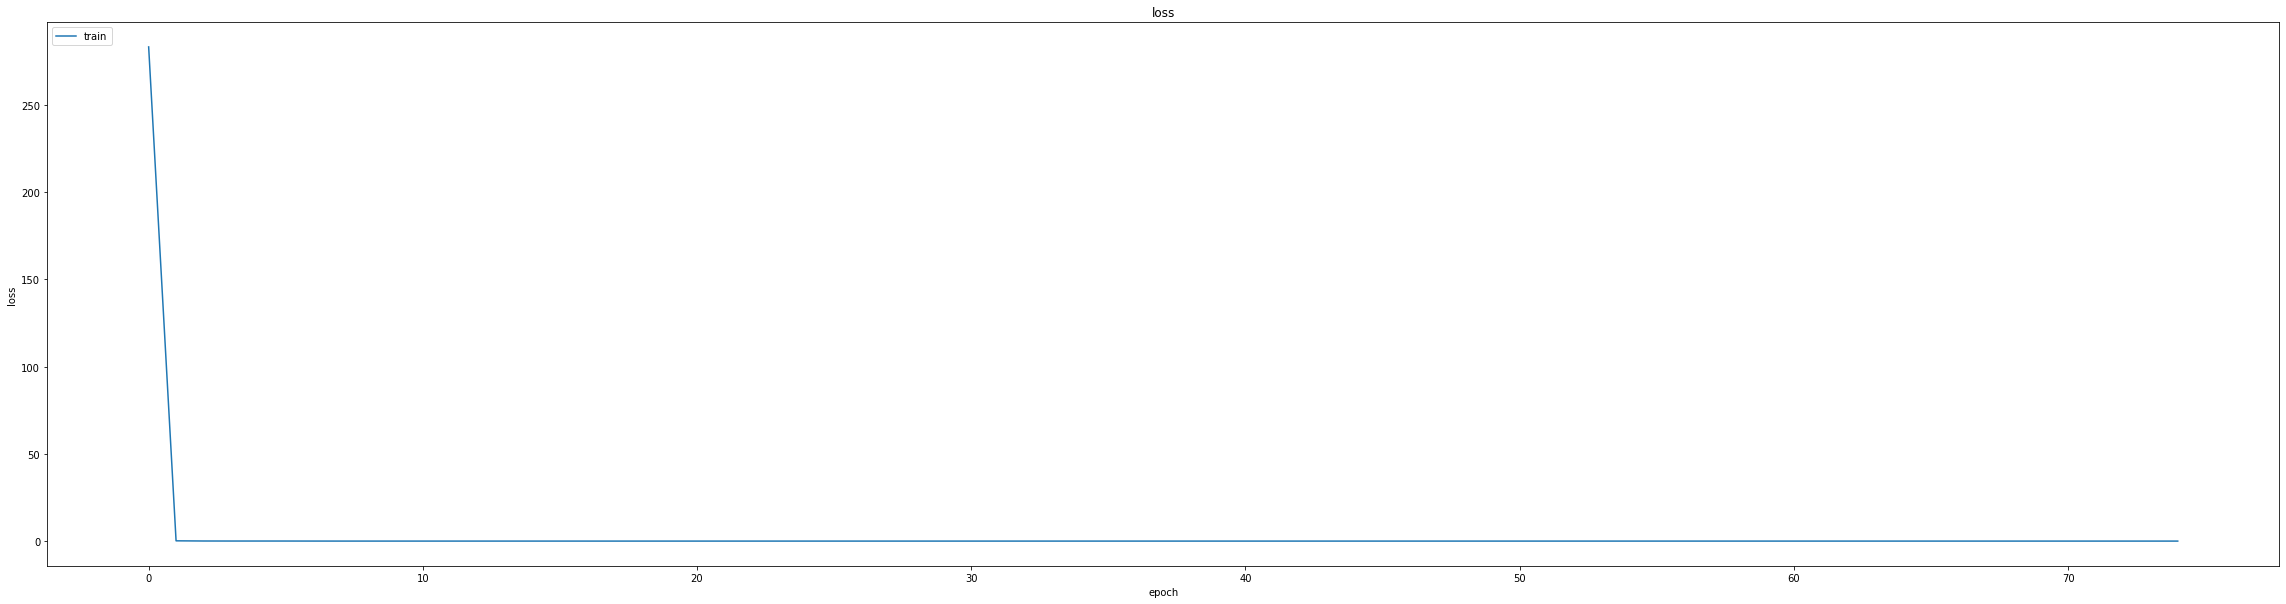

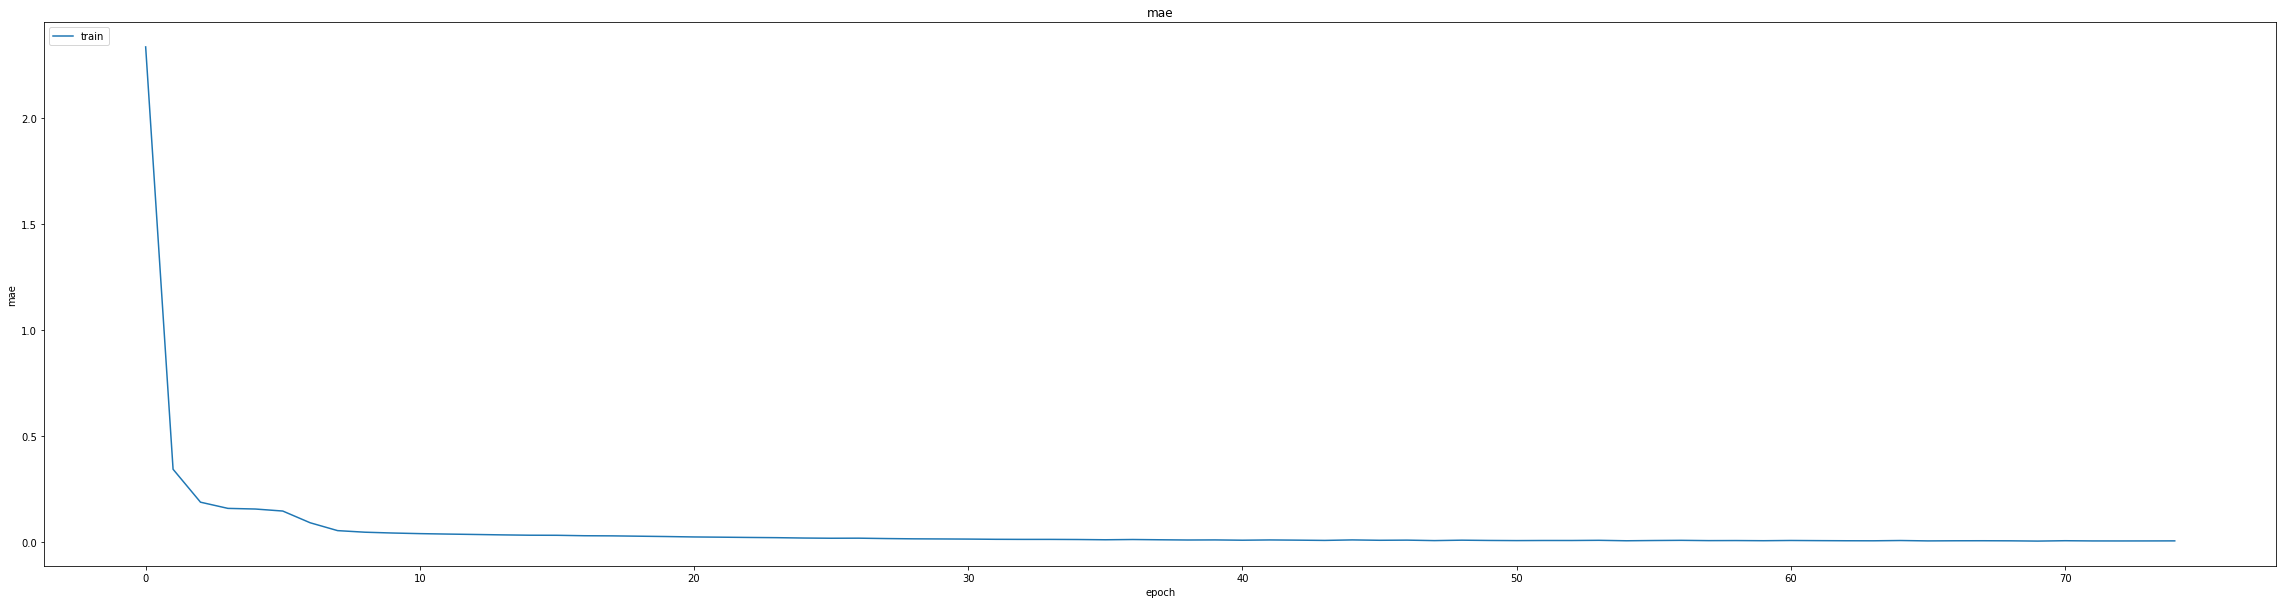

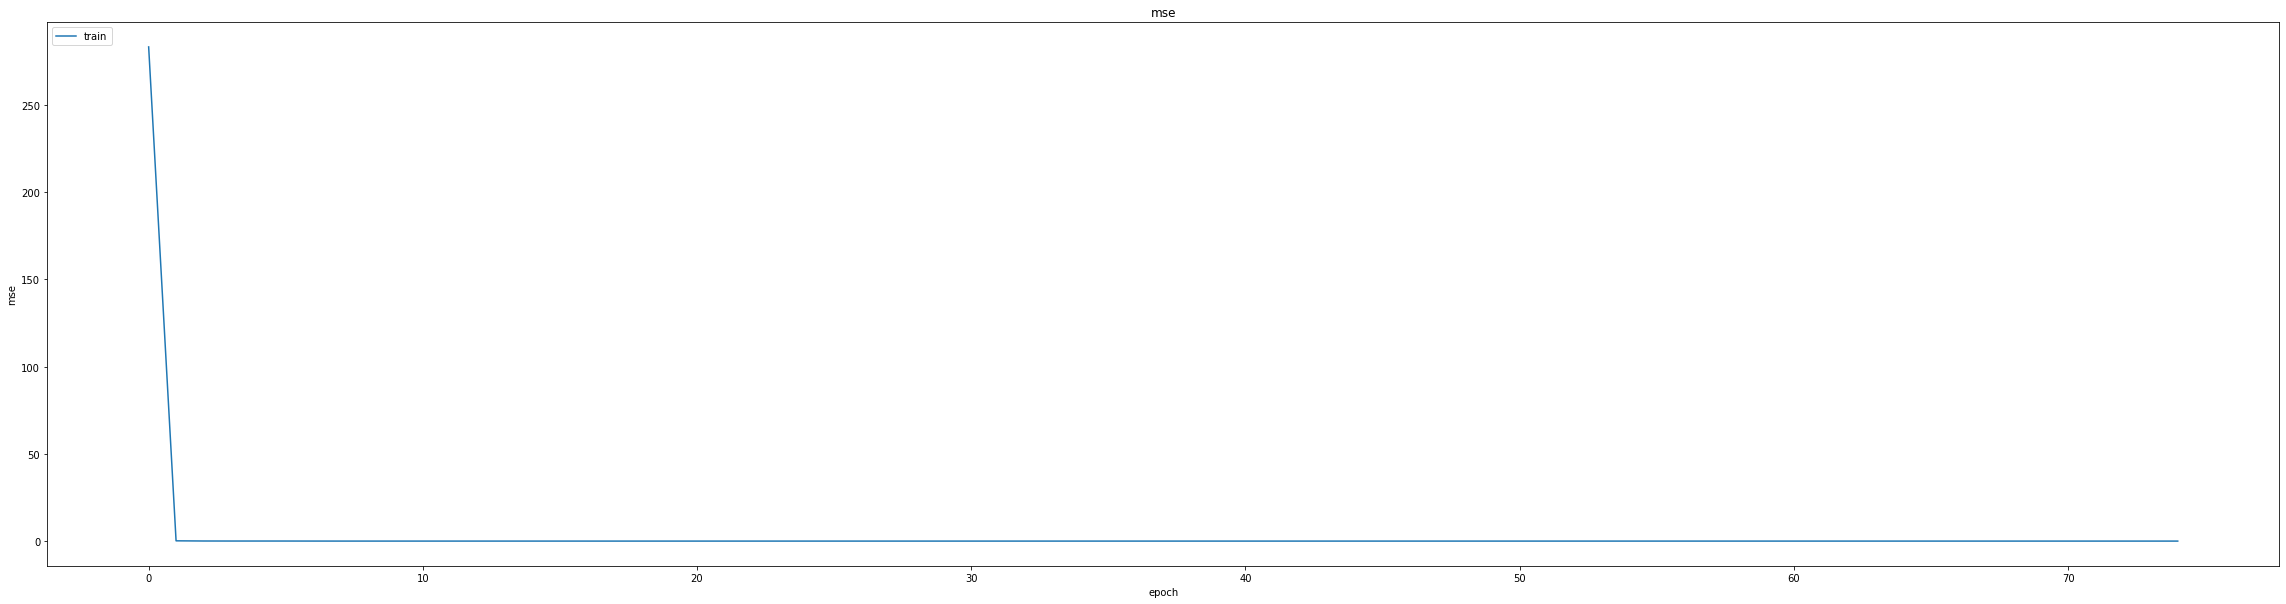

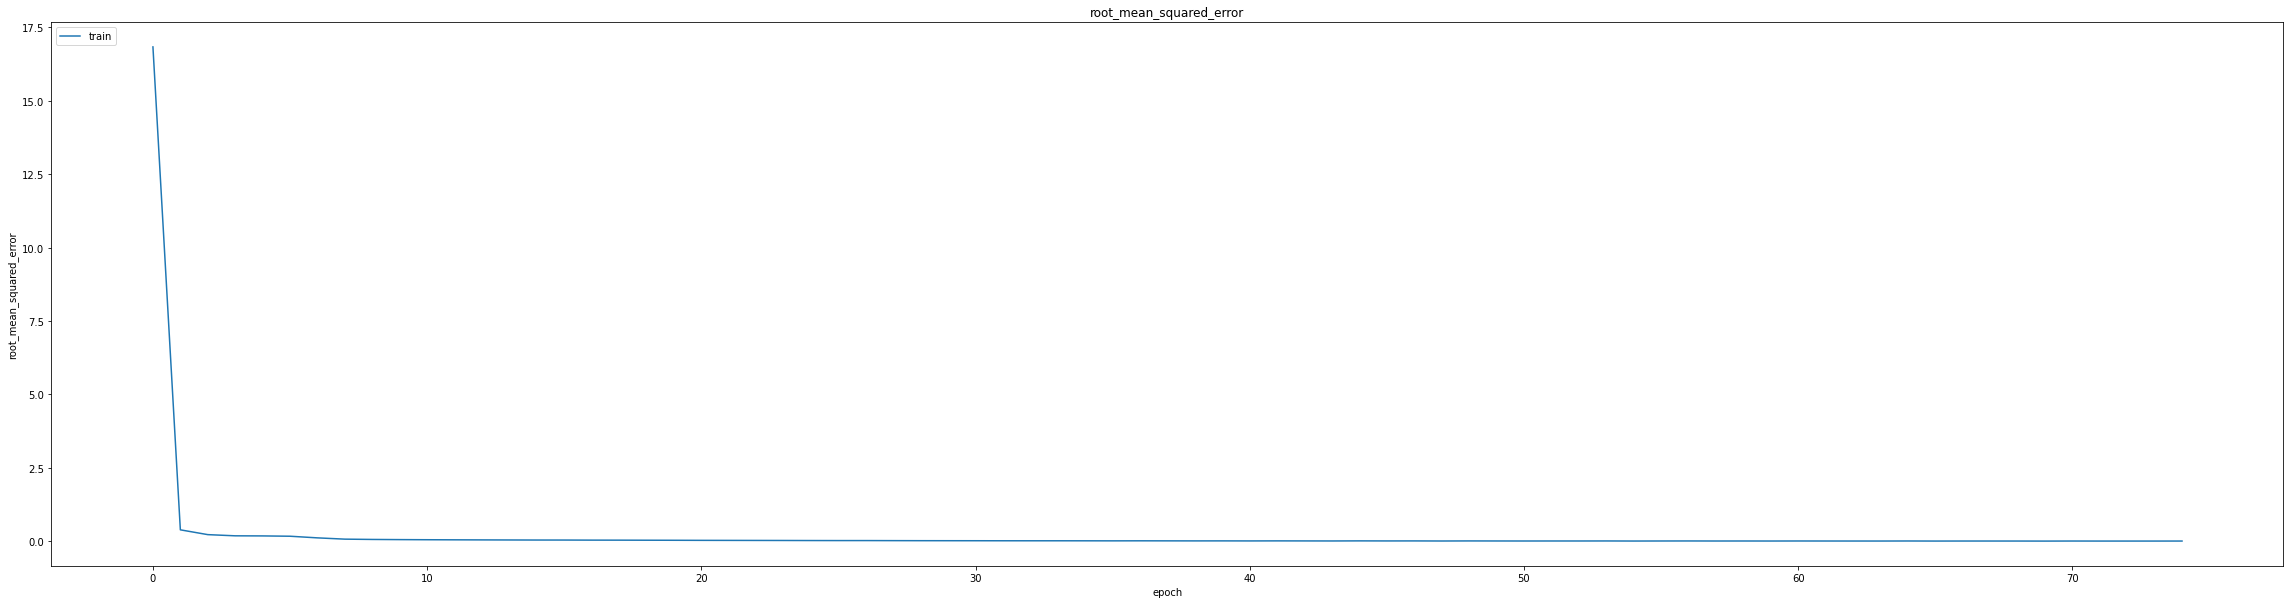

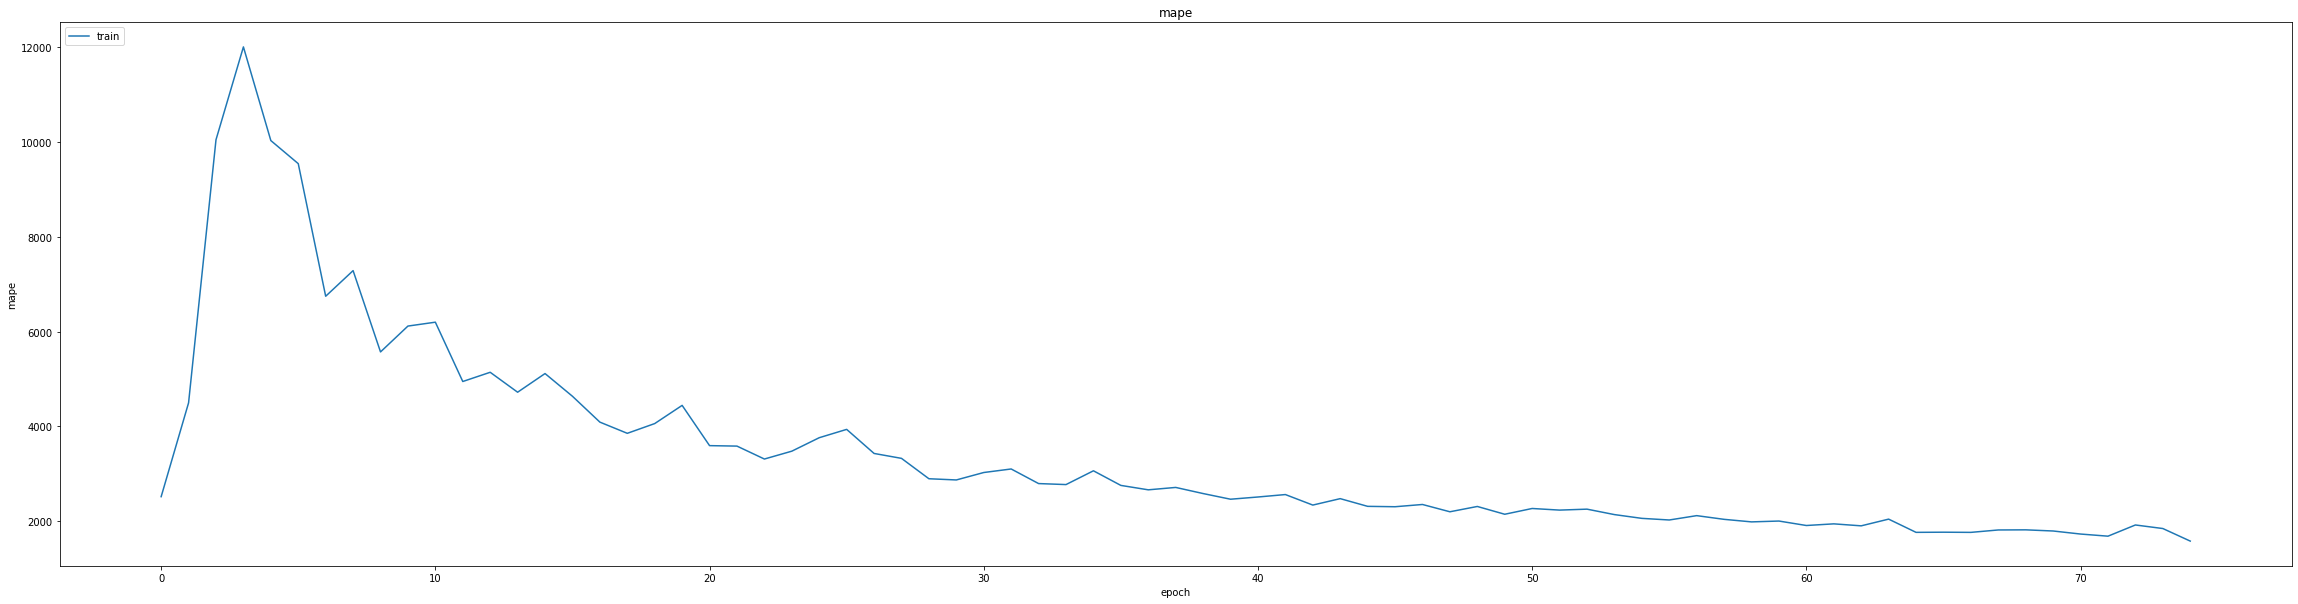

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01672167144715786
0.020576845854520798
464/464 [==============================] - 4s 6ms/step
-44.38142054893293


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
348/348 [==============================] - ETA: 0s - loss: 0.0017 - mae: 0.0177 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 2131.1377
Epoch 1: val_mse did not improve from 0.00035
348/348 [==============================] - 15s 24ms/step - loss: 0.0017 - mae: 0.0177 - mse: 0.0017 - root_mean_squared_error: 0.0411 - mape: 2131.1377 - val_loss: 6.8597e-04 - val_mae: 0.0222 - val_mse: 6.8597e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 6170.5195 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 6.1091e-05 - mae: 0.0058 - mse: 6.1091e-05 - root_mean_squared_error: 0.0078 - mape: 2098.9363
Epoch 2: val_mse did not improve from 0.00035
348/348 [==============================] - 7s 20ms/step - loss: 6.1091e-05 - mae: 0.0058 - mse: 6.1091e-05 - root_mean_squared_error: 0.0078 - mape: 2098.9363 - val_loss: 0.0987 - val_mae: 0.0446 - val_mse: 0.0987 - val_root_mean_squared_error: 0.3142 - val_mape: 6021.5161 - lr: 0.0010
lr changed 

348/348 [==============================] - 31s 91ms/step - loss: 8.3468e-05 - mae: 0.0070 - mse: 8.3468e-05 - root_mean_squared_error: 0.0091 - mape: 1691.2844 - val_loss: 1.8033e-04 - val_mae: 0.0106 - val_mse: 1.8033e-04 - val_root_mean_squared_error: 0.0134 - val_mape: 4183.5400 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
347/348 [============================>.] - ETA: 0s - loss: 7.9263e-05 - mae: 0.0068 - mse: 7.9263e-05 - root_mean_squared_error: 0.0089 - mape: 1892.7395
Epoch 9: val_mse did not improve from 0.00018
348/348 [==============================] - 7s 20ms/step - loss: 7.9164e-05 - mae: 0.0068 - mse: 7.9164e-05 - root_mean_squared_error: 0.0089 - mape: 1887.8545 - val_loss: 3.9516e-04 - val_mae: 0.0179 - val_mse: 3.9516e-04 - val_root_mean_squared_error: 0.0199 - val_mape: 4390.3066 - lr: 6.5610e-04
Epoch 10/25
348/348 [==============================] - ETA: 0s - loss: 9.3797e-05 - mae: 0.0074 - mse: 9.3797e-05 - root_mean_squared_error: 0.0097 - mape

348/348 [==============================] - 32s 92ms/step - loss: 6.1247e-05 - mae: 0.0060 - mse: 6.1247e-05 - root_mean_squared_error: 0.0078 - mape: 1823.5067 - val_loss: 1.3199e-04 - val_mae: 0.0091 - val_mse: 1.3199e-04 - val_root_mean_squared_error: 0.0115 - val_mape: 3753.0503 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
346/348 [============================>.] - ETA: 0s - loss: 5.0310e-05 - mae: 0.0054 - mse: 5.0310e-05 - root_mean_squared_error: 0.0071 - mape: 1506.3274
Epoch 15: val_mse did not improve from 0.00013
348/348 [==============================] - 7s 20ms/step - loss: 5.0273e-05 - mae: 0.0054 - mse: 5.0273e-05 - root_mean_squared_error: 0.0071 - mape: 1498.1135 - val_loss: 3.3920e-04 - val_mae: 0.0172 - val_mse: 3.3920e-04 - val_root_mean_squared_error: 0.0184 - val_mape: 3928.9583 - lr: 4.7830e-04
Epoch 16/25
347/348 [============================>.] - ETA: 0s - loss: 4.8394e-05 - mae: 0.0053 - mse: 4.8394e-05 - root_mean_squared_error: 0.0070 - m

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009133357554674149
0.0114885363727808
464/464 [==============================] - 3s 7ms/step
0.9985872060470454


464/464 [==============================] - 4s 10ms/step


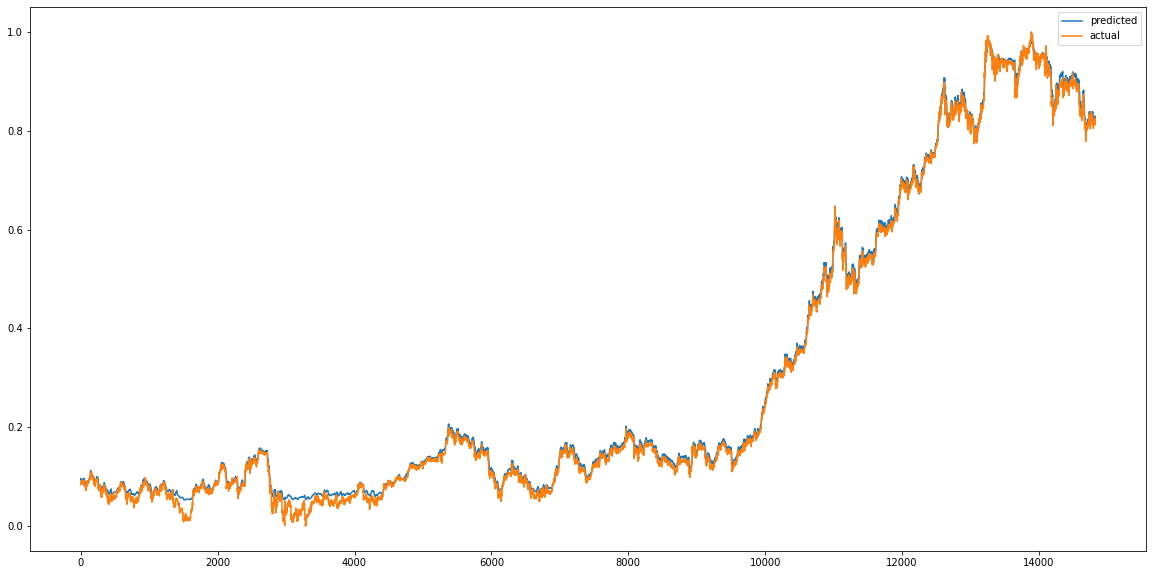

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


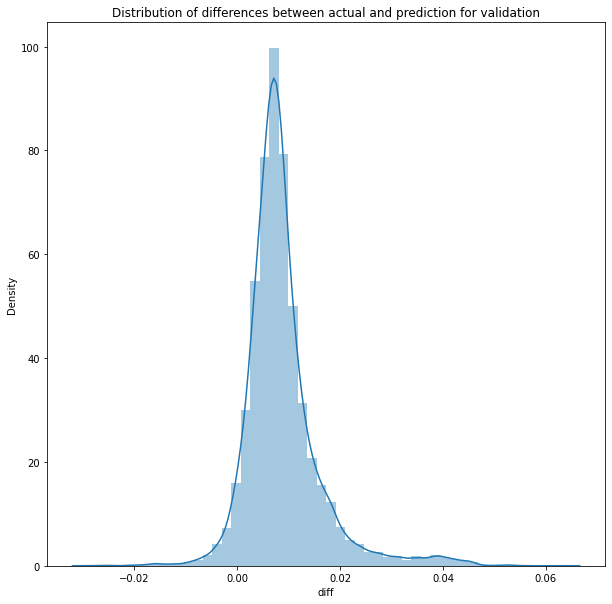

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 6ms/step


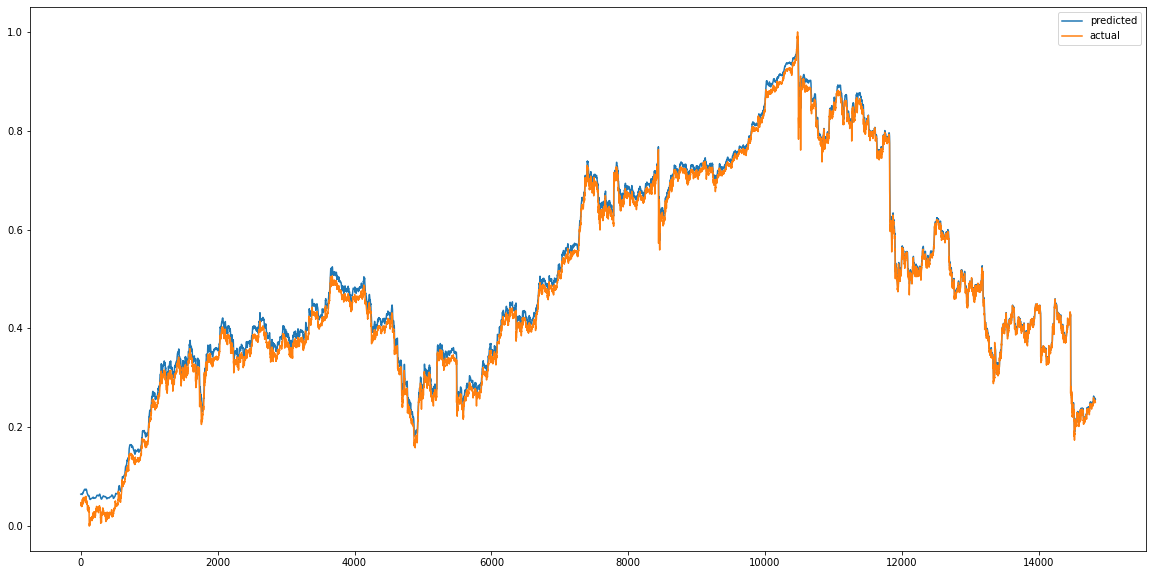

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


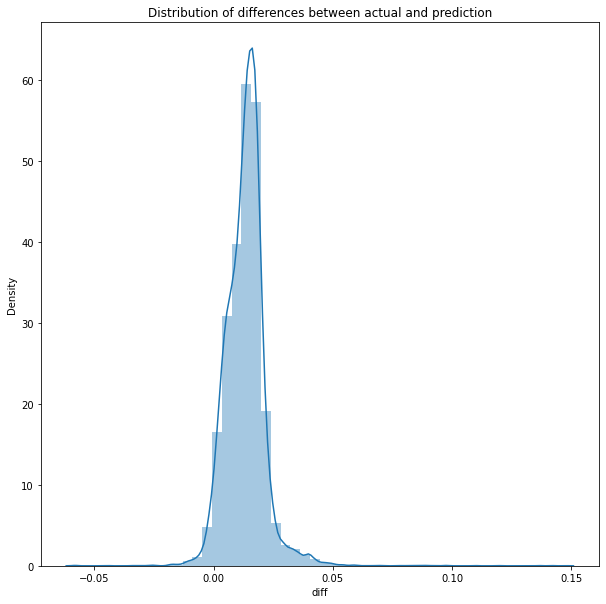

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0002460909191459599
RMSE :  0.015687285270114773
MAE :  0.013565368022310434
464/464 [==============================] - 5s 11ms/step
R2_Score  : 0.9948970419138017


count    14828.000000
mean         0.013288
std          0.008339
min         -0.058186
25%          0.008278
50%          0.013728
75%          0.017558
max          0.147236
Name: diff, dtype: float64

**GRU_LSTM_MODEL**

In [ ]:
model= thesis.GRU_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 24, 32)            4416      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           295936    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 377.1544 - mae: 2.9820 - mse: 377.1544 - root_mean_squared_error: 19.4205 - mape: 16504.3066
Epoch 1: val_mse improved from inf to 0.18000, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 17s 40ms/step - loss: 377.1544 - mae: 2.9820 - mse: 377.1544 - root_mean_squared_error: 19.4205 - mape: 16504.3066 - val_loss: 0.1800 - val_mae: 0.3967 - val_mse: 0.1800 - val_root_mean_squared_error: 0.4243 - val_mape: 40295.5898
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.0401 - mae: 0.1634 - mse: 0.0401 - root_mean_squared_error: 0.2003 - mape: 12459.3496
Epoch 2: val_mse improved from 0.18000 to 0.13859, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 15s 42ms/step - loss: 0.0401 - mae: 0.1634 - mse: 0.0401 - root_mean_squared_error: 0.2002 - mape: 12391.6191 - val_loss: 0.1386 - val_mae: 0.3530 - val_mse: 0.1386 - val_root_mean_squared_error: 0.3723 - val_mape: 34699.2383
Epoch 3/75
344/348 [============================>.] - ETA: 0s - loss: 0.0343 - mae: 0.1575 - mse: 0.0343 - root_mean_squared_error: 0.1852 - mape: 12088.7266
Epoch 3: val_mse improved from 0.13859 to 0.12738, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0343 - mae: 0.1576 - mse: 0.0343 - root_mean_squared_error: 0.1852 - mape: 11953.8525 - val_loss: 0.1274 - val_mae: 0.3393 - val_mse: 0.1274 - val_root_mean_squared_error: 0.3569 - val_mape: 32762.2910
Epoch 4/75
344/348 [============================>.] - ETA: 0s - loss: 0.0337 - mae: 0.1570 - mse: 0.0337 - root_mean_squared_error: 0.1835 - mape: 11707.0762
Epoch 4: val_mse improved from 0.12738 to 0.12422, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 0.0337 - mae: 0.1570 - mse: 0.0337 - root_mean_squared_error: 0.1835 - mape: 11576.4395 - val_loss: 0.1242 - val_mae: 0.3352 - val_mse: 0.1242 - val_root_mean_squared_error: 0.3524 - val_mape: 32162.0527
Epoch 5/75
348/348 [==============================] - ETA: 0s - loss: 0.0336 - mae: 0.1572 - mse: 0.0336 - root_mean_squared_error: 0.1834 - mape: 11172.2344
Epoch 5: val_mse improved from 0.12422 to 0.12337, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0336 - mae: 0.1572 - mse: 0.0336 - root_mean_squared_error: 0.1834 - mape: 11172.2344 - val_loss: 0.1234 - val_mae: 0.3341 - val_mse: 0.1234 - val_root_mean_squared_error: 0.3512 - val_mape: 31998.7910
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 0.0336 - mae: 0.1573 - mse: 0.0336 - root_mean_squared_error: 0.1834 - mape: 11149.8877
Epoch 6: val_mse did not improve from 0.12337
348/348 [==============================] - 4s 11ms/step - loss: 0.0336 - mae: 0.1573 - mse: 0.0336 - root_mean_squared_error: 0.1834 - mape: 11149.8877 - val_loss: 0.1235 - val_mae: 0.3343 - val_mse: 0.1235 - val_root_mean_squared_error: 0.3514 - val_mape: 32029.3711
Epoch 7/75
347/348 [============================>.] - ETA: 0s - loss: 0.0336 - mae: 0.1572 - mse: 0.0336 - root_mean_squared_error: 0.1834 - mape: 11007.3174
Epoch 7: val_mse improved from 0.12337 to 0.12306, saving model to /content/drive/MyDrive/modelweight

348/348 [==============================] - 13s 38ms/step - loss: 0.0336 - mae: 0.1572 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 10978.9854 - val_loss: 0.1231 - val_mae: 0.3337 - val_mse: 0.1231 - val_root_mean_squared_error: 0.3508 - val_mape: 31945.9766
Epoch 8/75
348/348 [==============================] - ETA: 0s - loss: 0.0335 - mae: 0.1570 - mse: 0.0335 - root_mean_squared_error: 0.1832 - mape: 10887.1943
Epoch 8: val_mse improved from 0.12306 to 0.12249, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0335 - mae: 0.1570 - mse: 0.0335 - root_mean_squared_error: 0.1832 - mape: 10887.1943 - val_loss: 0.1225 - val_mae: 0.3329 - val_mse: 0.1225 - val_root_mean_squared_error: 0.3500 - val_mape: 31838.7402
Epoch 9/75
343/348 [============================>.] - ETA: 0s - loss: 0.0336 - mae: 0.1572 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 12180.3223
Epoch 9: val_mse improved from 0.12249 to 0.12237, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 0.0336 - mae: 0.1572 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 12009.4443 - val_loss: 0.1224 - val_mae: 0.3328 - val_mse: 0.1224 - val_root_mean_squared_error: 0.3498 - val_mape: 31822.7734
Epoch 10/75
348/348 [==============================] - ETA: 0s - loss: 0.0335 - mae: 0.1570 - mse: 0.0335 - root_mean_squared_error: 0.1831 - mape: 11152.8838
Epoch 10: val_mse improved from 0.12237 to 0.12191, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0335 - mae: 0.1570 - mse: 0.0335 - root_mean_squared_error: 0.1831 - mape: 11152.8838 - val_loss: 0.1219 - val_mae: 0.3321 - val_mse: 0.1219 - val_root_mean_squared_error: 0.3492 - val_mape: 31742.9570
Epoch 11/75
347/348 [============================>.] - ETA: 0s - loss: 0.0335 - mae: 0.1568 - mse: 0.0335 - root_mean_squared_error: 0.1829 - mape: 10859.5811
Epoch 11: val_mse did not improve from 0.12191
348/348 [==============================] - 4s 11ms/step - loss: 0.0335 - mae: 0.1568 - mse: 0.0335 - root_mean_squared_error: 0.1829 - mape: 10831.6660 - val_loss: 0.1224 - val_mae: 0.3328 - val_mse: 0.1224 - val_root_mean_squared_error: 0.3499 - val_mape: 31866.1719
Epoch 12/75
348/348 [==============================] - ETA: 0s - loss: 0.0334 - mae: 0.1566 - mse: 0.0334 - root_mean_squared_error: 0.1827 - mape: 9995.2422 
Epoch 12: val_mse did not improve from 0.12191
348/348 [==============================] - 4s 11ms/

348/348 [==============================] - 13s 38ms/step - loss: 0.0333 - mae: 0.1566 - mse: 0.0333 - root_mean_squared_error: 0.1825 - mape: 10571.3096 - val_loss: 0.1212 - val_mae: 0.3311 - val_mse: 0.1212 - val_root_mean_squared_error: 0.3481 - val_mape: 31700.7734
Epoch 14/75
345/348 [============================>.] - ETA: 0s - loss: 0.0331 - mae: 0.1561 - mse: 0.0331 - root_mean_squared_error: 0.1821 - mape: 11293.0762
Epoch 14: val_mse improved from 0.12119 to 0.11976, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0332 - mae: 0.1561 - mse: 0.0332 - root_mean_squared_error: 0.1821 - mape: 11199.3760 - val_loss: 0.1198 - val_mae: 0.3292 - val_mse: 0.1198 - val_root_mean_squared_error: 0.3461 - val_mape: 31520.6855
Epoch 15/75
345/348 [============================>.] - ETA: 0s - loss: 0.0325 - mae: 0.1546 - mse: 0.0325 - root_mean_squared_error: 0.1803 - mape: 10872.8564
Epoch 15: val_mse improved from 0.11976 to 0.11594, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0325 - mae: 0.1546 - mse: 0.0325 - root_mean_squared_error: 0.1803 - mape: 10782.6660 - val_loss: 0.1159 - val_mae: 0.3238 - val_mse: 0.1159 - val_root_mean_squared_error: 0.3405 - val_mape: 31067.4023
Epoch 16/75
344/348 [============================>.] - ETA: 0s - loss: 0.0308 - mae: 0.1501 - mse: 0.0308 - root_mean_squared_error: 0.1754 - mape: 10514.7314
Epoch 16: val_mse improved from 0.11594 to 0.10352, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0308 - mae: 0.1502 - mse: 0.0308 - root_mean_squared_error: 0.1754 - mape: 10397.4209 - val_loss: 0.1035 - val_mae: 0.3054 - val_mse: 0.1035 - val_root_mean_squared_error: 0.3217 - val_mape: 29872.4590
Epoch 17/75
345/348 [============================>.] - ETA: 0s - loss: 0.0226 - mae: 0.1256 - mse: 0.0226 - root_mean_squared_error: 0.1504 - mape: 10463.5723
Epoch 17: val_mse improved from 0.10352 to 0.06850, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 0.0225 - mae: 0.1253 - mse: 0.0225 - root_mean_squared_error: 0.1501 - mape: 10376.6553 - val_loss: 0.0685 - val_mae: 0.2444 - val_mse: 0.0685 - val_root_mean_squared_error: 0.2617 - val_mape: 25909.6777
Epoch 18/75
345/348 [============================>.] - ETA: 0s - loss: 0.0085 - mae: 0.0698 - mse: 0.0085 - root_mean_squared_error: 0.0920 - mape: 7366.7456
Epoch 18: val_mse improved from 0.06850 to 0.03915, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0085 - mae: 0.0697 - mse: 0.0085 - root_mean_squared_error: 0.0920 - mape: 7305.5151 - val_loss: 0.0392 - val_mae: 0.1808 - val_mse: 0.0392 - val_root_mean_squared_error: 0.1979 - val_mape: 21027.3633
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 0.0047 - mae: 0.0509 - mse: 0.0047 - root_mean_squared_error: 0.0684 - mape: 6259.8638
Epoch 19: val_mse improved from 0.03915 to 0.02649, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0047 - mae: 0.0509 - mse: 0.0047 - root_mean_squared_error: 0.0684 - mape: 6243.7295 - val_loss: 0.0265 - val_mae: 0.1467 - val_mse: 0.0265 - val_root_mean_squared_error: 0.1628 - val_mape: 18350.0117
Epoch 20/75
343/348 [============================>.] - ETA: 0s - loss: 0.0032 - mae: 0.0425 - mse: 0.0032 - root_mean_squared_error: 0.0565 - mape: 6499.0264
Epoch 20: val_mse improved from 0.02649 to 0.01884, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0032 - mae: 0.0424 - mse: 0.0032 - root_mean_squared_error: 0.0564 - mape: 6407.6709 - val_loss: 0.0188 - val_mae: 0.1216 - val_mse: 0.0188 - val_root_mean_squared_error: 0.1373 - val_mape: 16511.9570
Epoch 21/75
347/348 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0377 - mse: 0.0025 - root_mean_squared_error: 0.0496 - mape: 5339.7676
Epoch 21: val_mse improved from 0.01884 to 0.01419, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 36ms/step - loss: 0.0025 - mae: 0.0377 - mse: 0.0025 - root_mean_squared_error: 0.0496 - mape: 5326.0024 - val_loss: 0.0142 - val_mae: 0.1063 - val_mse: 0.0142 - val_root_mean_squared_error: 0.1191 - val_mape: 15147.5303
Epoch 22/75
343/348 [============================>.] - ETA: 0s - loss: 0.0021 - mae: 0.0350 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 5029.4678
Epoch 22: val_mse improved from 0.01419 to 0.01094, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0021 - mae: 0.0350 - mse: 0.0021 - root_mean_squared_error: 0.0456 - mape: 4958.7778 - val_loss: 0.0109 - val_mae: 0.0900 - val_mse: 0.0109 - val_root_mean_squared_error: 0.1046 - val_mape: 14185.7822
Epoch 23/75
347/348 [============================>.] - ETA: 0s - loss: 0.0018 - mae: 0.0332 - mse: 0.0018 - root_mean_squared_error: 0.0430 - mape: 4752.3110
Epoch 23: val_mse improved from 0.01094 to 0.00909, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0018 - mae: 0.0332 - mse: 0.0018 - root_mean_squared_error: 0.0430 - mape: 4740.0649 - val_loss: 0.0091 - val_mae: 0.0809 - val_mse: 0.0091 - val_root_mean_squared_error: 0.0954 - val_mape: 13430.7402
Epoch 24/75
348/348 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0303 - mse: 0.0015 - root_mean_squared_error: 0.0394 - mape: 4276.2651
Epoch 24: val_mse improved from 0.00909 to 0.00771, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 0.0015 - mae: 0.0303 - mse: 0.0015 - root_mean_squared_error: 0.0394 - mape: 4276.2651 - val_loss: 0.0077 - val_mae: 0.0736 - val_mse: 0.0077 - val_root_mean_squared_error: 0.0878 - val_mape: 12806.4453
Epoch 25/75
344/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0291 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 4170.1938
Epoch 25: val_mse improved from 0.00771 to 0.00684, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 0.0014 - mae: 0.0291 - mse: 0.0014 - root_mean_squared_error: 0.0377 - mape: 4123.5454 - val_loss: 0.0068 - val_mae: 0.0692 - val_mse: 0.0068 - val_root_mean_squared_error: 0.0827 - val_mape: 12469.5137
Epoch 26/75
346/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0273 - mse: 0.0012 - root_mean_squared_error: 0.0353 - mape: 4132.5308
Epoch 26: val_mse improved from 0.00684 to 0.00598, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 0.0012 - mae: 0.0273 - mse: 0.0012 - root_mean_squared_error: 0.0352 - mape: 4110.0132 - val_loss: 0.0060 - val_mae: 0.0629 - val_mse: 0.0060 - val_root_mean_squared_error: 0.0773 - val_mape: 12093.7764
Epoch 27/75
346/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0347 - mape: 4258.6816
Epoch 27: val_mse improved from 0.00598 to 0.00579, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0012 - mae: 0.0270 - mse: 0.0012 - root_mean_squared_error: 0.0347 - mape: 4235.4775 - val_loss: 0.0058 - val_mae: 0.0634 - val_mse: 0.0058 - val_root_mean_squared_error: 0.0761 - val_mape: 11881.2725
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0254 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 4049.7317
Epoch 28: val_mse improved from 0.00579 to 0.00510, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0011 - mae: 0.0254 - mse: 0.0011 - root_mean_squared_error: 0.0327 - mape: 4027.6675 - val_loss: 0.0051 - val_mae: 0.0580 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0714 - val_mape: 11645.6855
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 9.9741e-04 - mae: 0.0246 - mse: 9.9741e-04 - root_mean_squared_error: 0.0316 - mape: 3723.2461
Epoch 29: val_mse improved from 0.00510 to 0.00469, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 9.9640e-04 - mae: 0.0245 - mse: 9.9640e-04 - root_mean_squared_error: 0.0316 - mape: 3713.6440 - val_loss: 0.0047 - val_mae: 0.0549 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0685 - val_mape: 11341.5439
Epoch 30/75
343/348 [============================>.] - ETA: 0s - loss: 8.1450e-04 - mae: 0.0221 - mse: 8.1450e-04 - root_mean_squared_error: 0.0285 - mape: 3848.8000
Epoch 30: val_mse improved from 0.00469 to 0.00425, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 8.1433e-04 - mae: 0.0221 - mse: 8.1433e-04 - root_mean_squared_error: 0.0285 - mape: 3794.6882 - val_loss: 0.0042 - val_mae: 0.0514 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0652 - val_mape: 11160.4590
Epoch 31/75
345/348 [============================>.] - ETA: 0s - loss: 7.7276e-04 - mae: 0.0217 - mse: 7.7276e-04 - root_mean_squared_error: 0.0278 - mape: 3903.4885
Epoch 31: val_mse improved from 0.00425 to 0.00393, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 7.7136e-04 - mae: 0.0216 - mse: 7.7136e-04 - root_mean_squared_error: 0.0278 - mape: 3871.0076 - val_loss: 0.0039 - val_mae: 0.0494 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0627 - val_mape: 10863.7568
Epoch 32/75
346/348 [============================>.] - ETA: 0s - loss: 6.8809e-04 - mae: 0.0203 - mse: 6.8809e-04 - root_mean_squared_error: 0.0262 - mape: 3574.6636
Epoch 32: val_mse improved from 0.00393 to 0.00369, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 37ms/step - loss: 6.8694e-04 - mae: 0.0203 - mse: 6.8694e-04 - root_mean_squared_error: 0.0262 - mape: 3555.1804 - val_loss: 0.0037 - val_mae: 0.0476 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0608 - val_mape: 10704.0225
Epoch 33/75
344/348 [============================>.] - ETA: 0s - loss: 6.1406e-04 - mae: 0.0191 - mse: 6.1406e-04 - root_mean_squared_error: 0.0248 - mape: 3883.7627
Epoch 33: val_mse improved from 0.00369 to 0.00365, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 6.1611e-04 - mae: 0.0192 - mse: 6.1611e-04 - root_mean_squared_error: 0.0248 - mape: 3840.3030 - val_loss: 0.0037 - val_mae: 0.0486 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0604 - val_mape: 10603.9512
Epoch 34/75
345/348 [============================>.] - ETA: 0s - loss: 5.8944e-04 - mae: 0.0188 - mse: 5.8944e-04 - root_mean_squared_error: 0.0243 - mape: 3799.5735
Epoch 34: val_mse improved from 0.00365 to 0.00333, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 5.8855e-04 - mae: 0.0188 - mse: 5.8855e-04 - root_mean_squared_error: 0.0243 - mape: 3767.9568 - val_loss: 0.0033 - val_mae: 0.0449 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0577 - val_mape: 10382.5820
Epoch 35/75
345/348 [============================>.] - ETA: 0s - loss: 5.1344e-04 - mae: 0.0175 - mse: 5.1344e-04 - root_mean_squared_error: 0.0227 - mape: 3290.2637
Epoch 35: val_mse improved from 0.00333 to 0.00325, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 5.1785e-04 - mae: 0.0175 - mse: 5.1785e-04 - root_mean_squared_error: 0.0228 - mape: 3262.9092 - val_loss: 0.0032 - val_mae: 0.0460 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0570 - val_mape: 10196.4980
Epoch 36/75
345/348 [============================>.] - ETA: 0s - loss: 4.7783e-04 - mae: 0.0168 - mse: 4.7783e-04 - root_mean_squared_error: 0.0219 - mape: 3138.1331
Epoch 36: val_mse improved from 0.00325 to 0.00285, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 4.7670e-04 - mae: 0.0168 - mse: 4.7670e-04 - root_mean_squared_error: 0.0218 - mape: 3112.0181 - val_loss: 0.0029 - val_mae: 0.0407 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0534 - val_mape: 9975.4717
Epoch 37/75
347/348 [============================>.] - ETA: 0s - loss: 4.3278e-04 - mae: 0.0159 - mse: 4.3278e-04 - root_mean_squared_error: 0.0208 - mape: 3493.5979
Epoch 37: val_mse improved from 0.00285 to 0.00279, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 4.3264e-04 - mae: 0.0159 - mse: 4.3264e-04 - root_mean_squared_error: 0.0208 - mape: 3484.5854 - val_loss: 0.0028 - val_mae: 0.0420 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0528 - val_mape: 9760.0020
Epoch 38/75
348/348 [==============================] - ETA: 0s - loss: 3.9580e-04 - mae: 0.0153 - mse: 3.9580e-04 - root_mean_squared_error: 0.0199 - mape: 3629.7871
Epoch 38: val_mse improved from 0.00279 to 0.00258, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 36ms/step - loss: 3.9580e-04 - mae: 0.0153 - mse: 3.9580e-04 - root_mean_squared_error: 0.0199 - mape: 3629.7871 - val_loss: 0.0026 - val_mae: 0.0406 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0508 - val_mape: 9517.8389
Epoch 39/75
348/348 [==============================] - ETA: 0s - loss: 3.5910e-04 - mae: 0.0145 - mse: 3.5910e-04 - root_mean_squared_error: 0.0189 - mape: 3421.2458
Epoch 39: val_mse improved from 0.00258 to 0.00245, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 3.5910e-04 - mae: 0.0145 - mse: 3.5910e-04 - root_mean_squared_error: 0.0189 - mape: 3421.2458 - val_loss: 0.0024 - val_mae: 0.0407 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0495 - val_mape: 9242.5566
Epoch 40/75
344/348 [============================>.] - ETA: 0s - loss: 3.8685e-04 - mae: 0.0150 - mse: 3.8685e-04 - root_mean_squared_error: 0.0197 - mape: 3053.2263
Epoch 40: val_mse did not improve from 0.00245
348/348 [==============================] - 4s 11ms/step - loss: 3.8768e-04 - mae: 0.0150 - mse: 3.8768e-04 - root_mean_squared_error: 0.0197 - mape: 3019.0635 - val_loss: 0.0027 - val_mae: 0.0429 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0515 - val_mape: 9290.4727
Epoch 41/75
345/348 [============================>.] - ETA: 0s - loss: 3.5512e-04 - mae: 0.0145 - mse: 3.5512e-04 - root_mean_squared_error: 0.0188 - mape: 3134.9329
Epoch 41: val_mse improved from 0.00245 to 0.00219, saving model to /con

348/348 [==============================] - 14s 41ms/step - loss: 3.5577e-04 - mae: 0.0145 - mse: 3.5577e-04 - root_mean_squared_error: 0.0189 - mape: 3108.8499 - val_loss: 0.0022 - val_mae: 0.0367 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0468 - val_mape: 9020.3301
Epoch 42/75
347/348 [============================>.] - ETA: 0s - loss: 3.2439e-04 - mae: 0.0137 - mse: 3.2439e-04 - root_mean_squared_error: 0.0180 - mape: 2943.9893
Epoch 42: val_mse improved from 0.00219 to 0.00183, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 38ms/step - loss: 3.2458e-04 - mae: 0.0137 - mse: 3.2458e-04 - root_mean_squared_error: 0.0180 - mape: 2936.3989 - val_loss: 0.0018 - val_mae: 0.0318 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0428 - val_mape: 8711.5830
Epoch 43/75
347/348 [============================>.] - ETA: 0s - loss: 3.1346e-04 - mae: 0.0135 - mse: 3.1346e-04 - root_mean_squared_error: 0.0177 - mape: 2816.5913
Epoch 43: val_mse did not improve from 0.00183
348/348 [==============================] - 4s 11ms/step - loss: 3.1365e-04 - mae: 0.0136 - mse: 3.1365e-04 - root_mean_squared_error: 0.0177 - mape: 2809.3276 - val_loss: 0.0019 - val_mae: 0.0340 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0437 - val_mape: 8694.5264
Epoch 44/75
344/348 [============================>.] - ETA: 0s - loss: 2.6156e-04 - mae: 0.0122 - mse: 2.6156e-04 - root_mean_squared_error: 0.0162 - mape: 2882.2744
Epoch 44: val_mse did not improve from 0.00183
348/348 [================

348/348 [==============================] - 13s 38ms/step - loss: 2.9605e-04 - mae: 0.0131 - mse: 2.9605e-04 - root_mean_squared_error: 0.0172 - mape: 2938.9866 - val_loss: 0.0016 - val_mae: 0.0313 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0405 - val_mape: 8327.2617
Epoch 46/75
345/348 [============================>.] - ETA: 0s - loss: 2.2423e-04 - mae: 0.0113 - mse: 2.2423e-04 - root_mean_squared_error: 0.0150 - mape: 2710.7671
Epoch 46: val_mse improved from 0.00164 to 0.00150, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)


348/348 [==============================] - 13s 39ms/step - loss: 2.2505e-04 - mae: 0.0113 - mse: 2.2505e-04 - root_mean_squared_error: 0.0150 - mape: 2688.2112 - val_loss: 0.0015 - val_mae: 0.0298 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0387 - val_mape: 8111.9185
Epoch 47/75
345/348 [============================>.] - ETA: 0s - loss: 2.2851e-04 - mae: 0.0115 - mse: 2.2851e-04 - root_mean_squared_error: 0.0151 - mape: 2637.5479
Epoch 47: val_mse did not improve from 0.00150
348/348 [==============================] - 4s 12ms/step - loss: 2.2807e-04 - mae: 0.0114 - mse: 2.2807e-04 - root_mean_squared_error: 0.0151 - mape: 2615.5950 - val_loss: 0.0016 - val_mae: 0.0327 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0394 - val_mape: 7940.3345
Epoch 48/75
344/348 [============================>.] - ETA: 0s - loss: 2.2483e-04 - mae: 0.0114 - mse: 2.2483e-04 - root_mean_squared_error: 0.0150 - mape: 2824.8525
Epoch 48: val_mse did not improve from 0.00150
348/348 [================

348/348 [==============================] - 13s 37ms/step - loss: 1.9392e-04 - mae: 0.0105 - mse: 1.9392e-04 - root_mean_squared_error: 0.0139 - mape: 2688.6511 - val_loss: 0.0013 - val_mae: 0.0276 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0359 - val_mape: 7721.3916
Epoch 50/75
347/348 [============================>.] - ETA: 0s - loss: 1.8660e-04 - mae: 0.0103 - mse: 1.8660e-04 - root_mean_squared_error: 0.0137 - mape: 2788.1223
Epoch 50: val_mse did not improve from 0.00129
348/348 [==============================] - 4s 11ms/step - loss: 1.8643e-04 - mae: 0.0103 - mse: 1.8643e-04 - root_mean_squared_error: 0.0137 - mape: 2780.9270 - val_loss: 0.0018 - val_mae: 0.0386 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0424 - val_mape: 7698.1230
Epoch 51/75
348/348 [==============================] - ETA: 0s - loss: 1.7312e-04 - mae: 0.0100 - mse: 1.7312e-04 - root_mean_squared_error: 0.0132 - mape: 2653.5955
Epoch 51: val_mse improved from 0.00129 to 0.00121, saving model to /con

348/348 [==============================] - 14s 39ms/step - loss: 1.7312e-04 - mae: 0.0100 - mse: 1.7312e-04 - root_mean_squared_error: 0.0132 - mape: 2653.5955 - val_loss: 0.0012 - val_mae: 0.0286 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0348 - val_mape: 7366.1699
Epoch 52/75
343/348 [============================>.] - ETA: 0s - loss: 1.8300e-04 - mae: 0.0103 - mse: 1.8300e-04 - root_mean_squared_error: 0.0135 - mape: 2406.2405
Epoch 52: val_mse did not improve from 0.00121
348/348 [==============================] - 4s 12ms/step - loss: 1.8408e-04 - mae: 0.0103 - mse: 1.8408e-04 - root_mean_squared_error: 0.0136 - mape: 2372.4050 - val_loss: 0.0013 - val_mae: 0.0309 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 7322.6440
Epoch 53/75
348/348 [==============================] - ETA: 0s - loss: 1.5382e-04 - mae: 0.0094 - mse: 1.5382e-04 - root_mean_squared_error: 0.0124 - mape: 2569.1023
Epoch 53: val_mse did not improve from 0.00121
348/348 [================

348/348 [==============================] - 13s 37ms/step - loss: 1.3141e-04 - mae: 0.0086 - mse: 1.3141e-04 - root_mean_squared_error: 0.0115 - mape: 2470.5388 - val_loss: 0.0010 - val_mae: 0.0263 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0317 - val_mape: 6907.1567
Epoch 57/75
348/348 [==============================] - ETA: 0s - loss: 1.4052e-04 - mae: 0.0090 - mse: 1.4052e-04 - root_mean_squared_error: 0.0119 - mape: 2364.5754
Epoch 57: val_mse did not improve from 0.00101
348/348 [==============================] - 4s 11ms/step - loss: 1.4052e-04 - mae: 0.0090 - mse: 1.4052e-04 - root_mean_squared_error: 0.0119 - mape: 2364.5754 - val_loss: 0.0011 - val_mae: 0.0286 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 6874.0356
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 1.5945e-04 - mae: 0.0096 - mse: 1.5945e-04 - root_mean_squared_error: 0.0126 - mape: 2454.7058
Epoch 58: val_mse did not improve from 0.00101
348/348 [================

348/348 [==============================] - 13s 39ms/step - loss: 9.2812e-05 - mae: 0.0072 - mse: 9.2812e-05 - root_mean_squared_error: 0.0096 - mape: 2151.6943 - val_loss: 9.3945e-04 - val_mae: 0.0277 - val_mse: 9.3945e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 6298.8462
Epoch 64/75
346/348 [============================>.] - ETA: 0s - loss: 9.7810e-05 - mae: 0.0074 - mse: 9.7810e-05 - root_mean_squared_error: 0.0099 - mape: 2233.7236
Epoch 64: val_mse did not improve from 0.00094
348/348 [==============================] - 4s 13ms/step - loss: 9.7621e-05 - mae: 0.0074 - mse: 9.7621e-05 - root_mean_squared_error: 0.0099 - mape: 2221.5420 - val_loss: 0.0011 - val_mae: 0.0310 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0333 - val_mape: 6411.9878
Epoch 65/75
343/348 [============================>.] - ETA: 0s - loss: 1.3368e-04 - mae: 0.0087 - mse: 1.3368e-04 - root_mean_squared_error: 0.0116 - mape: 2113.9836
Epoch 65: val_mse did not improve from 0.00094
348/348 [========

348/348 [==============================] - 13s 39ms/step - loss: 1.0682e-04 - mae: 0.0079 - mse: 1.0682e-04 - root_mean_squared_error: 0.0103 - mape: 2240.2322 - val_loss: 9.0958e-04 - val_mae: 0.0275 - val_mse: 9.0958e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 6130.7651
Epoch 68/75
343/348 [============================>.] - ETA: 0s - loss: 9.4462e-05 - mae: 0.0073 - mse: 9.4462e-05 - root_mean_squared_error: 0.0097 - mape: 2085.9192
Epoch 68: val_mse did not improve from 0.00091
348/348 [==============================] - 4s 11ms/step - loss: 9.4490e-05 - mae: 0.0074 - mse: 9.4490e-05 - root_mean_squared_error: 0.0097 - mape: 2056.5781 - val_loss: 0.0014 - val_mae: 0.0352 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0369 - val_mape: 6165.6558
Epoch 69/75
348/348 [==============================] - ETA: 0s - loss: 1.4316e-04 - mae: 0.0084 - mse: 1.4316e-04 - root_mean_squared_error: 0.0120 - mape: 2213.0637
Epoch 69: val_mse did not improve from 0.00091
348/348 [========

348/348 [==============================] - 13s 38ms/step - loss: 6.5411e-05 - mae: 0.0061 - mse: 6.5411e-05 - root_mean_squared_error: 0.0081 - mape: 1877.4399 - val_loss: 8.5160e-04 - val_mae: 0.0276 - val_mse: 8.5160e-04 - val_root_mean_squared_error: 0.0292 - val_mape: 5550.1362
Epoch 74/75
346/348 [============================>.] - ETA: 0s - loss: 9.1736e-05 - mae: 0.0073 - mse: 9.1736e-05 - root_mean_squared_error: 0.0096 - mape: 1825.0453
Epoch 74: val_mse did not improve from 0.00085
348/348 [==============================] - 4s 11ms/step - loss: 9.1817e-05 - mae: 0.0073 - mse: 9.1817e-05 - root_mean_squared_error: 0.0096 - mape: 1815.0967 - val_loss: 0.0013 - val_mae: 0.0347 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0362 - val_mape: 5654.1548
Epoch 75/75
347/348 [============================>.] - ETA: 0s - loss: 6.6909e-05 - mae: 0.0062 - mse: 6.6909e-05 - root_mean_squared_error: 0.0082 - mape: 1921.2306
Epoch 75: val_mse did not improve from 0.00085
348/348 [========

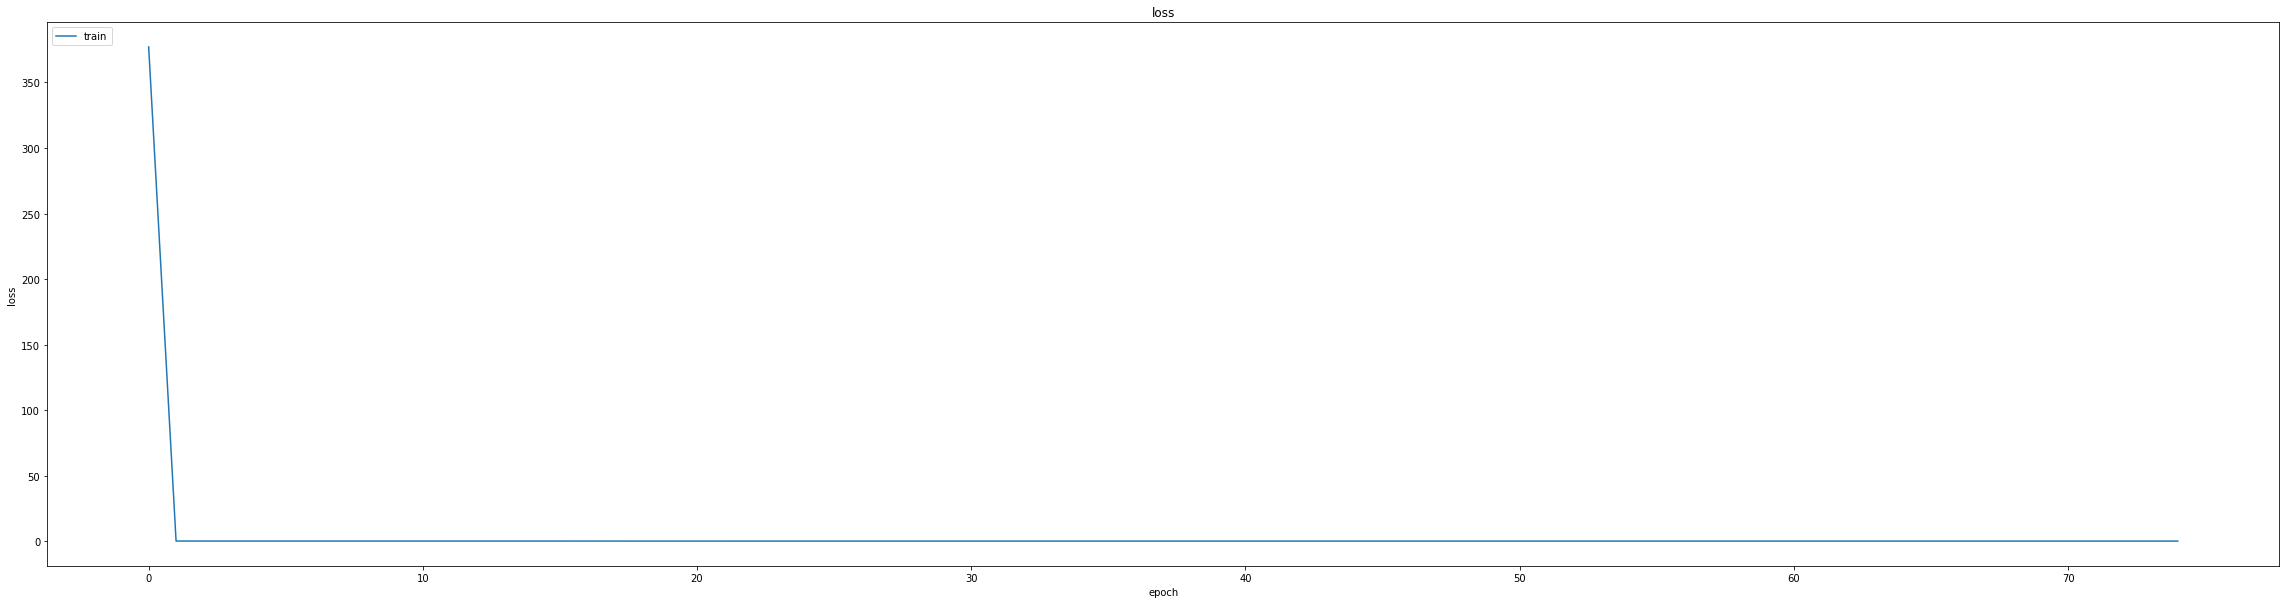

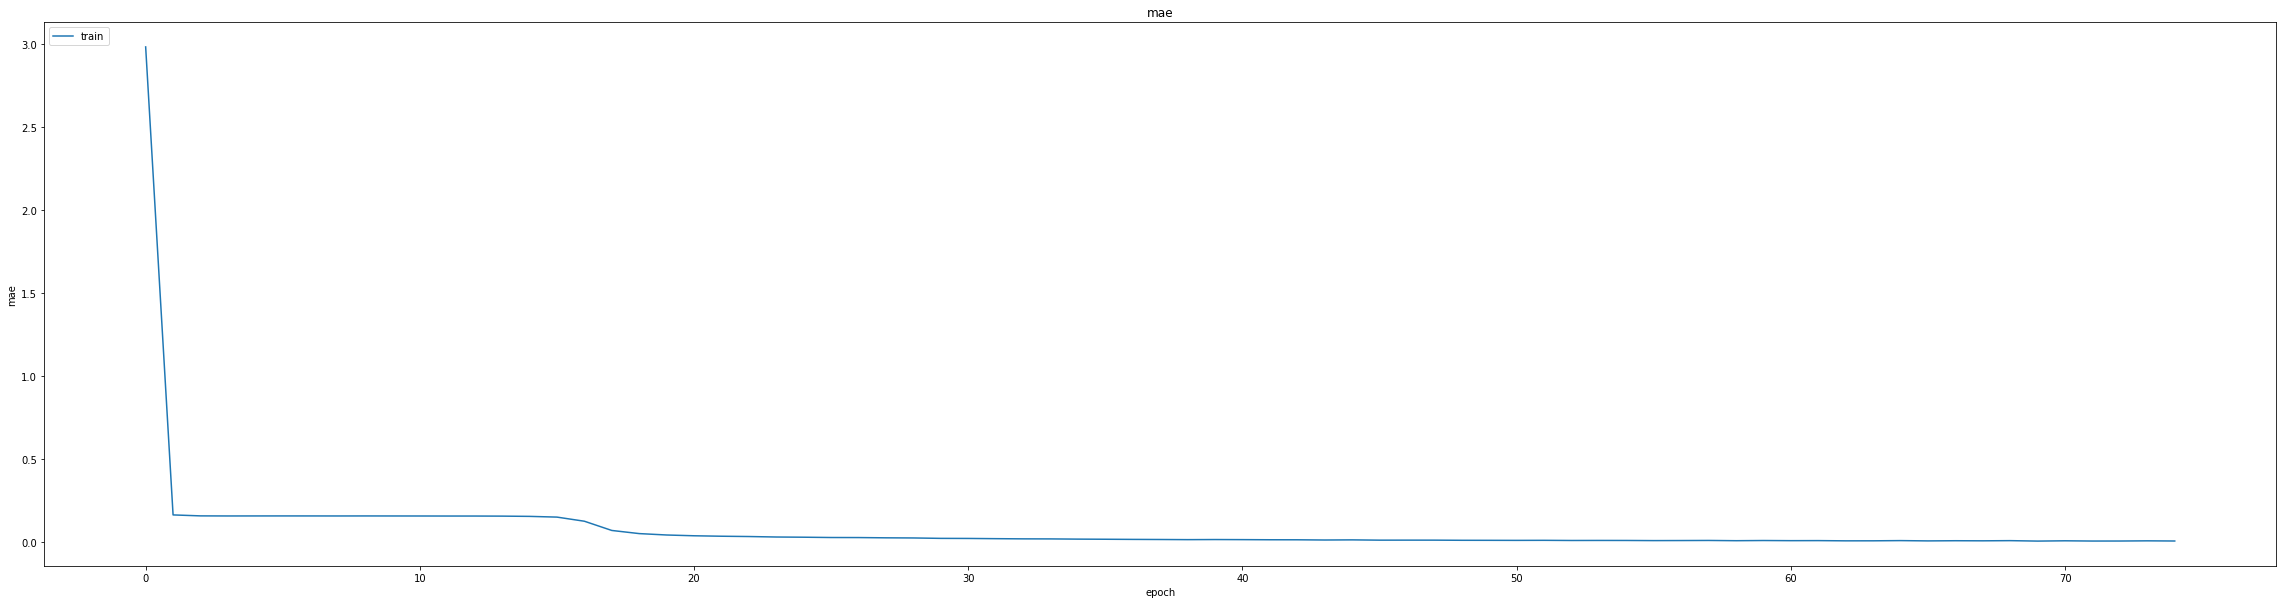

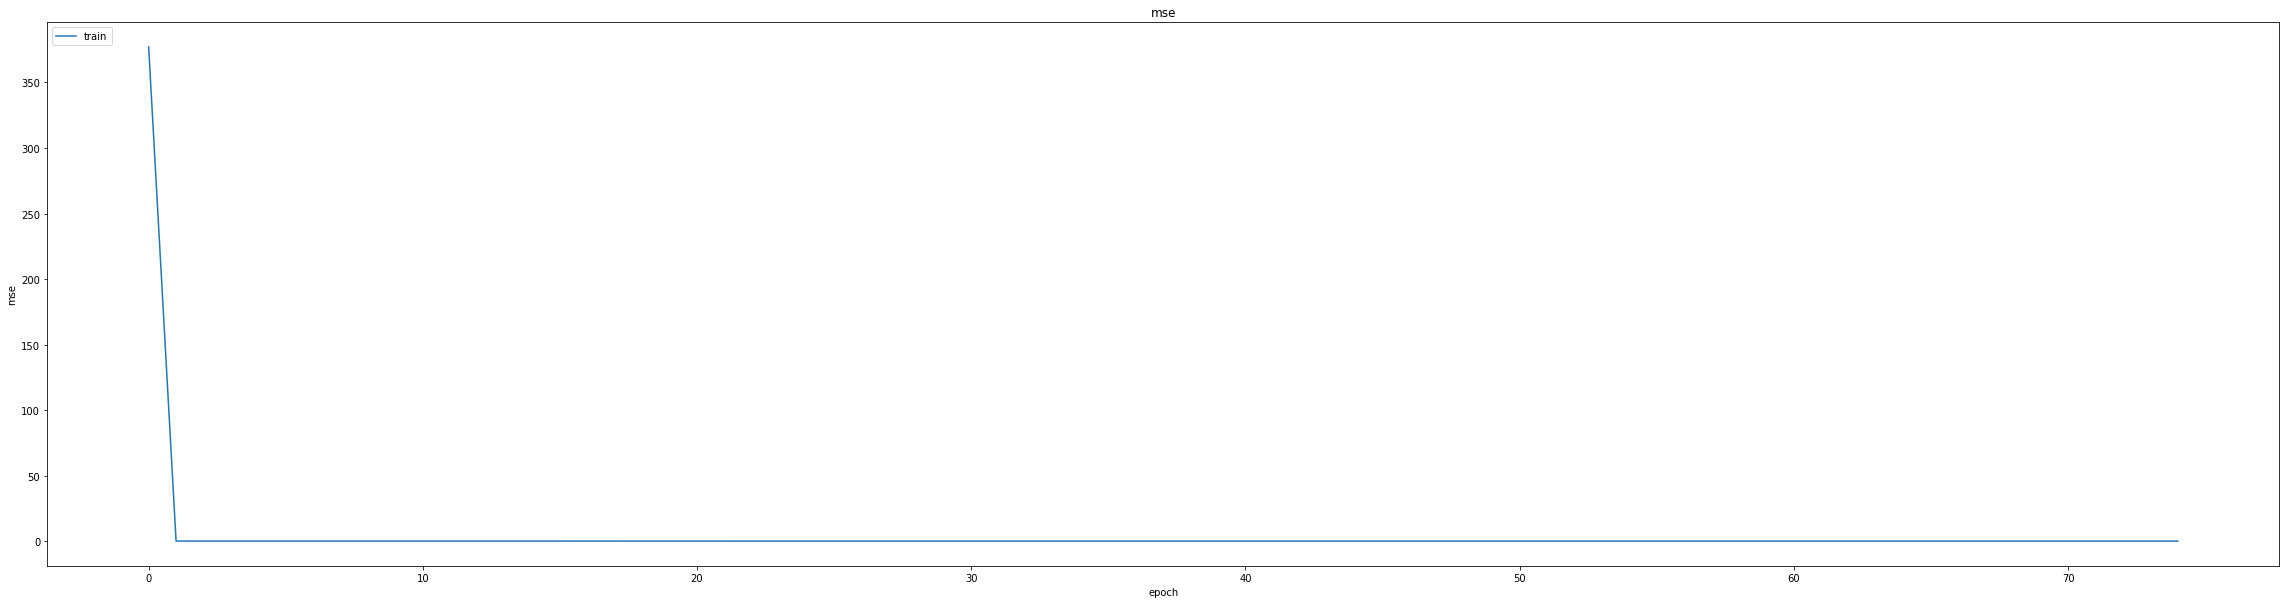

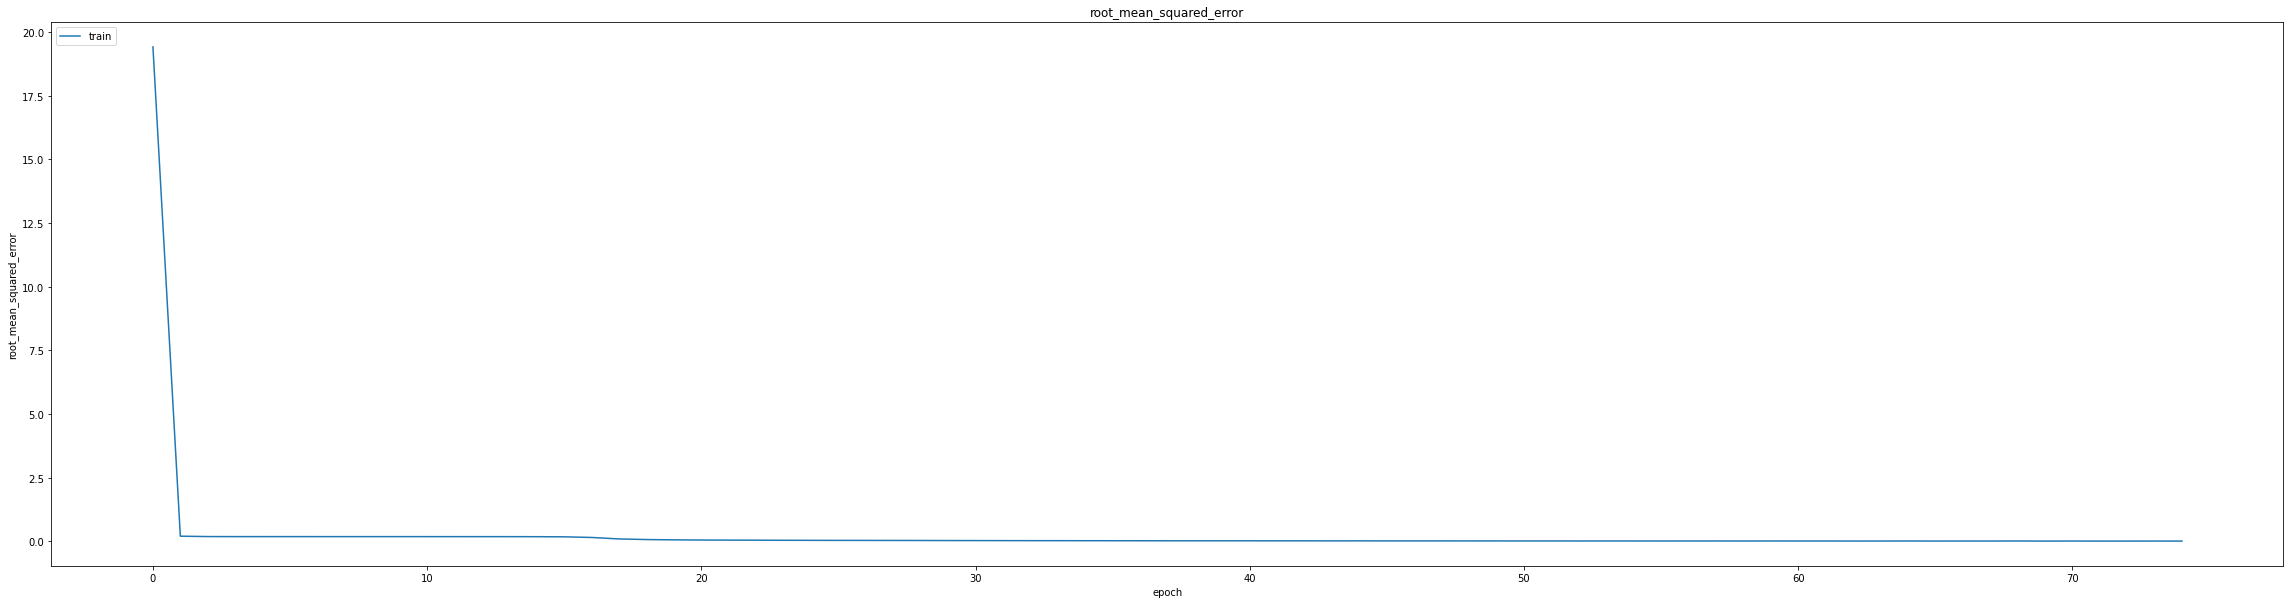

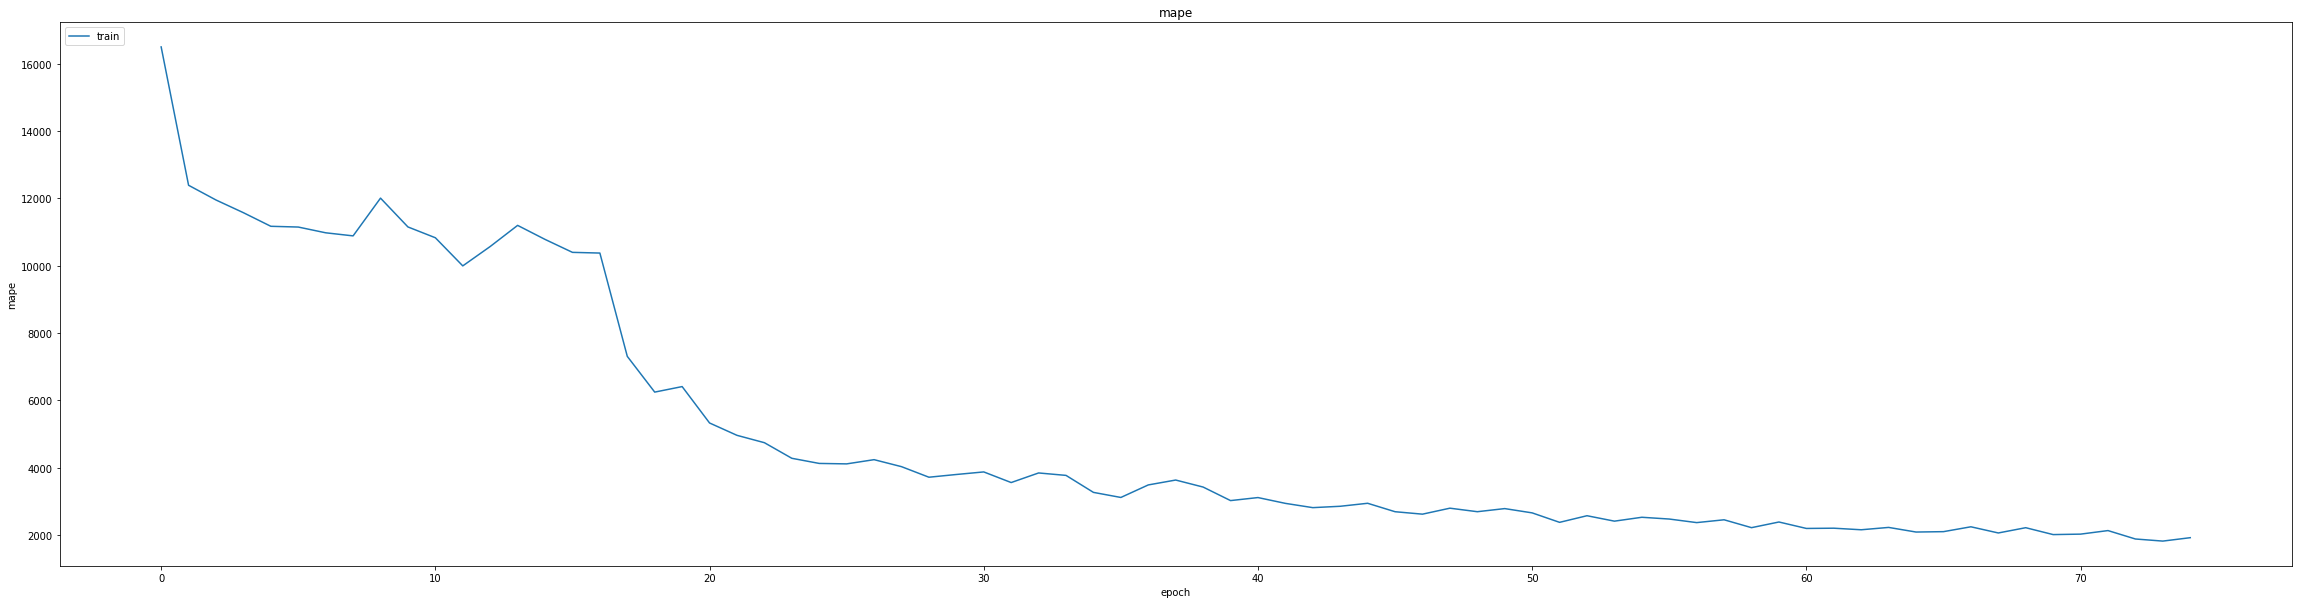

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.0262821763753891
0.029182225465774536
464/464 [==============================] - 2s 4ms/step
0.9848214628044033


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
345/348 [============================>.] - ETA: 0s - loss: 3.6068e-04 - mae: 0.0086 - mse: 3.6068e-04 - root_mean_squared_error: 0.0190 - mape: 2018.4412
Epoch 1: val_mse did not improve from 0.00085
348/348 [==============================] - 8s 14ms/step - loss: 3.5796e-04 - mae: 0.0085 - mse: 3.5796e-04 - root_mean_squared_error: 0.0189 - mape: 2001.6351 - val_loss: 0.0011 - val_mae: 0.0307 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0326 - val_mape: 5704.8779 - lr: 0.0010
Epoch 2/25
346/348 [============================>.] - ETA: 0s - loss: 4.0406e-05 - mae: 0.0046 - mse: 4.0406e-05 - root_mean_squared_error: 0.0064 - mape: 2006.6785
Epoch 2: val_mse did not improve from 0.00085
348/348 [==============================] - 4s 11ms/step - loss: 4.0346e-05 - mae: 0.0046 - mse: 4.0346e-05 - root_mean_squared_error: 0.0064 - mape: 1995.7335 - val_loss: 9.1454e-04 - val_mae: 0.0287 - val_mse: 9.1454e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 5508.1880 - lr: 0.0

348/348 [==============================] - 13s 37ms/step - loss: 4.1181e-05 - mae: 0.0047 - mse: 4.1181e-05 - root_mean_squared_error: 0.0064 - mape: 2044.0192 - val_loss: 7.6831e-04 - val_mae: 0.0262 - val_mse: 7.6831e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 5312.9810 - lr: 9.0000e-04
Epoch 4/25
343/348 [============================>.] - ETA: 0s - loss: 4.5819e-05 - mae: 0.0050 - mse: 4.5819e-05 - root_mean_squared_error: 0.0068 - mape: 2135.3555
Epoch 4: val_mse did not improve from 0.00077
348/348 [==============================] - 4s 11ms/step - loss: 4.6950e-05 - mae: 0.0051 - mse: 4.6950e-05 - root_mean_squared_error: 0.0069 - mape: 2105.3203 - val_loss: 0.0013 - val_mae: 0.0360 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 5310.8472 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
344/348 [============================>.] - ETA: 0s - loss: 5.1027e-05 - mae: 0.0054 - mse: 5.1027e-05 - root_mean_squared_error: 0.0071 - mape: 2026.04

348/348 [==============================] - 18s 52ms/step - loss: 4.2149e-05 - mae: 0.0049 - mse: 4.2149e-05 - root_mean_squared_error: 0.0065 - mape: 1653.3728 - val_loss: 6.7453e-04 - val_mae: 0.0245 - val_mse: 6.7453e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 4790.8726 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
347/348 [============================>.] - ETA: 0s - loss: 3.3227e-05 - mae: 0.0042 - mse: 3.3227e-05 - root_mean_squared_error: 0.0058 - mape: 1654.3319
Epoch 13: val_mse did not improve from 0.00067
348/348 [==============================] - 4s 11ms/step - loss: 3.3200e-05 - mae: 0.0042 - mse: 3.3200e-05 - root_mean_squared_error: 0.0058 - mape: 1650.0624 - val_loss: 9.3838e-04 - val_mae: 0.0297 - val_mse: 9.3838e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 4741.1680 - lr: 5.3144e-04
Epoch 14/25
343/348 [============================>.] - ETA: 0s - loss: 3.3350e-05 - mae: 0.0043 - mse: 3.3350e-05 - root_mean_squared_error: 0.0058 - ma

348/348 [==============================] - 13s 36ms/step - loss: 3.3320e-05 - mae: 0.0043 - mse: 3.3320e-05 - root_mean_squared_error: 0.0058 - mape: 1616.7502 - val_loss: 6.2122e-04 - val_mae: 0.0232 - val_mse: 6.2122e-04 - val_root_mean_squared_error: 0.0249 - val_mape: 4614.9985 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
346/348 [============================>.] - ETA: 0s - loss: 3.1502e-05 - mae: 0.0041 - mse: 3.1502e-05 - root_mean_squared_error: 0.0056 - mape: 1650.3105
Epoch 15: val_mse did not improve from 0.00062
348/348 [==============================] - 4s 11ms/step - loss: 3.1477e-05 - mae: 0.0041 - mse: 3.1477e-05 - root_mean_squared_error: 0.0056 - mape: 1641.3109 - val_loss: 6.9437e-04 - val_mae: 0.0253 - val_mse: 6.9437e-04 - val_root_mean_squared_error: 0.0264 - val_mape: 4570.8564 - lr: 4.7830e-04
Epoch 16/25
345/348 [============================>.] - ETA: 0s - loss: 3.1346e-05 - mae: 0.0040 - mse: 3.1346e-05 - root_mean_squared_error: 0.0056 - m

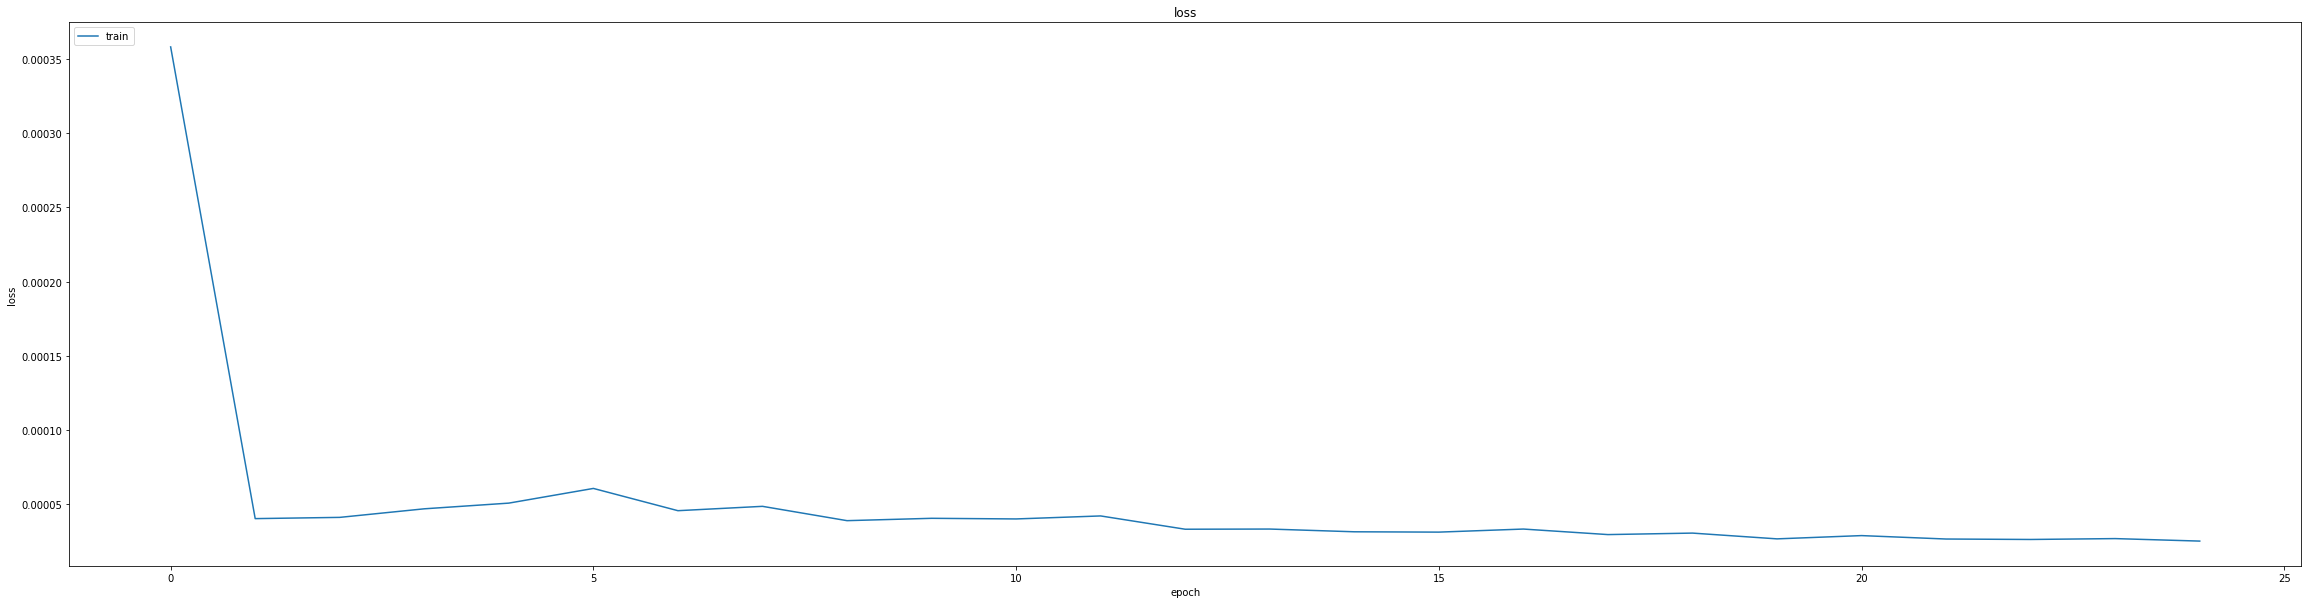

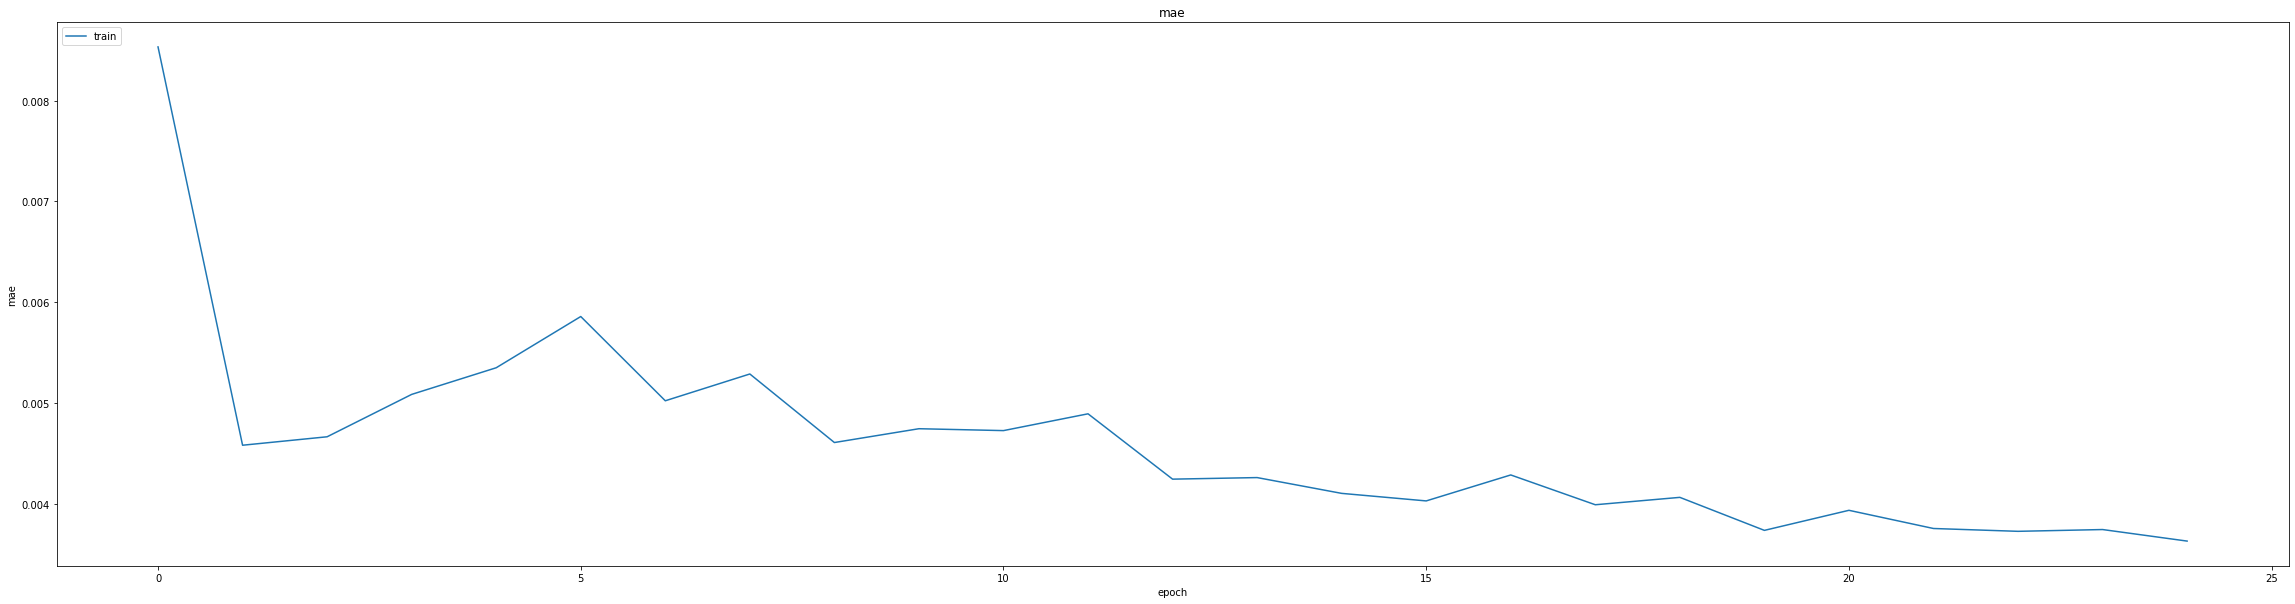

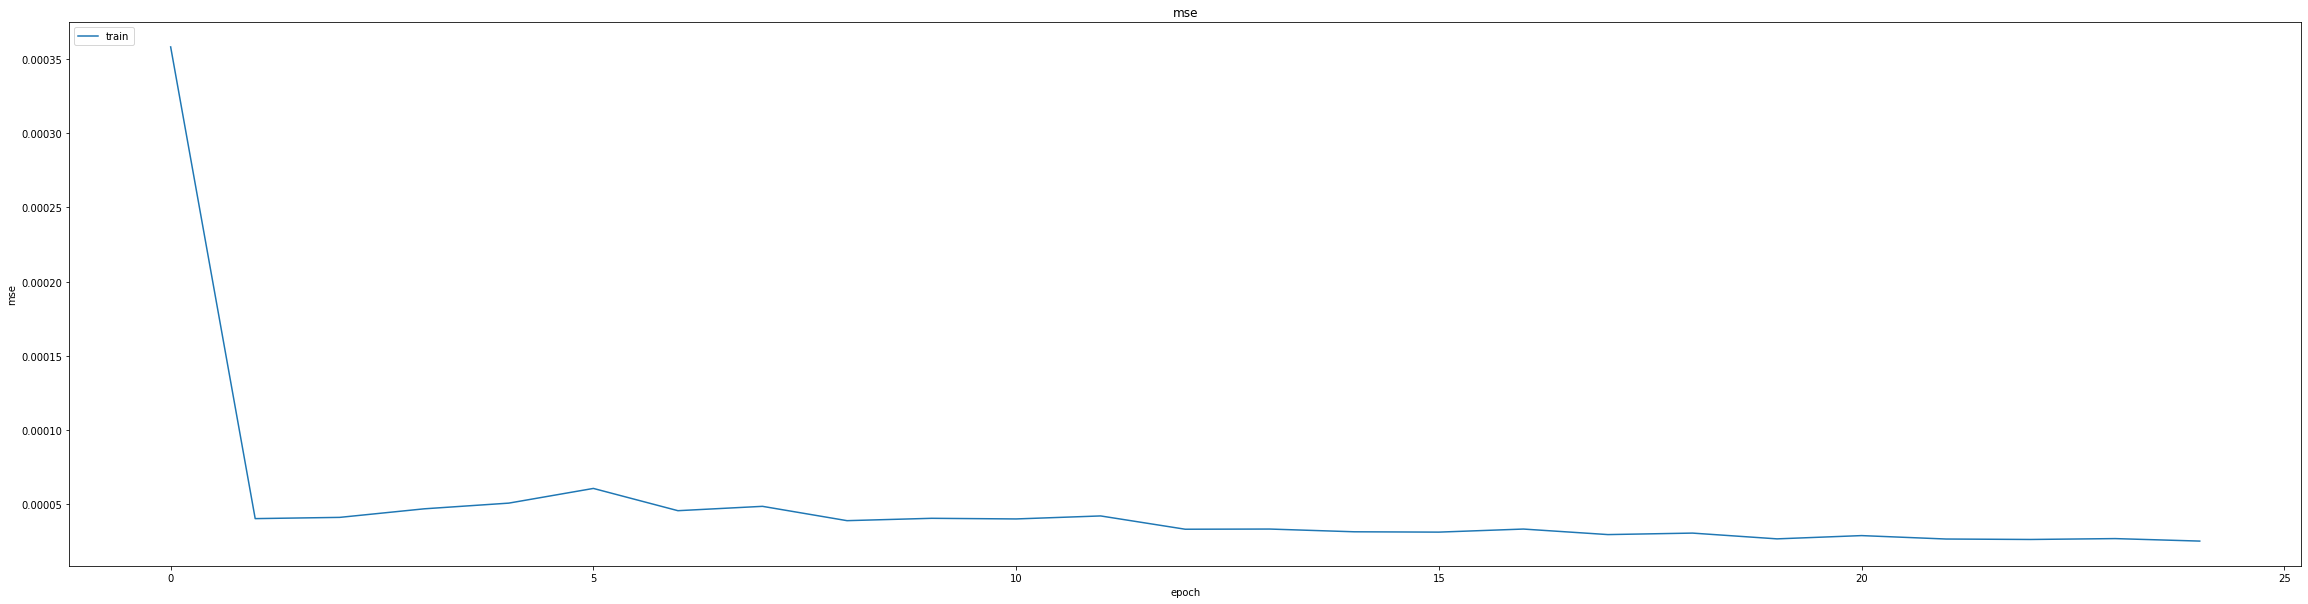

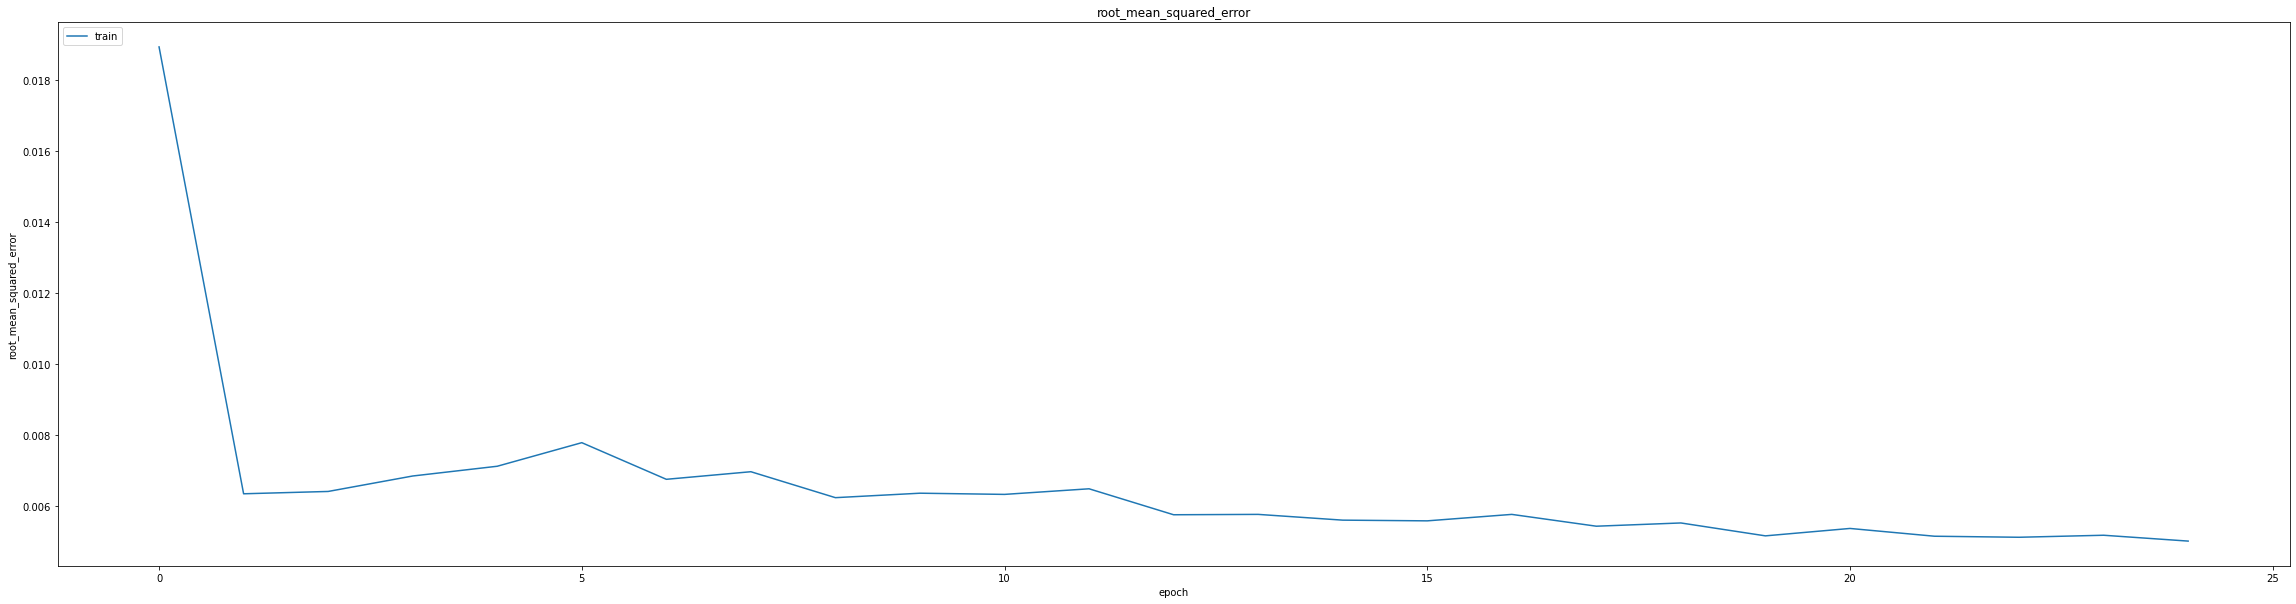

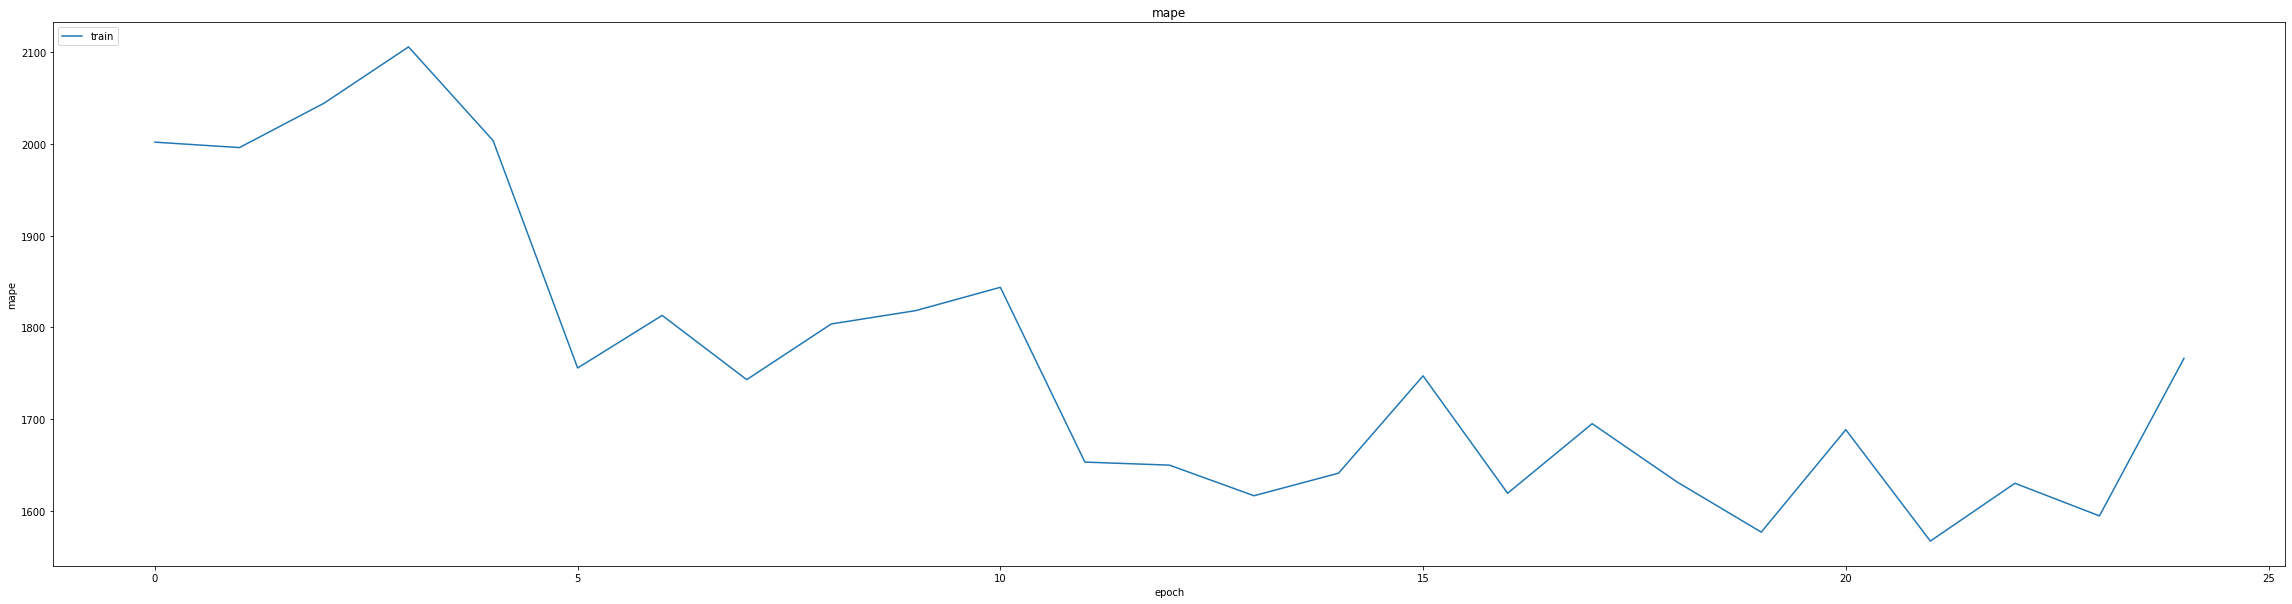

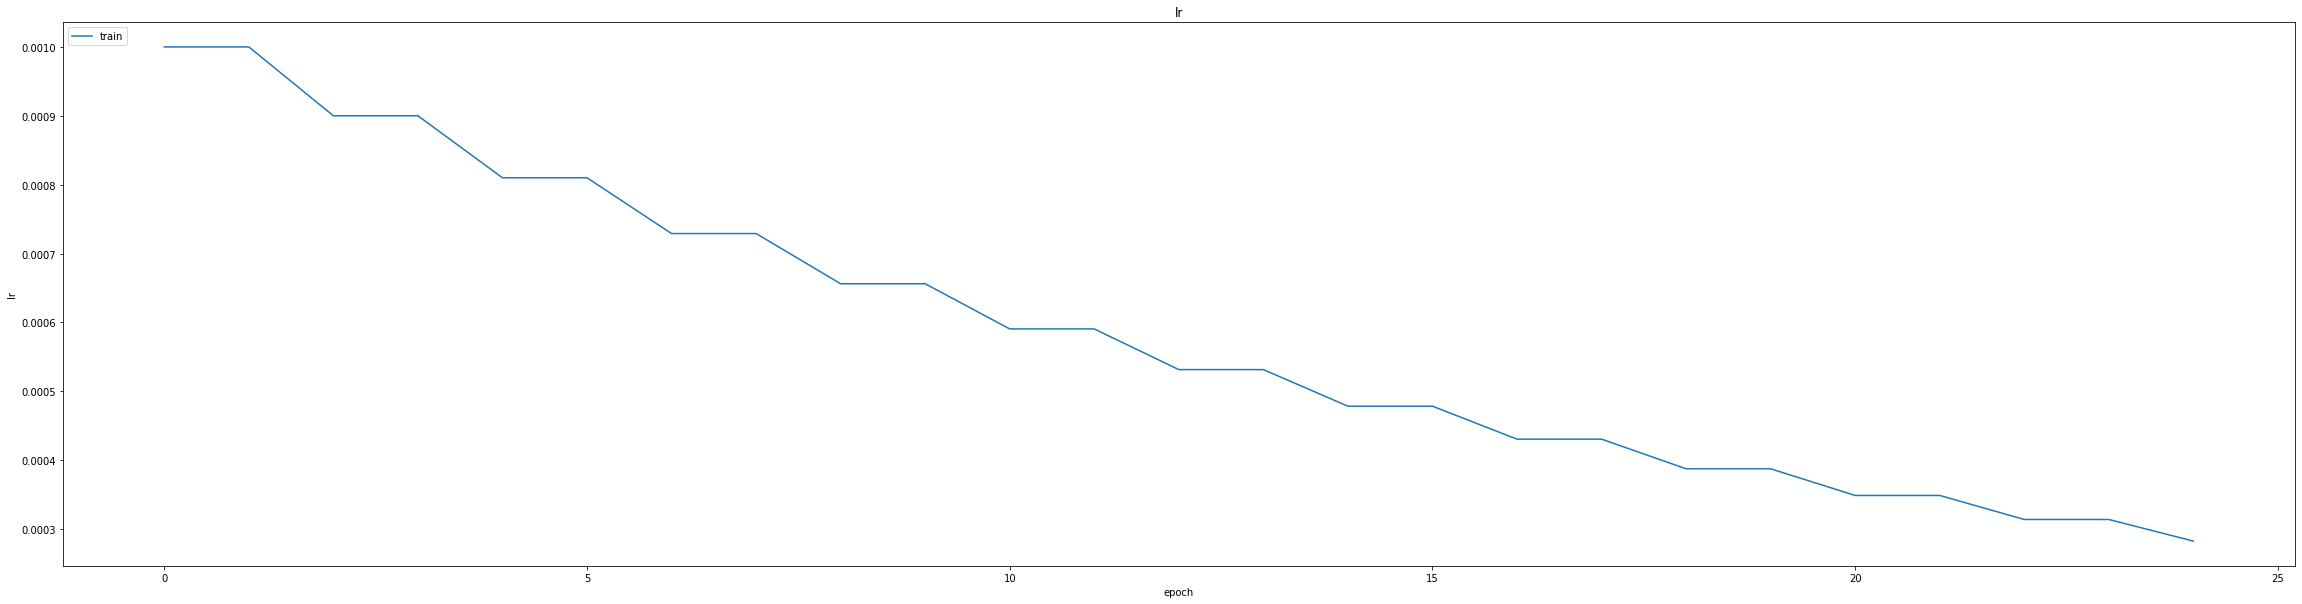

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.02317718230187893
0.024924293160438538
464/464 [==============================] - 2s 4ms/step
0.9906313116730681


464/464 [==============================] - 2s 4ms/step


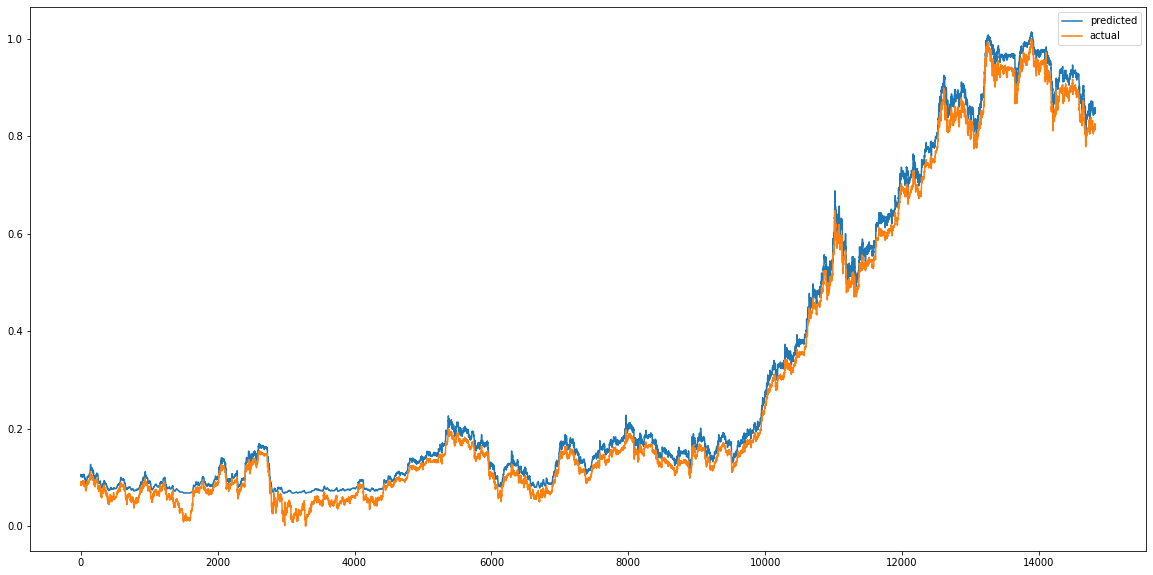

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


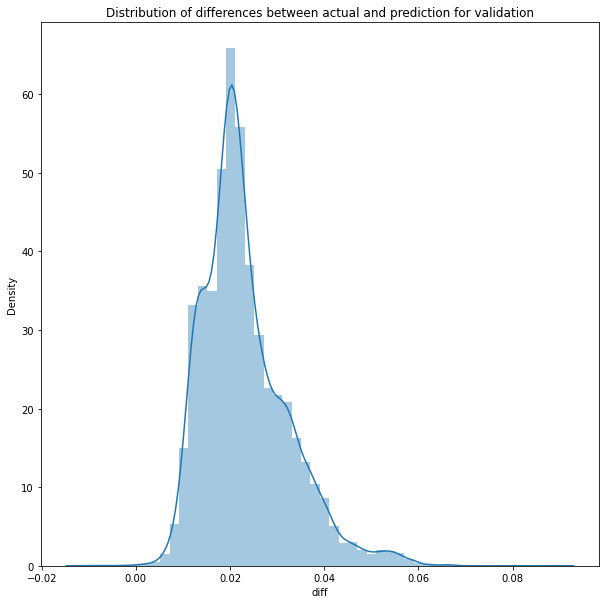

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


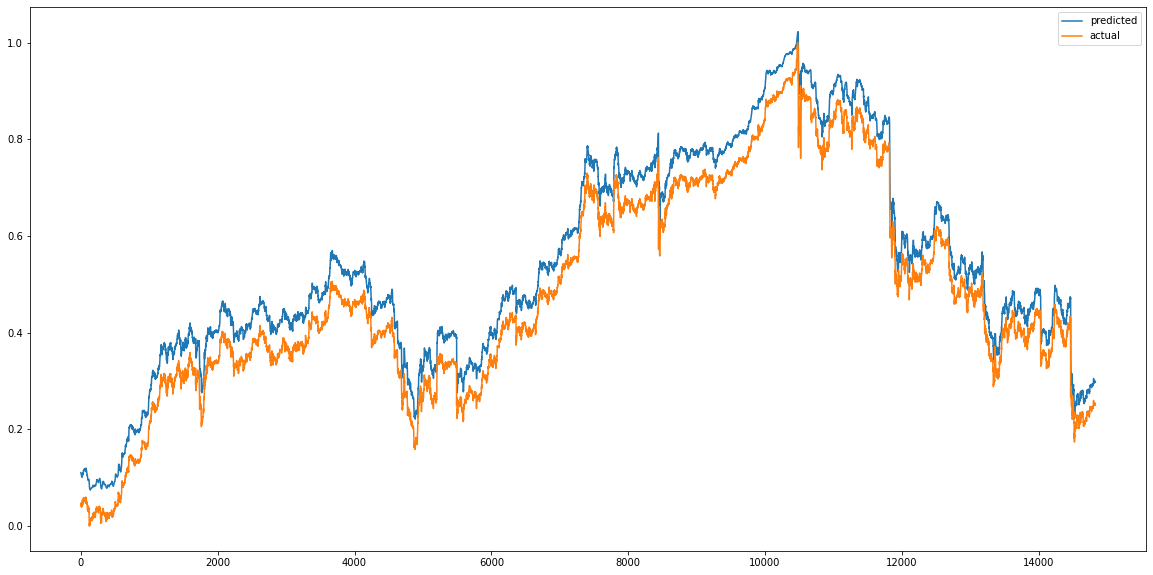

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


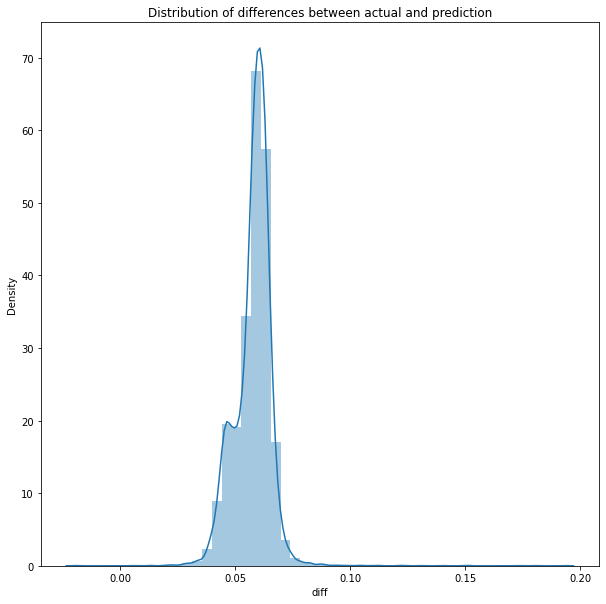

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0033929374841965535
RMSE :  0.05824892689309009
MAE :  0.05769848488904345
464/464 [==============================] - 2s 5ms/step
R2_Score  : 0.9296438168794607


count    14828.000000
mean         0.057693
std          0.008026
min         -0.020029
25%          0.053906
50%          0.058960
75%          0.062430
max          0.193556
Name: diff, dtype: float64

**CNN_BiLSTM_MODEL**

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 896.3260 - mae: 6.1243 - mse: 896.3260 - root_mean_squared_error: 29.9387 - mape: 14738.7900
Epoch 1: val_mse improved from inf to 0.13417, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 34s 73ms/step - loss: 891.4351 - mae: 6.0917 - mse: 891.4351 - root_mean_squared_error: 29.8569 - mape: 14658.6152 - val_loss: 0.1342 - val_mae: 0.3484 - val_mse: 0.1342 - val_root_mean_squared_error: 0.3663 - val_mape: 33318.6875
Epoch 2/75
344/348 [============================>.] - ETA: 0s - loss: 0.0352 - mae: 0.1604 - mse: 0.0352 - root_mean_squared_error: 0.1875 - mape: 11258.2998
Epoch 2: val_mse improved from 0.13417 to 0.12585, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 24s 70ms/step - loss: 0.0351 - mae: 0.1603 - mse: 0.0351 - root_mean_squared_error: 0.1874 - mape: 11132.6035 - val_loss: 0.1258 - val_mae: 0.3376 - val_mse: 0.1258 - val_root_mean_squared_error: 0.3548 - val_mape: 32152.3496
Epoch 3/75
348/348 [==============================] - ETA: 0s - loss: 0.0330 - mae: 0.1553 - mse: 0.0330 - root_mean_squared_error: 0.1817 - mape: 10975.8057
Epoch 3: val_mse improved from 0.12585 to 0.11495, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 0.0330 - mae: 0.1553 - mse: 0.0330 - root_mean_squared_error: 0.1817 - mape: 10975.8057 - val_loss: 0.1150 - val_mae: 0.3218 - val_mse: 0.1150 - val_root_mean_squared_error: 0.3390 - val_mape: 31425.6914
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 0.0299 - mae: 0.1476 - mse: 0.0299 - root_mean_squared_error: 0.1730 - mape: 10239.8877
Epoch 4: val_mse improved from 0.11495 to 0.10303, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 0.0299 - mae: 0.1476 - mse: 0.0299 - root_mean_squared_error: 0.1730 - mape: 10213.5645 - val_loss: 0.1030 - val_mae: 0.3041 - val_mse: 0.1030 - val_root_mean_squared_error: 0.3210 - val_mape: 29789.6797
Epoch 5/75
345/348 [============================>.] - ETA: 0s - loss: 0.0131 - mae: 0.0886 - mse: 0.0131 - root_mean_squared_error: 0.1144 - mape: 7940.8813
Epoch 5: val_mse improved from 0.10303 to 0.03487, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 0.0130 - mae: 0.0883 - mse: 0.0130 - root_mean_squared_error: 0.1142 - mape: 7874.8813 - val_loss: 0.0349 - val_mae: 0.1721 - val_mse: 0.0349 - val_root_mean_squared_error: 0.1867 - val_mape: 18617.2441
Epoch 6/75
348/348 [==============================] - ETA: 0s - loss: 0.0044 - mae: 0.0490 - mse: 0.0044 - root_mean_squared_error: 0.0665 - mape: 6064.8887
Epoch 6: val_mse improved from 0.03487 to 0.02382, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 24s 70ms/step - loss: 0.0044 - mae: 0.0490 - mse: 0.0044 - root_mean_squared_error: 0.0665 - mape: 6064.8887 - val_loss: 0.0238 - val_mae: 0.1399 - val_mse: 0.0238 - val_root_mean_squared_error: 0.1543 - val_mape: 16505.6641
Epoch 7/75
348/348 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0370 - mse: 0.0026 - root_mean_squared_error: 0.0514 - mape: 6130.4917
Epoch 7: val_mse improved from 0.02382 to 0.01781, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 73ms/step - loss: 0.0026 - mae: 0.0370 - mse: 0.0026 - root_mean_squared_error: 0.0514 - mape: 6130.4917 - val_loss: 0.0178 - val_mae: 0.1202 - val_mse: 0.0178 - val_root_mean_squared_error: 0.1335 - val_mape: 15201.5732
Epoch 8/75
345/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0318 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 5258.0312
Epoch 8: val_mse improved from 0.01781 to 0.01393, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 0.0019 - mae: 0.0318 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 5214.2886 - val_loss: 0.0139 - val_mae: 0.1065 - val_mse: 0.0139 - val_root_mean_squared_error: 0.1180 - val_mape: 14076.9668
Epoch 9/75
347/348 [============================>.] - ETA: 0s - loss: 0.0016 - mae: 0.0290 - mse: 0.0016 - root_mean_squared_error: 0.0395 - mape: 4735.8828
Epoch 9: val_mse improved from 0.01393 to 0.01134, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 0.0016 - mae: 0.0290 - mse: 0.0016 - root_mean_squared_error: 0.0395 - mape: 4723.6694 - val_loss: 0.0113 - val_mae: 0.0962 - val_mse: 0.0113 - val_root_mean_squared_error: 0.1065 - val_mape: 13370.2109
Epoch 10/75
345/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0268 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 4987.3188
Epoch 10: val_mse improved from 0.01134 to 0.00954, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 0.0013 - mae: 0.0268 - mse: 0.0013 - root_mean_squared_error: 0.0360 - mape: 4945.8242 - val_loss: 0.0095 - val_mae: 0.0884 - val_mse: 0.0095 - val_root_mean_squared_error: 0.0977 - val_mape: 12851.7051
Epoch 11/75
346/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 4267.9951
Epoch 11: val_mse improved from 0.00954 to 0.00822, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 0.0011 - mae: 0.0253 - mse: 0.0011 - root_mean_squared_error: 0.0334 - mape: 4244.7466 - val_loss: 0.0082 - val_mae: 0.0818 - val_mse: 0.0082 - val_root_mean_squared_error: 0.0906 - val_mape: 12450.1279
Epoch 12/75
346/348 [============================>.] - ETA: 0s - loss: 9.8526e-04 - mae: 0.0240 - mse: 9.8526e-04 - root_mean_squared_error: 0.0314 - mape: 4463.2539
Epoch 12: val_mse improved from 0.00822 to 0.00743, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 24s 71ms/step - loss: 9.8419e-04 - mae: 0.0240 - mse: 9.8419e-04 - root_mean_squared_error: 0.0314 - mape: 4438.9312 - val_loss: 0.0074 - val_mae: 0.0785 - val_mse: 0.0074 - val_root_mean_squared_error: 0.0862 - val_mape: 12096.3262
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 9.1153e-04 - mae: 0.0233 - mse: 9.1153e-04 - root_mean_squared_error: 0.0302 - mape: 4407.2695
Epoch 13: val_mse improved from 0.00743 to 0.00694, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 26s 74ms/step - loss: 9.1049e-04 - mae: 0.0233 - mse: 9.1049e-04 - root_mean_squared_error: 0.0302 - mape: 4383.2510 - val_loss: 0.0069 - val_mae: 0.0764 - val_mse: 0.0069 - val_root_mean_squared_error: 0.0833 - val_mape: 11826.3809
Epoch 14/75
345/348 [============================>.] - ETA: 0s - loss: 8.4750e-04 - mae: 0.0225 - mse: 8.4750e-04 - root_mean_squared_error: 0.0291 - mape: 4281.5454
Epoch 14: val_mse improved from 0.00694 to 0.00649, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 8.4551e-04 - mae: 0.0225 - mse: 8.4551e-04 - root_mean_squared_error: 0.0291 - mape: 4245.9165 - val_loss: 0.0065 - val_mae: 0.0739 - val_mse: 0.0065 - val_root_mean_squared_error: 0.0806 - val_mape: 11557.1924
Epoch 15/75
345/348 [============================>.] - ETA: 0s - loss: 8.1288e-04 - mae: 0.0220 - mse: 8.1288e-04 - root_mean_squared_error: 0.0285 - mape: 4161.9434
Epoch 15: val_mse did not improve from 0.00649
348/348 [==============================] - 5s 15ms/step - loss: 8.1238e-04 - mae: 0.0220 - mse: 8.1238e-04 - root_mean_squared_error: 0.0285 - mape: 4127.3154 - val_loss: 0.0067 - val_mae: 0.0762 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0819 - val_mape: 11388.8232
Epoch 16/75
346/348 [============================>.] - ETA: 0s - loss: 7.7550e-04 - mae: 0.0215 - mse: 7.7550e-04 - root_mean_squared_error: 0.0278 - mape: 3656.2581
Epoch 16: val_mse improved from 0.00649 to 0.00621, saving model to /c

348/348 [==============================] - 25s 71ms/step - loss: 7.7498e-04 - mae: 0.0215 - mse: 7.7498e-04 - root_mean_squared_error: 0.0278 - mape: 3636.3389 - val_loss: 0.0062 - val_mae: 0.0732 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0788 - val_mape: 11143.0977
Epoch 17/75
347/348 [============================>.] - ETA: 0s - loss: 7.3655e-04 - mae: 0.0209 - mse: 7.3655e-04 - root_mean_squared_error: 0.0271 - mape: 3951.0706
Epoch 17: val_mse improved from 0.00621 to 0.00595, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 7.3713e-04 - mae: 0.0210 - mse: 7.3713e-04 - root_mean_squared_error: 0.0272 - mape: 3940.8826 - val_loss: 0.0059 - val_mae: 0.0717 - val_mse: 0.0059 - val_root_mean_squared_error: 0.0771 - val_mape: 10974.5635
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 6.9255e-04 - mae: 0.0204 - mse: 6.9255e-04 - root_mean_squared_error: 0.0263 - mape: 3913.7471
Epoch 18: val_mse did not improve from 0.00595
348/348 [==============================] - 5s 15ms/step - loss: 6.9252e-04 - mae: 0.0204 - mse: 6.9252e-04 - root_mean_squared_error: 0.0263 - mape: 3892.4263 - val_loss: 0.0060 - val_mae: 0.0722 - val_mse: 0.0060 - val_root_mean_squared_error: 0.0772 - val_mape: 10831.5703
Epoch 19/75
347/348 [============================>.] - ETA: 0s - loss: 6.6040e-04 - mae: 0.0199 - mse: 6.6040e-04 - root_mean_squared_error: 0.0257 - mape: 3946.2615
Epoch 19: val_mse did not improve from 0.00595
348/348 [==============

348/348 [==============================] - 24s 70ms/step - loss: 6.0241e-04 - mae: 0.0190 - mse: 6.0241e-04 - root_mean_squared_error: 0.0245 - mape: 3685.5842 - val_loss: 0.0057 - val_mae: 0.0712 - val_mse: 0.0057 - val_root_mean_squared_error: 0.0753 - val_mape: 10317.9932
Epoch 22/75
346/348 [============================>.] - ETA: 0s - loss: 5.6860e-04 - mae: 0.0184 - mse: 5.6860e-04 - root_mean_squared_error: 0.0238 - mape: 3555.1951
Epoch 22: val_mse improved from 0.00567 to 0.00532, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 5.6835e-04 - mae: 0.0184 - mse: 5.6835e-04 - root_mean_squared_error: 0.0238 - mape: 3535.8174 - val_loss: 0.0053 - val_mae: 0.0688 - val_mse: 0.0053 - val_root_mean_squared_error: 0.0730 - val_mape: 10206.8604
Epoch 23/75
348/348 [==============================] - ETA: 0s - loss: 5.2320e-04 - mae: 0.0177 - mse: 5.2320e-04 - root_mean_squared_error: 0.0229 - mape: 3624.4792
Epoch 23: val_mse improved from 0.00532 to 0.00510, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 26s 74ms/step - loss: 5.2320e-04 - mae: 0.0177 - mse: 5.2320e-04 - root_mean_squared_error: 0.0229 - mape: 3624.4792 - val_loss: 0.0051 - val_mae: 0.0672 - val_mse: 0.0051 - val_root_mean_squared_error: 0.0714 - val_mape: 10053.9805
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 4.8553e-04 - mae: 0.0170 - mse: 4.8553e-04 - root_mean_squared_error: 0.0220 - mape: 3383.3235
Epoch 24: val_mse did not improve from 0.00510
348/348 [==============================] - 5s 15ms/step - loss: 4.8524e-04 - mae: 0.0170 - mse: 4.8524e-04 - root_mean_squared_error: 0.0220 - mape: 3374.5955 - val_loss: 0.0054 - val_mae: 0.0695 - val_mse: 0.0054 - val_root_mean_squared_error: 0.0732 - val_mape: 9899.7529
Epoch 25/75
347/348 [============================>.] - ETA: 0s - loss: 4.5302e-04 - mae: 0.0164 - mse: 4.5302e-04 - root_mean_squared_error: 0.0213 - mape: 3422.3022
Epoch 25: val_mse improved from 0.00510 to 0.00489, saving model to /co

348/348 [==============================] - 25s 72ms/step - loss: 4.5307e-04 - mae: 0.0164 - mse: 4.5307e-04 - root_mean_squared_error: 0.0213 - mape: 3413.4758 - val_loss: 0.0049 - val_mae: 0.0662 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0699 - val_mape: 9679.1592
Epoch 26/75
346/348 [============================>.] - ETA: 0s - loss: 4.2211e-04 - mae: 0.0158 - mse: 4.2211e-04 - root_mean_squared_error: 0.0205 - mape: 3595.1318
Epoch 26: val_mse improved from 0.00489 to 0.00482, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 72ms/step - loss: 4.2182e-04 - mae: 0.0158 - mse: 4.2182e-04 - root_mean_squared_error: 0.0205 - mape: 3575.5366 - val_loss: 0.0048 - val_mae: 0.0659 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0694 - val_mape: 9532.6289
Epoch 27/75
347/348 [============================>.] - ETA: 0s - loss: 3.7062e-04 - mae: 0.0148 - mse: 3.7062e-04 - root_mean_squared_error: 0.0193 - mape: 3336.0112
Epoch 27: val_mse did not improve from 0.00482
348/348 [==============================] - 5s 15ms/step - loss: 3.7063e-04 - mae: 0.0148 - mse: 3.7063e-04 - root_mean_squared_error: 0.0193 - mape: 3327.4053 - val_loss: 0.0050 - val_mae: 0.0672 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0704 - val_mape: 9336.7354
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 3.4338e-04 - mae: 0.0142 - mse: 3.4338e-04 - root_mean_squared_error: 0.0185 - mape: 3381.5596
Epoch 28: val_mse improved from 0.00482 to 0.00473, saving model to /con

348/348 [==============================] - 25s 71ms/step - loss: 3.4310e-04 - mae: 0.0142 - mse: 3.4310e-04 - root_mean_squared_error: 0.0185 - mape: 3363.1233 - val_loss: 0.0047 - val_mae: 0.0658 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0688 - val_mape: 9276.5205
Epoch 29/75
347/348 [============================>.] - ETA: 0s - loss: 3.0427e-04 - mae: 0.0134 - mse: 3.0427e-04 - root_mean_squared_error: 0.0174 - mape: 3116.1924
Epoch 29: val_mse did not improve from 0.00473
348/348 [==============================] - 5s 15ms/step - loss: 3.0416e-04 - mae: 0.0134 - mse: 3.0416e-04 - root_mean_squared_error: 0.0174 - mape: 3108.1543 - val_loss: 0.0050 - val_mae: 0.0683 - val_mse: 0.0050 - val_root_mean_squared_error: 0.0709 - val_mape: 9171.8564
Epoch 30/75
344/348 [============================>.] - ETA: 0s - loss: 2.7541e-04 - mae: 0.0128 - mse: 2.7541e-04 - root_mean_squared_error: 0.0166 - mape: 3077.4302
Epoch 30: val_mse improved from 0.00473 to 0.00418, saving model to /con

348/348 [==============================] - 25s 71ms/step - loss: 2.7504e-04 - mae: 0.0127 - mse: 2.7504e-04 - root_mean_squared_error: 0.0166 - mape: 3042.9771 - val_loss: 0.0042 - val_mae: 0.0618 - val_mse: 0.0042 - val_root_mean_squared_error: 0.0646 - val_mape: 8891.6562
Epoch 31/75
347/348 [============================>.] - ETA: 0s - loss: 2.3888e-04 - mae: 0.0118 - mse: 2.3888e-04 - root_mean_squared_error: 0.0155 - mape: 3184.9475
Epoch 31: val_mse did not improve from 0.00418
348/348 [==============================] - 5s 15ms/step - loss: 2.3877e-04 - mae: 0.0118 - mse: 2.3877e-04 - root_mean_squared_error: 0.0155 - mape: 3176.7292 - val_loss: 0.0046 - val_mae: 0.0657 - val_mse: 0.0046 - val_root_mean_squared_error: 0.0680 - val_mape: 8750.1270
Epoch 32/75
345/348 [============================>.] - ETA: 0s - loss: 2.1204e-04 - mae: 0.0111 - mse: 2.1204e-04 - root_mean_squared_error: 0.0146 - mape: 3110.8093
Epoch 32: val_mse did not improve from 0.00418
348/348 [================

348/348 [==============================] - 26s 74ms/step - loss: 1.7039e-04 - mae: 0.0099 - mse: 1.7039e-04 - root_mean_squared_error: 0.0131 - mape: 2977.3765 - val_loss: 0.0040 - val_mae: 0.0611 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0632 - val_mape: 8189.9346
Epoch 35/75
346/348 [============================>.] - ETA: 0s - loss: 1.5118e-04 - mae: 0.0094 - mse: 1.5118e-04 - root_mean_squared_error: 0.0123 - mape: 2828.3430
Epoch 35: val_mse improved from 0.00400 to 0.00385, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 1.5129e-04 - mae: 0.0094 - mse: 1.5129e-04 - root_mean_squared_error: 0.0123 - mape: 2812.9238 - val_loss: 0.0039 - val_mae: 0.0600 - val_mse: 0.0039 - val_root_mean_squared_error: 0.0621 - val_mape: 7968.1782
Epoch 36/75
347/348 [============================>.] - ETA: 0s - loss: 1.3570e-04 - mae: 0.0088 - mse: 1.3570e-04 - root_mean_squared_error: 0.0116 - mape: 2587.8640
Epoch 36: val_mse did not improve from 0.00385
348/348 [==============================] - 5s 15ms/step - loss: 1.3559e-04 - mae: 0.0088 - mse: 1.3559e-04 - root_mean_squared_error: 0.0116 - mape: 2581.1855 - val_loss: 0.0040 - val_mae: 0.0615 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0635 - val_mape: 7774.7754
Epoch 37/75
348/348 [==============================] - ETA: 0s - loss: 1.2543e-04 - mae: 0.0084 - mse: 1.2543e-04 - root_mean_squared_error: 0.0112 - mape: 2597.9297
Epoch 37: val_mse did not improve from 0.00385
348/348 [================

348/348 [==============================] - 25s 72ms/step - loss: 1.1758e-04 - mae: 0.0082 - mse: 1.1758e-04 - root_mean_squared_error: 0.0108 - mape: 2632.6599 - val_loss: 0.0037 - val_mae: 0.0589 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0607 - val_mape: 7492.0889
Epoch 39/75
348/348 [==============================] - ETA: 0s - loss: 1.0599e-04 - mae: 0.0077 - mse: 1.0599e-04 - root_mean_squared_error: 0.0103 - mape: 2697.8960
Epoch 39: val_mse improved from 0.00368 to 0.00336, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 71ms/step - loss: 1.0599e-04 - mae: 0.0077 - mse: 1.0599e-04 - root_mean_squared_error: 0.0103 - mape: 2697.8960 - val_loss: 0.0034 - val_mae: 0.0560 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0580 - val_mape: 7357.7734
Epoch 40/75
345/348 [============================>.] - ETA: 0s - loss: 9.8228e-05 - mae: 0.0075 - mse: 9.8228e-05 - root_mean_squared_error: 0.0099 - mape: 2466.8425
Epoch 40: val_mse did not improve from 0.00336
348/348 [==============================] - 5s 15ms/step - loss: 9.8203e-05 - mae: 0.0075 - mse: 9.8203e-05 - root_mean_squared_error: 0.0099 - mape: 2446.3049 - val_loss: 0.0036 - val_mae: 0.0578 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0597 - val_mape: 7248.5103
Epoch 41/75
348/348 [==============================] - ETA: 0s - loss: 9.8575e-05 - mae: 0.0075 - mse: 9.8575e-05 - root_mean_squared_error: 0.0099 - mape: 2454.8220
Epoch 41: val_mse did not improve from 0.00336
348/348 [================

348/348 [==============================] - 25s 71ms/step - loss: 7.9736e-05 - mae: 0.0067 - mse: 7.9736e-05 - root_mean_squared_error: 0.0089 - mape: 2278.4736 - val_loss: 0.0033 - val_mae: 0.0557 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0574 - val_mape: 6617.4614
Epoch 48/75
345/348 [============================>.] - ETA: 0s - loss: 7.0022e-05 - mae: 0.0062 - mse: 7.0022e-05 - root_mean_squared_error: 0.0084 - mape: 2164.6023
Epoch 48: val_mse did not improve from 0.00330
348/348 [==============================] - 5s 15ms/step - loss: 7.0195e-05 - mae: 0.0062 - mse: 7.0195e-05 - root_mean_squared_error: 0.0084 - mape: 2146.5811 - val_loss: 0.0036 - val_mae: 0.0580 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0599 - val_mape: 6616.8071
Epoch 49/75
348/348 [==============================] - ETA: 0s - loss: 7.2662e-05 - mae: 0.0064 - mse: 7.2662e-05 - root_mean_squared_error: 0.0085 - mape: 2323.6326
Epoch 49: val_mse did not improve from 0.00330
348/348 [================

348/348 [==============================] - 25s 71ms/step - loss: 8.2262e-05 - mae: 0.0069 - mse: 8.2262e-05 - root_mean_squared_error: 0.0091 - mape: 2105.1938 - val_loss: 0.0032 - val_mae: 0.0545 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0563 - val_mape: 6368.8496
Epoch 52/75
347/348 [============================>.] - ETA: 0s - loss: 8.0494e-05 - mae: 0.0067 - mse: 8.0494e-05 - root_mean_squared_error: 0.0090 - mape: 2113.4290
Epoch 52: val_mse improved from 0.00318 to 0.00279, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 25s 72ms/step - loss: 8.0841e-05 - mae: 0.0067 - mse: 8.0841e-05 - root_mean_squared_error: 0.0090 - mape: 2107.9792 - val_loss: 0.0028 - val_mae: 0.0512 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0528 - val_mape: 6216.7871
Epoch 53/75
346/348 [============================>.] - ETA: 0s - loss: 6.7143e-05 - mae: 0.0061 - mse: 6.7143e-05 - root_mean_squared_error: 0.0082 - mape: 2100.1963
Epoch 53: val_mse did not improve from 0.00279
348/348 [==============================] - 5s 15ms/step - loss: 6.7026e-05 - mae: 0.0061 - mse: 6.7026e-05 - root_mean_squared_error: 0.0082 - mape: 2088.7424 - val_loss: 0.0035 - val_mae: 0.0576 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0595 - val_mape: 6301.8711
Epoch 54/75
346/348 [============================>.] - ETA: 0s - loss: 6.6271e-05 - mae: 0.0061 - mse: 6.6271e-05 - root_mean_squared_error: 0.0081 - mape: 2077.3677
Epoch 54: val_mse did not improve from 0.00279
348/348 [================

348/348 [==============================] - 26s 74ms/step - loss: 5.3557e-05 - mae: 0.0054 - mse: 5.3557e-05 - root_mean_squared_error: 0.0073 - mape: 1806.1921 - val_loss: 0.0028 - val_mae: 0.0514 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0528 - val_mape: 5263.4883
Epoch 75/75
346/348 [============================>.] - ETA: 0s - loss: 5.9453e-05 - mae: 0.0058 - mse: 5.9453e-05 - root_mean_squared_error: 0.0077 - mape: 1690.9160
Epoch 75: val_mse did not improve from 0.00278
348/348 [==============================] - 5s 15ms/step - loss: 5.9382e-05 - mae: 0.0058 - mse: 5.9382e-05 - root_mean_squared_error: 0.0077 - mape: 1681.6956 - val_loss: 0.0031 - val_mae: 0.0538 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0556 - val_mape: 5192.6113


In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.051234085112810135
0.05275247246026993
464/464 [==============================] - 3s 5ms/step
0.9669203220764424


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
345/348 [============================>.] - ETA: 0s - loss: 2.4042e-04 - mae: 0.0073 - mse: 2.4042e-04 - root_mean_squared_error: 0.0155 - mape: 1830.9928
Epoch 1: val_mse did not improve from 0.00278
348/348 [==============================] - 11s 18ms/step - loss: 2.3867e-04 - mae: 0.0073 - mse: 2.3867e-04 - root_mean_squared_error: 0.0154 - mape: 1815.7471 - val_loss: 0.0029 - val_mae: 0.0520 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0537 - val_mape: 5757.1953 - lr: 0.0010
Epoch 2/25
347/348 [============================>.] - ETA: 0s - loss: 3.5489e-05 - mae: 0.0043 - mse: 3.5489e-05 - root_mean_squared_error: 0.0060 - mape: 1709.6140
Epoch 2: val_mse improved from 0.00278 to 0.00275, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 28s 82ms/step - loss: 3.5503e-05 - mae: 0.0043 - mse: 3.5503e-05 - root_mean_squared_error: 0.0060 - mape: 1705.2020 - val_loss: 0.0027 - val_mae: 0.0507 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0524 - val_mape: 6214.3047 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
348/348 [==============================] - ETA: 0s - loss: 3.5694e-05 - mae: 0.0043 - mse: 3.5694e-05 - root_mean_squared_error: 0.0060 - mape: 1801.5889
Epoch 3: val_mse improved from 0.00275 to 0.00255, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)


348/348 [==============================] - 26s 76ms/step - loss: 3.5694e-05 - mae: 0.0043 - mse: 3.5694e-05 - root_mean_squared_error: 0.0060 - mape: 1801.5889 - val_loss: 0.0025 - val_mae: 0.0489 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0505 - val_mape: 5164.9102 - lr: 9.0000e-04
Epoch 4/25
345/348 [============================>.] - ETA: 0s - loss: 3.9151e-05 - mae: 0.0046 - mse: 3.9151e-05 - root_mean_squared_error: 0.0063 - mape: 1854.5497
Epoch 4: val_mse did not improve from 0.00255
348/348 [==============================] - 5s 14ms/step - loss: 3.9554e-05 - mae: 0.0046 - mse: 3.9554e-05 - root_mean_squared_error: 0.0063 - mape: 1839.1213 - val_loss: 0.0031 - val_mae: 0.0539 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0553 - val_mape: 5760.4697 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
347/348 [============================>.] - ETA: 0s - loss: 4.3449e-05 - mae: 0.0049 - mse: 4.3449e-05 - root_mean_squared_error: 0.0066 - mape: 1644.1891
Epoch

348/348 [==============================] - 25s 71ms/step - loss: 4.3395e-05 - mae: 0.0049 - mse: 4.3395e-05 - root_mean_squared_error: 0.0066 - mape: 1639.9454 - val_loss: 0.0023 - val_mae: 0.0467 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0481 - val_mape: 4784.0649 - lr: 8.1000e-04
Epoch 6/25
346/348 [============================>.] - ETA: 0s - loss: 4.9170e-05 - mae: 0.0053 - mse: 4.9170e-05 - root_mean_squared_error: 0.0070 - mape: 1564.8817
Epoch 6: val_mse did not improve from 0.00232
348/348 [==============================] - 5s 15ms/step - loss: 4.9554e-05 - mae: 0.0053 - mse: 4.9554e-05 - root_mean_squared_error: 0.0070 - mape: 1556.3545 - val_loss: 0.0030 - val_mae: 0.0529 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0546 - val_mape: 4919.5020 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
347/348 [============================>.] - ETA: 0s - loss: 4.0755e-05 - mae: 0.0047 - mse: 4.0755e-05 - root_mean_squared_error: 0.0064 - mape: 1577.0129
Epoch

348/348 [==============================] - 26s 75ms/step - loss: 3.3312e-05 - mae: 0.0042 - mse: 3.3312e-05 - root_mean_squared_error: 0.0058 - mape: 1470.7407 - val_loss: 0.0019 - val_mae: 0.0405 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0431 - val_mape: 4946.9233 - lr: 6.5610e-04
Epoch 10/25
344/348 [============================>.] - ETA: 0s - loss: 4.3405e-05 - mae: 0.0049 - mse: 4.3405e-05 - root_mean_squared_error: 0.0066 - mape: 1610.7620
Epoch 10: val_mse did not improve from 0.00186
348/348 [==============================] - 5s 14ms/step - loss: 4.3294e-05 - mae: 0.0049 - mse: 4.3294e-05 - root_mean_squared_error: 0.0066 - mape: 1592.7247 - val_loss: 0.0027 - val_mae: 0.0502 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0518 - val_mape: 5195.2026 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
345/348 [============================>.] - ETA: 0s - loss: 3.6268e-05 - mae: 0.0044 - mse: 3.6268e-05 - root_mean_squared_error: 0.0060 - mape: 1596.8411
Ep

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.04050847515463829
0.04311986267566681
464/464 [==============================] - 3s 5ms/step
0.9702338834601499


464/464 [==============================] - 2s 5ms/step


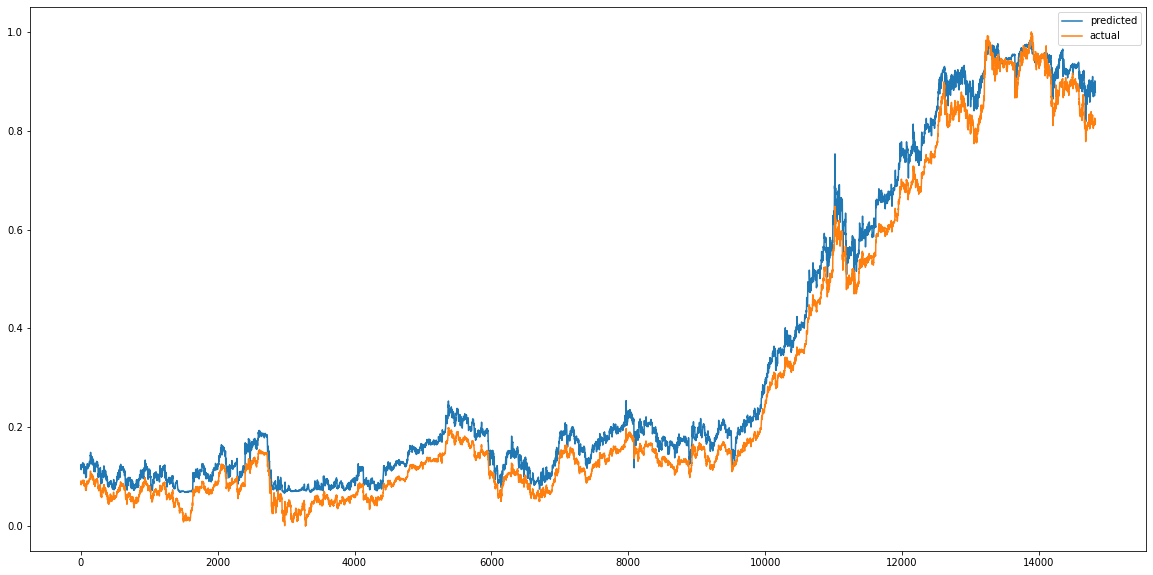

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


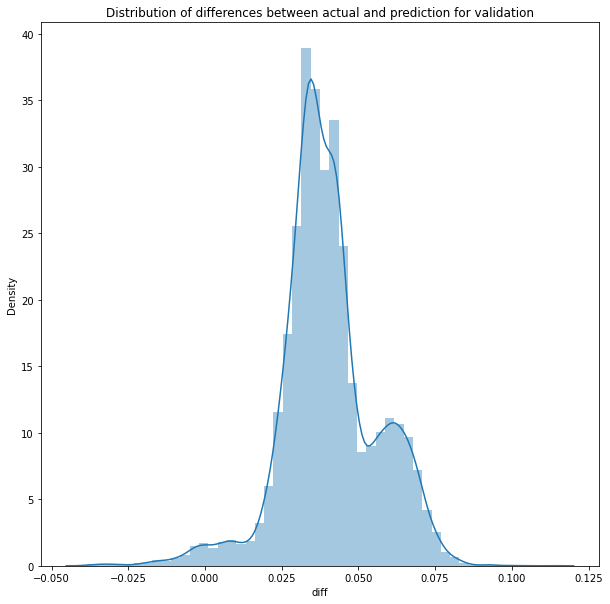

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 5ms/step


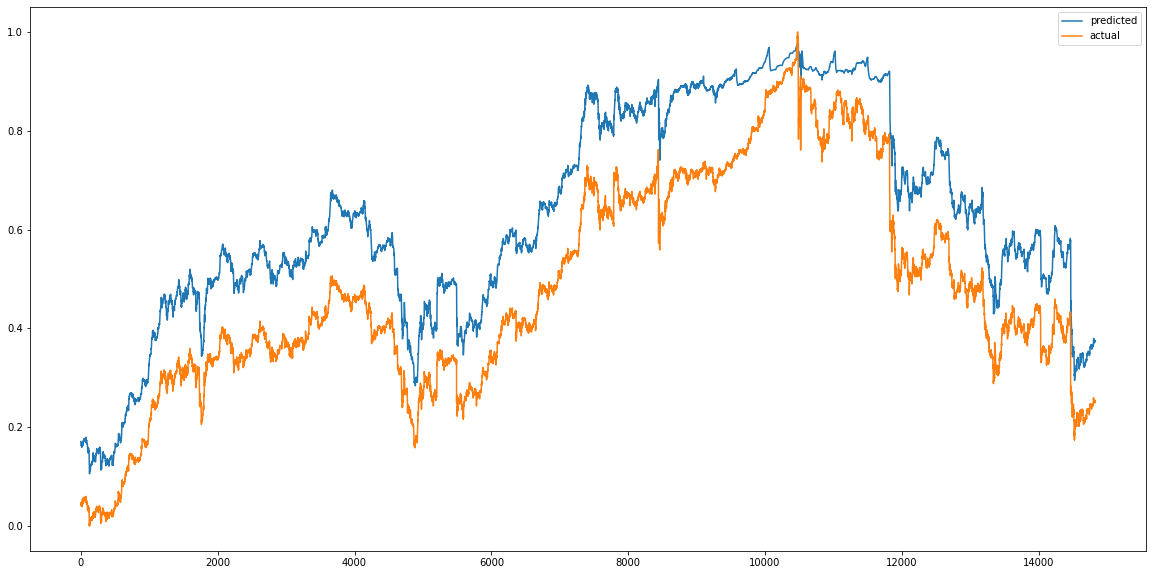

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


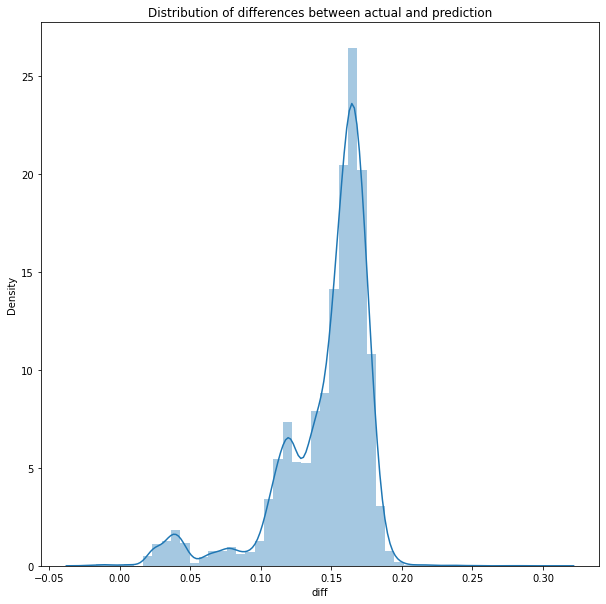

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.022556766218694825
RMSE :  0.1501891015310193
MAE :  0.146453030220511
464/464 [==============================] - 2s 5ms/step
R2_Score  : 0.5322613568386223


count    14828.000000
mean         0.146428
std          0.033401
min         -0.023276
25%          0.134719
50%          0.157366
75%          0.167652
max          0.307009
Name: diff, dtype: float64

**CNN_LSTM_MODEL**

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 lstm_6 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_3 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                82176     
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 dense_11 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
344/348 [============================>.] - ETA: 0s - loss: 734.2341 - mae: 7.8970 - mse: 734.2341 - root_mean_squared_error: 27.0968 - mape: 87330.5781
Epoch 1: val_mse improved from inf to 1.74812, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 15s 32ms/step - loss: 726.0208 - mae: 7.8210 - mse: 726.0208 - root_mean_squared_error: 26.9448 - mape: 86355.3438 - val_loss: 1.7481 - val_mae: 1.2862 - val_mse: 1.7481 - val_root_mean_squared_error: 1.3222 - val_mape: 108197.9922
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.5620 - mae: 0.7027 - mse: 0.5620 - root_mean_squared_error: 0.7497 - mape: 24988.8496
Epoch 2: val_mse improved from 1.74812 to 0.47352, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 0.5601 - mae: 0.7011 - mse: 0.5601 - root_mean_squared_error: 0.7484 - mape: 24853.1621 - val_loss: 0.4735 - val_mae: 0.6205 - val_mse: 0.4735 - val_root_mean_squared_error: 0.6881 - val_mape: 62364.0742
Epoch 3/75
342/348 [============================>.] - ETA: 0s - loss: 0.1324 - mae: 0.3127 - mse: 0.1324 - root_mean_squared_error: 0.3638 - mape: 18191.3008
Epoch 3: val_mse improved from 0.47352 to 0.23459, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 0.1313 - mae: 0.3109 - mse: 0.1313 - root_mean_squared_error: 0.3624 - mape: 17884.1465 - val_loss: 0.2346 - val_mae: 0.4457 - val_mse: 0.2346 - val_root_mean_squared_error: 0.4843 - val_mape: 45892.8242
Epoch 4/75
346/348 [============================>.] - ETA: 0s - loss: 0.0504 - mae: 0.1772 - mse: 0.0504 - root_mean_squared_error: 0.2246 - mape: 13571.2988
Epoch 4: val_mse improved from 0.23459 to 0.15988, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 0.0504 - mae: 0.1771 - mse: 0.0504 - root_mean_squared_error: 0.2245 - mape: 13497.5488 - val_loss: 0.1599 - val_mae: 0.3765 - val_mse: 0.1599 - val_root_mean_squared_error: 0.3999 - val_mape: 37798.3281
Epoch 5/75
348/348 [==============================] - ETA: 0s - loss: 0.0327 - mae: 0.1468 - mse: 0.0327 - root_mean_squared_error: 0.1808 - mape: 12401.2012
Epoch 5: val_mse improved from 0.15988 to 0.10896, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 0.0327 - mae: 0.1468 - mse: 0.0327 - root_mean_squared_error: 0.1808 - mape: 12401.2012 - val_loss: 0.1090 - val_mae: 0.2993 - val_mse: 0.1090 - val_root_mean_squared_error: 0.3301 - val_mape: 33471.8789
Epoch 6/75
344/348 [============================>.] - ETA: 0s - loss: 0.0165 - mae: 0.0928 - mse: 0.0165 - root_mean_squared_error: 0.1285 - mape: 9872.7363 
Epoch 6: val_mse improved from 0.10896 to 0.08014, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 0.0164 - mae: 0.0926 - mse: 0.0164 - root_mean_squared_error: 0.1282 - mape: 9762.4199 - val_loss: 0.0801 - val_mae: 0.2607 - val_mse: 0.0801 - val_root_mean_squared_error: 0.2831 - val_mape: 29096.0645
Epoch 7/75
345/348 [============================>.] - ETA: 0s - loss: 0.0103 - mae: 0.0728 - mse: 0.0103 - root_mean_squared_error: 0.1016 - mape: 9450.2568
Epoch 7: val_mse improved from 0.08014 to 0.05991, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0103 - mae: 0.0728 - mse: 0.0103 - root_mean_squared_error: 0.1016 - mape: 9371.7412 - val_loss: 0.0599 - val_mae: 0.2235 - val_mse: 0.0599 - val_root_mean_squared_error: 0.2448 - val_mape: 26130.2773
Epoch 8/75
343/348 [============================>.] - ETA: 0s - loss: 0.0060 - mae: 0.0538 - mse: 0.0060 - root_mean_squared_error: 0.0776 - mape: 8799.8574
Epoch 8: val_mse improved from 0.05991 to 0.04141, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 0.0060 - mae: 0.0537 - mse: 0.0060 - root_mean_squared_error: 0.0775 - mape: 8676.2012 - val_loss: 0.0414 - val_mae: 0.1738 - val_mse: 0.0414 - val_root_mean_squared_error: 0.2035 - val_mape: 23544.3926
Epoch 9/75
345/348 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0419 - mse: 0.0038 - root_mean_squared_error: 0.0620 - mape: 7539.3740
Epoch 9: val_mse improved from 0.04141 to 0.03206, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 0.0038 - mae: 0.0419 - mse: 0.0038 - root_mean_squared_error: 0.0620 - mape: 7476.6919 - val_loss: 0.0321 - val_mae: 0.1493 - val_mse: 0.0321 - val_root_mean_squared_error: 0.1790 - val_mape: 21556.3867
Epoch 10/75
348/348 [==============================] - ETA: 0s - loss: 0.0026 - mae: 0.0335 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 6759.7876
Epoch 10: val_mse improved from 0.03206 to 0.02551, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 0.0026 - mae: 0.0335 - mse: 0.0026 - root_mean_squared_error: 0.0506 - mape: 6759.7876 - val_loss: 0.0255 - val_mae: 0.1317 - val_mse: 0.0255 - val_root_mean_squared_error: 0.1597 - val_mape: 19922.3418
Epoch 11/75
346/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0292 - mse: 0.0019 - root_mean_squared_error: 0.0432 - mape: 6267.3481
Epoch 11: val_mse improved from 0.02551 to 0.02082, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 0.0019 - mae: 0.0292 - mse: 0.0019 - root_mean_squared_error: 0.0432 - mape: 6233.2080 - val_loss: 0.0208 - val_mae: 0.1182 - val_mse: 0.0208 - val_root_mean_squared_error: 0.1443 - val_mape: 18598.1465
Epoch 12/75
345/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0261 - mse: 0.0014 - root_mean_squared_error: 0.0378 - mape: 5947.0542
Epoch 12: val_mse improved from 0.02082 to 0.01732, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 0.0014 - mae: 0.0261 - mse: 0.0014 - root_mean_squared_error: 0.0378 - mape: 5897.5728 - val_loss: 0.0173 - val_mae: 0.1073 - val_mse: 0.0173 - val_root_mean_squared_error: 0.1316 - val_mape: 17496.3301
Epoch 13/75
346/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0240 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 5677.0698
Epoch 13: val_mse improved from 0.01732 to 0.01463, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 30ms/step - loss: 0.0012 - mae: 0.0240 - mse: 0.0012 - root_mean_squared_error: 0.0341 - mape: 5646.1343 - val_loss: 0.0146 - val_mae: 0.0980 - val_mse: 0.0146 - val_root_mean_squared_error: 0.1210 - val_mape: 16566.9902
Epoch 14/75
343/348 [============================>.] - ETA: 0s - loss: 9.6042e-04 - mae: 0.0221 - mse: 9.6042e-04 - root_mean_squared_error: 0.0310 - mape: 5512.2217
Epoch 14: val_mse improved from 0.01463 to 0.01251, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 9.5823e-04 - mae: 0.0221 - mse: 9.5823e-04 - root_mean_squared_error: 0.0310 - mape: 5434.7056 - val_loss: 0.0125 - val_mae: 0.0896 - val_mse: 0.0125 - val_root_mean_squared_error: 0.1118 - val_mape: 15768.3945
Epoch 15/75
346/348 [============================>.] - ETA: 0s - loss: 8.2104e-04 - mae: 0.0208 - mse: 8.2104e-04 - root_mean_squared_error: 0.0287 - mape: 5146.8794
Epoch 15: val_mse improved from 0.01251 to 0.01086, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 8.1958e-04 - mae: 0.0208 - mse: 8.1958e-04 - root_mean_squared_error: 0.0286 - mape: 5118.8203 - val_loss: 0.0109 - val_mae: 0.0834 - val_mse: 0.0109 - val_root_mean_squared_error: 0.1042 - val_mape: 15083.6035
Epoch 16/75
348/348 [==============================] - ETA: 0s - loss: 6.9898e-04 - mae: 0.0193 - mse: 6.9898e-04 - root_mean_squared_error: 0.0264 - mape: 4876.6226
Epoch 16: val_mse improved from 0.01086 to 0.00948, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 6.9898e-04 - mae: 0.0193 - mse: 6.9898e-04 - root_mean_squared_error: 0.0264 - mape: 4876.6226 - val_loss: 0.0095 - val_mae: 0.0773 - val_mse: 0.0095 - val_root_mean_squared_error: 0.0973 - val_mape: 14465.8057
Epoch 17/75
342/348 [============================>.] - ETA: 0s - loss: 6.1139e-04 - mae: 0.0182 - mse: 6.1139e-04 - root_mean_squared_error: 0.0247 - mape: 4747.0093
Epoch 17: val_mse improved from 0.00948 to 0.00838, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 6.1257e-04 - mae: 0.0182 - mse: 6.1257e-04 - root_mean_squared_error: 0.0248 - mape: 4666.6294 - val_loss: 0.0084 - val_mae: 0.0727 - val_mse: 0.0084 - val_root_mean_squared_error: 0.0915 - val_mape: 13925.3496
Epoch 18/75
347/348 [============================>.] - ETA: 0s - loss: 5.5373e-04 - mae: 0.0174 - mse: 5.5373e-04 - root_mean_squared_error: 0.0235 - mape: 4584.5024
Epoch 18: val_mse improved from 0.00838 to 0.00750, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 5.5331e-04 - mae: 0.0173 - mse: 5.5331e-04 - root_mean_squared_error: 0.0235 - mape: 4572.6738 - val_loss: 0.0075 - val_mae: 0.0687 - val_mse: 0.0075 - val_root_mean_squared_error: 0.0866 - val_mape: 13457.0762
Epoch 19/75
348/348 [==============================] - ETA: 0s - loss: 5.1547e-04 - mae: 0.0168 - mse: 5.1547e-04 - root_mean_squared_error: 0.0227 - mape: 4314.1201
Epoch 19: val_mse improved from 0.00750 to 0.00671, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 5.1547e-04 - mae: 0.0168 - mse: 5.1547e-04 - root_mean_squared_error: 0.0227 - mape: 4314.1201 - val_loss: 0.0067 - val_mae: 0.0629 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0819 - val_mape: 13049.9893
Epoch 20/75
342/348 [============================>.] - ETA: 0s - loss: 4.7057e-04 - mae: 0.0162 - mse: 4.7057e-04 - root_mean_squared_error: 0.0217 - mape: 4350.9033
Epoch 20: val_mse improved from 0.00671 to 0.00604, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 4.6991e-04 - mae: 0.0162 - mse: 4.6991e-04 - root_mean_squared_error: 0.0217 - mape: 4277.2075 - val_loss: 0.0060 - val_mae: 0.0592 - val_mse: 0.0060 - val_root_mean_squared_error: 0.0777 - val_mape: 12651.4922
Epoch 21/75
346/348 [============================>.] - ETA: 0s - loss: 4.3138e-04 - mae: 0.0155 - mse: 4.3138e-04 - root_mean_squared_error: 0.0208 - mape: 4127.8105
Epoch 21: val_mse improved from 0.00604 to 0.00546, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 4.3126e-04 - mae: 0.0155 - mse: 4.3126e-04 - root_mean_squared_error: 0.0208 - mape: 4105.3071 - val_loss: 0.0055 - val_mae: 0.0560 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0739 - val_mape: 12280.0381
Epoch 22/75
344/348 [============================>.] - ETA: 0s - loss: 4.0353e-04 - mae: 0.0150 - mse: 4.0353e-04 - root_mean_squared_error: 0.0201 - mape: 4074.1416
Epoch 22: val_mse improved from 0.00546 to 0.00494, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 4.0305e-04 - mae: 0.0150 - mse: 4.0305e-04 - root_mean_squared_error: 0.0201 - mape: 4028.5310 - val_loss: 0.0049 - val_mae: 0.0531 - val_mse: 0.0049 - val_root_mean_squared_error: 0.0703 - val_mape: 11913.7588
Epoch 23/75
347/348 [============================>.] - ETA: 0s - loss: 3.6264e-04 - mae: 0.0143 - mse: 3.6264e-04 - root_mean_squared_error: 0.0190 - mape: 3890.6885
Epoch 23: val_mse improved from 0.00494 to 0.00447, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 32ms/step - loss: 3.6282e-04 - mae: 0.0143 - mse: 3.6282e-04 - root_mean_squared_error: 0.0190 - mape: 3880.6531 - val_loss: 0.0045 - val_mae: 0.0505 - val_mse: 0.0045 - val_root_mean_squared_error: 0.0668 - val_mape: 11564.2217
Epoch 24/75
346/348 [============================>.] - ETA: 0s - loss: 3.4752e-04 - mae: 0.0139 - mse: 3.4752e-04 - root_mean_squared_error: 0.0186 - mape: 3848.5483
Epoch 24: val_mse improved from 0.00447 to 0.00410, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 3.4754e-04 - mae: 0.0139 - mse: 3.4754e-04 - root_mean_squared_error: 0.0186 - mape: 3827.5703 - val_loss: 0.0041 - val_mae: 0.0467 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0640 - val_mape: 11309.0479
Epoch 25/75
343/348 [============================>.] - ETA: 0s - loss: 3.3096e-04 - mae: 0.0136 - mse: 3.3096e-04 - root_mean_squared_error: 0.0182 - mape: 3732.6917
Epoch 25: val_mse improved from 0.00410 to 0.00382, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 3.3059e-04 - mae: 0.0136 - mse: 3.3059e-04 - root_mean_squared_error: 0.0182 - mape: 3680.1812 - val_loss: 0.0038 - val_mae: 0.0453 - val_mse: 0.0038 - val_root_mean_squared_error: 0.0618 - val_mape: 11066.5947
Epoch 26/75
347/348 [============================>.] - ETA: 0s - loss: 3.1514e-04 - mae: 0.0133 - mse: 3.1514e-04 - root_mean_squared_error: 0.0178 - mape: 3633.5720
Epoch 26: val_mse improved from 0.00382 to 0.00358, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 3.1505e-04 - mae: 0.0133 - mse: 3.1505e-04 - root_mean_squared_error: 0.0177 - mape: 3624.1975 - val_loss: 0.0036 - val_mae: 0.0441 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0598 - val_mape: 10847.3232
Epoch 27/75
343/348 [============================>.] - ETA: 0s - loss: 3.0605e-04 - mae: 0.0131 - mse: 3.0605e-04 - root_mean_squared_error: 0.0175 - mape: 3596.8689
Epoch 27: val_mse improved from 0.00358 to 0.00337, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 3.0658e-04 - mae: 0.0131 - mse: 3.0658e-04 - root_mean_squared_error: 0.0175 - mape: 3546.2944 - val_loss: 0.0034 - val_mae: 0.0418 - val_mse: 0.0034 - val_root_mean_squared_error: 0.0580 - val_mape: 10668.0527
Epoch 28/75
348/348 [==============================] - ETA: 0s - loss: 2.9225e-04 - mae: 0.0128 - mse: 2.9225e-04 - root_mean_squared_error: 0.0171 - mape: 3494.4319
Epoch 28: val_mse improved from 0.00337 to 0.00319, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.9225e-04 - mae: 0.0128 - mse: 2.9225e-04 - root_mean_squared_error: 0.0171 - mape: 3494.4319 - val_loss: 0.0032 - val_mae: 0.0413 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0564 - val_mape: 10479.5488
Epoch 29/75
344/348 [============================>.] - ETA: 0s - loss: 2.8264e-04 - mae: 0.0125 - mse: 2.8264e-04 - root_mean_squared_error: 0.0168 - mape: 3545.7903
Epoch 29: val_mse improved from 0.00319 to 0.00301, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.8234e-04 - mae: 0.0125 - mse: 2.8234e-04 - root_mean_squared_error: 0.0168 - mape: 3506.0955 - val_loss: 0.0030 - val_mae: 0.0394 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0549 - val_mape: 10323.6641
Epoch 30/75
346/348 [============================>.] - ETA: 0s - loss: 2.7744e-04 - mae: 0.0124 - mse: 2.7744e-04 - root_mean_squared_error: 0.0167 - mape: 3384.1362
Epoch 30: val_mse improved from 0.00301 to 0.00288, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 2.7720e-04 - mae: 0.0124 - mse: 2.7720e-04 - root_mean_squared_error: 0.0166 - mape: 3365.6846 - val_loss: 0.0029 - val_mae: 0.0390 - val_mse: 0.0029 - val_root_mean_squared_error: 0.0536 - val_mape: 10160.4395
Epoch 31/75
345/348 [============================>.] - ETA: 0s - loss: 2.6187e-04 - mae: 0.0121 - mse: 2.6187e-04 - root_mean_squared_error: 0.0162 - mape: 3378.4656
Epoch 31: val_mse improved from 0.00288 to 0.00278, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 2.6183e-04 - mae: 0.0121 - mse: 2.6183e-04 - root_mean_squared_error: 0.0162 - mape: 3350.3428 - val_loss: 0.0028 - val_mae: 0.0388 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0527 - val_mape: 10039.0254
Epoch 32/75
345/348 [============================>.] - ETA: 0s - loss: 2.5604e-04 - mae: 0.0119 - mse: 2.5604e-04 - root_mean_squared_error: 0.0160 - mape: 3321.9707
Epoch 32: val_mse improved from 0.00278 to 0.00259, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.5627e-04 - mae: 0.0119 - mse: 2.5627e-04 - root_mean_squared_error: 0.0160 - mape: 3294.3235 - val_loss: 0.0026 - val_mae: 0.0370 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0509 - val_mape: 9850.6670
Epoch 33/75
347/348 [============================>.] - ETA: 0s - loss: 2.4549e-04 - mae: 0.0117 - mse: 2.4549e-04 - root_mean_squared_error: 0.0157 - mape: 3264.8320
Epoch 33: val_mse improved from 0.00259 to 0.00234, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.4620e-04 - mae: 0.0117 - mse: 2.4620e-04 - root_mean_squared_error: 0.0157 - mape: 3256.4285 - val_loss: 0.0023 - val_mae: 0.0346 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0484 - val_mape: 9588.0762
Epoch 34/75
344/348 [============================>.] - ETA: 0s - loss: 2.3266e-04 - mae: 0.0114 - mse: 2.3266e-04 - root_mean_squared_error: 0.0153 - mape: 3220.4866
Epoch 34: val_mse improved from 0.00234 to 0.00231, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 2.3243e-04 - mae: 0.0114 - mse: 2.3243e-04 - root_mean_squared_error: 0.0152 - mape: 3184.4309 - val_loss: 0.0023 - val_mae: 0.0355 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0481 - val_mape: 9486.7520
Epoch 35/75
347/348 [============================>.] - ETA: 0s - loss: 2.2206e-04 - mae: 0.0111 - mse: 2.2206e-04 - root_mean_squared_error: 0.0149 - mape: 3106.9722
Epoch 35: val_mse improved from 0.00231 to 0.00218, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.2221e-04 - mae: 0.0111 - mse: 2.2221e-04 - root_mean_squared_error: 0.0149 - mape: 3098.9573 - val_loss: 0.0022 - val_mae: 0.0339 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0467 - val_mape: 9340.7051
Epoch 36/75
343/348 [============================>.] - ETA: 0s - loss: 2.1998e-04 - mae: 0.0110 - mse: 2.1998e-04 - root_mean_squared_error: 0.0148 - mape: 3138.1755
Epoch 36: val_mse improved from 0.00218 to 0.00205, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 2.1999e-04 - mae: 0.0110 - mse: 2.1999e-04 - root_mean_squared_error: 0.0148 - mape: 3094.0298 - val_loss: 0.0020 - val_mae: 0.0319 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0453 - val_mape: 9240.6426
Epoch 37/75
347/348 [============================>.] - ETA: 0s - loss: 1.9941e-04 - mae: 0.0105 - mse: 1.9941e-04 - root_mean_squared_error: 0.0141 - mape: 3056.9150
Epoch 37: val_mse improved from 0.00205 to 0.00194, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.9926e-04 - mae: 0.0105 - mse: 1.9926e-04 - root_mean_squared_error: 0.0141 - mape: 3049.0271 - val_loss: 0.0019 - val_mae: 0.0316 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0440 - val_mape: 9051.5137
Epoch 38/75
345/348 [============================>.] - ETA: 0s - loss: 2.0657e-04 - mae: 0.0107 - mse: 2.0657e-04 - root_mean_squared_error: 0.0144 - mape: 3100.4895
Epoch 38: val_mse improved from 0.00194 to 0.00180, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 2.0635e-04 - mae: 0.0107 - mse: 2.0635e-04 - root_mean_squared_error: 0.0144 - mape: 3074.6812 - val_loss: 0.0018 - val_mae: 0.0298 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0425 - val_mape: 8922.0439
Epoch 39/75
348/348 [==============================] - ETA: 0s - loss: 1.8580e-04 - mae: 0.0101 - mse: 1.8580e-04 - root_mean_squared_error: 0.0136 - mape: 2951.0288
Epoch 39: val_mse improved from 0.00180 to 0.00177, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 12s 34ms/step - loss: 1.8580e-04 - mae: 0.0101 - mse: 1.8580e-04 - root_mean_squared_error: 0.0136 - mape: 2951.0288 - val_loss: 0.0018 - val_mae: 0.0303 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0421 - val_mape: 8798.5518
Epoch 40/75
344/348 [============================>.] - ETA: 0s - loss: 1.8103e-04 - mae: 0.0100 - mse: 1.8103e-04 - root_mean_squared_error: 0.0135 - mape: 2895.2908
Epoch 40: val_mse improved from 0.00177 to 0.00167, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 1.8187e-04 - mae: 0.0100 - mse: 1.8187e-04 - root_mean_squared_error: 0.0135 - mape: 2862.8965 - val_loss: 0.0017 - val_mae: 0.0294 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0408 - val_mape: 8622.7627
Epoch 41/75
346/348 [============================>.] - ETA: 0s - loss: 1.7190e-04 - mae: 0.0097 - mse: 1.7190e-04 - root_mean_squared_error: 0.0131 - mape: 2899.6506
Epoch 41: val_mse improved from 0.00167 to 0.00159, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.7185e-04 - mae: 0.0097 - mse: 1.7185e-04 - root_mean_squared_error: 0.0131 - mape: 2883.8411 - val_loss: 0.0016 - val_mae: 0.0286 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0399 - val_mape: 8583.2871
Epoch 42/75
346/348 [============================>.] - ETA: 0s - loss: 1.6588e-04 - mae: 0.0095 - mse: 1.6588e-04 - root_mean_squared_error: 0.0129 - mape: 2833.9624
Epoch 42: val_mse improved from 0.00159 to 0.00141, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 1.6573e-04 - mae: 0.0095 - mse: 1.6573e-04 - root_mean_squared_error: 0.0129 - mape: 2818.5098 - val_loss: 0.0014 - val_mae: 0.0261 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0376 - val_mape: 8337.1055
Epoch 43/75
342/348 [============================>.] - ETA: 0s - loss: 1.5139e-04 - mae: 0.0090 - mse: 1.5139e-04 - root_mean_squared_error: 0.0123 - mape: 2872.0947
Epoch 43: val_mse improved from 0.00141 to 0.00138, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.5124e-04 - mae: 0.0090 - mse: 1.5124e-04 - root_mean_squared_error: 0.0123 - mape: 2823.4375 - val_loss: 0.0014 - val_mae: 0.0265 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 8210.3076
Epoch 44/75
347/348 [============================>.] - ETA: 0s - loss: 1.5037e-04 - mae: 0.0090 - mse: 1.5037e-04 - root_mean_squared_error: 0.0123 - mape: 2780.8250
Epoch 44: val_mse improved from 0.00138 to 0.00127, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.5026e-04 - mae: 0.0090 - mse: 1.5026e-04 - root_mean_squared_error: 0.0123 - mape: 2773.6489 - val_loss: 0.0013 - val_mae: 0.0249 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 8087.7676
Epoch 45/75
347/348 [============================>.] - ETA: 0s - loss: 1.4430e-04 - mae: 0.0089 - mse: 1.4430e-04 - root_mean_squared_error: 0.0120 - mape: 2704.9741
Epoch 45: val_mse improved from 0.00127 to 0.00121, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.4438e-04 - mae: 0.0089 - mse: 1.4438e-04 - root_mean_squared_error: 0.0120 - mape: 2697.9958 - val_loss: 0.0012 - val_mae: 0.0245 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0347 - val_mape: 7921.2432
Epoch 46/75
346/348 [============================>.] - ETA: 0s - loss: 1.3988e-04 - mae: 0.0087 - mse: 1.3988e-04 - root_mean_squared_error: 0.0118 - mape: 2608.4788
Epoch 46: val_mse improved from 0.00121 to 0.00118, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 1.3967e-04 - mae: 0.0087 - mse: 1.3967e-04 - root_mean_squared_error: 0.0118 - mape: 2594.2537 - val_loss: 0.0012 - val_mae: 0.0247 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 7861.4229
Epoch 47/75
347/348 [============================>.] - ETA: 0s - loss: 1.3194e-04 - mae: 0.0084 - mse: 1.3194e-04 - root_mean_squared_error: 0.0115 - mape: 2653.4924
Epoch 47: val_mse improved from 0.00118 to 0.00117, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.3195e-04 - mae: 0.0084 - mse: 1.3195e-04 - root_mean_squared_error: 0.0115 - mape: 2646.6455 - val_loss: 0.0012 - val_mae: 0.0255 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0343 - val_mape: 7807.4854
Epoch 48/75
347/348 [============================>.] - ETA: 0s - loss: 1.3365e-04 - mae: 0.0085 - mse: 1.3365e-04 - root_mean_squared_error: 0.0116 - mape: 2556.7114
Epoch 48: val_mse improved from 0.00117 to 0.00109, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 1.3360e-04 - mae: 0.0085 - mse: 1.3360e-04 - root_mean_squared_error: 0.0116 - mape: 2550.1143 - val_loss: 0.0011 - val_mae: 0.0239 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0330 - val_mape: 7650.4028
Epoch 49/75
345/348 [============================>.] - ETA: 0s - loss: 1.2740e-04 - mae: 0.0083 - mse: 1.2740e-04 - root_mean_squared_error: 0.0113 - mape: 2540.8579
Epoch 49: val_mse improved from 0.00109 to 0.00103, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.2776e-04 - mae: 0.0083 - mse: 1.2776e-04 - root_mean_squared_error: 0.0113 - mape: 2519.7085 - val_loss: 0.0010 - val_mae: 0.0229 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 7603.3696
Epoch 50/75
348/348 [==============================] - ETA: 0s - loss: 1.2469e-04 - mae: 0.0083 - mse: 1.2469e-04 - root_mean_squared_error: 0.0112 - mape: 2507.8242
Epoch 50: val_mse did not improve from 0.00103
348/348 [==============================] - 4s 10ms/step - loss: 1.2469e-04 - mae: 0.0083 - mse: 1.2469e-04 - root_mean_squared_error: 0.0112 - mape: 2507.8242 - val_loss: 0.0010 - val_mae: 0.0240 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0323 - val_mape: 7486.2046
Epoch 51/75
345/348 [============================>.] - ETA: 0s - loss: 1.1611e-04 - mae: 0.0079 - mse: 1.1611e-04 - root_mean_squared_error: 0.0108 - mape: 2506.8503
Epoch 51: val_mse improved from 0.00103 to 0.00101, saving model to /con

348/348 [==============================] - 11s 30ms/step - loss: 1.1606e-04 - mae: 0.0079 - mse: 1.1606e-04 - root_mean_squared_error: 0.0108 - mape: 2485.9814 - val_loss: 0.0010 - val_mae: 0.0234 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0317 - val_mape: 7377.8672
Epoch 52/75
347/348 [============================>.] - ETA: 0s - loss: 1.2813e-04 - mae: 0.0084 - mse: 1.2813e-04 - root_mean_squared_error: 0.0113 - mape: 2491.9790
Epoch 52: val_mse improved from 0.00101 to 0.00100, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 30ms/step - loss: 1.2821e-04 - mae: 0.0084 - mse: 1.2821e-04 - root_mean_squared_error: 0.0113 - mape: 2485.5491 - val_loss: 9.9792e-04 - val_mae: 0.0234 - val_mse: 9.9792e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 7483.6206
Epoch 53/75
345/348 [============================>.] - ETA: 0s - loss: 1.1556e-04 - mae: 0.0079 - mse: 1.1556e-04 - root_mean_squared_error: 0.0107 - mape: 2523.4434
Epoch 53: val_mse improved from 0.00100 to 0.00091, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 1.1580e-04 - mae: 0.0080 - mse: 1.1580e-04 - root_mean_squared_error: 0.0108 - mape: 2502.4373 - val_loss: 9.1417e-04 - val_mae: 0.0221 - val_mse: 9.1417e-04 - val_root_mean_squared_error: 0.0302 - val_mape: 7216.0493
Epoch 54/75
344/348 [============================>.] - ETA: 0s - loss: 1.1986e-04 - mae: 0.0081 - mse: 1.1986e-04 - root_mean_squared_error: 0.0109 - mape: 2479.0908
Epoch 54: val_mse improved from 0.00091 to 0.00091, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 1.1994e-04 - mae: 0.0081 - mse: 1.1994e-04 - root_mean_squared_error: 0.0110 - mape: 2451.3347 - val_loss: 9.0617e-04 - val_mae: 0.0216 - val_mse: 9.0617e-04 - val_root_mean_squared_error: 0.0301 - val_mape: 7300.2334
Epoch 55/75
347/348 [============================>.] - ETA: 0s - loss: 1.0379e-04 - mae: 0.0075 - mse: 1.0379e-04 - root_mean_squared_error: 0.0102 - mape: 2401.3611
Epoch 55: val_mse did not improve from 0.00091
348/348 [==============================] - 3s 10ms/step - loss: 1.0394e-04 - mae: 0.0075 - mse: 1.0394e-04 - root_mean_squared_error: 0.0102 - mape: 2395.1650 - val_loss: 9.2958e-04 - val_mae: 0.0226 - val_mse: 9.2958e-04 - val_root_mean_squared_error: 0.0305 - val_mape: 7200.7739
Epoch 56/75
345/348 [============================>.] - ETA: 0s - loss: 1.0420e-04 - mae: 0.0075 - mse: 1.0420e-04 - root_mean_squared_error: 0.0102 - mape: 2450.7166
Epoch 56: val_mse improved from 0.00091 to 0.00080, savi

348/348 [==============================] - 11s 32ms/step - loss: 1.0410e-04 - mae: 0.0075 - mse: 1.0410e-04 - root_mean_squared_error: 0.0102 - mape: 2430.3140 - val_loss: 7.9692e-04 - val_mae: 0.0193 - val_mse: 7.9692e-04 - val_root_mean_squared_error: 0.0282 - val_mape: 7168.0146
Epoch 57/75
348/348 [==============================] - ETA: 0s - loss: 1.2756e-04 - mae: 0.0084 - mse: 1.2756e-04 - root_mean_squared_error: 0.0113 - mape: 2440.8000
Epoch 57: val_mse did not improve from 0.00080
348/348 [==============================] - 4s 10ms/step - loss: 1.2756e-04 - mae: 0.0084 - mse: 1.2756e-04 - root_mean_squared_error: 0.0113 - mape: 2440.8000 - val_loss: 9.9791e-04 - val_mae: 0.0249 - val_mse: 9.9791e-04 - val_root_mean_squared_error: 0.0316 - val_mape: 7328.5547
Epoch 58/75
344/348 [============================>.] - ETA: 0s - loss: 1.0781e-04 - mae: 0.0077 - mse: 1.0781e-04 - root_mean_squared_error: 0.0104 - mape: 2437.0232
Epoch 58: val_mse did not improve from 0.00080
348/348 [

348/348 [==============================] - 11s 31ms/step - loss: 1.1500e-04 - mae: 0.0080 - mse: 1.1500e-04 - root_mean_squared_error: 0.0107 - mape: 2342.0063 - val_loss: 7.6709e-04 - val_mae: 0.0192 - val_mse: 7.6709e-04 - val_root_mean_squared_error: 0.0277 - val_mape: 7068.4858
Epoch 61/75
346/348 [============================>.] - ETA: 0s - loss: 1.1025e-04 - mae: 0.0077 - mse: 1.1025e-04 - root_mean_squared_error: 0.0105 - mape: 2380.6768
Epoch 61: val_mse did not improve from 0.00077
348/348 [==============================] - 4s 11ms/step - loss: 1.1103e-04 - mae: 0.0078 - mse: 1.1103e-04 - root_mean_squared_error: 0.0105 - mape: 2367.7012 - val_loss: 9.4416e-04 - val_mae: 0.0229 - val_mse: 9.4416e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 7031.0215
Epoch 62/75
346/348 [============================>.] - ETA: 0s - loss: 9.4079e-05 - mae: 0.0072 - mse: 9.4079e-05 - root_mean_squared_error: 0.0097 - mape: 2408.1619
Epoch 62: val_mse did not improve from 0.00077
348/348 [

348/348 [==============================] - 11s 30ms/step - loss: 9.0047e-05 - mae: 0.0071 - mse: 9.0047e-05 - root_mean_squared_error: 0.0095 - mape: 2311.7517 - val_loss: 6.6096e-04 - val_mae: 0.0185 - val_mse: 6.6096e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 6755.8062
Epoch 66/75
344/348 [============================>.] - ETA: 0s - loss: 1.2962e-04 - mae: 0.0085 - mse: 1.2962e-04 - root_mean_squared_error: 0.0114 - mape: 2279.9004
Epoch 66: val_mse did not improve from 0.00066
348/348 [==============================] - 3s 10ms/step - loss: 1.2906e-04 - mae: 0.0085 - mse: 1.2906e-04 - root_mean_squared_error: 0.0114 - mape: 2254.3721 - val_loss: 9.4088e-04 - val_mae: 0.0257 - val_mse: 9.4088e-04 - val_root_mean_squared_error: 0.0307 - val_mape: 6982.6431
Epoch 67/75
343/348 [============================>.] - ETA: 0s - loss: 7.8456e-05 - mae: 0.0066 - mse: 7.8456e-05 - root_mean_squared_error: 0.0089 - mape: 1.6984
Epoch 67: val_mse did not improve from 0.00066
348/348 [===

348/348 [==============================] - 11s 30ms/step - loss: 9.1043e-05 - mae: 0.0070 - mse: 9.1043e-05 - root_mean_squared_error: 0.0095 - mape: 2133.9705 - val_loss: 6.3543e-04 - val_mae: 0.0196 - val_mse: 6.3543e-04 - val_root_mean_squared_error: 0.0252 - val_mape: 6492.6040
Epoch 69/75
346/348 [============================>.] - ETA: 0s - loss: 1.0908e-04 - mae: 0.0077 - mse: 1.0908e-04 - root_mean_squared_error: 0.0104 - mape: 2169.5210
Epoch 69: val_mse did not improve from 0.00064
348/348 [==============================] - 4s 10ms/step - loss: 1.0901e-04 - mae: 0.0077 - mse: 1.0901e-04 - root_mean_squared_error: 0.0104 - mape: 2157.6924 - val_loss: 7.7878e-04 - val_mae: 0.0236 - val_mse: 7.7878e-04 - val_root_mean_squared_error: 0.0279 - val_mape: 6649.7808
Epoch 70/75
346/348 [============================>.] - ETA: 0s - loss: 7.8625e-05 - mae: 0.0066 - mse: 7.8625e-05 - root_mean_squared_error: 0.0089 - mape: 2170.6143
Epoch 70: val_mse improved from 0.00064 to 0.00060, savi

348/348 [==============================] - 10s 29ms/step - loss: 7.8600e-05 - mae: 0.0066 - mse: 7.8600e-05 - root_mean_squared_error: 0.0089 - mape: 2158.7783 - val_loss: 6.0496e-04 - val_mae: 0.0195 - val_mse: 6.0496e-04 - val_root_mean_squared_error: 0.0246 - val_mape: 6367.9111
Epoch 71/75
343/348 [============================>.] - ETA: 0s - loss: 7.2489e-05 - mae: 0.0063 - mse: 7.2489e-05 - root_mean_squared_error: 0.0085 - mape: 2154.7654
Epoch 71: val_mse did not improve from 0.00060
348/348 [==============================] - 3s 10ms/step - loss: 7.2710e-05 - mae: 0.0064 - mse: 7.2710e-05 - root_mean_squared_error: 0.0085 - mape: 2124.4509 - val_loss: 8.1558e-04 - val_mae: 0.0251 - val_mse: 8.1558e-04 - val_root_mean_squared_error: 0.0286 - val_mape: 6317.2202
Epoch 72/75
347/348 [============================>.] - ETA: 0s - loss: 7.6589e-05 - mae: 0.0065 - mse: 7.6589e-05 - root_mean_squared_error: 0.0088 - mape: 2026.9194
Epoch 72: val_mse improved from 0.00060 to 0.00048, savi

348/348 [==============================] - 11s 30ms/step - loss: 7.6502e-05 - mae: 0.0065 - mse: 7.6502e-05 - root_mean_squared_error: 0.0087 - mape: 2021.6885 - val_loss: 4.7500e-04 - val_mae: 0.0165 - val_mse: 4.7500e-04 - val_root_mean_squared_error: 0.0218 - val_mape: 6098.8242
Epoch 73/75
348/348 [==============================] - ETA: 0s - loss: 8.1161e-05 - mae: 0.0068 - mse: 8.1161e-05 - root_mean_squared_error: 0.0090 - mape: 2031.9634
Epoch 73: val_mse did not improve from 0.00048
348/348 [==============================] - 3s 10ms/step - loss: 8.1161e-05 - mae: 0.0068 - mse: 8.1161e-05 - root_mean_squared_error: 0.0090 - mape: 2031.9634 - val_loss: 5.5228e-04 - val_mae: 0.0186 - val_mse: 5.5228e-04 - val_root_mean_squared_error: 0.0235 - val_mape: 6164.5483
Epoch 74/75
347/348 [============================>.] - ETA: 0s - loss: 9.5359e-05 - mae: 0.0073 - mse: 9.5359e-05 - root_mean_squared_error: 0.0098 - mape: 1989.4738
Epoch 74: val_mse did not improve from 0.00048
348/348 [

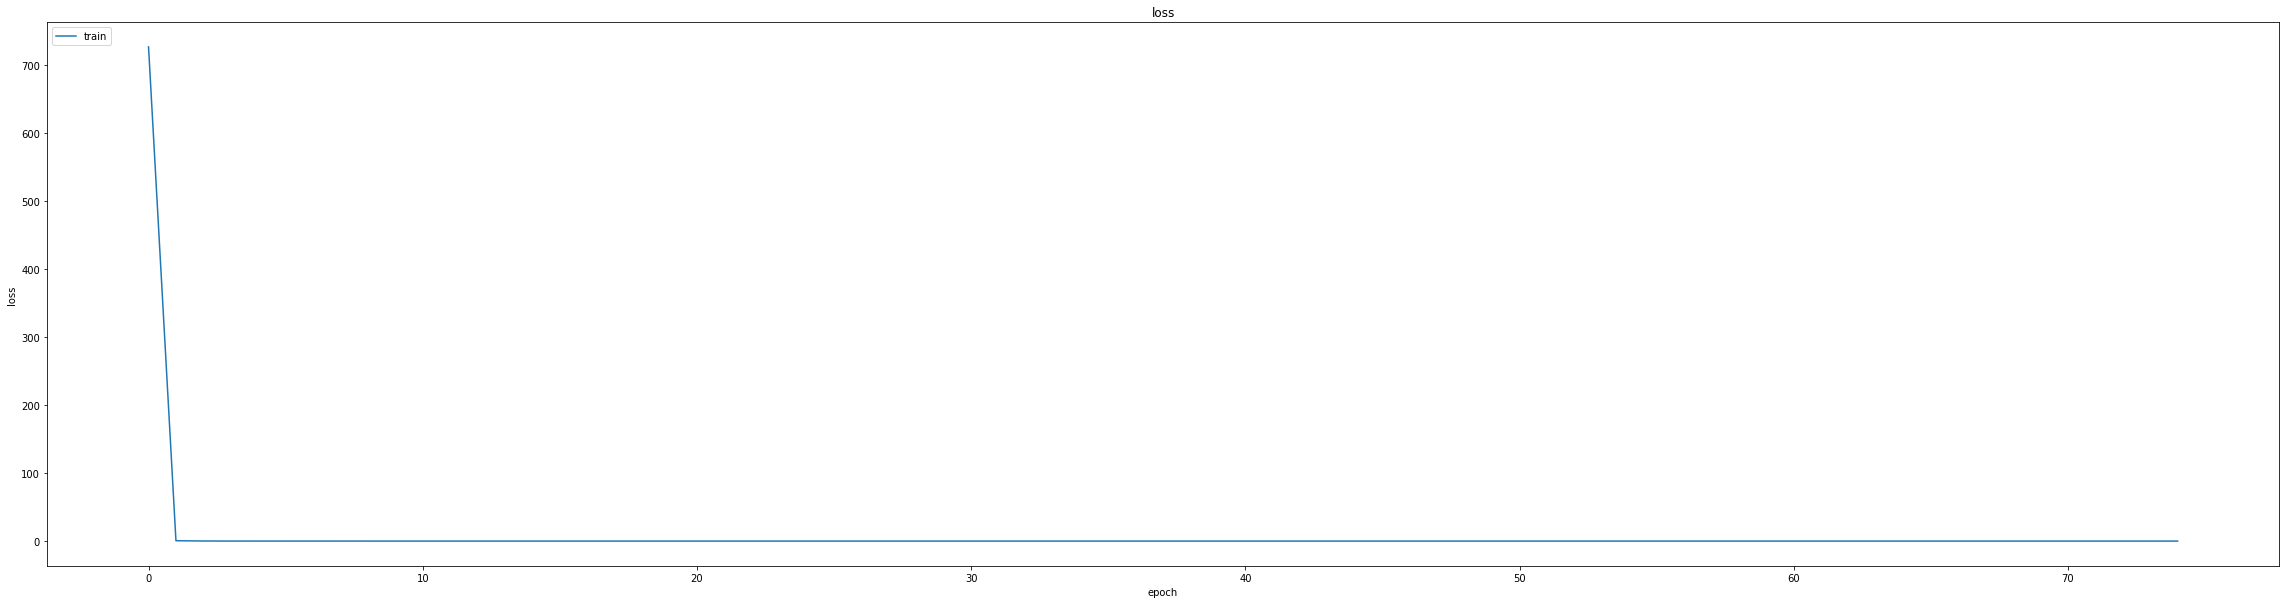

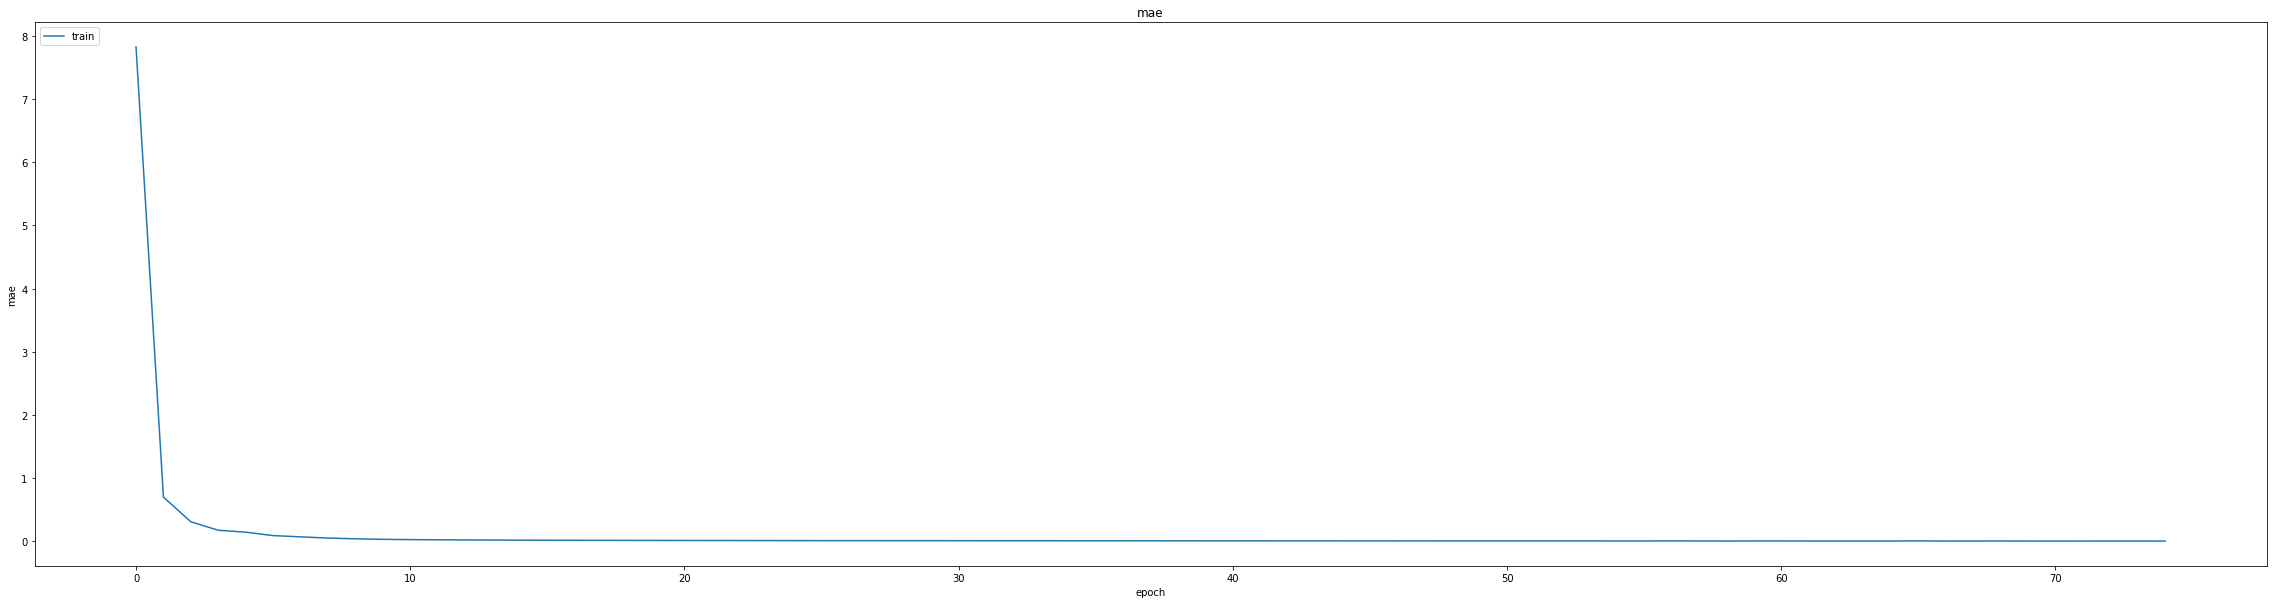

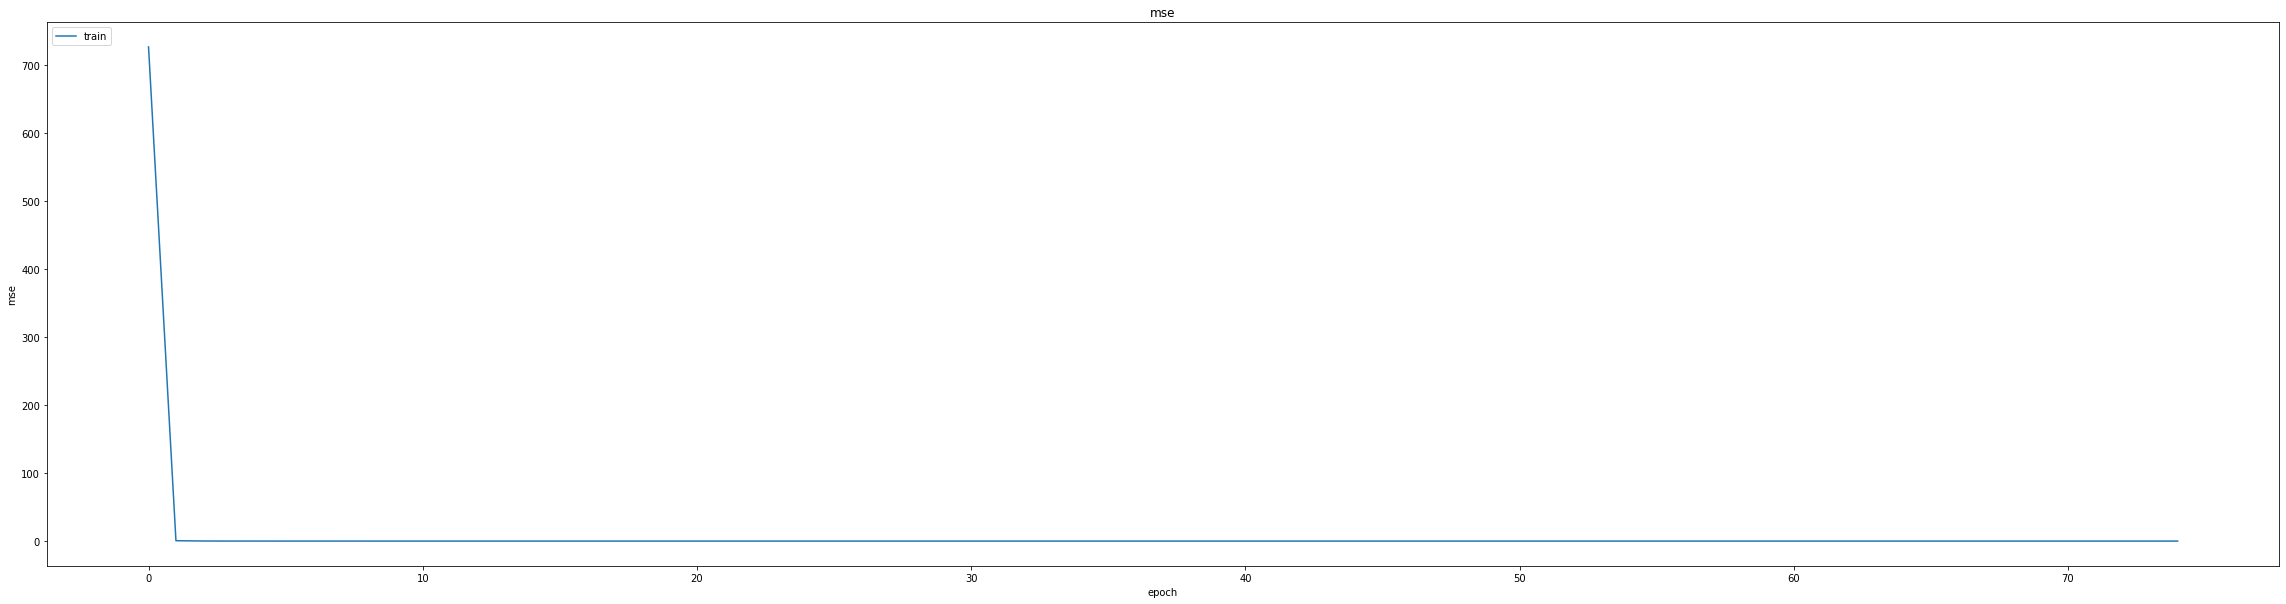

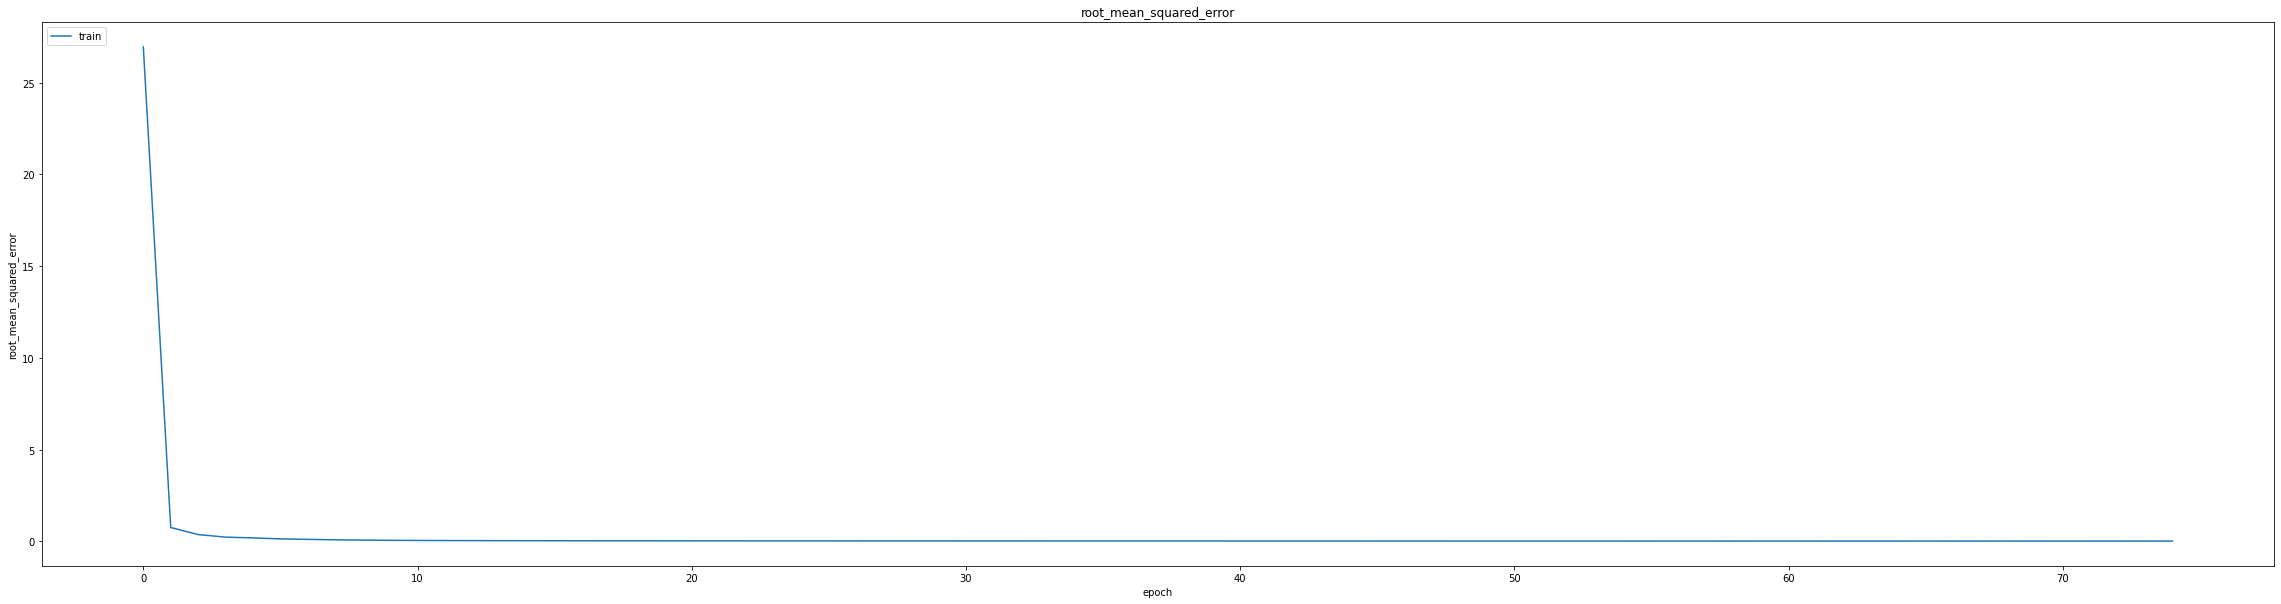

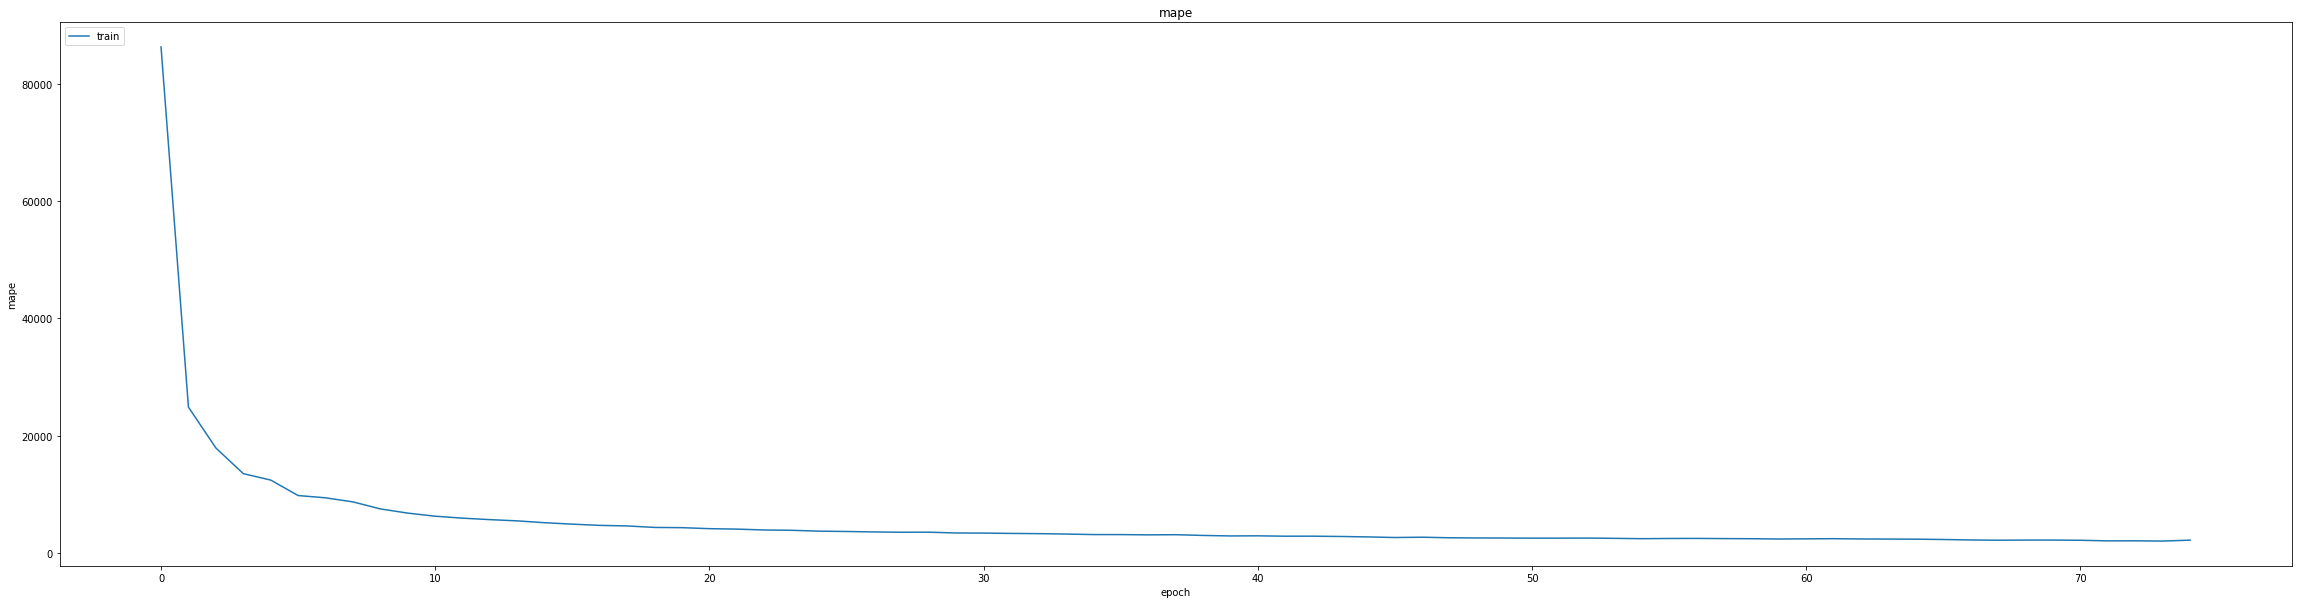

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01619807817041874
0.021794555708765984
464/464 [==============================] - 2s 4ms/step
0.9943129127231275


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 5.5856e-04 - mae: 0.0103 - mse: 5.5856e-04 - root_mean_squared_error: 0.0236 - mape: 2212.5659
Epoch 1: val_mse did not improve from 0.00048
348/348 [==============================] - 7s 12ms/step - loss: 5.5728e-04 - mae: 0.0102 - mse: 5.5728e-04 - root_mean_squared_error: 0.0236 - mape: 2206.8557 - val_loss: 6.2729e-04 - val_mae: 0.0186 - val_mse: 6.2729e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 6607.2769 - lr: 0.0010
Epoch 2/25
348/348 [==============================] - ETA: 0s - loss: 4.6312e-05 - mae: 0.0049 - mse: 4.6312e-05 - root_mean_squared_error: 0.0068 - mape: 2133.8682
Epoch 2: val_mse did not improve from 0.00048
348/348 [==============================] - 5s 14ms/step - loss: 4.6312e-05 - mae: 0.0049 - mse: 4.6312e-05 - root_mean_squared_error: 0.0068 - mape: 2133.8682 - val_loss: 6.0020e-04 - val_mae: 0.0195 - val_mse: 6.0020e-04 - val_root_mean_squared_error: 0.0245 - val_mape: 6361.1143 -

348/348 [==============================] - 12s 36ms/step - loss: 4.7365e-05 - mae: 0.0051 - mse: 4.7365e-05 - root_mean_squared_error: 0.0069 - mape: 1916.7505 - val_loss: 4.5480e-04 - val_mae: 0.0173 - val_mse: 4.5480e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 5788.8252 - lr: 8.1000e-04
lr changed to 0.0007290000503417104
Epoch 7/25
347/348 [============================>.] - ETA: 0s - loss: 4.5470e-05 - mae: 0.0050 - mse: 4.5470e-05 - root_mean_squared_error: 0.0067 - mape: 1908.4323
Epoch 7: val_mse did not improve from 0.00045
348/348 [==============================] - 4s 10ms/step - loss: 4.5455e-05 - mae: 0.0050 - mse: 4.5455e-05 - root_mean_squared_error: 0.0067 - mape: 1903.5071 - val_loss: 4.6600e-04 - val_mae: 0.0175 - val_mse: 4.6600e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 5731.1987 - lr: 7.2900e-04
Epoch 8/25
348/348 [==============================] - ETA: 0s - loss: 5.4844e-05 - mae: 0.0055 - mse: 5.4844e-05 - root_mean_squared_error: 0.0074 - mape:

348/348 [==============================] - 10s 30ms/step - loss: 5.4844e-05 - mae: 0.0055 - mse: 5.4844e-05 - root_mean_squared_error: 0.0074 - mape: 1894.5981 - val_loss: 3.8079e-04 - val_mae: 0.0151 - val_mse: 3.8079e-04 - val_root_mean_squared_error: 0.0195 - val_mape: 5630.3467 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
346/348 [============================>.] - ETA: 0s - loss: 4.8776e-05 - mae: 0.0052 - mse: 4.8776e-05 - root_mean_squared_error: 0.0070 - mape: 1922.8667
Epoch 9: val_mse did not improve from 0.00038
348/348 [==============================] - 3s 10ms/step - loss: 4.8692e-05 - mae: 0.0052 - mse: 4.8692e-05 - root_mean_squared_error: 0.0070 - mape: 1912.3800 - val_loss: 5.2789e-04 - val_mae: 0.0198 - val_mse: 5.2789e-04 - val_root_mean_squared_error: 0.0230 - val_mape: 5673.5464 - lr: 6.5610e-04
Epoch 10/25
347/348 [============================>.] - ETA: 0s - loss: 4.2775e-05 - mae: 0.0049 - mse: 4.2775e-05 - root_mean_squared_error: 0.0065 - mape

348/348 [==============================] - 10s 30ms/step - loss: 3.1727e-05 - mae: 0.0041 - mse: 3.1727e-05 - root_mean_squared_error: 0.0056 - mape: 1852.2101 - val_loss: 3.6660e-04 - val_mae: 0.0161 - val_mse: 3.6660e-04 - val_root_mean_squared_error: 0.0191 - val_mape: 5262.7524 - lr: 4.3047e-04
Epoch 18/25
343/348 [============================>.] - ETA: 0s - loss: 3.0916e-05 - mae: 0.0041 - mse: 3.0916e-05 - root_mean_squared_error: 0.0056 - mape: 1782.3898
Epoch 18: val_mse did not improve from 0.00037
348/348 [==============================] - 3s 10ms/step - loss: 3.0947e-05 - mae: 0.0041 - mse: 3.0947e-05 - root_mean_squared_error: 0.0056 - mape: 1757.3077 - val_loss: 3.7297e-04 - val_mae: 0.0157 - val_mse: 3.7297e-04 - val_root_mean_squared_error: 0.0193 - val_mape: 5239.3896 - lr: 4.3047e-04
lr changed to 0.00038742052274756136
Epoch 19/25
346/348 [============================>.] - ETA: 0s - loss: 3.0894e-05 - mae: 0.0040 - mse: 3.0894e-05 - root_mean_squared_error: 0.0056 - m

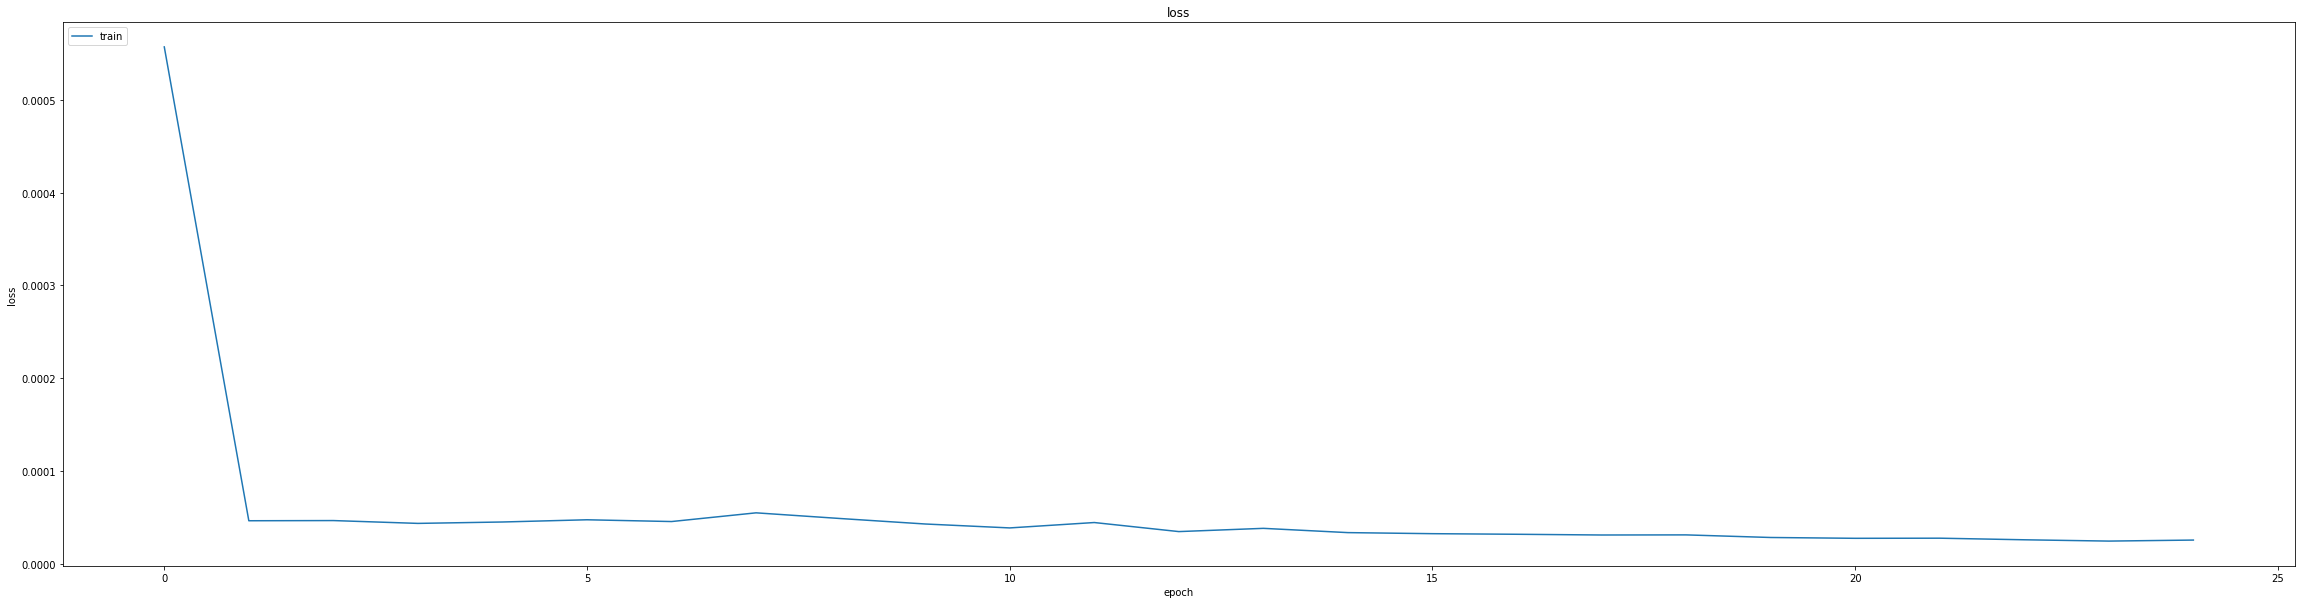

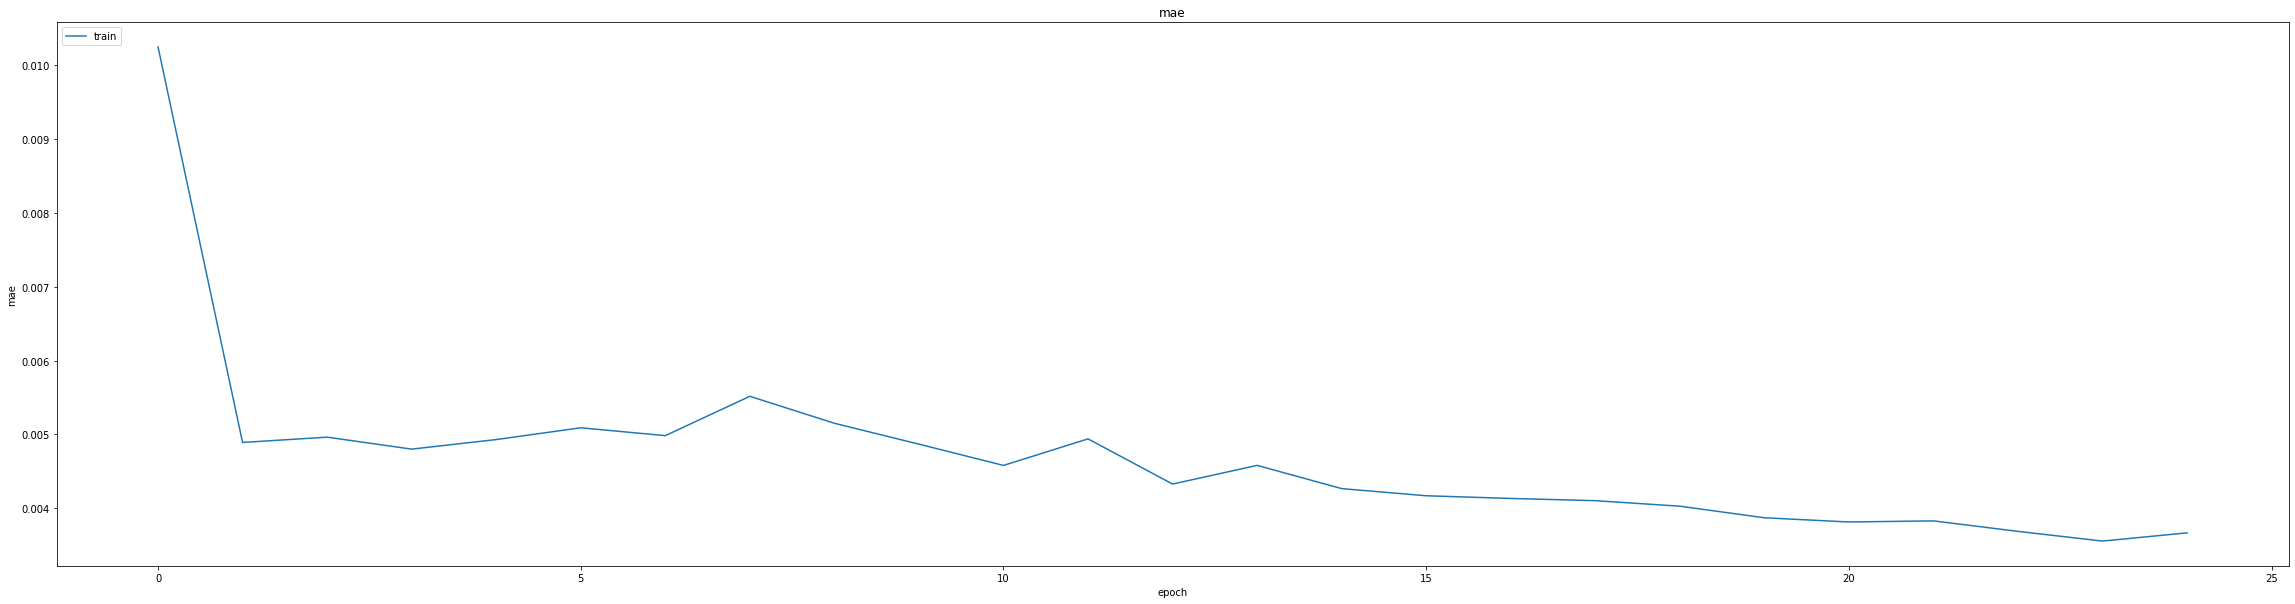

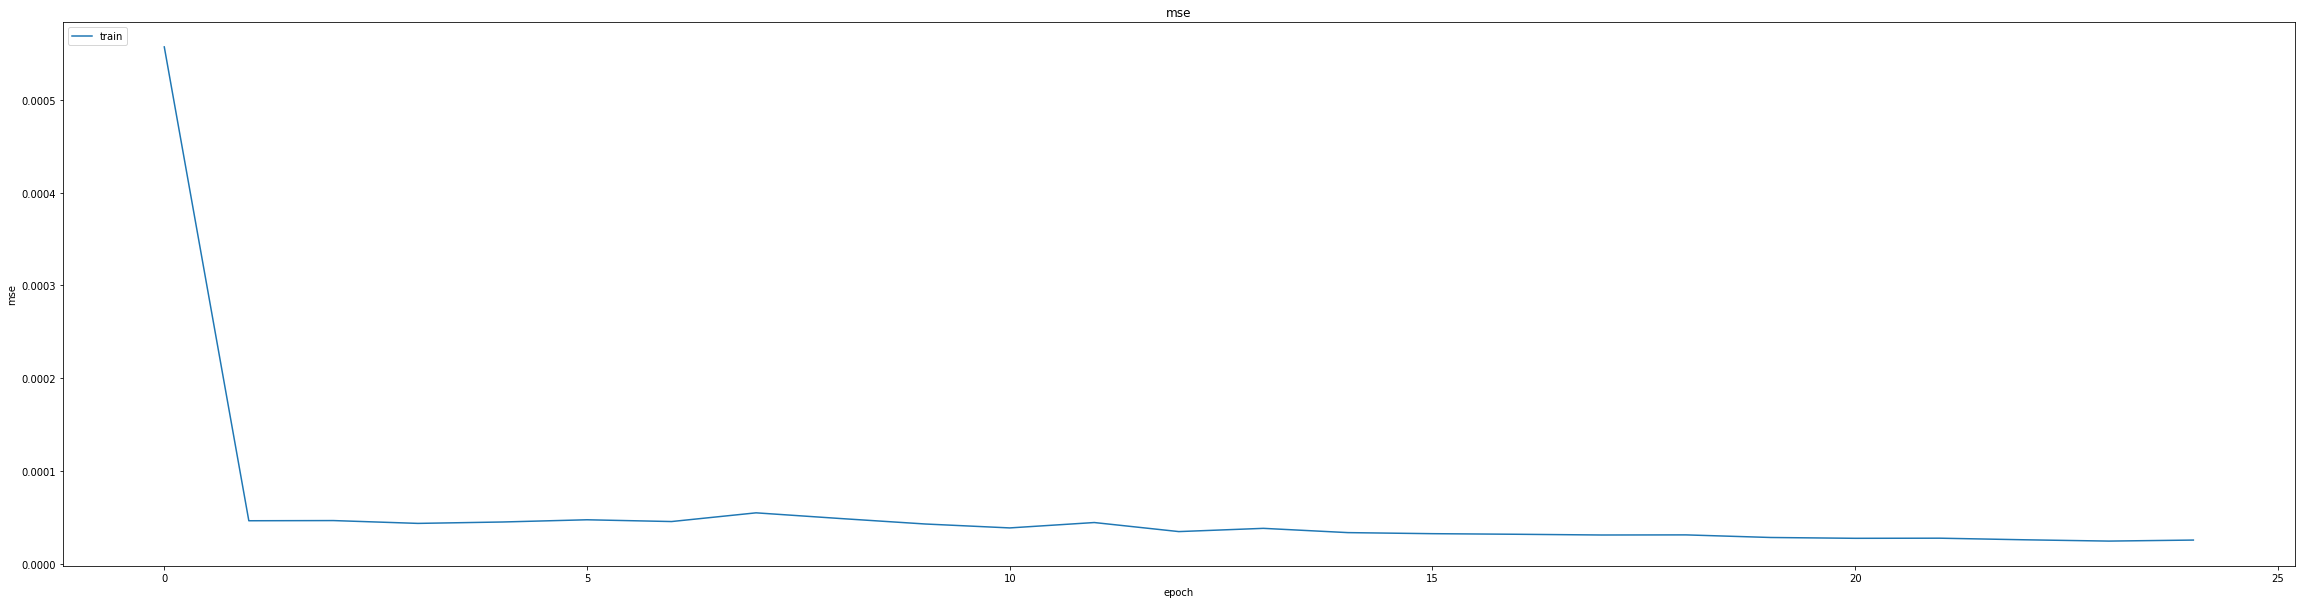

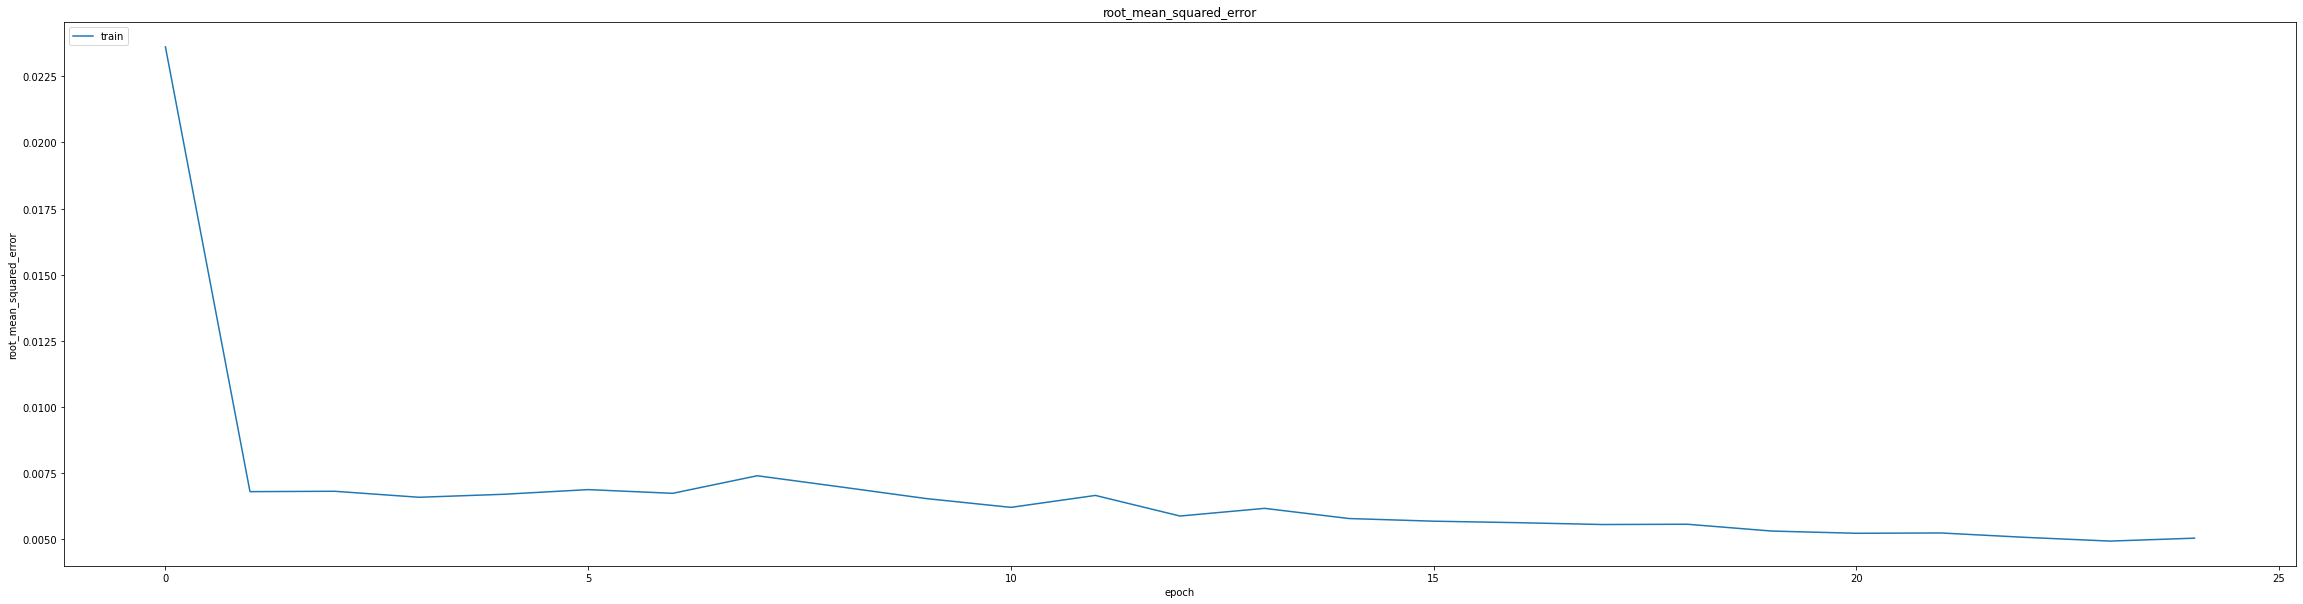

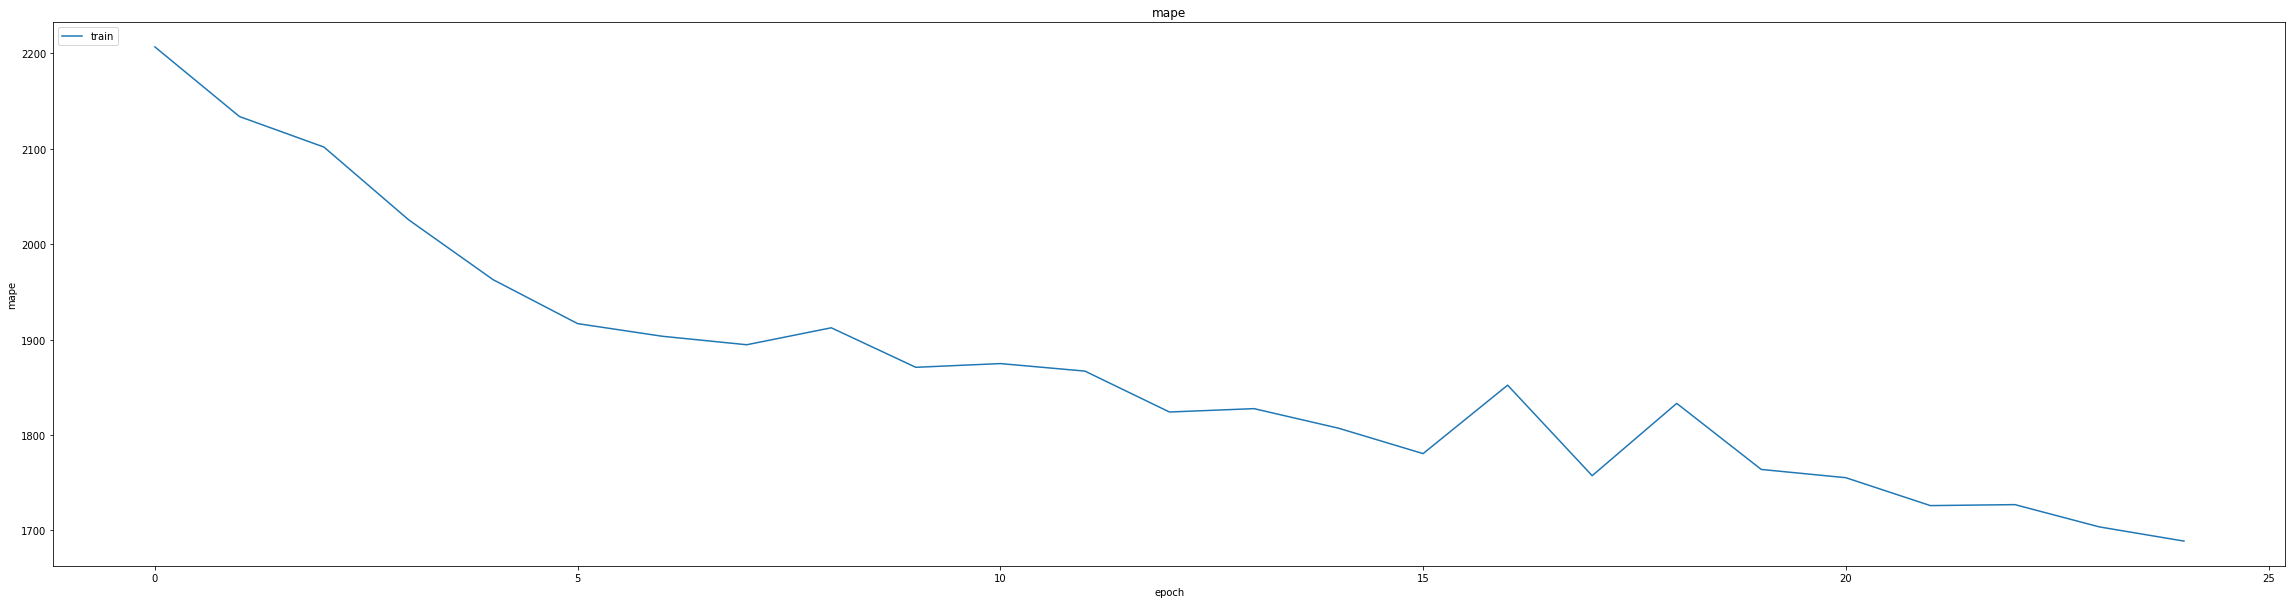

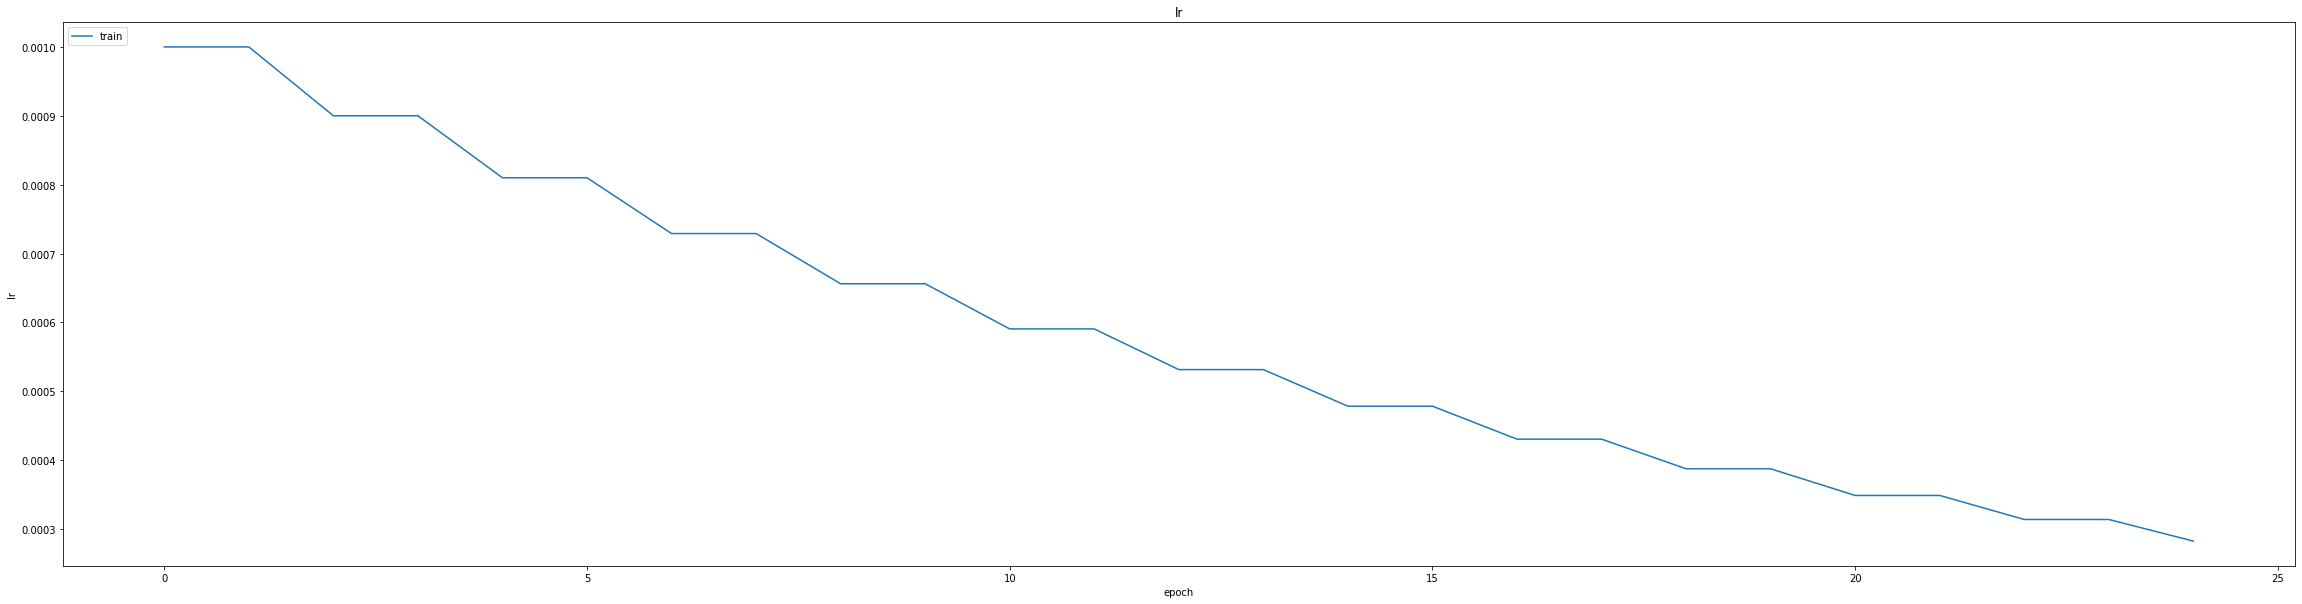

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.015089827589690685
0.019146844744682312
464/464 [==============================] - 2s 3ms/step
0.9959674147570072


464/464 [==============================] - 1s 3ms/step


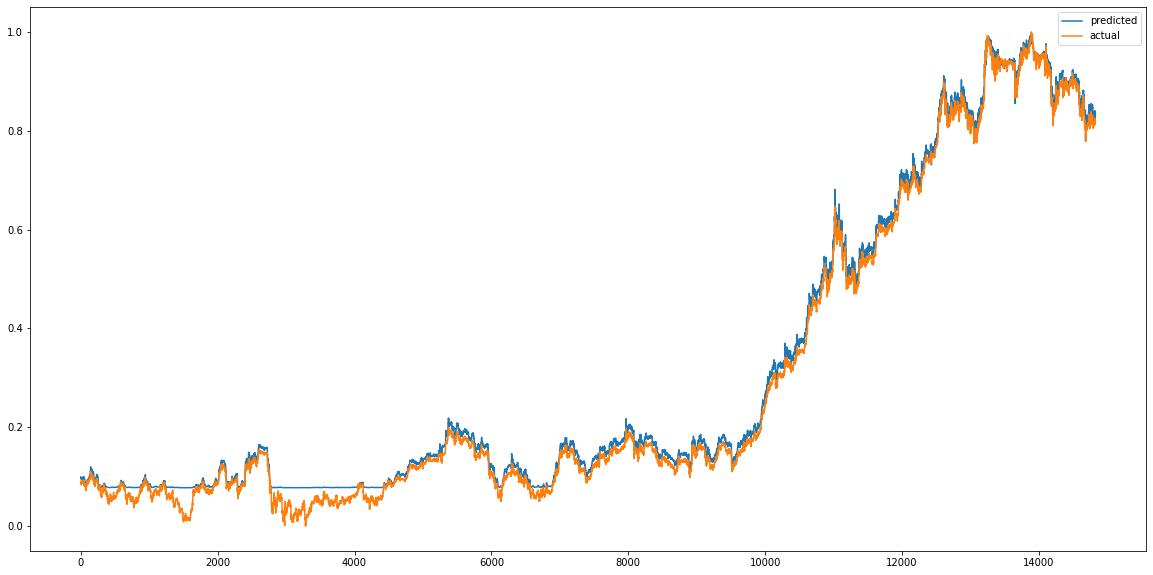

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


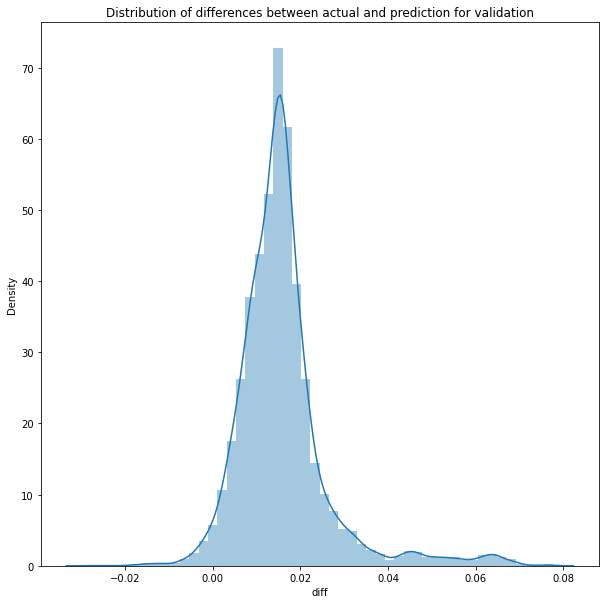

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 1s 3ms/step


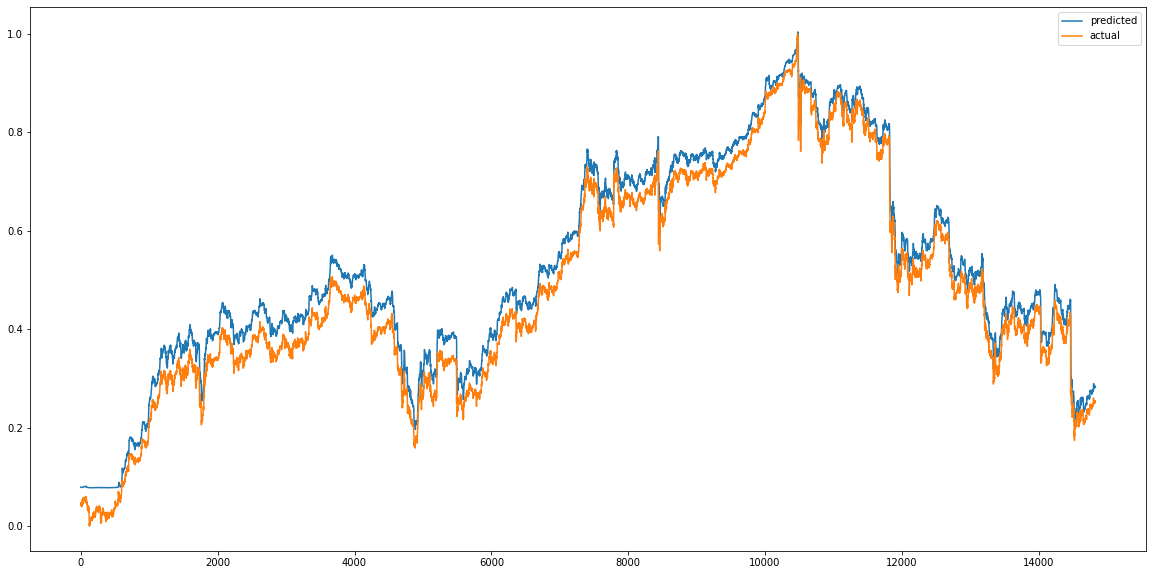

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


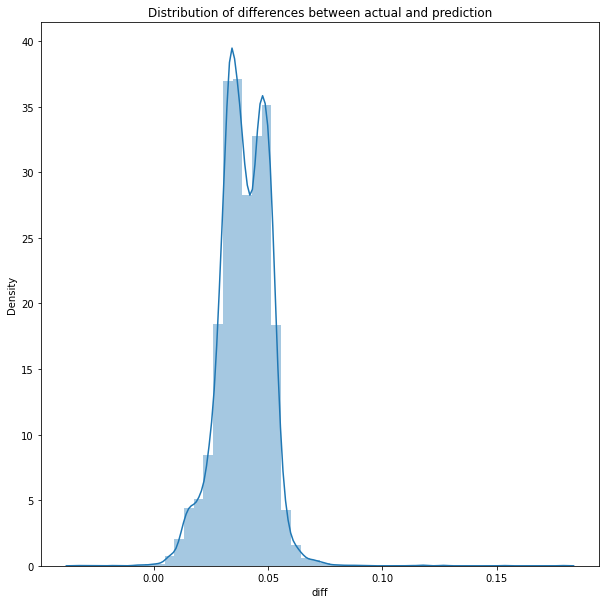

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0016715163277043268
RMSE :  0.04088418187642168
MAE :  0.0394736265792281
464/464 [==============================] - 2s 3ms/step
R2_Score  : 0.9653393234006608


count    14828.000000
mean         0.039458
std          0.010705
min         -0.033466
25%          0.032757
50%          0.039343
75%          0.047477
max          0.178927
Name: diff, dtype: float64

**CNN_GRU_MODEL**

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 64)            2368      
                                                                 
 gru_2 (GRU)                 (None, 24, 256)           247296    
                                                                 
 dropout_4 (Dropout)         (None, 24, 256)           0         
                                                                 
 gru_3 (GRU)                 (None, 64)                61824     
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dense_14 (Dense)            (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
347/348 [============================>.] - ETA: 0s - loss: 378.9104 - mae: 2.7492 - mse: 378.9104 - root_mean_squared_error: 19.4656 - mape: 10120.4111
Epoch 1: val_mse improved from inf to 0.08763, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 13s 29ms/step - loss: 377.9319 - mae: 2.7425 - mse: 377.9319 - root_mean_squared_error: 19.4405 - mape: 10094.3760 - val_loss: 0.0876 - val_mae: 0.2808 - val_mse: 0.0876 - val_root_mean_squared_error: 0.2960 - val_mape: 26627.9492
Epoch 2/75
345/348 [============================>.] - ETA: 0s - loss: 0.0200 - mae: 0.1200 - mse: 0.0200 - root_mean_squared_error: 0.1414 - mape: 9401.1221
Epoch 2: val_mse improved from 0.08763 to 0.07779, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 11s 31ms/step - loss: 0.0200 - mae: 0.1199 - mse: 0.0200 - root_mean_squared_error: 0.1414 - mape: 9323.0947 - val_loss: 0.0778 - val_mae: 0.2649 - val_mse: 0.0778 - val_root_mean_squared_error: 0.2789 - val_mape: 25557.3184
Epoch 3/75
345/348 [============================>.] - ETA: 0s - loss: 0.0167 - mae: 0.1085 - mse: 0.0167 - root_mean_squared_error: 0.1293 - mape: 9430.7900
Epoch 3: val_mse improved from 0.07779 to 0.06663, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 9s 27ms/step - loss: 0.0167 - mae: 0.1085 - mse: 0.0167 - root_mean_squared_error: 0.1293 - mape: 9352.5000 - val_loss: 0.0666 - val_mae: 0.2450 - val_mse: 0.0666 - val_root_mean_squared_error: 0.2581 - val_mape: 24226.1816
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 4.6668 - mae: 0.4121 - mse: 4.6668 - root_mean_squared_error: 2.1603 - mape: 8881.1289
Epoch 4: val_mse did not improve from 0.06663
348/348 [==============================] - 3s 9ms/step - loss: 4.6550 - mae: 0.4117 - mse: 4.6550 - root_mean_squared_error: 2.1575 - mape: 8858.3105 - val_loss: 0.0934 - val_mae: 0.2409 - val_mse: 0.0934 - val_root_mean_squared_error: 0.3057 - val_mape: 16828.6250
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0380 - mae: 0.1614 - mse: 0.0380 - root_mean_squared_error: 0.1949 - mape: 8028.3564
Epoch 5: val_mse improved from 0.06663 to 0.04411, saving model to /content/drive/MyDrive/modelweights/JPY_

348/348 [==============================] - 9s 26ms/step - loss: 0.0378 - mae: 0.1609 - mse: 0.0378 - root_mean_squared_error: 0.1945 - mape: 7984.6685 - val_loss: 0.0441 - val_mae: 0.1962 - val_mse: 0.0441 - val_root_mean_squared_error: 0.2100 - val_mape: 21472.5801
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 0.0025 - mae: 0.0379 - mse: 0.0025 - root_mean_squared_error: 0.0501 - mape: 3808.8760
Epoch 6: val_mse improved from 0.04411 to 0.00617, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 27ms/step - loss: 0.0025 - mae: 0.0378 - mse: 0.0025 - root_mean_squared_error: 0.0501 - mape: 3799.0588 - val_loss: 0.0062 - val_mae: 0.0712 - val_mse: 0.0062 - val_root_mean_squared_error: 0.0786 - val_mape: 10798.6904
Epoch 7/75
342/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0261 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 4408.7158
Epoch 7: val_mse improved from 0.00617 to 0.00467, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 9s 27ms/step - loss: 0.0011 - mae: 0.0261 - mse: 0.0011 - root_mean_squared_error: 0.0337 - mape: 4334.0767 - val_loss: 0.0047 - val_mae: 0.0610 - val_mse: 0.0047 - val_root_mean_squared_error: 0.0683 - val_mape: 10039.7002
Epoch 8/75
347/348 [============================>.] - ETA: 0s - loss: 9.2780e-04 - mae: 0.0234 - mse: 9.2780e-04 - root_mean_squared_error: 0.0305 - mape: 3631.6033
Epoch 8: val_mse improved from 0.00467 to 0.00409, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 29ms/step - loss: 9.2803e-04 - mae: 0.0234 - mse: 9.2803e-04 - root_mean_squared_error: 0.0305 - mape: 3622.2424 - val_loss: 0.0041 - val_mae: 0.0570 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0639 - val_mape: 9625.7148
Epoch 9/75
343/348 [============================>.] - ETA: 0s - loss: 8.1077e-04 - mae: 0.0218 - mse: 8.1077e-04 - root_mean_squared_error: 0.0285 - mape: 3474.2742
Epoch 9: val_mse improved from 0.00409 to 0.00374, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 8.1024e-04 - mae: 0.0218 - mse: 8.1024e-04 - root_mean_squared_error: 0.0285 - mape: 3425.4321 - val_loss: 0.0037 - val_mae: 0.0543 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0612 - val_mape: 9343.2178
Epoch 10/75
342/348 [============================>.] - ETA: 0s - loss: 7.2892e-04 - mae: 0.0205 - mse: 7.2892e-04 - root_mean_squared_error: 0.0270 - mape: 3665.2102
Epoch 10: val_mse improved from 0.00374 to 0.00372, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 7.2864e-04 - mae: 0.0205 - mse: 7.2864e-04 - root_mean_squared_error: 0.0270 - mape: 3603.1536 - val_loss: 0.0037 - val_mae: 0.0548 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0610 - val_mape: 9313.5039
Epoch 11/75
348/348 [==============================] - ETA: 0s - loss: 6.7133e-04 - mae: 0.0197 - mse: 6.7133e-04 - root_mean_squared_error: 0.0259 - mape: 3191.0100
Epoch 11: val_mse improved from 0.00372 to 0.00335, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 9s 26ms/step - loss: 6.7133e-04 - mae: 0.0197 - mse: 6.7133e-04 - root_mean_squared_error: 0.0259 - mape: 3191.0100 - val_loss: 0.0033 - val_mae: 0.0514 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0578 - val_mape: 9024.9756
Epoch 12/75
347/348 [============================>.] - ETA: 0s - loss: 6.2255e-04 - mae: 0.0189 - mse: 6.2255e-04 - root_mean_squared_error: 0.0250 - mape: 3624.6667
Epoch 12: val_mse improved from 0.00335 to 0.00306, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 6.2320e-04 - mae: 0.0189 - mse: 6.2320e-04 - root_mean_squared_error: 0.0250 - mape: 3615.3235 - val_loss: 0.0031 - val_mae: 0.0489 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0553 - val_mape: 8800.1953
Epoch 13/75
347/348 [============================>.] - ETA: 0s - loss: 5.7689e-04 - mae: 0.0182 - mse: 5.7689e-04 - root_mean_squared_error: 0.0240 - mape: 3459.2585
Epoch 13: val_mse improved from 0.00306 to 0.00279, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 27ms/step - loss: 5.7693e-04 - mae: 0.0182 - mse: 5.7693e-04 - root_mean_squared_error: 0.0240 - mape: 3450.3372 - val_loss: 0.0028 - val_mae: 0.0461 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0528 - val_mape: 8598.3184
Epoch 14/75
342/348 [============================>.] - ETA: 0s - loss: 5.3182e-04 - mae: 0.0174 - mse: 5.3182e-04 - root_mean_squared_error: 0.0231 - mape: 3411.0999
Epoch 14: val_mse improved from 0.00279 to 0.00264, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 9s 27ms/step - loss: 5.3116e-04 - mae: 0.0174 - mse: 5.3116e-04 - root_mean_squared_error: 0.0230 - mape: 3353.3408 - val_loss: 0.0026 - val_mae: 0.0450 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0514 - val_mape: 8456.7129
Epoch 15/75
347/348 [============================>.] - ETA: 0s - loss: 4.9375e-04 - mae: 0.0168 - mse: 4.9375e-04 - root_mean_squared_error: 0.0222 - mape: 3361.2463
Epoch 15: val_mse improved from 0.00264 to 0.00261, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 9s 26ms/step - loss: 4.9365e-04 - mae: 0.0168 - mse: 4.9365e-04 - root_mean_squared_error: 0.0222 - mape: 3352.5764 - val_loss: 0.0026 - val_mae: 0.0452 - val_mse: 0.0026 - val_root_mean_squared_error: 0.0511 - val_mape: 8368.2490
Epoch 16/75
343/348 [============================>.] - ETA: 0s - loss: 4.6137e-04 - mae: 0.0162 - mse: 4.6137e-04 - root_mean_squared_error: 0.0215 - mape: 3466.6443
Epoch 16: val_mse improved from 0.00261 to 0.00251, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 4.6052e-04 - mae: 0.0162 - mse: 4.6052e-04 - root_mean_squared_error: 0.0215 - mape: 3417.8870 - val_loss: 0.0025 - val_mae: 0.0443 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0501 - val_mape: 8297.7227
Epoch 17/75
342/348 [============================>.] - ETA: 0s - loss: 4.2591e-04 - mae: 0.0155 - mse: 4.2591e-04 - root_mean_squared_error: 0.0206 - mape: 3196.4763
Epoch 17: val_mse improved from 0.00251 to 0.00232, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 4.2517e-04 - mae: 0.0155 - mse: 4.2517e-04 - root_mean_squared_error: 0.0206 - mape: 3142.3469 - val_loss: 0.0023 - val_mae: 0.0423 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0481 - val_mape: 8098.0317
Epoch 18/75
347/348 [============================>.] - ETA: 0s - loss: 3.9730e-04 - mae: 0.0150 - mse: 3.9730e-04 - root_mean_squared_error: 0.0199 - mape: 3253.0925
Epoch 18: val_mse improved from 0.00232 to 0.00224, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 9s 26ms/step - loss: 3.9725e-04 - mae: 0.0150 - mse: 3.9725e-04 - root_mean_squared_error: 0.0199 - mape: 3244.7004 - val_loss: 0.0022 - val_mae: 0.0416 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0473 - val_mape: 8000.2817
Epoch 19/75
348/348 [==============================] - ETA: 0s - loss: 3.7236e-04 - mae: 0.0144 - mse: 3.7236e-04 - root_mean_squared_error: 0.0193 - mape: 3109.6497
Epoch 19: val_mse improved from 0.00224 to 0.00223, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 28ms/step - loss: 3.7236e-04 - mae: 0.0144 - mse: 3.7236e-04 - root_mean_squared_error: 0.0193 - mape: 3109.6497 - val_loss: 0.0022 - val_mae: 0.0416 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0472 - val_mape: 8026.9375
Epoch 20/75
342/348 [============================>.] - ETA: 0s - loss: 3.5168e-04 - mae: 0.0140 - mse: 3.5168e-04 - root_mean_squared_error: 0.0188 - mape: 3248.7654
Epoch 20: val_mse improved from 0.00223 to 0.00207, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 10s 27ms/step - loss: 3.5150e-04 - mae: 0.0140 - mse: 3.5150e-04 - root_mean_squared_error: 0.0187 - mape: 3193.7446 - val_loss: 0.0021 - val_mae: 0.0397 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 7914.4614
Epoch 21/75
346/348 [============================>.] - ETA: 0s - loss: 3.3306e-04 - mae: 0.0136 - mse: 3.3306e-04 - root_mean_squared_error: 0.0183 - mape: 3370.9998
Epoch 21: val_mse improved from 0.00207 to 0.00199, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)


348/348 [==============================] - 9s 26ms/step - loss: 3.3324e-04 - mae: 0.0136 - mse: 3.3324e-04 - root_mean_squared_error: 0.0183 - mape: 3352.6257 - val_loss: 0.0020 - val_mae: 0.0383 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0446 - val_mape: 7894.4175
Epoch 22/75
342/348 [============================>.] - ETA: 0s - loss: 3.1128e-04 - mae: 0.0131 - mse: 3.1128e-04 - root_mean_squared_error: 0.0176 - mape: 3391.7737
Epoch 22: val_mse did not improve from 0.00199
348/348 [==============================] - 3s 9ms/step - loss: 3.1125e-04 - mae: 0.0131 - mse: 3.1125e-04 - root_mean_squared_error: 0.0176 - mape: 3334.3223 - val_loss: 0.0043 - val_mae: 0.0398 - val_mse: 0.0043 - val_root_mean_squared_error: 0.0656 - val_mape: 7943.2593
Epoch 23/75
346/348 [============================>.] - ETA: 0s - loss: 2.9901e-04 - mae: 0.0128 - mse: 2.9901e-04 - root_mean_squared_error: 0.0173 - mape: 2851.7688
Epoch 23: val_mse did not improve from 0.00199
348/348 [==================

348/348 [==============================] - 10s 29ms/step - loss: 1.8966e-04 - mae: 0.0100 - mse: 1.8966e-04 - root_mean_squared_error: 0.0138 - mape: 2877.6560 - val_loss: 0.0019 - val_mae: 0.0380 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0435 - val_mape: 7982.6758
Epoch 34/75
346/348 [============================>.] - ETA: 0s - loss: 1.8814e-04 - mae: 0.0100 - mse: 1.8814e-04 - root_mean_squared_error: 0.0137 - mape: 2696.6382
Epoch 34: val_mse did not improve from 0.00189
348/348 [==============================] - 4s 11ms/step - loss: 1.8806e-04 - mae: 0.0100 - mse: 1.8806e-04 - root_mean_squared_error: 0.0137 - mape: 2681.9358 - val_loss: 0.0019 - val_mae: 0.0387 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0437 - val_mape: 7906.0830
Epoch 35/75
343/348 [============================>.] - ETA: 0s - loss: 1.7646e-04 - mae: 0.0097 - mse: 1.7646e-04 - root_mean_squared_error: 0.0133 - mape: 2983.9377
Epoch 35: val_mse did not improve from 0.00189
348/348 [================

348/348 [==============================] - 9s 27ms/step - loss: 1.7093e-04 - mae: 0.0095 - mse: 1.7093e-04 - root_mean_squared_error: 0.0131 - mape: 2819.3757 - val_loss: 0.0018 - val_mae: 0.0383 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0428 - val_mape: 7726.9409
Epoch 37/75
342/348 [============================>.] - ETA: 0s - loss: 1.6586e-04 - mae: 0.0093 - mse: 1.6586e-04 - root_mean_squared_error: 0.0129 - mape: 2982.8748
Epoch 37: val_mse did not improve from 0.00183
348/348 [==============================] - 3s 9ms/step - loss: 1.6543e-04 - mae: 0.0093 - mse: 1.6543e-04 - root_mean_squared_error: 0.0129 - mape: 2932.3386 - val_loss: 0.0019 - val_mae: 0.0398 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0440 - val_mape: 7730.4248
Epoch 38/75
342/348 [============================>.] - ETA: 0s - loss: 1.6689e-04 - mae: 0.0094 - mse: 1.6689e-04 - root_mean_squared_error: 0.0129 - mape: 2737.6917
Epoch 38: val_mse improved from 0.00183 to 0.00179, saving model to /conte

348/348 [==============================] - 9s 27ms/step - loss: 1.6632e-04 - mae: 0.0094 - mse: 1.6632e-04 - root_mean_squared_error: 0.0129 - mape: 2691.3152 - val_loss: 0.0018 - val_mae: 0.0381 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0423 - val_mape: 7601.2236
Epoch 39/75
344/348 [============================>.] - ETA: 0s - loss: 1.5035e-04 - mae: 0.0089 - mse: 1.5035e-04 - root_mean_squared_error: 0.0123 - mape: 2820.7485
Epoch 39: val_mse did not improve from 0.00179
348/348 [==============================] - 3s 9ms/step - loss: 1.5096e-04 - mae: 0.0089 - mse: 1.5096e-04 - root_mean_squared_error: 0.0123 - mape: 2789.1753 - val_loss: 0.0018 - val_mae: 0.0386 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0426 - val_mape: 7541.6987
Epoch 40/75
347/348 [============================>.] - ETA: 0s - loss: 1.5194e-04 - mae: 0.0090 - mse: 1.5194e-04 - root_mean_squared_error: 0.0123 - mape: 2921.7710
Epoch 40: val_mse did not improve from 0.00179
348/348 [==================

348/348 [==============================] - 9s 26ms/step - loss: 1.5135e-04 - mae: 0.0090 - mse: 1.5135e-04 - root_mean_squared_error: 0.0123 - mape: 2623.4197 - val_loss: 0.0016 - val_mae: 0.0353 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0395 - val_mape: 7299.9521
Epoch 42/75
346/348 [============================>.] - ETA: 0s - loss: 1.4435e-04 - mae: 0.0087 - mse: 1.4435e-04 - root_mean_squared_error: 0.0120 - mape: 2711.1975
Epoch 42: val_mse did not improve from 0.00156
348/348 [==============================] - 3s 9ms/step - loss: 1.4424e-04 - mae: 0.0087 - mse: 1.4424e-04 - root_mean_squared_error: 0.0120 - mape: 2696.4136 - val_loss: 0.0017 - val_mae: 0.0376 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mape: 7298.4990
Epoch 43/75
342/348 [============================>.] - ETA: 0s - loss: 1.4046e-04 - mae: 0.0086 - mse: 1.4046e-04 - root_mean_squared_error: 0.0119 - mape: 2667.5098
Epoch 43: val_mse improved from 0.00156 to 0.00137, saving model to /conte

348/348 [==============================] - 9s 27ms/step - loss: 1.4089e-04 - mae: 0.0087 - mse: 1.4089e-04 - root_mean_squared_error: 0.0119 - mape: 2622.3264 - val_loss: 0.0014 - val_mae: 0.0323 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0370 - val_mape: 7191.1387
Epoch 44/75
343/348 [============================>.] - ETA: 0s - loss: 1.4293e-04 - mae: 0.0087 - mse: 1.4293e-04 - root_mean_squared_error: 0.0120 - mape: 2696.6868
Epoch 44: val_mse did not improve from 0.00137
348/348 [==============================] - 3s 9ms/step - loss: 1.4328e-04 - mae: 0.0087 - mse: 1.4328e-04 - root_mean_squared_error: 0.0120 - mape: 2658.7500 - val_loss: 0.0016 - val_mae: 0.0372 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0406 - val_mape: 7200.8110
Epoch 45/75
348/348 [==============================] - ETA: 0s - loss: 1.3824e-04 - mae: 0.0086 - mse: 1.3824e-04 - root_mean_squared_error: 0.0118 - mape: 2493.2107
Epoch 45: val_mse did not improve from 0.00137
348/348 [==================

348/348 [==============================] - 9s 27ms/step - loss: 1.1000e-04 - mae: 0.0077 - mse: 1.1000e-04 - root_mean_squared_error: 0.0105 - mape: 2386.1345 - val_loss: 0.0013 - val_mae: 0.0347 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0367 - val_mape: 6366.2793
Epoch 54/75
348/348 [==============================] - ETA: 0s - loss: 1.1801e-04 - mae: 0.0081 - mse: 1.1801e-04 - root_mean_squared_error: 0.0109 - mape: 2258.7656
Epoch 54: val_mse did not improve from 0.00135
348/348 [==============================] - 3s 9ms/step - loss: 1.1801e-04 - mae: 0.0081 - mse: 1.1801e-04 - root_mean_squared_error: 0.0109 - mape: 2258.7656 - val_loss: 0.0020 - val_mae: 0.0437 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0450 - val_mape: 6514.1216
Epoch 55/75
348/348 [==============================] - ETA: 0s - loss: 1.0233e-04 - mae: 0.0074 - mse: 1.0233e-04 - root_mean_squared_error: 0.0101 - mape: 2116.1157
Epoch 55: val_mse did not improve from 0.00135
348/348 [==================

348/348 [==============================] - 9s 26ms/step - loss: 9.6245e-05 - mae: 0.0072 - mse: 9.6245e-05 - root_mean_squared_error: 0.0098 - mape: 2180.5076 - val_loss: 0.0013 - val_mae: 0.0347 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0364 - val_mape: 5920.8013
Epoch 60/75
348/348 [==============================] - ETA: 0s - loss: 9.7527e-05 - mae: 0.0073 - mse: 9.7527e-05 - root_mean_squared_error: 0.0099 - mape: 2214.7974
Epoch 60: val_mse did not improve from 0.00132
348/348 [==============================] - 3s 9ms/step - loss: 9.7527e-05 - mae: 0.0073 - mse: 9.7527e-05 - root_mean_squared_error: 0.0099 - mape: 2214.7974 - val_loss: 0.0014 - val_mae: 0.0358 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0371 - val_mape: 5872.0112
Epoch 61/75
347/348 [============================>.] - ETA: 0s - loss: 8.6994e-05 - mae: 0.0068 - mse: 8.6994e-05 - root_mean_squared_error: 0.0093 - mape: 2224.8481
Epoch 61: val_mse did not improve from 0.00132
348/348 [==================

348/348 [==============================] - 10s 28ms/step - loss: 6.8671e-05 - mae: 0.0061 - mse: 6.8671e-05 - root_mean_squared_error: 0.0083 - mape: 1846.7004 - val_loss: 0.0013 - val_mae: 0.0351 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0359 - val_mape: 5138.6045
Epoch 75/75
344/348 [============================>.] - ETA: 0s - loss: 6.3179e-05 - mae: 0.0058 - mse: 6.3179e-05 - root_mean_squared_error: 0.0079 - mape: 1995.3483
Epoch 75: val_mse did not improve from 0.00129
348/348 [==============================] - 3s 9ms/step - loss: 6.3359e-05 - mae: 0.0058 - mse: 6.3359e-05 - root_mean_squared_error: 0.0080 - mape: 1973.0077 - val_loss: 0.0013 - val_mae: 0.0351 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0359 - val_mape: 5374.3247


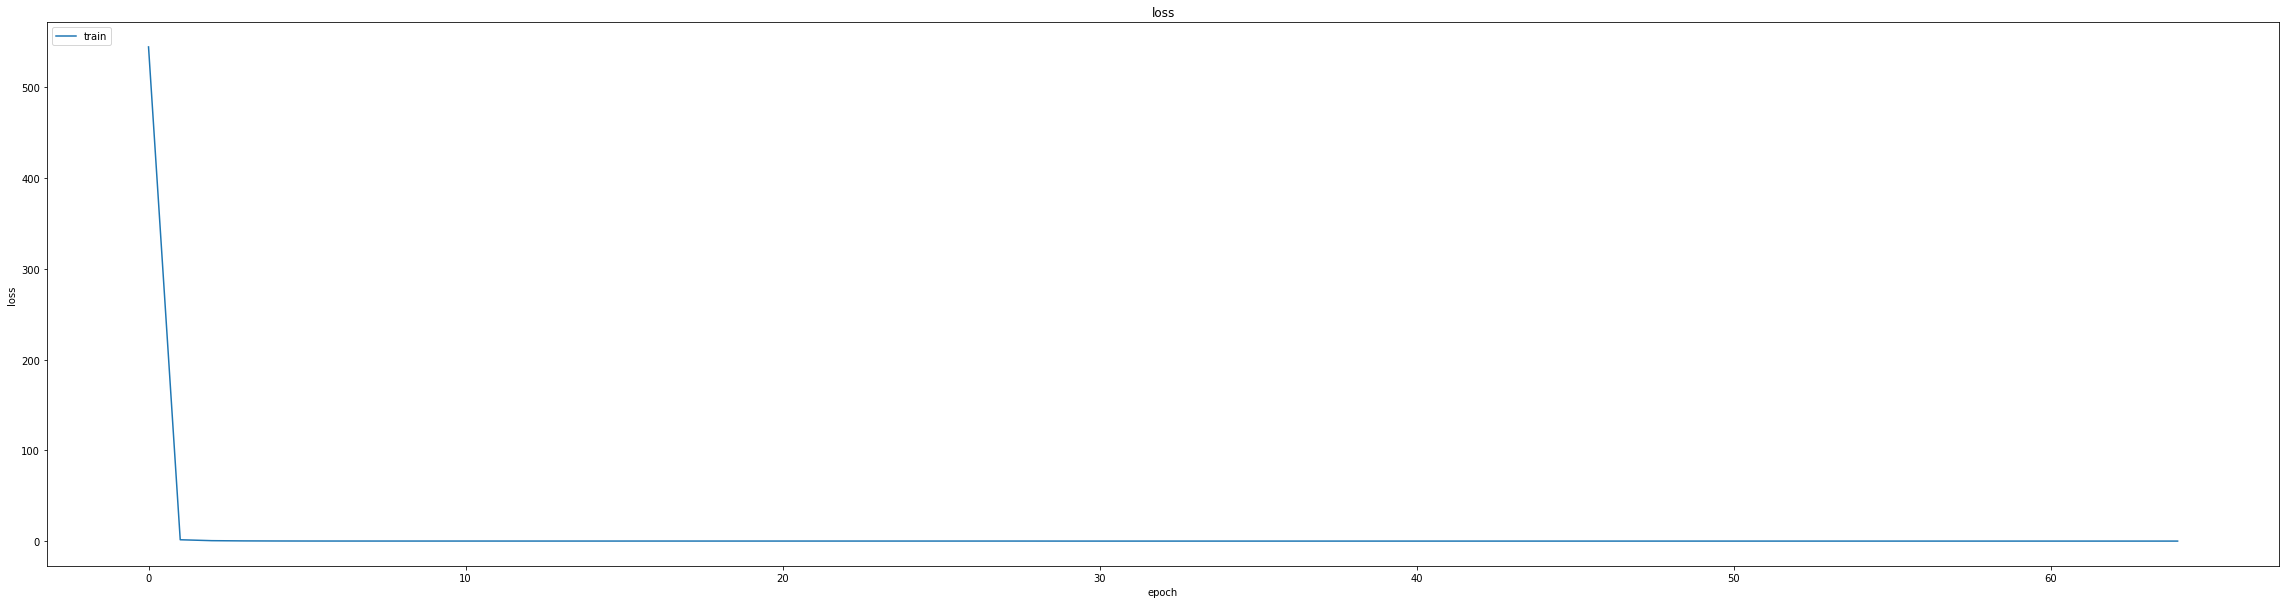

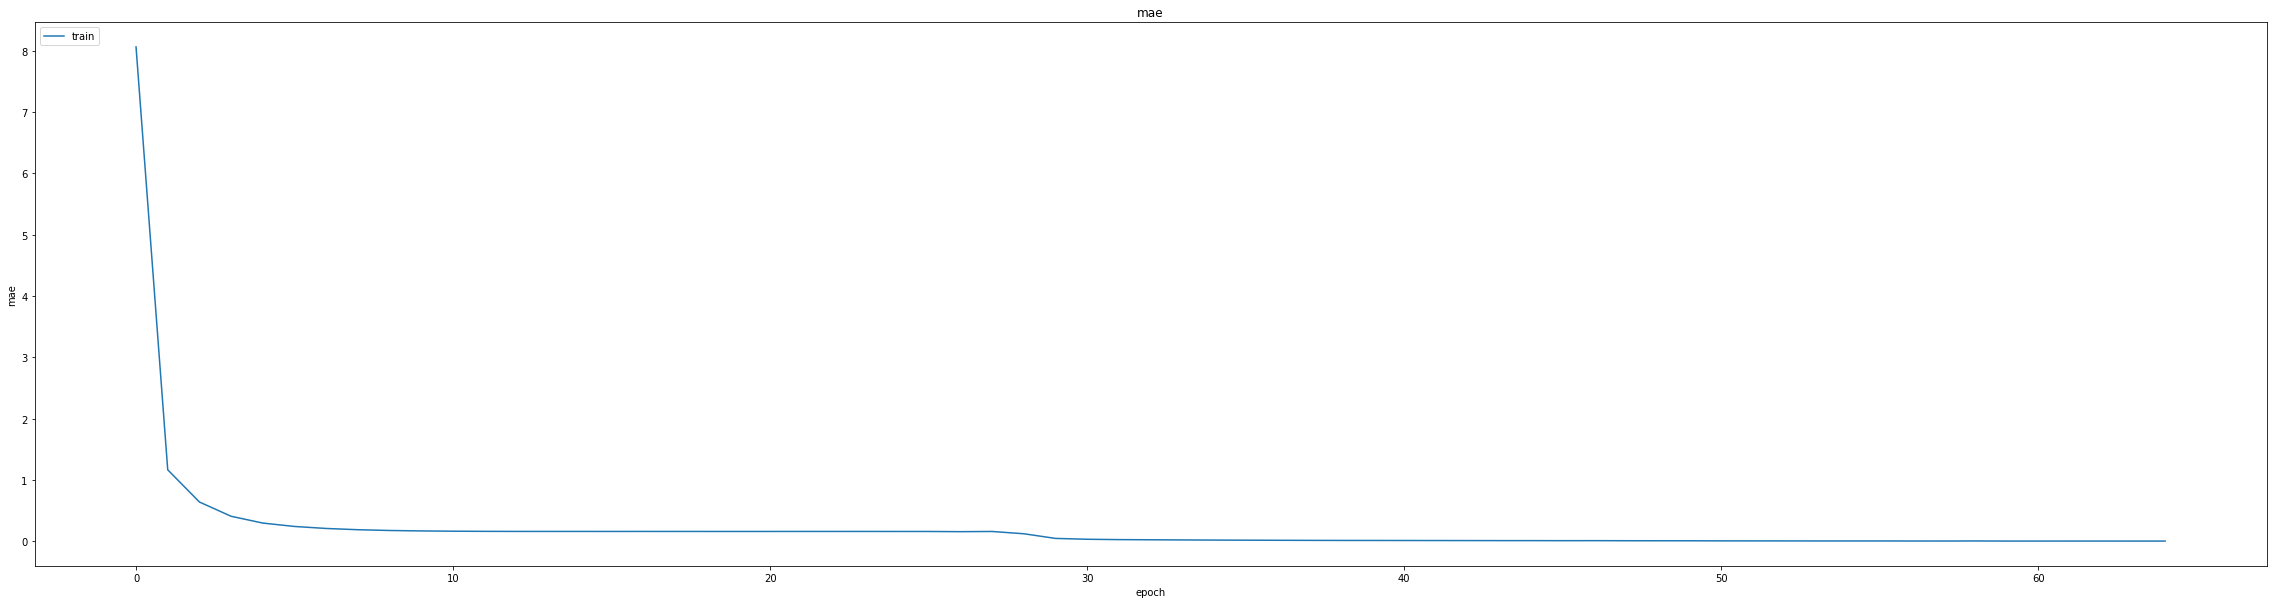

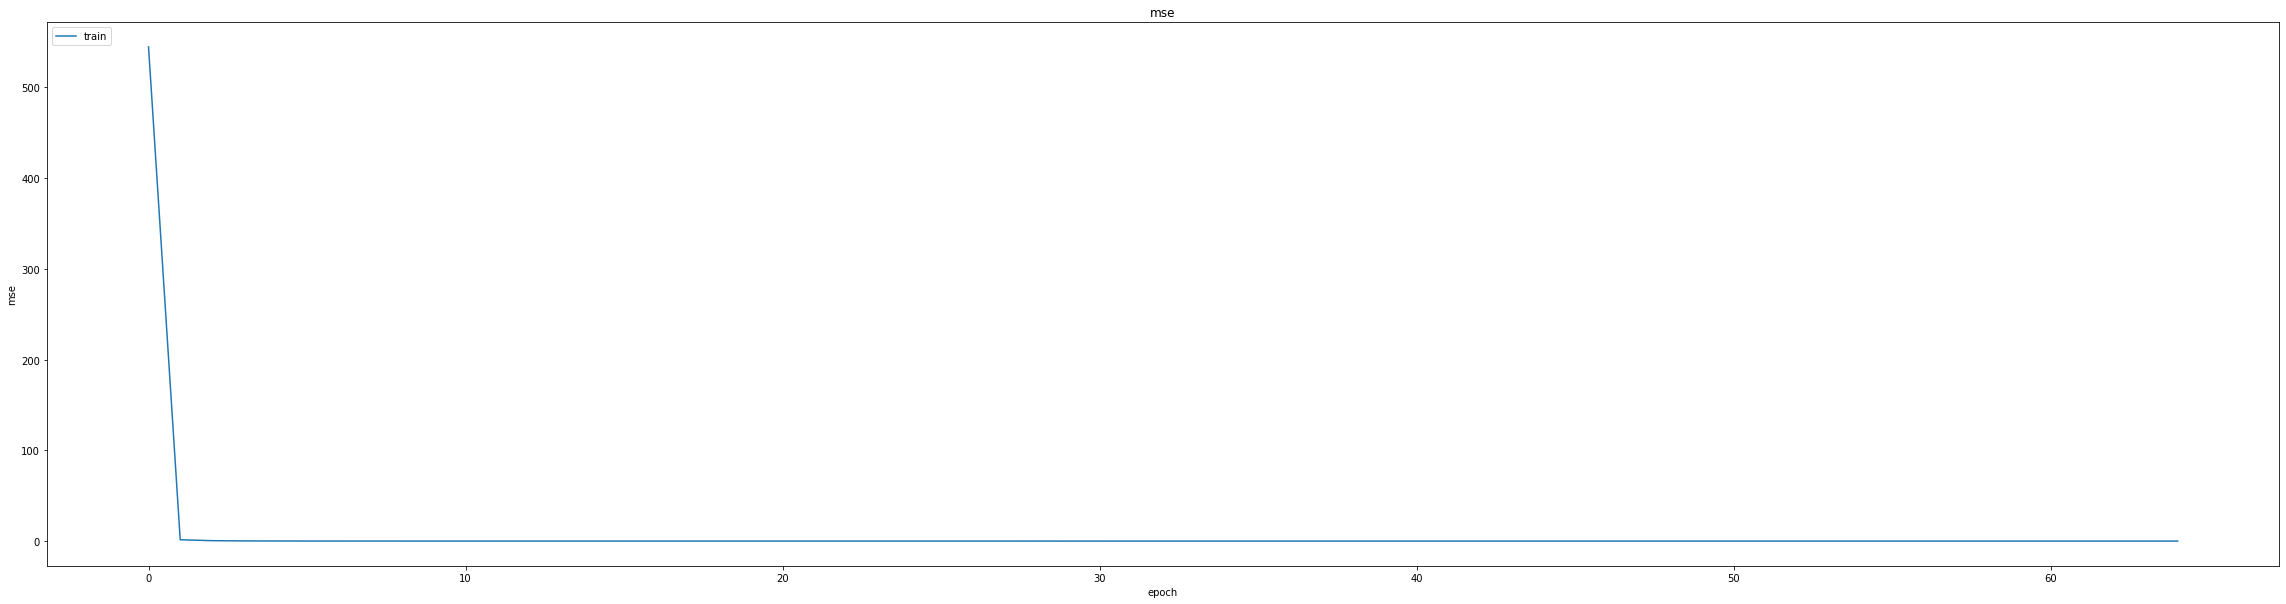

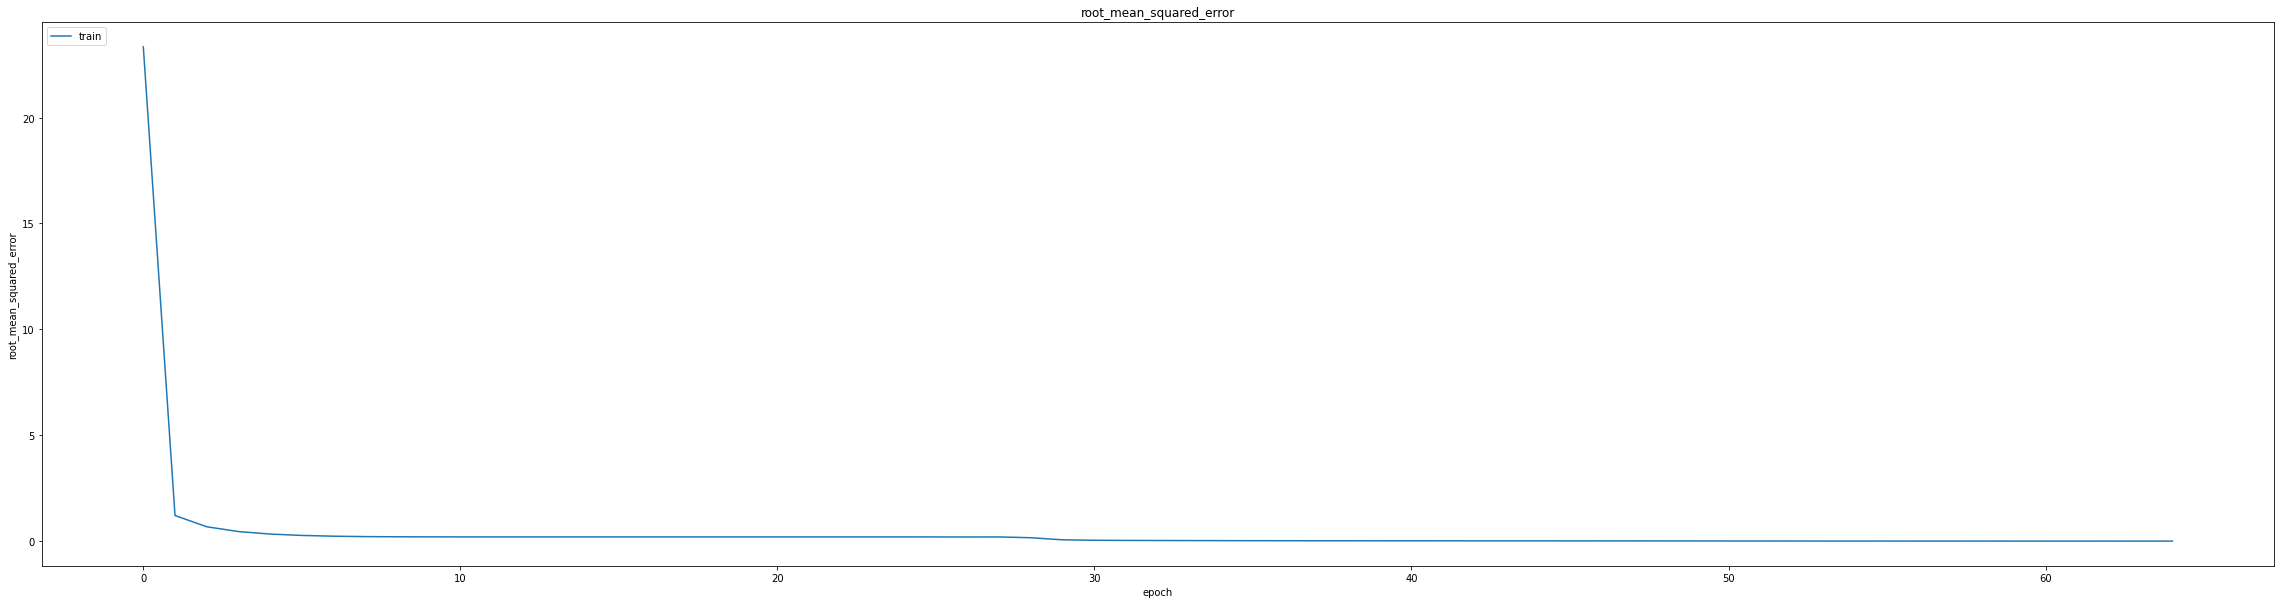

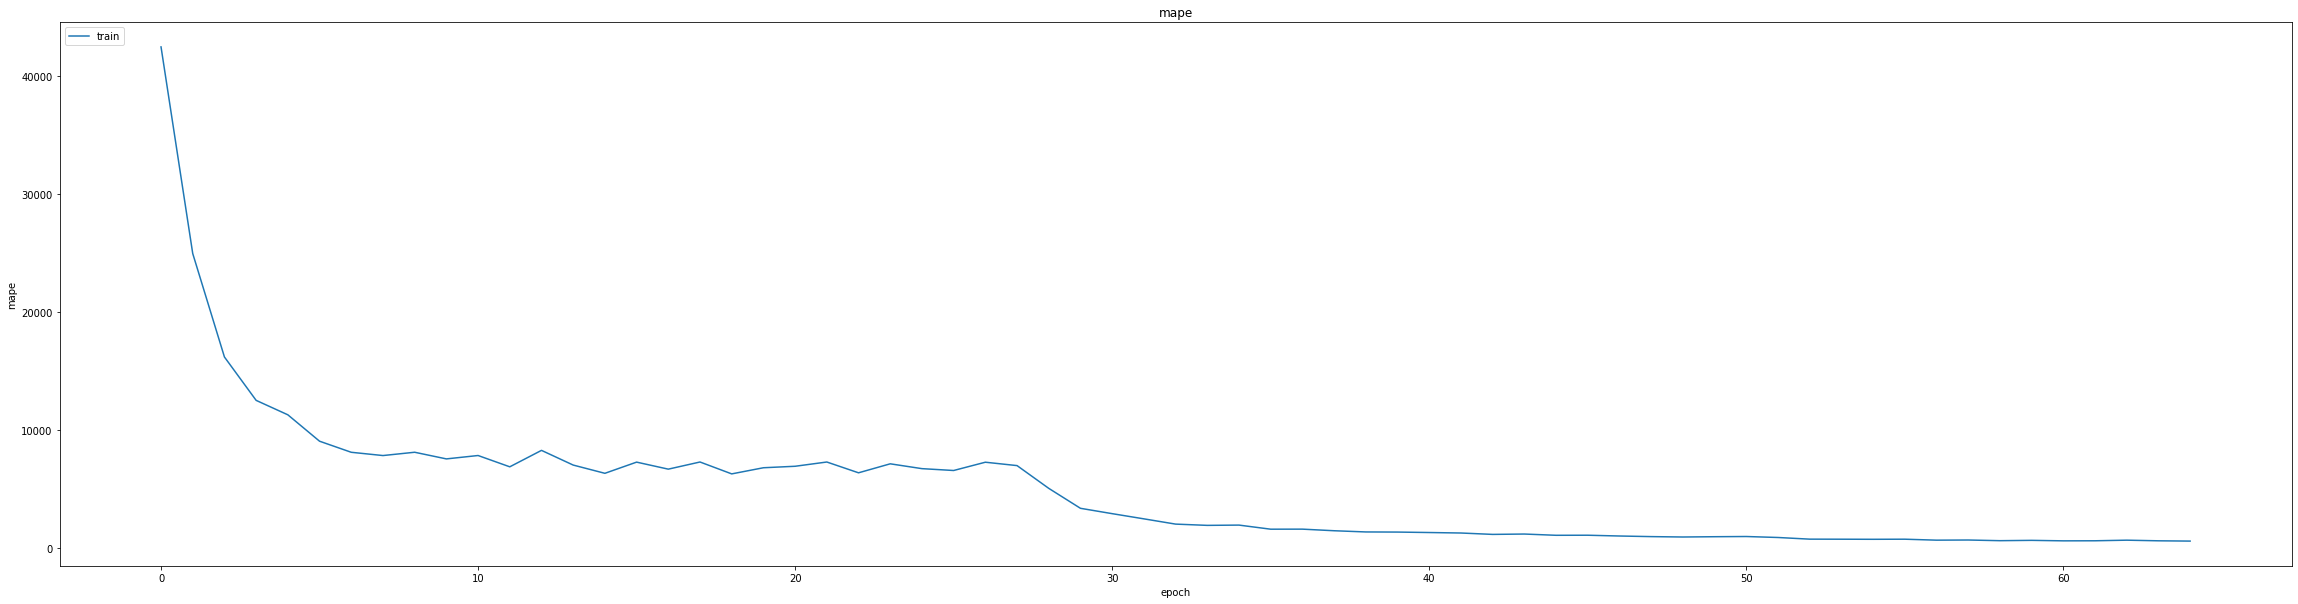

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03227190300822258
0.035904962569475174
464/464 [==============================] - 2s 3ms/step
0.9861834541920796


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
344/348 [============================>.] - ETA: 0s - loss: 1.5603e-04 - mae: 0.0071 - mse: 1.5603e-04 - root_mean_squared_error: 0.0125 - mape: 1774.7478


Epoch 1: val_mse did not improve from 0.00129
348/348 [==============================] - 7s 14ms/step - loss: 1.5484e-04 - mae: 0.0071 - mse: 1.5484e-04 - root_mean_squared_error: 0.0124 - mape: 1754.8762 - val_loss: 0.0015 - val_mae: 0.0382 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0389 - val_mape: 5098.3945 - lr: 0.0010
Epoch 2/25
344/348 [============================>.] - ETA: 0s - loss: 5.4947e-05 - mae: 0.0053 - mse: 5.4947e-05 - root_mean_squared_error: 0.0074 - mape: 1860.9066
Epoch 2: val_mse did not improve from 0.00129
348/348 [==============================] - 4s 11ms/step - loss: 5.4892e-05 - mae: 0.0053 - mse: 5.4892e-05 - root_mean_squared_error: 0.0074 - mape: 1840.0686 - val_loss: 0.0015 - val_mae: 0.0375 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mape: 5026.1157 - lr: 0.0010
lr changed to 0.0009000000427477062
Epoch 3/25
348/348 [==============================] - ETA: 0s - loss: 5.4664e-05 - mae: 0.0054 - mse: 5.4664e-05 - root_mean_squared

348/348 [==============================] - 16s 45ms/step - loss: 5.1741e-05 - mae: 0.0051 - mse: 5.1741e-05 - root_mean_squared_error: 0.0072 - mape: 1683.9982 - val_loss: 0.0010 - val_mae: 0.0314 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0324 - val_mape: 4976.6987 - lr: 9.0000e-04
lr changed to 0.0008100000384729356
Epoch 5/25
343/348 [============================>.] - ETA: 0s - loss: 5.0323e-05 - mae: 0.0051 - mse: 5.0323e-05 - root_mean_squared_error: 0.0071 - mape: 1798.3975
Epoch 5: val_mse did not improve from 0.00105
348/348 [==============================] - 3s 9ms/step - loss: 5.0070e-05 - mae: 0.0051 - mse: 5.0070e-05 - root_mean_squared_error: 0.0071 - mape: 1773.0907 - val_loss: 0.0013 - val_mae: 0.0354 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0360 - val_mape: 4684.0142 - lr: 8.1000e-04
Epoch 6/25
347/348 [============================>.] - ETA: 0s - loss: 4.8117e-05 - mae: 0.0051 - mse: 4.8117e-05 - root_mean_squared_error: 0.0069 - mape: 1790.4618
Epoch 

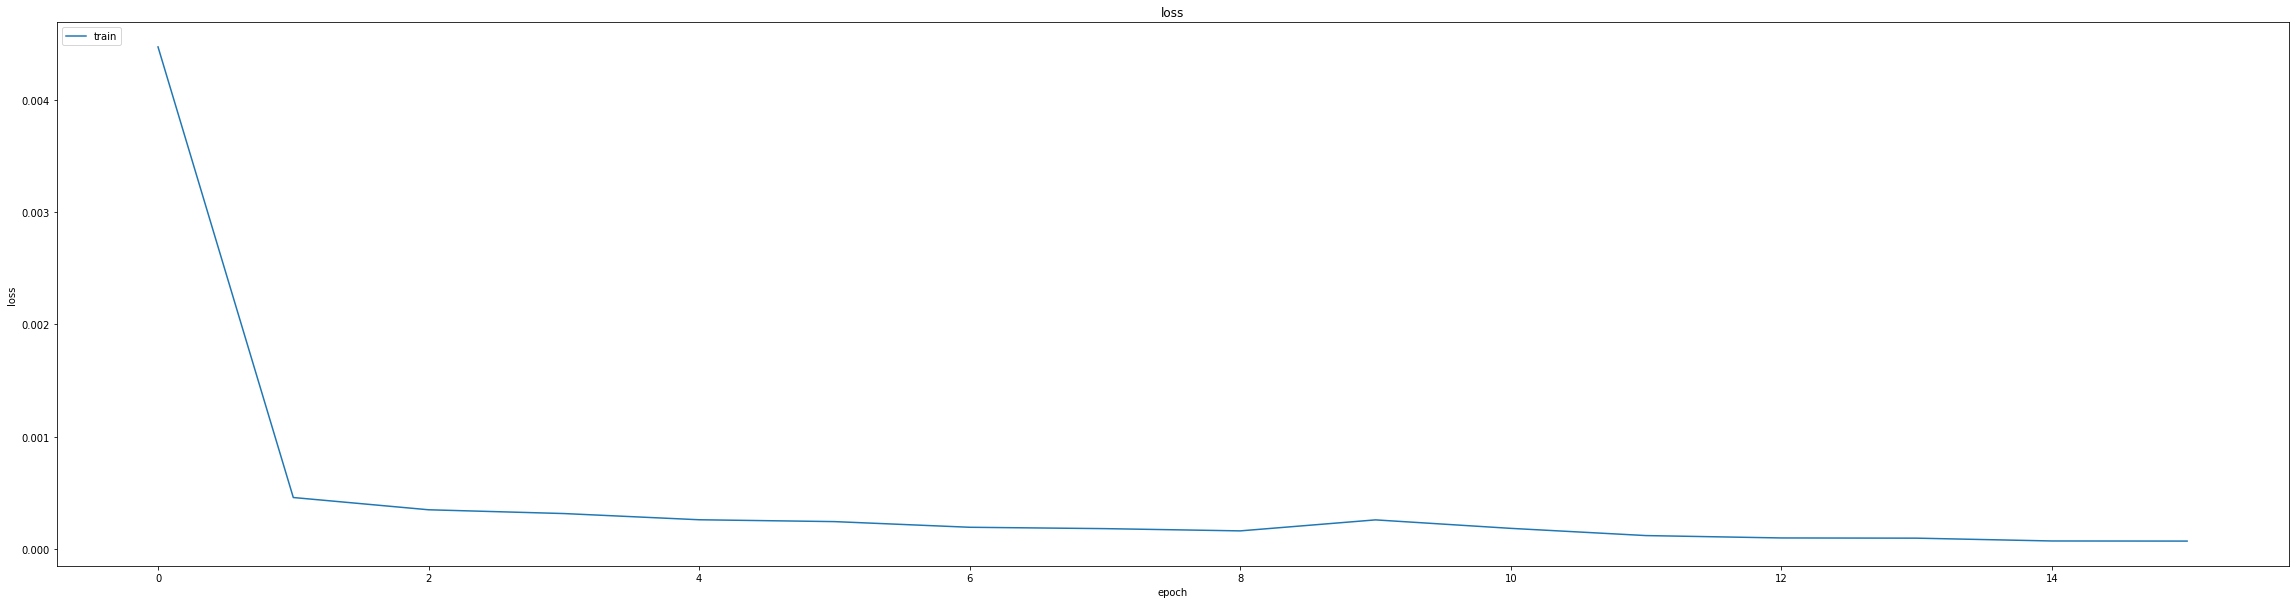

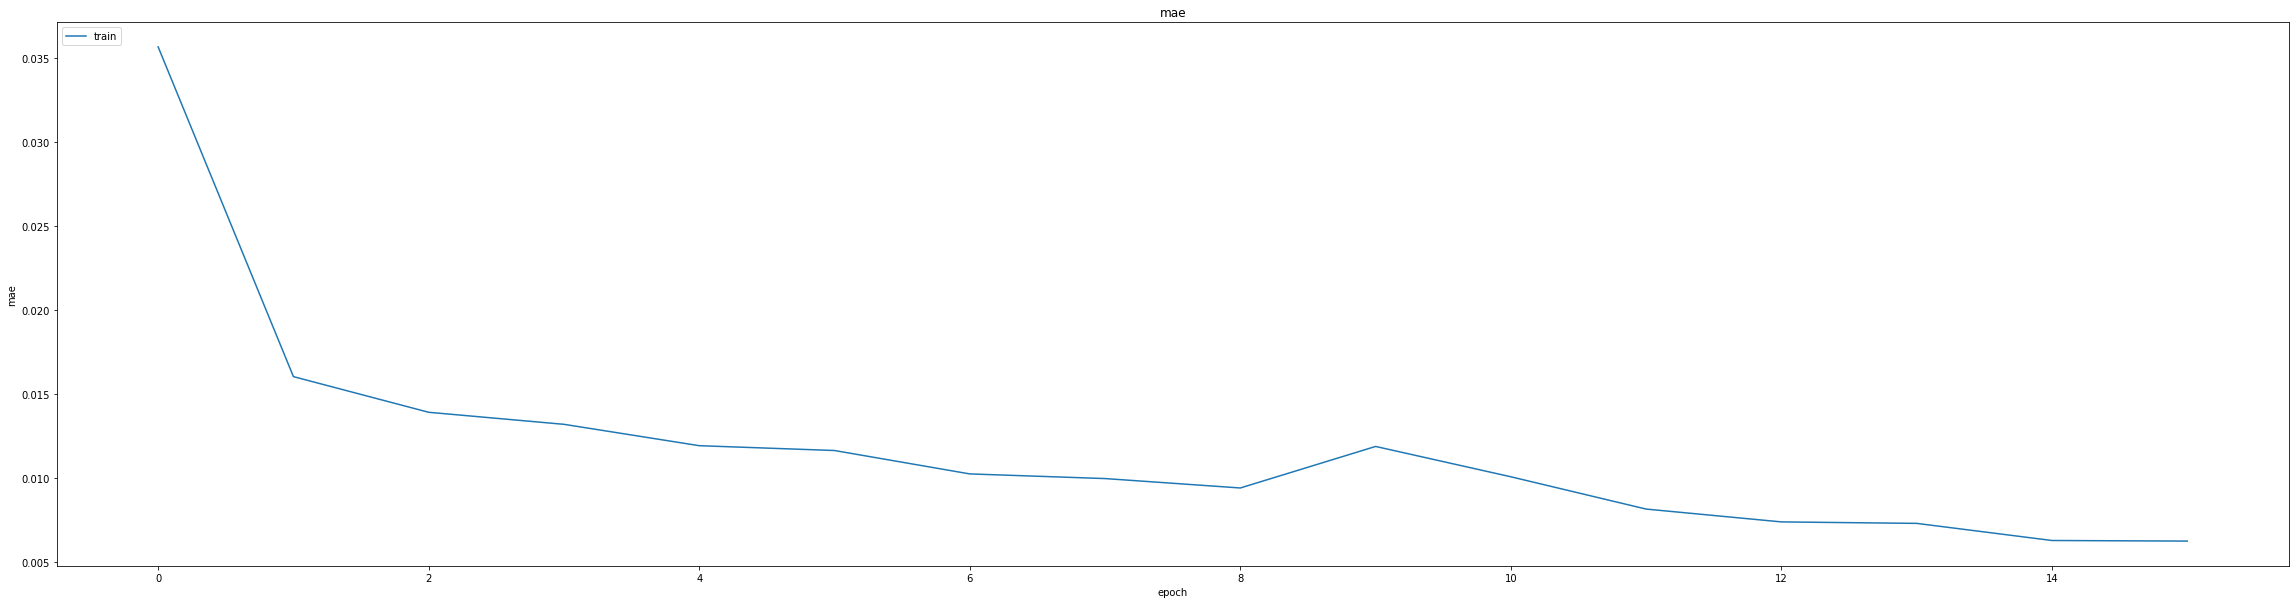

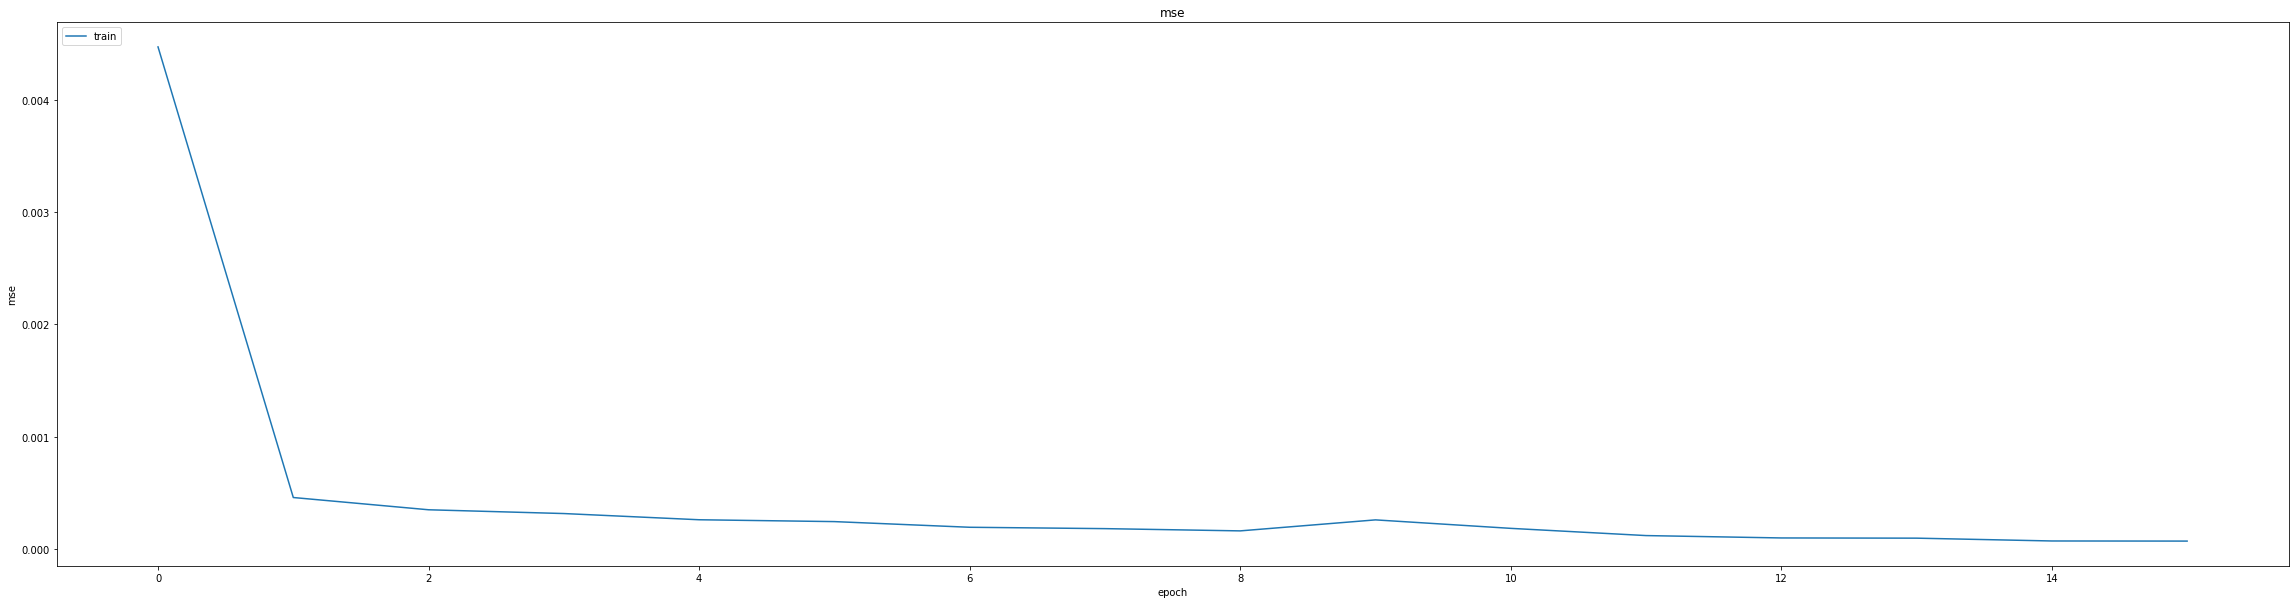

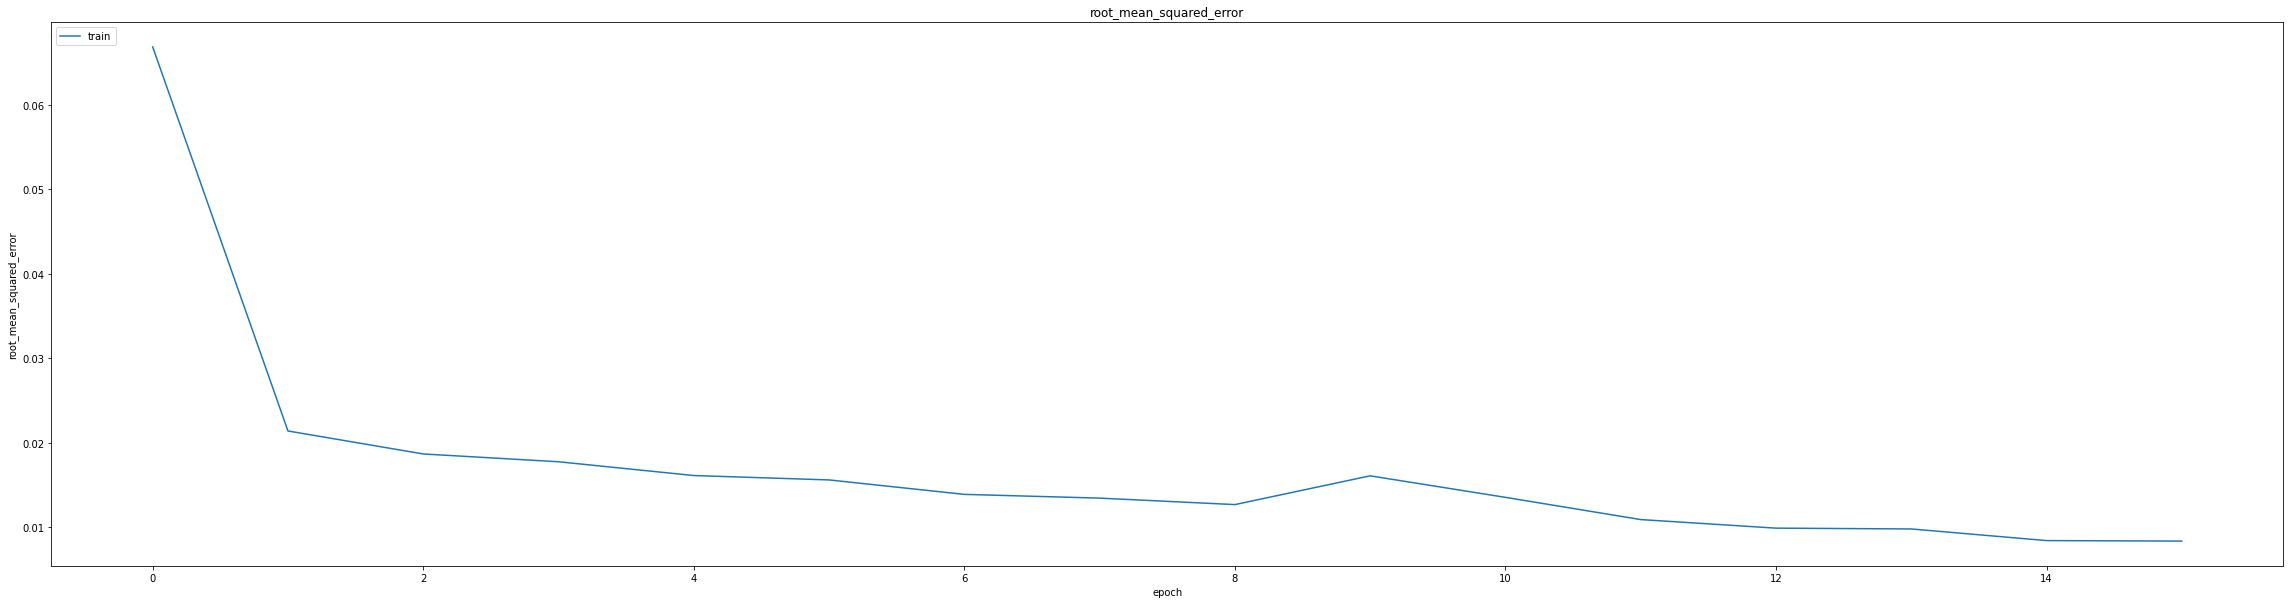

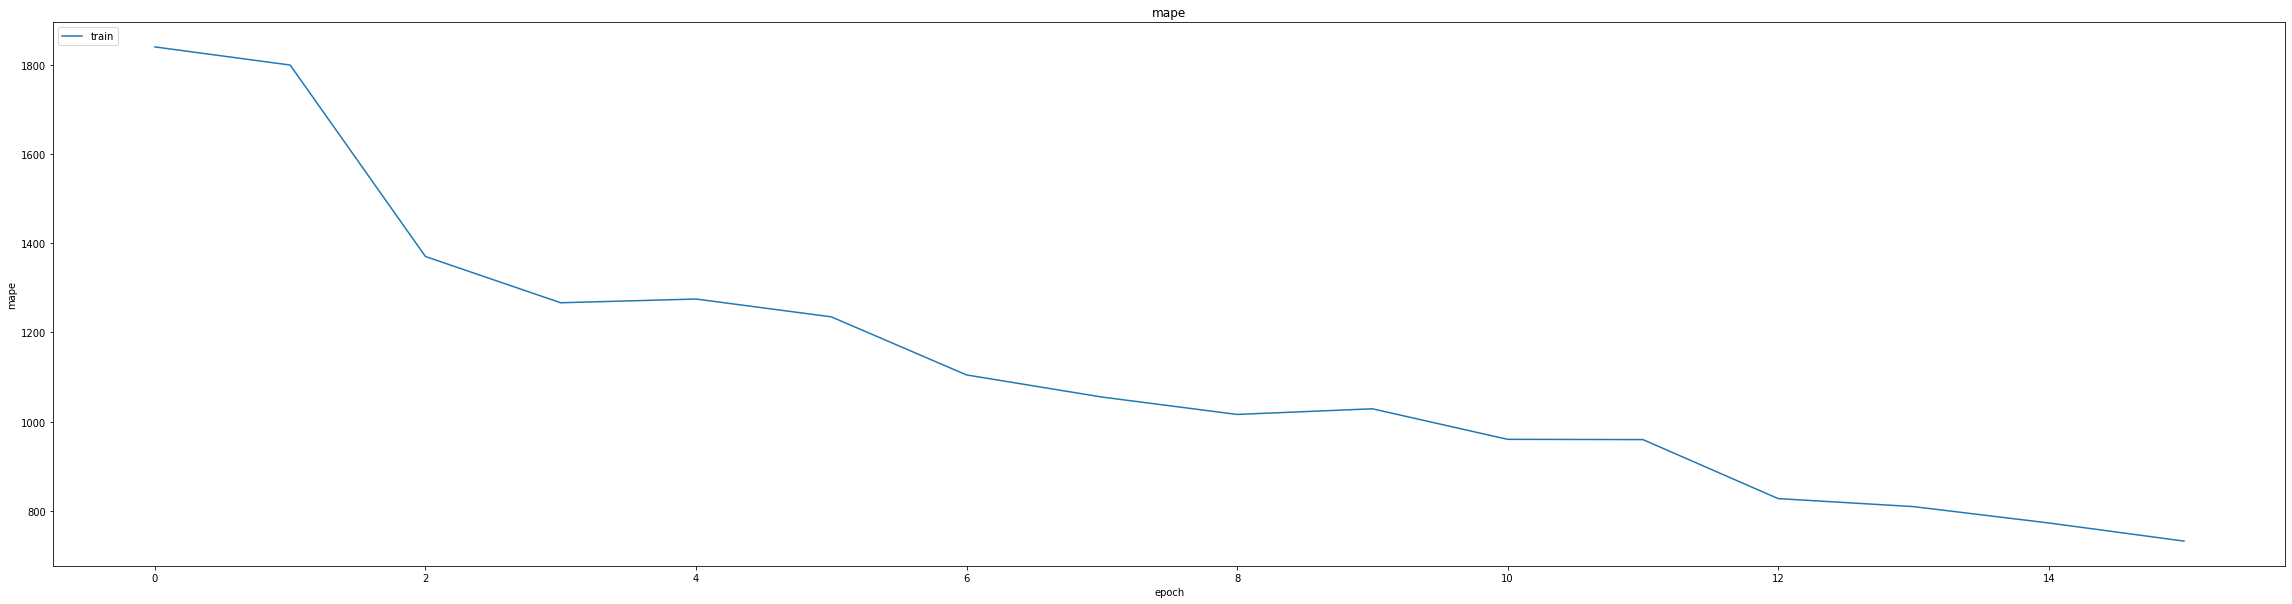

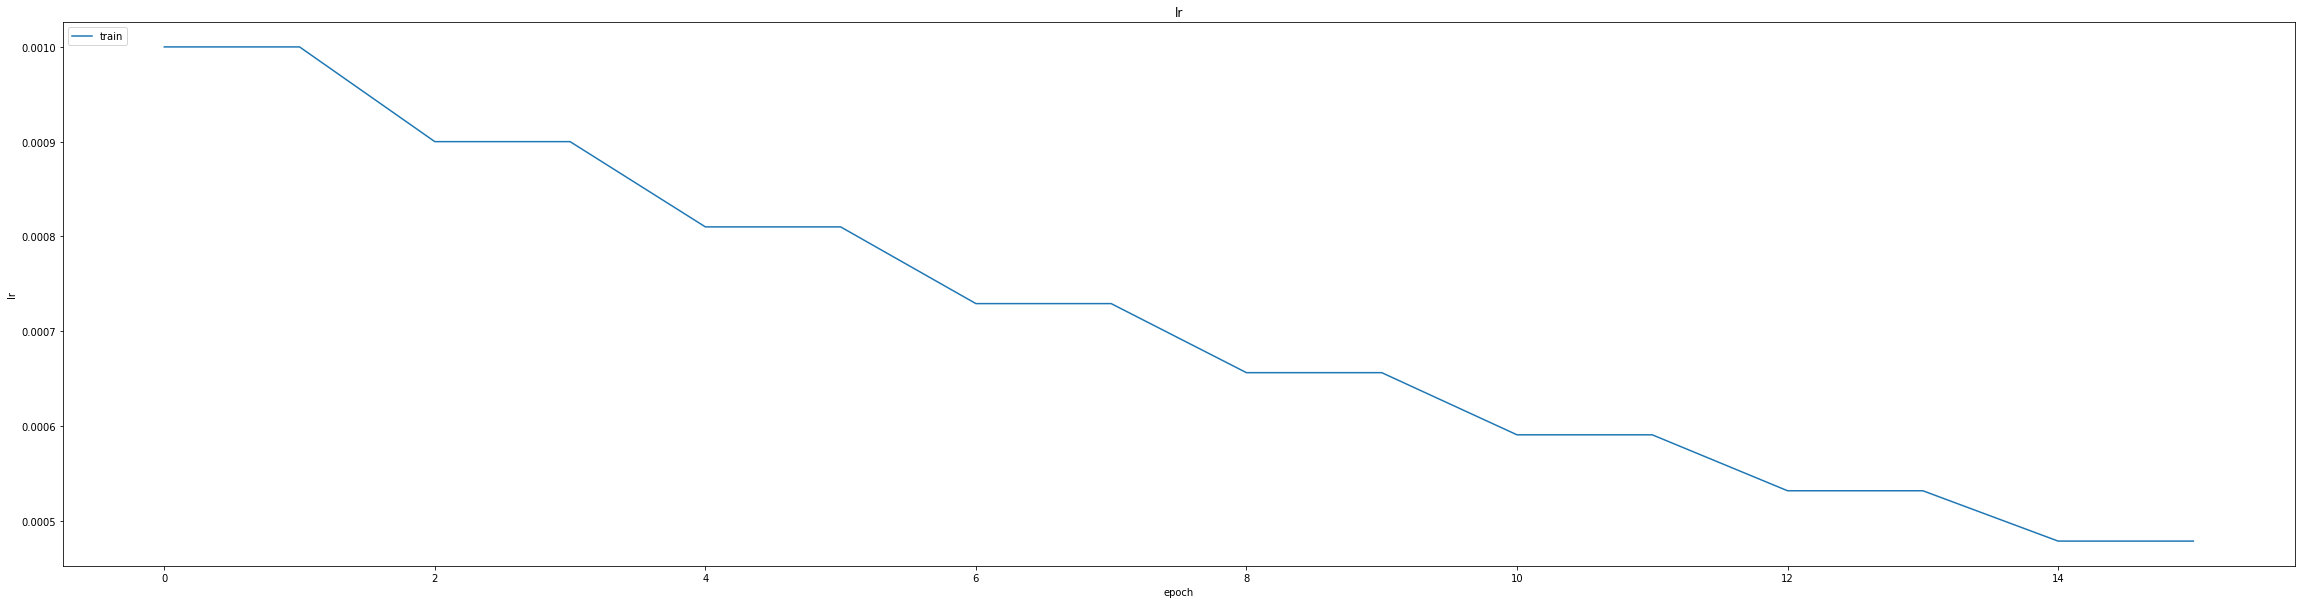

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.03144994005560875
0.03240007162094116
464/464 [==============================] - 2s 3ms/step
0.9829693885205311


464/464 [==============================] - 1s 3ms/step


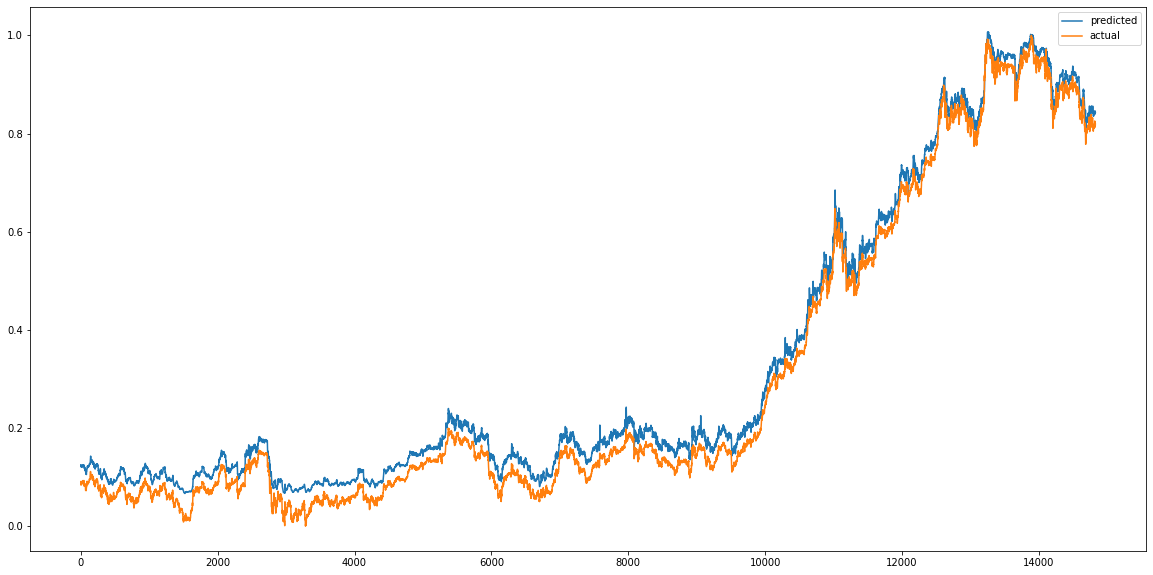

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_CNN_GRU(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


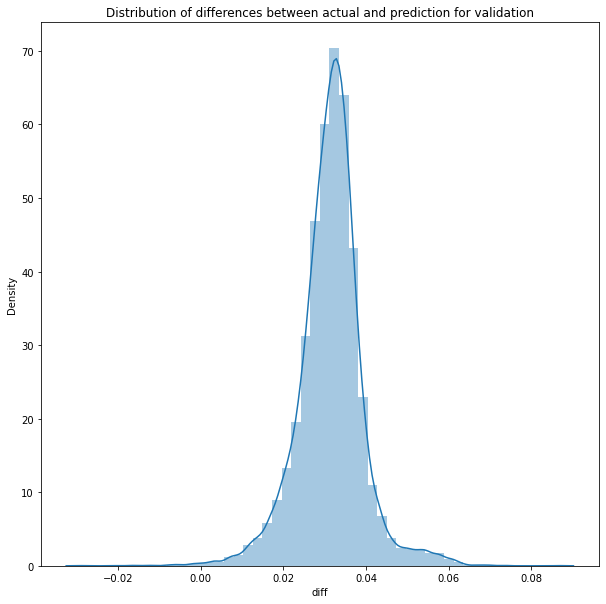

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 1s 3ms/step


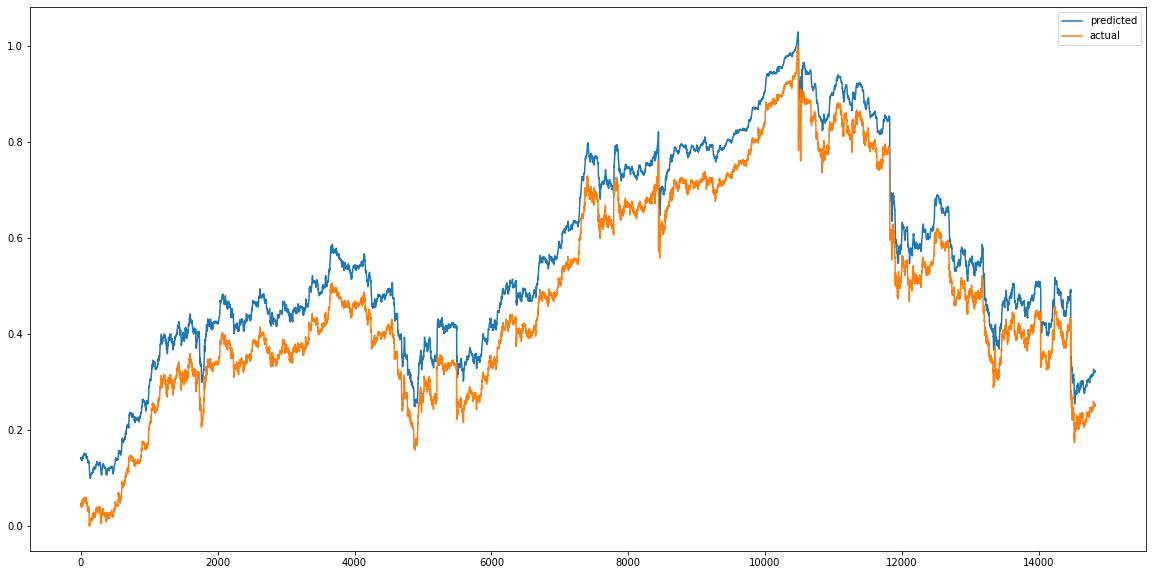

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


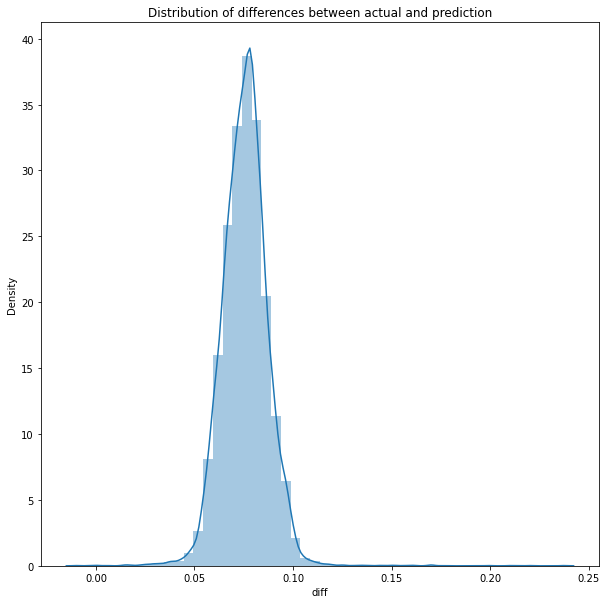

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.005858006781321685
RMSE :  0.076537616773203
MAE :  0.07565243481144626
464/464 [==============================] - 1s 3ms/step
R2_Score  : 0.8785279717415039


count    14828.000000
mean         0.075651
std          0.011619
min         -0.009919
25%          0.068432
50%          0.075863
75%          0.082497
max          0.237198
Name: diff, dtype: float64

**BiLSTM_MODEL**

In [ ]:
model= thesis.BiLSTM_Model(x_train)


In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
348/348 [==============================] - ETA: 0s - loss: 321.8795 - mae: 3.3158 - mse: 321.8795 - root_mean_squared_error: 17.9410 - mape: 23507.1484
Epoch 1: val_mse improved from inf to 0.12699, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 58s 125ms/step - loss: 321.8795 - mae: 3.3158 - mse: 321.8795 - root_mean_squared_error: 17.9410 - mape: 23507.1484 - val_loss: 0.1270 - val_mae: 0.3392 - val_mse: 0.1270 - val_root_mean_squared_error: 0.3564 - val_mape: 31801.8516
Epoch 2/75
346/348 [============================>.] - ETA: 0s - loss: 0.0371 - mae: 0.1638 - mse: 0.0371 - root_mean_squared_error: 0.1926 - mape: 11644.3008
Epoch 2: val_mse improved from 0.12699 to 0.12378, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0371 - mae: 0.1638 - mse: 0.0371 - root_mean_squared_error: 0.1926 - mape: 11581.0420 - val_loss: 0.1238 - val_mae: 0.3348 - val_mse: 0.1238 - val_root_mean_squared_error: 0.3518 - val_mape: 31188.4902
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.0370 - mae: 0.1635 - mse: 0.0370 - root_mean_squared_error: 0.1922 - mape: 10479.6162
Epoch 3: val_mse did not improve from 0.12378
348/348 [==============================] - 7s 20ms/step - loss: 0.0370 - mae: 0.1634 - mse: 0.0370 - root_mean_squared_error: 0.1922 - mape: 10422.6758 - val_loss: 0.1242 - val_mae: 0.3354 - val_mse: 0.1242 - val_root_mean_squared_error: 0.3525 - val_mape: 31331.1113
Epoch 4/75
346/348 [============================>.] - ETA: 0s - loss: 0.0368 - mae: 0.1631 - mse: 0.0368 - root_mean_squared_error: 0.1919 - mape: 10366.9619
Epoch 4: val_mse improved from 0.12378 to 0.12290, saving model to /content/drive/MyDrive/modelweigh

348/348 [==============================] - 41s 118ms/step - loss: 0.0368 - mae: 0.1630 - mse: 0.0368 - root_mean_squared_error: 0.1918 - mape: 10310.6221 - val_loss: 0.1229 - val_mae: 0.3336 - val_mse: 0.1229 - val_root_mean_squared_error: 0.3506 - val_mape: 31120.7012
Epoch 5/75
346/348 [============================>.] - ETA: 0s - loss: 0.0368 - mae: 0.1631 - mse: 0.0368 - root_mean_squared_error: 0.1917 - mape: 10371.0820
Epoch 5: val_mse did not improve from 0.12290
348/348 [==============================] - 7s 20ms/step - loss: 0.0367 - mae: 0.1630 - mse: 0.0367 - root_mean_squared_error: 0.1916 - mape: 10314.7031 - val_loss: 0.1231 - val_mae: 0.3339 - val_mse: 0.1231 - val_root_mean_squared_error: 0.3509 - val_mape: 31248.9414
Epoch 6/75
346/348 [============================>.] - ETA: 0s - loss: 0.0363 - mae: 0.1621 - mse: 0.0363 - root_mean_squared_error: 0.1905 - mape: 13051.4639
Epoch 6: val_mse improved from 0.12290 to 0.12203, saving model to /content/drive/MyDrive/modelweigh

348/348 [==============================] - 40s 115ms/step - loss: 0.0363 - mae: 0.1621 - mse: 0.0363 - root_mean_squared_error: 0.1905 - mape: 12980.4863 - val_loss: 0.1220 - val_mae: 0.3324 - val_mse: 0.1220 - val_root_mean_squared_error: 0.3493 - val_mape: 31114.8887
Epoch 7/75
347/348 [============================>.] - ETA: 0s - loss: 0.0361 - mae: 0.1616 - mse: 0.0361 - root_mean_squared_error: 0.1899 - mape: 11134.8340
Epoch 7: val_mse improved from 0.12203 to 0.12019, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0361 - mae: 0.1615 - mse: 0.0361 - root_mean_squared_error: 0.1899 - mape: 11106.1963 - val_loss: 0.1202 - val_mae: 0.3298 - val_mse: 0.1202 - val_root_mean_squared_error: 0.3467 - val_mape: 30840.4844
Epoch 8/75
345/348 [============================>.] - ETA: 0s - loss: 0.0357 - mae: 0.1607 - mse: 0.0357 - root_mean_squared_error: 0.1890 - mape: 10912.7705
Epoch 8: val_mse improved from 0.12019 to 0.11964, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0357 - mae: 0.1607 - mse: 0.0357 - root_mean_squared_error: 0.1890 - mape: 10822.2314 - val_loss: 0.1196 - val_mae: 0.3291 - val_mse: 0.1196 - val_root_mean_squared_error: 0.3459 - val_mape: 30866.5938
Epoch 9/75
348/348 [==============================] - ETA: 0s - loss: 0.0353 - mae: 0.1596 - mse: 0.0353 - root_mean_squared_error: 0.1878 - mape: 10255.2715
Epoch 9: val_mse improved from 0.11964 to 0.11708, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0353 - mae: 0.1596 - mse: 0.0353 - root_mean_squared_error: 0.1878 - mape: 10255.2715 - val_loss: 0.1171 - val_mae: 0.3254 - val_mse: 0.1171 - val_root_mean_squared_error: 0.3422 - val_mape: 30501.7715
Epoch 10/75
348/348 [==============================] - ETA: 0s - loss: 0.0348 - mae: 0.1585 - mse: 0.0348 - root_mean_squared_error: 0.1865 - mape: 11545.9648
Epoch 10: val_mse improved from 0.11708 to 0.11421, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 0.0348 - mae: 0.1585 - mse: 0.0348 - root_mean_squared_error: 0.1865 - mape: 11545.9648 - val_loss: 0.1142 - val_mae: 0.3213 - val_mse: 0.1142 - val_root_mean_squared_error: 0.3380 - val_mape: 30150.3359
Epoch 11/75
347/348 [============================>.] - ETA: 0s - loss: 0.0336 - mae: 0.1558 - mse: 0.0336 - root_mean_squared_error: 0.1834 - mape: 12377.0186
Epoch 11: val_mse improved from 0.11421 to 0.10930, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0336 - mae: 0.1557 - mse: 0.0336 - root_mean_squared_error: 0.1834 - mape: 12345.1631 - val_loss: 0.1093 - val_mae: 0.3141 - val_mse: 0.1093 - val_root_mean_squared_error: 0.3306 - val_mape: 29521.0957
Epoch 12/75
348/348 [==============================] - ETA: 0s - loss: 0.0316 - mae: 0.1504 - mse: 0.0316 - root_mean_squared_error: 0.1778 - mape: 9370.4160
Epoch 12: val_mse improved from 0.10930 to 0.10039, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0316 - mae: 0.1504 - mse: 0.0316 - root_mean_squared_error: 0.1778 - mape: 9370.4160 - val_loss: 0.1004 - val_mae: 0.3006 - val_mse: 0.1004 - val_root_mean_squared_error: 0.3169 - val_mape: 28357.5488
Epoch 13/75
348/348 [==============================] - ETA: 0s - loss: 0.0271 - mae: 0.1378 - mse: 0.0271 - root_mean_squared_error: 0.1647 - mape: 8638.8809
Epoch 13: val_mse improved from 0.10039 to 0.08156, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0271 - mae: 0.1378 - mse: 0.0271 - root_mean_squared_error: 0.1647 - mape: 8638.8809 - val_loss: 0.0816 - val_mae: 0.2698 - val_mse: 0.0816 - val_root_mean_squared_error: 0.2856 - val_mape: 26075.1641
Epoch 14/75
348/348 [==============================] - ETA: 0s - loss: 0.0170 - mae: 0.1054 - mse: 0.0170 - root_mean_squared_error: 0.1303 - mape: 7406.4897
Epoch 14: val_mse improved from 0.08156 to 0.04471, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0170 - mae: 0.1054 - mse: 0.0170 - root_mean_squared_error: 0.1303 - mape: 7406.4897 - val_loss: 0.0447 - val_mae: 0.1962 - val_mse: 0.0447 - val_root_mean_squared_error: 0.2115 - val_mape: 20692.6836
Epoch 15/75
347/348 [============================>.] - ETA: 0s - loss: 0.0082 - mae: 0.0708 - mse: 0.0082 - root_mean_squared_error: 0.0905 - mape: 7298.4731
Epoch 15: val_mse improved from 0.04471 to 0.02144, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0082 - mae: 0.0707 - mse: 0.0082 - root_mean_squared_error: 0.0904 - mape: 7279.6621 - val_loss: 0.0214 - val_mae: 0.1331 - val_mse: 0.0214 - val_root_mean_squared_error: 0.1464 - val_mape: 15885.6074
Epoch 16/75
348/348 [==============================] - ETA: 0s - loss: 0.0058 - mae: 0.0593 - mse: 0.0058 - root_mean_squared_error: 0.0762 - mape: 7437.6211
Epoch 16: val_mse improved from 0.02144 to 0.01540, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 118ms/step - loss: 0.0058 - mae: 0.0593 - mse: 0.0058 - root_mean_squared_error: 0.0762 - mape: 7437.6211 - val_loss: 0.0154 - val_mae: 0.1131 - val_mse: 0.0154 - val_root_mean_squared_error: 0.1241 - val_mape: 13938.1729
Epoch 17/75
347/348 [============================>.] - ETA: 0s - loss: 0.0048 - mae: 0.0541 - mse: 0.0048 - root_mean_squared_error: 0.0696 - mape: 5533.2881
Epoch 17: val_mse improved from 0.01540 to 0.01201, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0048 - mae: 0.0541 - mse: 0.0048 - root_mean_squared_error: 0.0696 - mape: 5519.0352 - val_loss: 0.0120 - val_mae: 0.0995 - val_mse: 0.0120 - val_root_mean_squared_error: 0.1096 - val_mape: 13209.7500
Epoch 18/75
346/348 [============================>.] - ETA: 0s - loss: 0.0043 - mae: 0.0509 - mse: 0.0043 - root_mean_squared_error: 0.0658 - mape: 3851.9775
Epoch 18: val_mse improved from 0.01201 to 0.01076, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0043 - mae: 0.0509 - mse: 0.0043 - root_mean_squared_error: 0.0658 - mape: 3831.0366 - val_loss: 0.0108 - val_mae: 0.0941 - val_mse: 0.0108 - val_root_mean_squared_error: 0.1037 - val_mape: 12345.9971
Epoch 19/75
348/348 [==============================] - ETA: 0s - loss: 0.0039 - mae: 0.0482 - mse: 0.0039 - root_mean_squared_error: 0.0622 - mape: 5617.3315
Epoch 19: val_mse improved from 0.01076 to 0.01011, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0039 - mae: 0.0482 - mse: 0.0039 - root_mean_squared_error: 0.0622 - mape: 5617.3315 - val_loss: 0.0101 - val_mae: 0.0908 - val_mse: 0.0101 - val_root_mean_squared_error: 0.1006 - val_mape: 11708.4004
Epoch 20/75
347/348 [============================>.] - ETA: 0s - loss: 0.0034 - mae: 0.0453 - mse: 0.0034 - root_mean_squared_error: 0.0584 - mape: 4133.5117
Epoch 20: val_mse improved from 0.01011 to 0.00791, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 41s 119ms/step - loss: 0.0034 - mae: 0.0453 - mse: 0.0034 - root_mean_squared_error: 0.0584 - mape: 4122.8618 - val_loss: 0.0079 - val_mae: 0.0798 - val_mse: 0.0079 - val_root_mean_squared_error: 0.0889 - val_mape: 11266.2832
Epoch 21/75
346/348 [============================>.] - ETA: 0s - loss: 0.0031 - mae: 0.0429 - mse: 0.0031 - root_mean_squared_error: 0.0553 - mape: 6250.3770
Epoch 21: val_mse improved from 0.00791 to 0.00667, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0031 - mae: 0.0429 - mse: 0.0031 - root_mean_squared_error: 0.0553 - mape: 6216.3301 - val_loss: 0.0067 - val_mae: 0.0718 - val_mse: 0.0067 - val_root_mean_squared_error: 0.0817 - val_mape: 11013.6436
Epoch 22/75
346/348 [============================>.] - ETA: 0s - loss: 0.0028 - mae: 0.0408 - mse: 0.0028 - root_mean_squared_error: 0.0525 - mape: 4286.0581
Epoch 22: val_mse improved from 0.00667 to 0.00607, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0028 - mae: 0.0408 - mse: 0.0028 - root_mean_squared_error: 0.0525 - mape: 4262.7212 - val_loss: 0.0061 - val_mae: 0.0691 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0779 - val_mape: 10456.0566
Epoch 23/75
347/348 [============================>.] - ETA: 0s - loss: 0.0024 - mae: 0.0381 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 5916.0386
Epoch 23: val_mse improved from 0.00607 to 0.00518, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0024 - mae: 0.0382 - mse: 0.0024 - root_mean_squared_error: 0.0493 - mape: 5900.7866 - val_loss: 0.0052 - val_mae: 0.0628 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0720 - val_mape: 10357.0059
Epoch 24/75
348/348 [==============================] - ETA: 0s - loss: 0.0022 - mae: 0.0362 - mse: 0.0022 - root_mean_squared_error: 0.0466 - mape: 3469.8906
Epoch 24: val_mse did not improve from 0.00518
348/348 [==============================] - 7s 20ms/step - loss: 0.0022 - mae: 0.0362 - mse: 0.0022 - root_mean_squared_error: 0.0466 - mape: 3469.8906 - val_loss: 0.0052 - val_mae: 0.0629 - val_mse: 0.0052 - val_root_mean_squared_error: 0.0721 - val_mape: 10071.2021
Epoch 25/75
346/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - root_mean_squared_error: 0.0433 - mape: 4731.3789
Epoch 25: val_mse improved from 0.00518 to 0.00402, saving model to /content/drive/MyDrive/modelweigh

348/348 [==============================] - 39s 113ms/step - loss: 0.0019 - mae: 0.0337 - mse: 0.0019 - root_mean_squared_error: 0.0433 - mape: 4705.6016 - val_loss: 0.0040 - val_mae: 0.0543 - val_mse: 0.0040 - val_root_mean_squared_error: 0.0634 - val_mape: 9934.0645
Epoch 26/75
346/348 [============================>.] - ETA: 0s - loss: 0.0017 - mae: 0.0320 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 5574.9487
Epoch 26: val_mse improved from 0.00402 to 0.00348, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 115ms/step - loss: 0.0017 - mae: 0.0320 - mse: 0.0017 - root_mean_squared_error: 0.0412 - mape: 5544.6011 - val_loss: 0.0035 - val_mae: 0.0489 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0590 - val_mape: 9747.9473
Epoch 27/75
348/348 [==============================] - ETA: 0s - loss: 0.0015 - mae: 0.0304 - mse: 0.0015 - root_mean_squared_error: 0.0390 - mape: 3525.0215
Epoch 27: val_mse improved from 0.00348 to 0.00333, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 114ms/step - loss: 0.0015 - mae: 0.0304 - mse: 0.0015 - root_mean_squared_error: 0.0390 - mape: 3525.0215 - val_loss: 0.0033 - val_mae: 0.0477 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0577 - val_mape: 9536.8848
Epoch 28/75
346/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0288 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 4254.6367
Epoch 28: val_mse improved from 0.00333 to 0.00282, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 0.0014 - mae: 0.0288 - mse: 0.0014 - root_mean_squared_error: 0.0370 - mape: 4231.4531 - val_loss: 0.0028 - val_mae: 0.0427 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0531 - val_mape: 9289.9658
Epoch 29/75
346/348 [============================>.] - ETA: 0s - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 3558.5046
Epoch 29: val_mse improved from 0.00282 to 0.00250, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 0.0013 - mae: 0.0275 - mse: 0.0013 - root_mean_squared_error: 0.0354 - mape: 3539.1213 - val_loss: 0.0025 - val_mae: 0.0393 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0500 - val_mape: 9230.9727
Epoch 30/75
347/348 [============================>.] - ETA: 0s - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 3601.4880
Epoch 30: val_mse did not improve from 0.00250
348/348 [==============================] - 7s 21ms/step - loss: 0.0011 - mae: 0.0259 - mse: 0.0011 - root_mean_squared_error: 0.0332 - mape: 3592.2039 - val_loss: 0.0025 - val_mae: 0.0407 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 9170.8877
Epoch 31/75
346/348 [============================>.] - ETA: 0s - loss: 9.4314e-04 - mae: 0.0239 - mse: 9.4314e-04 - root_mean_squared_error: 0.0307 - mape: 3428.1416
Epoch 31: val_mse improved from 0.00250 to 0.00235, saving model to /content/drive/MyDrive/mode

348/348 [==============================] - 40s 116ms/step - loss: 9.4278e-04 - mae: 0.0239 - mse: 9.4278e-04 - root_mean_squared_error: 0.0307 - mape: 3409.4639 - val_loss: 0.0024 - val_mae: 0.0381 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0485 - val_mape: 8914.4268
Epoch 32/75
346/348 [============================>.] - ETA: 0s - loss: 8.9973e-04 - mae: 0.0233 - mse: 8.9973e-04 - root_mean_squared_error: 0.0300 - mape: 3260.7522
Epoch 32: val_mse improved from 0.00235 to 0.00224, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 114ms/step - loss: 8.9963e-04 - mae: 0.0233 - mse: 8.9963e-04 - root_mean_squared_error: 0.0300 - mape: 3242.9880 - val_loss: 0.0022 - val_mae: 0.0370 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0474 - val_mape: 8947.7012
Epoch 33/75
348/348 [==============================] - ETA: 0s - loss: 7.7574e-04 - mae: 0.0216 - mse: 7.7574e-04 - root_mean_squared_error: 0.0279 - mape: 3091.4246
Epoch 33: val_mse improved from 0.00224 to 0.00221, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 7.7574e-04 - mae: 0.0216 - mse: 7.7574e-04 - root_mean_squared_error: 0.0279 - mape: 3091.4246 - val_loss: 0.0022 - val_mae: 0.0371 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0470 - val_mape: 8823.3184
Epoch 34/75
346/348 [============================>.] - ETA: 0s - loss: 6.7518e-04 - mae: 0.0202 - mse: 6.7518e-04 - root_mean_squared_error: 0.0260 - mape: 3134.9031
Epoch 34: val_mse improved from 0.00221 to 0.00190, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 6.7582e-04 - mae: 0.0202 - mse: 6.7582e-04 - root_mean_squared_error: 0.0260 - mape: 3117.8267 - val_loss: 0.0019 - val_mae: 0.0327 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0436 - val_mape: 8686.5312
Epoch 35/75
346/348 [============================>.] - ETA: 0s - loss: 6.1062e-04 - mae: 0.0191 - mse: 6.1062e-04 - root_mean_squared_error: 0.0247 - mape: 3298.3059
Epoch 35: val_mse did not improve from 0.00190
348/348 [==============================] - 7s 21ms/step - loss: 6.1092e-04 - mae: 0.0191 - mse: 6.1092e-04 - root_mean_squared_error: 0.0247 - mape: 3280.3315 - val_loss: 0.0019 - val_mae: 0.0343 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0438 - val_mape: 8424.0039
Epoch 36/75
346/348 [============================>.] - ETA: 0s - loss: 5.4826e-04 - mae: 0.0181 - mse: 5.4826e-04 - root_mean_squared_error: 0.0234 - mape: 2772.0750
Epoch 36: val_mse improved from 0.00190 to 0.00176, saving model to /co

348/348 [==============================] - 39s 113ms/step - loss: 5.4788e-04 - mae: 0.0181 - mse: 5.4788e-04 - root_mean_squared_error: 0.0234 - mape: 2756.9719 - val_loss: 0.0018 - val_mae: 0.0329 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0420 - val_mape: 8287.1055
Epoch 37/75
347/348 [============================>.] - ETA: 0s - loss: 4.6888e-04 - mae: 0.0167 - mse: 4.6888e-04 - root_mean_squared_error: 0.0217 - mape: 3309.2832
Epoch 37: val_mse improved from 0.00176 to 0.00164, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 40s 116ms/step - loss: 4.6876e-04 - mae: 0.0167 - mse: 4.6876e-04 - root_mean_squared_error: 0.0217 - mape: 3300.7471 - val_loss: 0.0016 - val_mae: 0.0315 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0405 - val_mape: 8127.2939
Epoch 38/75
348/348 [==============================] - ETA: 0s - loss: 4.4079e-04 - mae: 0.0162 - mse: 4.4079e-04 - root_mean_squared_error: 0.0210 - mape: 3228.7046
Epoch 38: val_mse did not improve from 0.00164
348/348 [==============================] - 7s 20ms/step - loss: 4.4079e-04 - mae: 0.0162 - mse: 4.4079e-04 - root_mean_squared_error: 0.0210 - mape: 3228.7046 - val_loss: 0.0017 - val_mae: 0.0317 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0407 - val_mape: 7872.3018
Epoch 39/75
346/348 [============================>.] - ETA: 0s - loss: 4.0603e-04 - mae: 0.0155 - mse: 4.0603e-04 - root_mean_squared_error: 0.0202 - mape: 3070.3472
Epoch 39: val_mse improved from 0.00164 to 0.00136, saving model to /co

348/348 [==============================] - 39s 112ms/step - loss: 4.0535e-04 - mae: 0.0155 - mse: 4.0535e-04 - root_mean_squared_error: 0.0201 - mape: 3053.6125 - val_loss: 0.0014 - val_mae: 0.0274 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0368 - val_mape: 7816.3203
Epoch 40/75
346/348 [============================>.] - ETA: 0s - loss: 3.6008e-04 - mae: 0.0146 - mse: 3.6008e-04 - root_mean_squared_error: 0.0190 - mape: 2587.4058
Epoch 40: val_mse improved from 0.00136 to 0.00125, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 3.5962e-04 - mae: 0.0146 - mse: 3.5962e-04 - root_mean_squared_error: 0.0190 - mape: 2573.3052 - val_loss: 0.0012 - val_mae: 0.0262 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0353 - val_mape: 7532.4102
Epoch 41/75
346/348 [============================>.] - ETA: 0s - loss: 3.2241e-04 - mae: 0.0138 - mse: 3.2241e-04 - root_mean_squared_error: 0.0180 - mape: 2741.8596
Epoch 41: val_mse did not improve from 0.00125
348/348 [==============================] - 7s 21ms/step - loss: 3.2240e-04 - mae: 0.0138 - mse: 3.2240e-04 - root_mean_squared_error: 0.0180 - mape: 2726.9180 - val_loss: 0.0013 - val_mae: 0.0283 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0363 - val_mape: 7405.2915
Epoch 42/75
348/348 [==============================] - ETA: 0s - loss: 3.0452e-04 - mae: 0.0133 - mse: 3.0452e-04 - root_mean_squared_error: 0.0175 - mape: 3002.4678
Epoch 42: val_mse improved from 0.00125 to 0.00108, saving model to /co

348/348 [==============================] - 39s 112ms/step - loss: 3.0452e-04 - mae: 0.0133 - mse: 3.0452e-04 - root_mean_squared_error: 0.0175 - mape: 3002.4678 - val_loss: 0.0011 - val_mae: 0.0251 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 7236.2866
Epoch 43/75
348/348 [==============================] - ETA: 0s - loss: 2.9512e-04 - mae: 0.0132 - mse: 2.9512e-04 - root_mean_squared_error: 0.0172 - mape: 2488.1091
Epoch 43: val_mse did not improve from 0.00108
348/348 [==============================] - 7s 20ms/step - loss: 2.9512e-04 - mae: 0.0132 - mse: 2.9512e-04 - root_mean_squared_error: 0.0172 - mape: 2488.1091 - val_loss: 0.0011 - val_mae: 0.0254 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0335 - val_mape: 7208.4204
Epoch 44/75
348/348 [==============================] - ETA: 0s - loss: 2.5310e-04 - mae: 0.0121 - mse: 2.5310e-04 - root_mean_squared_error: 0.0159 - mape: 2805.1194
Epoch 44: val_mse improved from 0.00108 to 0.00103, saving model to /co

348/348 [==============================] - 40s 115ms/step - loss: 2.5310e-04 - mae: 0.0121 - mse: 2.5310e-04 - root_mean_squared_error: 0.0159 - mape: 2805.1194 - val_loss: 0.0010 - val_mae: 0.0252 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 7131.6157
Epoch 45/75
346/348 [============================>.] - ETA: 0s - loss: 2.3746e-04 - mae: 0.0118 - mse: 2.3746e-04 - root_mean_squared_error: 0.0154 - mape: 2718.7732
Epoch 45: val_mse improved from 0.00103 to 0.00097, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 2.3723e-04 - mae: 0.0118 - mse: 2.3723e-04 - root_mean_squared_error: 0.0154 - mape: 2703.9534 - val_loss: 9.6521e-04 - val_mae: 0.0238 - val_mse: 9.6521e-04 - val_root_mean_squared_error: 0.0311 - val_mape: 6989.4014
Epoch 46/75
348/348 [==============================] - ETA: 0s - loss: 2.0391e-04 - mae: 0.0109 - mse: 2.0391e-04 - root_mean_squared_error: 0.0143 - mape: 2261.4304
Epoch 46: val_mse improved from 0.00097 to 0.00087, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 2.0391e-04 - mae: 0.0109 - mse: 2.0391e-04 - root_mean_squared_error: 0.0143 - mape: 2261.4304 - val_loss: 8.6747e-04 - val_mae: 0.0234 - val_mse: 8.6747e-04 - val_root_mean_squared_error: 0.0295 - val_mape: 6712.7744
Epoch 47/75
348/348 [==============================] - ETA: 0s - loss: 1.9130e-04 - mae: 0.0105 - mse: 1.9130e-04 - root_mean_squared_error: 0.0138 - mape: 2547.3853
Epoch 47: val_mse improved from 0.00087 to 0.00077, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 114ms/step - loss: 1.9130e-04 - mae: 0.0105 - mse: 1.9130e-04 - root_mean_squared_error: 0.0138 - mape: 2547.3853 - val_loss: 7.7498e-04 - val_mae: 0.0213 - val_mse: 7.7498e-04 - val_root_mean_squared_error: 0.0278 - val_mape: 6627.2490
Epoch 48/75
346/348 [============================>.] - ETA: 0s - loss: 1.8971e-04 - mae: 0.0105 - mse: 1.8971e-04 - root_mean_squared_error: 0.0138 - mape: 2278.0269
Epoch 48: val_mse did not improve from 0.00077
348/348 [==============================] - 7s 21ms/step - loss: 1.8953e-04 - mae: 0.0105 - mse: 1.8953e-04 - root_mean_squared_error: 0.0138 - mape: 2265.6094 - val_loss: 9.0325e-04 - val_mae: 0.0241 - val_mse: 9.0325e-04 - val_root_mean_squared_error: 0.0301 - val_mape: 6627.0225
Epoch 49/75
348/348 [==============================] - ETA: 0s - loss: 1.7021e-04 - mae: 0.0099 - mse: 1.7021e-04 - root_mean_squared_error: 0.0130 - mape: 2773.3811
Epoch 49: val_mse improved from 0.00077 to 0.00059, sav

348/348 [==============================] - 39s 113ms/step - loss: 1.7021e-04 - mae: 0.0099 - mse: 1.7021e-04 - root_mean_squared_error: 0.0130 - mape: 2773.3811 - val_loss: 5.9345e-04 - val_mae: 0.0175 - val_mse: 5.9345e-04 - val_root_mean_squared_error: 0.0244 - val_mape: 6274.7183
Epoch 50/75
348/348 [==============================] - ETA: 0s - loss: 1.5381e-04 - mae: 0.0094 - mse: 1.5381e-04 - root_mean_squared_error: 0.0124 - mape: 2609.6748
Epoch 50: val_mse did not improve from 0.00059
348/348 [==============================] - 8s 22ms/step - loss: 1.5381e-04 - mae: 0.0094 - mse: 1.5381e-04 - root_mean_squared_error: 0.0124 - mape: 2609.6748 - val_loss: 6.6274e-04 - val_mae: 0.0212 - val_mse: 6.6274e-04 - val_root_mean_squared_error: 0.0257 - val_mape: 6171.4360
Epoch 51/75
346/348 [============================>.] - ETA: 0s - loss: 1.5016e-04 - mae: 0.0094 - mse: 1.5016e-04 - root_mean_squared_error: 0.0123 - mape: 2.4394
Epoch 51: val_mse improved from 0.00059 to 0.00057, saving

348/348 [==============================] - 39s 113ms/step - loss: 1.5041e-04 - mae: 0.0094 - mse: 1.5041e-04 - root_mean_squared_error: 0.0123 - mape: 2313.0022 - val_loss: 5.7073e-04 - val_mae: 0.0186 - val_mse: 5.7073e-04 - val_root_mean_squared_error: 0.0239 - val_mape: 6094.4731
Epoch 52/75
346/348 [============================>.] - ETA: 0s - loss: 1.4457e-04 - mae: 0.0091 - mse: 1.4457e-04 - root_mean_squared_error: 0.0120 - mape: 2484.0959
Epoch 52: val_mse improved from 0.00057 to 0.00054, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 1.4450e-04 - mae: 0.0091 - mse: 1.4450e-04 - root_mean_squared_error: 0.0120 - mape: 2470.5530 - val_loss: 5.3729e-04 - val_mae: 0.0175 - val_mse: 5.3729e-04 - val_root_mean_squared_error: 0.0232 - val_mape: 5972.8472
Epoch 53/75
347/348 [============================>.] - ETA: 0s - loss: 1.2960e-04 - mae: 0.0086 - mse: 1.2960e-04 - root_mean_squared_error: 0.0114 - mape: 2088.5369
Epoch 53: val_mse improved from 0.00054 to 0.00050, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 112ms/step - loss: 1.2954e-04 - mae: 0.0086 - mse: 1.2954e-04 - root_mean_squared_error: 0.0114 - mape: 2083.1487 - val_loss: 4.9556e-04 - val_mae: 0.0167 - val_mse: 4.9556e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 5928.3105
Epoch 54/75
346/348 [============================>.] - ETA: 0s - loss: 1.3143e-04 - mae: 0.0087 - mse: 1.3143e-04 - root_mean_squared_error: 0.0115 - mape: 3124.3794
Epoch 54: val_mse did not improve from 0.00050
348/348 [==============================] - 7s 20ms/step - loss: 1.3157e-04 - mae: 0.0087 - mse: 1.3157e-04 - root_mean_squared_error: 0.0115 - mape: 3107.3455 - val_loss: 5.3377e-04 - val_mae: 0.0176 - val_mse: 5.3377e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 5906.8677
Epoch 55/75
348/348 [==============================] - ETA: 0s - loss: 1.2271e-04 - mae: 0.0084 - mse: 1.2271e-04 - root_mean_squared_error: 0.0111 - mape: 2122.3188
Epoch 55: val_mse did not improve from 0.00050
348/348 

348/348 [==============================] - 40s 115ms/step - loss: 1.0810e-04 - mae: 0.0078 - mse: 1.0810e-04 - root_mean_squared_error: 0.0104 - mape: 2175.7441 - val_loss: 4.2556e-04 - val_mae: 0.0169 - val_mse: 4.2556e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 5469.8096
Epoch 60/75
347/348 [============================>.] - ETA: 0s - loss: 1.1032e-04 - mae: 0.0079 - mse: 1.1032e-04 - root_mean_squared_error: 0.0105 - mape: 2001.8235
Epoch 60: val_mse improved from 0.00043 to 0.00041, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)


348/348 [==============================] - 39s 113ms/step - loss: 1.1015e-04 - mae: 0.0079 - mse: 1.1015e-04 - root_mean_squared_error: 0.0105 - mape: 1996.6572 - val_loss: 4.0856e-04 - val_mae: 0.0165 - val_mse: 4.0856e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 5383.3799
Epoch 61/75
346/348 [============================>.] - ETA: 0s - loss: 8.9711e-05 - mae: 0.0072 - mse: 8.9711e-05 - root_mean_squared_error: 0.0095 - mape: 1907.2119
Epoch 61: val_mse did not improve from 0.00041
348/348 [==============================] - 7s 21ms/step - loss: 8.9467e-05 - mae: 0.0072 - mse: 8.9467e-05 - root_mean_squared_error: 0.0095 - mape: 1896.8120 - val_loss: 4.4021e-04 - val_mae: 0.0178 - val_mse: 4.4021e-04 - val_root_mean_squared_error: 0.0210 - val_mape: 5282.6201
Epoch 62/75
348/348 [==============================] - ETA: 0s - loss: 9.1925e-05 - mae: 0.0073 - mse: 9.1925e-05 - root_mean_squared_error: 0.0096 - mape: 1948.3855
Epoch 62: val_mse did not improve from 0.00041
348/348 

348/348 [==============================] - 39s 113ms/step - loss: 7.2836e-05 - mae: 0.0065 - mse: 7.2836e-05 - root_mean_squared_error: 0.0085 - mape: 1658.5972 - val_loss: 2.7729e-04 - val_mae: 0.0136 - val_mse: 2.7729e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 4696.6753
Epoch 65/75
348/348 [==============================] - ETA: 0s - loss: 7.0550e-05 - mae: 0.0064 - mse: 7.0550e-05 - root_mean_squared_error: 0.0084 - mape: 1749.3298
Epoch 65: val_mse did not improve from 0.00028
348/348 [==============================] - 7s 20ms/step - loss: 7.0550e-05 - mae: 0.0064 - mse: 7.0550e-05 - root_mean_squared_error: 0.0084 - mape: 1749.3298 - val_loss: 3.5198e-04 - val_mae: 0.0165 - val_mse: 3.5198e-04 - val_root_mean_squared_error: 0.0188 - val_mape: 4693.6367
Epoch 66/75
346/348 [============================>.] - ETA: 0s - loss: 8.1946e-05 - mae: 0.0069 - mse: 8.1946e-05 - root_mean_squared_error: 0.0091 - mape: 1725.2158
Epoch 66: val_mse did not improve from 0.00028
348/348 

348/348 [==============================] - 40s 114ms/step - loss: 6.3602e-05 - mae: 0.0061 - mse: 6.3602e-05 - root_mean_squared_error: 0.0080 - mape: 1590.8068 - val_loss: 2.6292e-04 - val_mae: 0.0138 - val_mse: 2.6292e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 4440.7412
Epoch 72/75
348/348 [==============================] - ETA: 0s - loss: 5.8387e-05 - mae: 0.0058 - mse: 5.8387e-05 - root_mean_squared_error: 0.0076 - mape: 1714.9055
Epoch 72: val_mse did not improve from 0.00026
348/348 [==============================] - 7s 21ms/step - loss: 5.8387e-05 - mae: 0.0058 - mse: 5.8387e-05 - root_mean_squared_error: 0.0076 - mape: 1714.9055 - val_loss: 9.2434e-04 - val_mae: 0.0297 - val_mse: 9.2434e-04 - val_root_mean_squared_error: 0.0304 - val_mape: 4616.4941
Epoch 73/75
347/348 [============================>.] - ETA: 0s - loss: 5.5548e-05 - mae: 0.0057 - mse: 5.5548e-05 - root_mean_squared_error: 0.0075 - mape: 1847.0186
Epoch 73: val_mse did not improve from 0.00026
348/348 

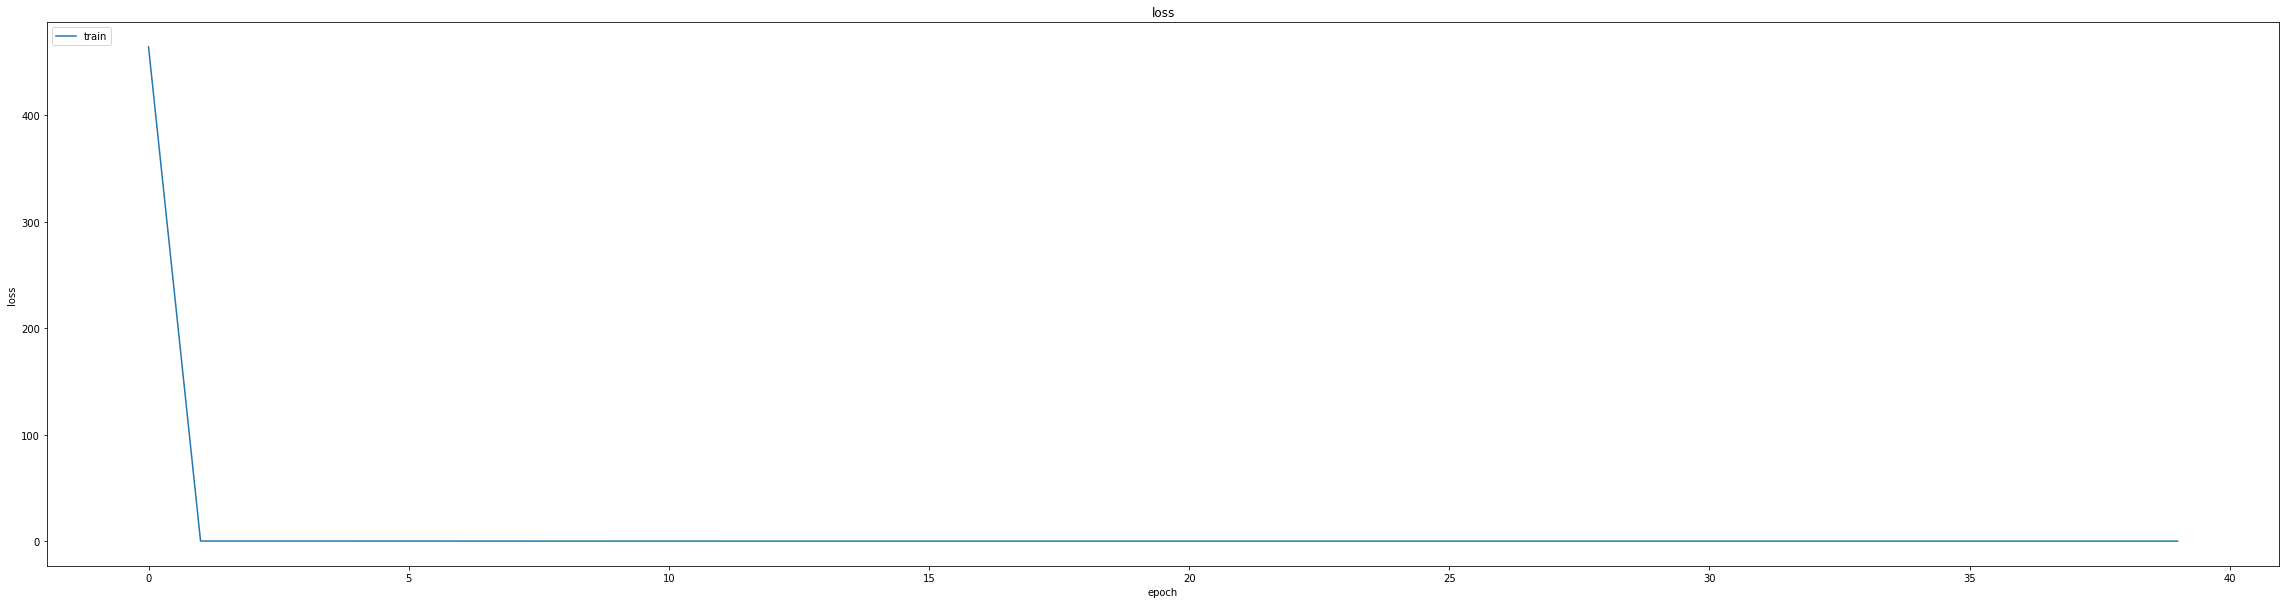

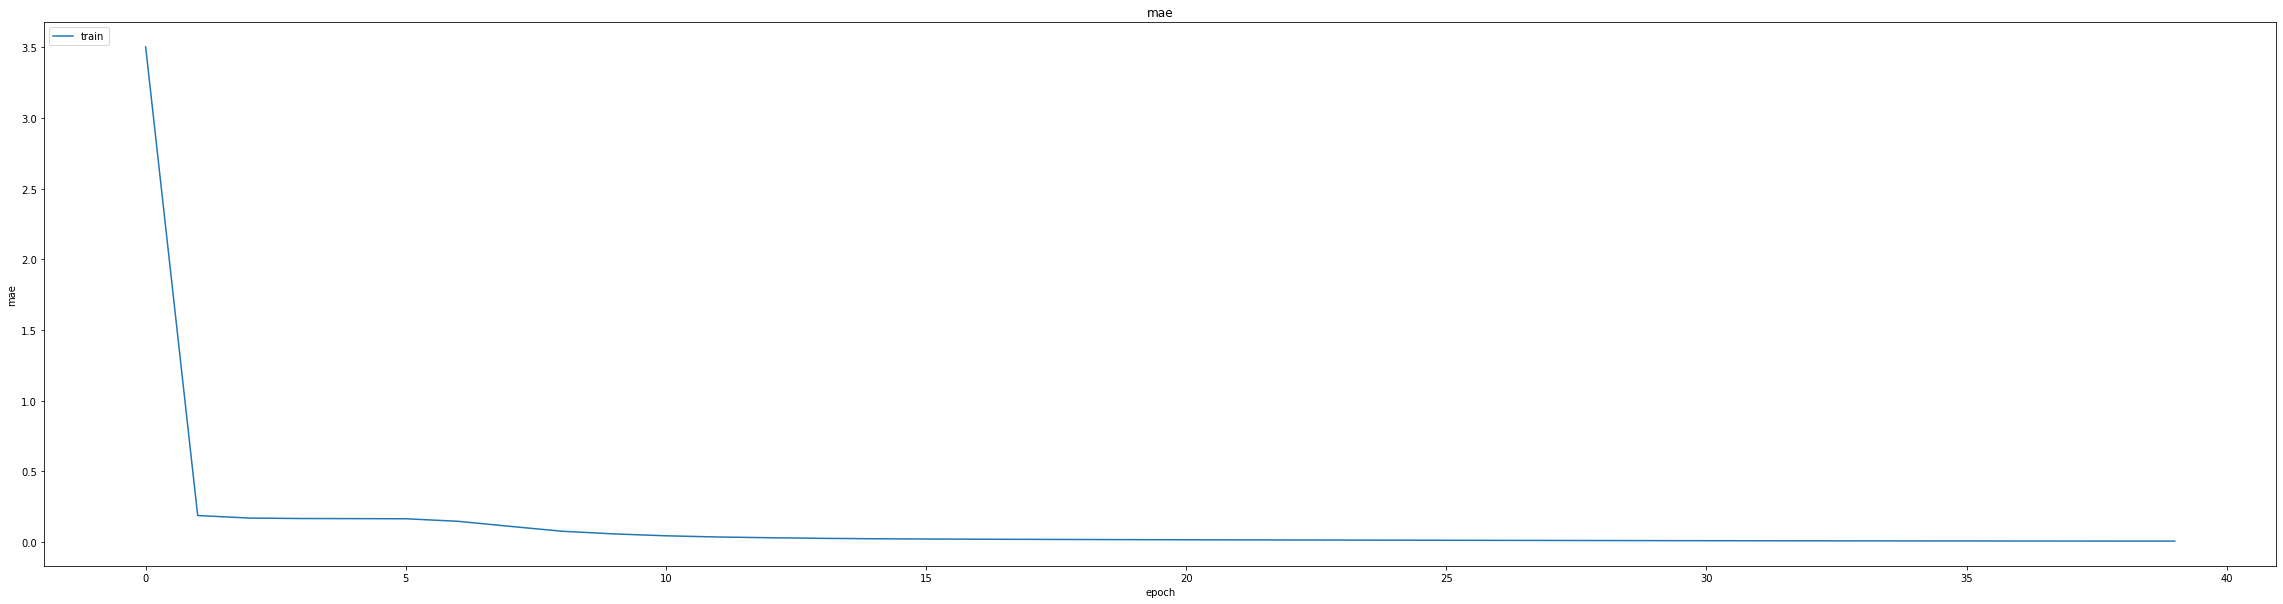

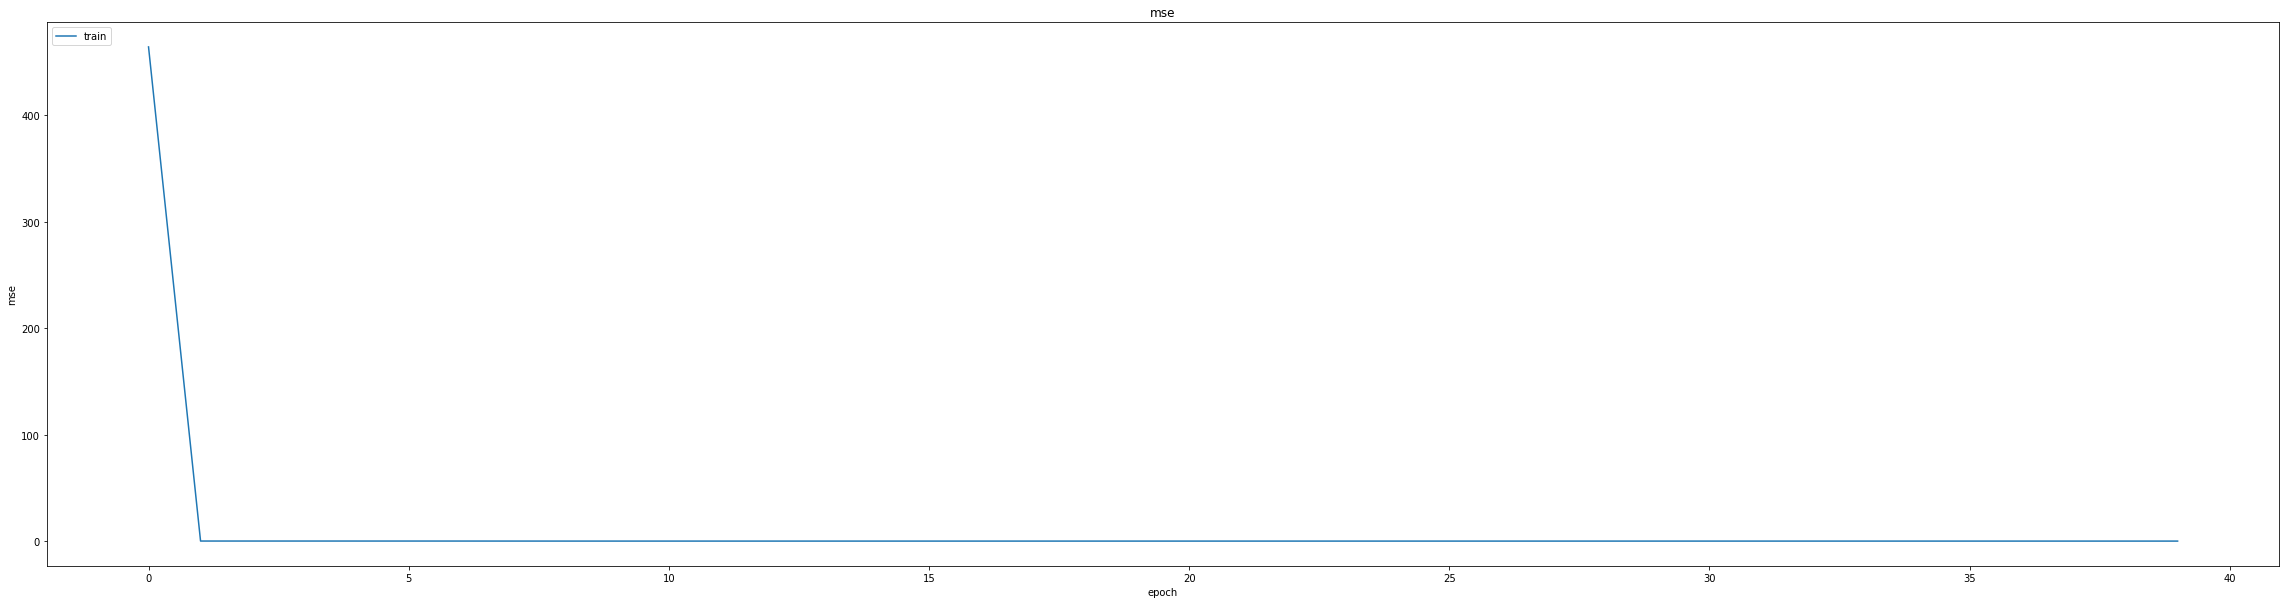

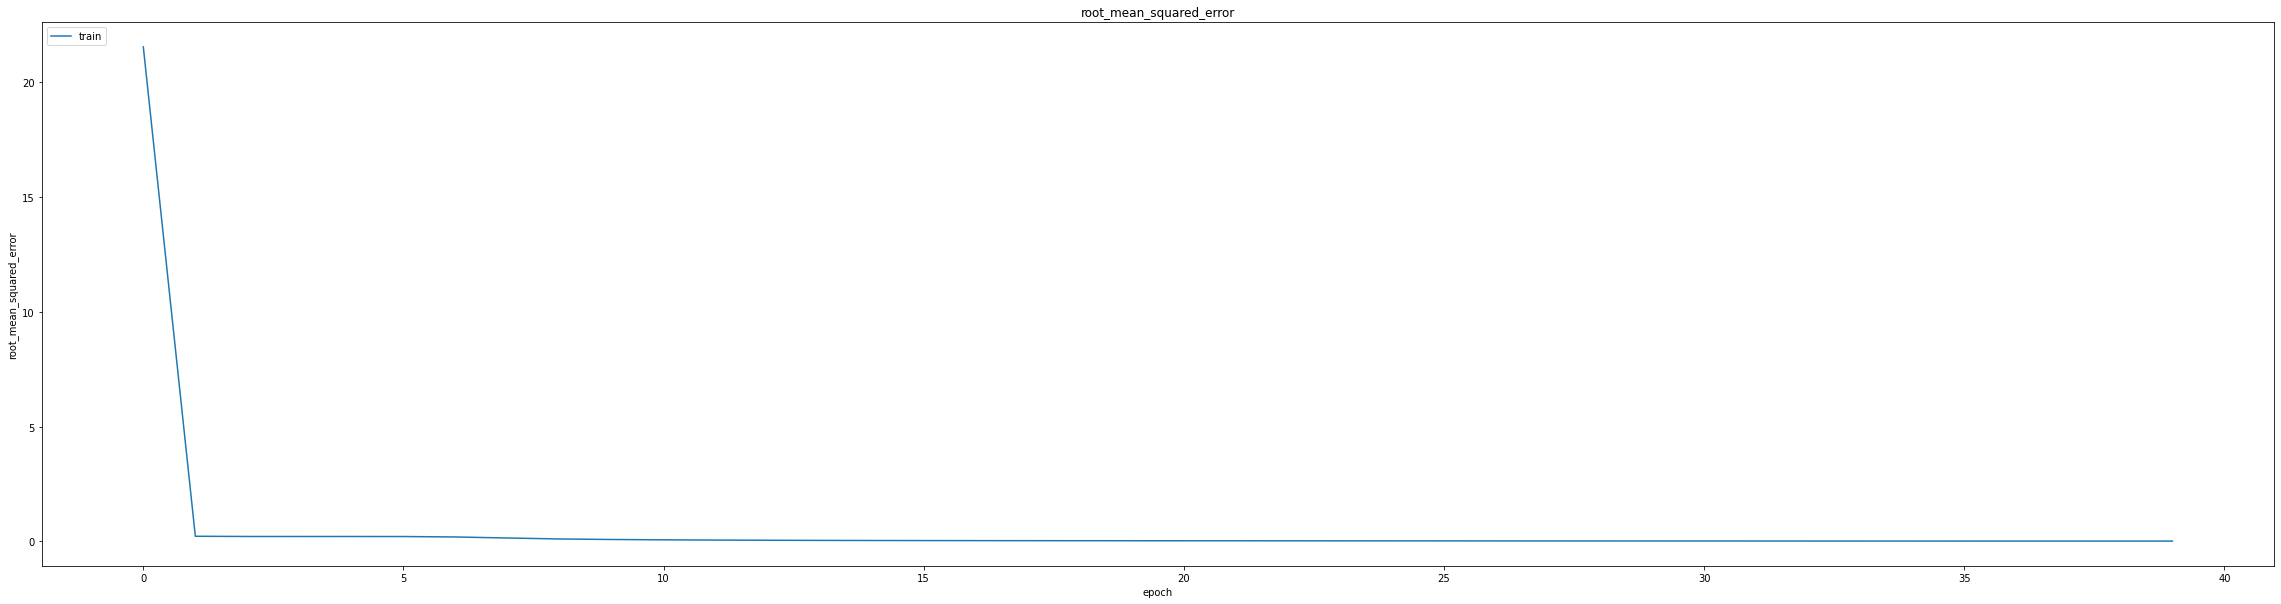

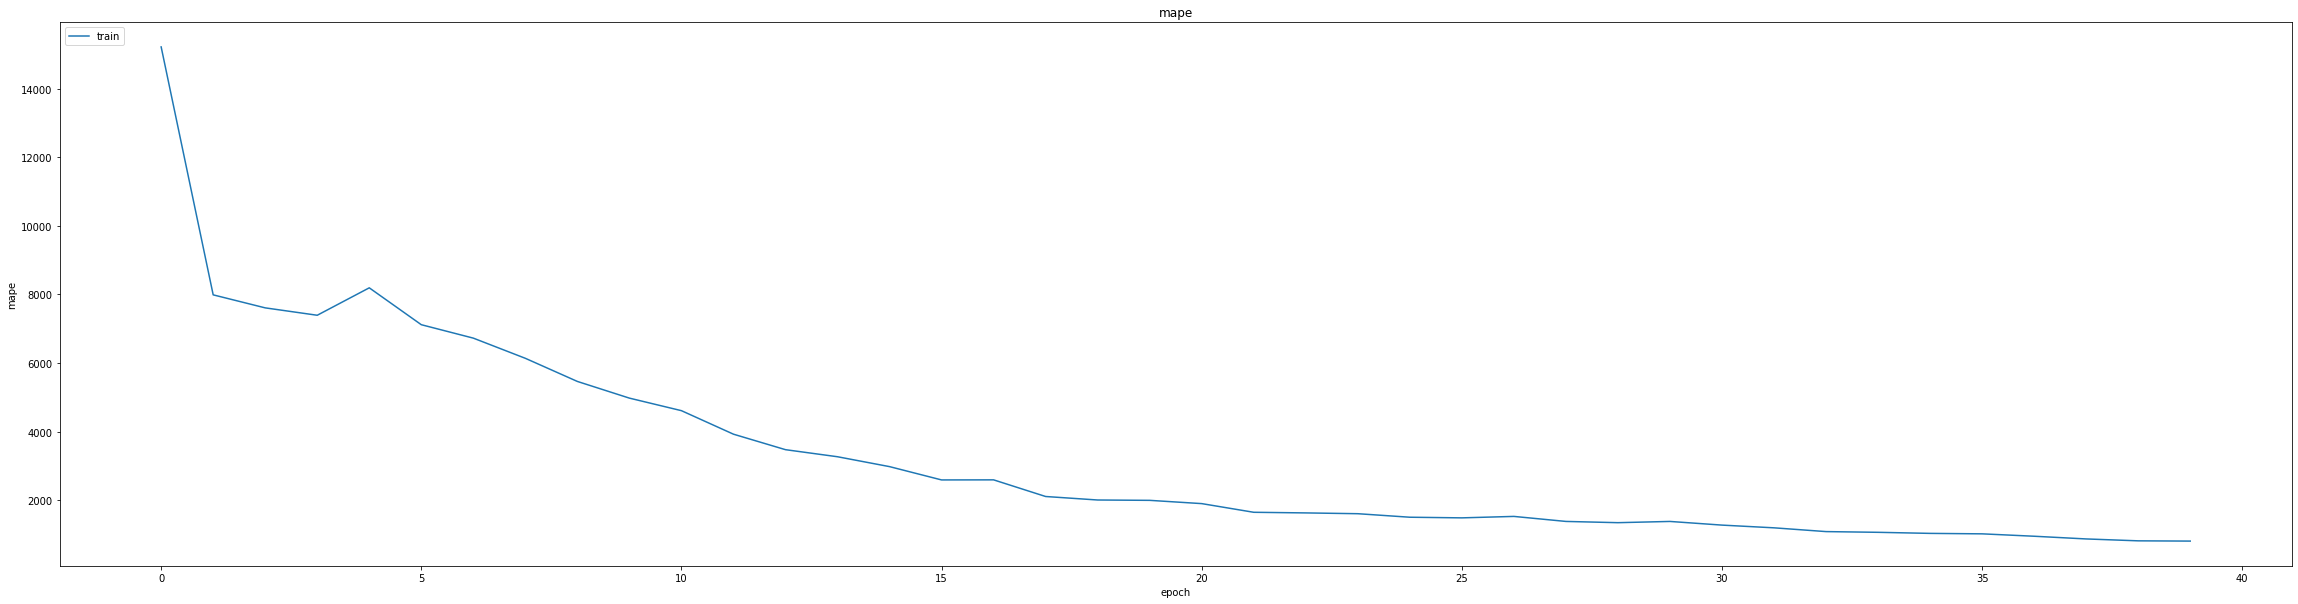

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.013638031668961048
0.016214950010180473
464/464 [==============================] - 6s 9ms/step
0.9931623115752058


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
348/348 [==============================] - ETA: 0s - loss: 6.1155e-04 - mae: 0.0102 - mse: 6.1155e-04 - root_mean_squared_error: 0.0247 - mape: 2131.4961
Epoch 1: val_mse did not improve from 0.00026
348/348 [==============================] - 19s 30ms/step - loss: 6.1155e-04 - mae: 0.0102 - mse: 6.1155e-04 - root_mean_squared_error: 0.0247 - mape: 2131.4961 - val_loss: 6.2696e-04 - val_mae: 0.0234 - val_mse: 6.2696e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 4719.8813 - lr: 0.0010
Epoch 2/25
346/348 [============================>.] - ETA: 0s - loss: 3.2122e-05 - mae: 0.0042 - mse: 3.2122e-05 - root_mean_squared_error: 0.0057 - mape: 1521.6149
Epoch 2: val_mse did not improve from 0.00026
348/348 [==============================] - 7s 20ms/step - loss: 3.2128e-05 - mae: 0.0042 - mse: 3.2128e-05 - root_mean_squared_error: 0.0057 - mape: 1513.3177 - val_loss: 6.1132e-04 - val_mae: 0.0237 - val_mse: 6.1132e-04 - val_root_mean_squared_error: 0.0247 - val_mape: 4732.9580 

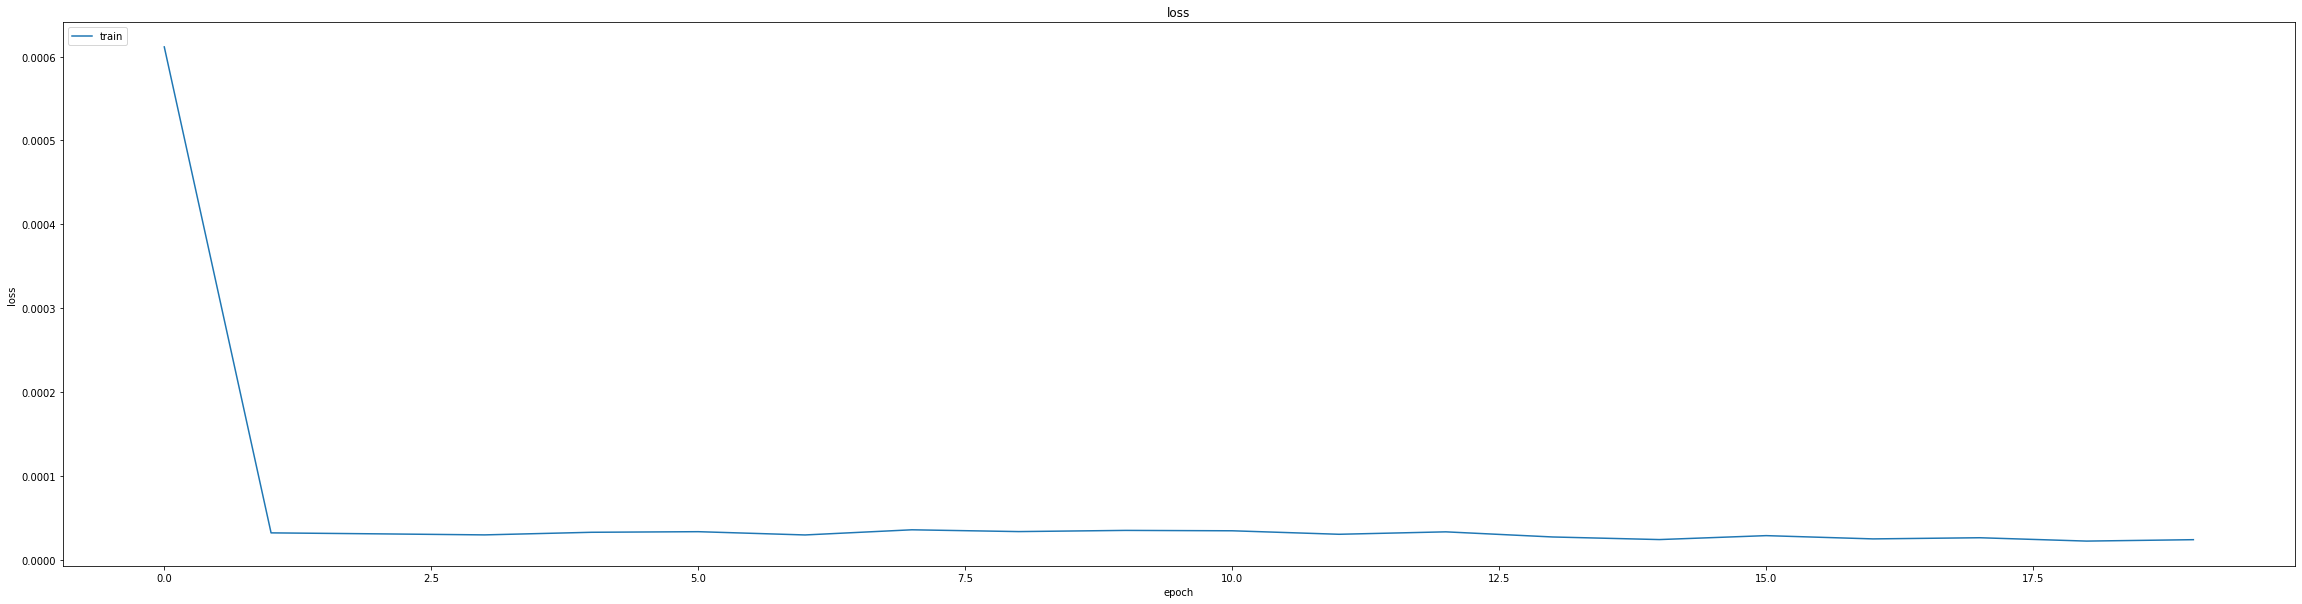

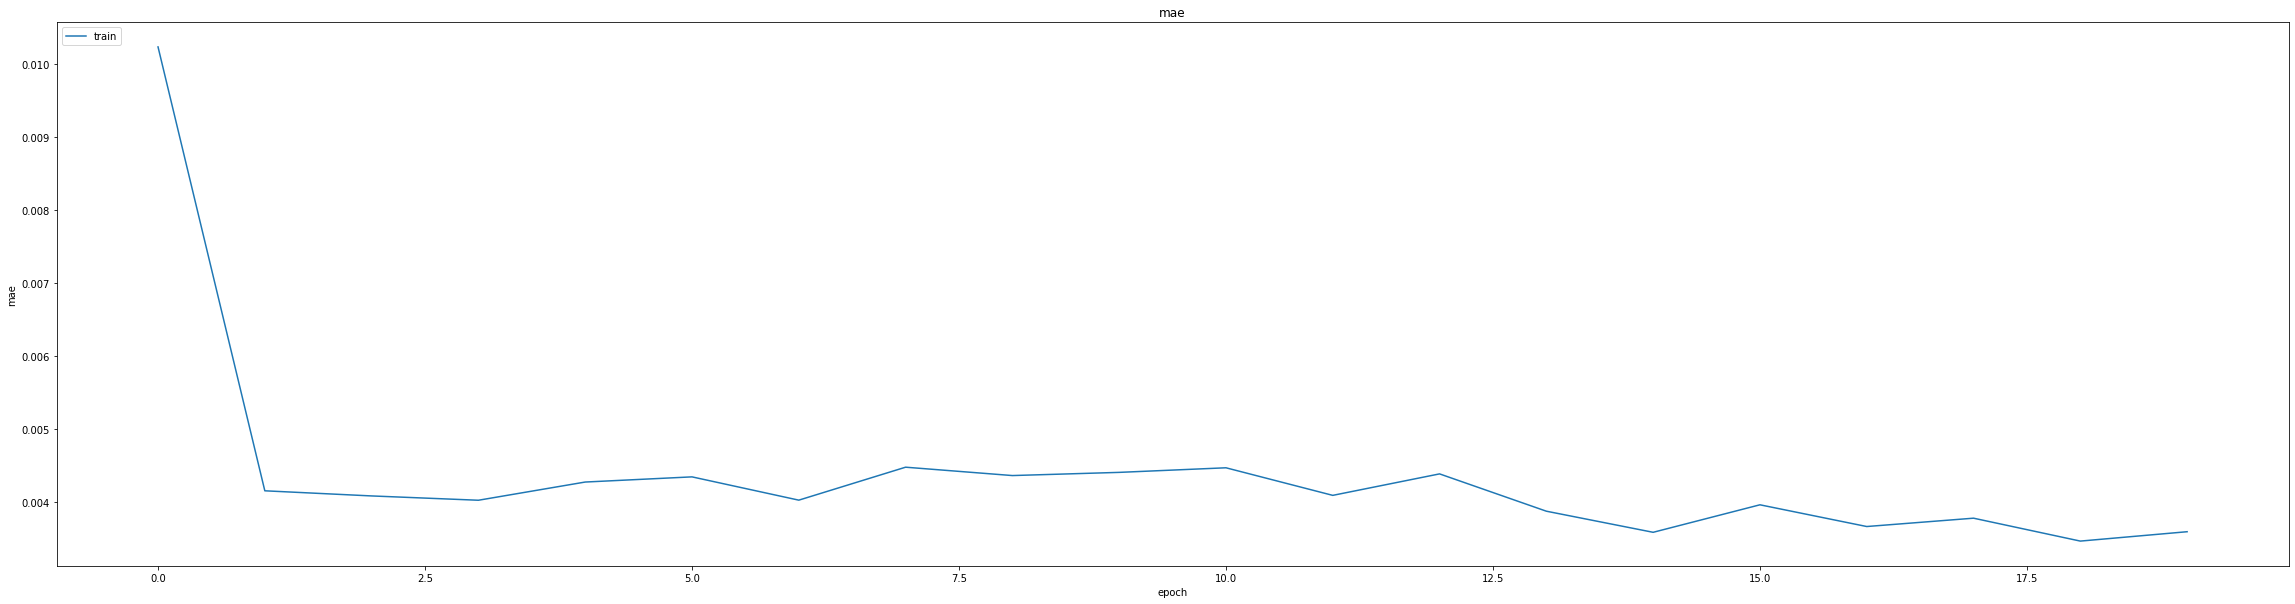

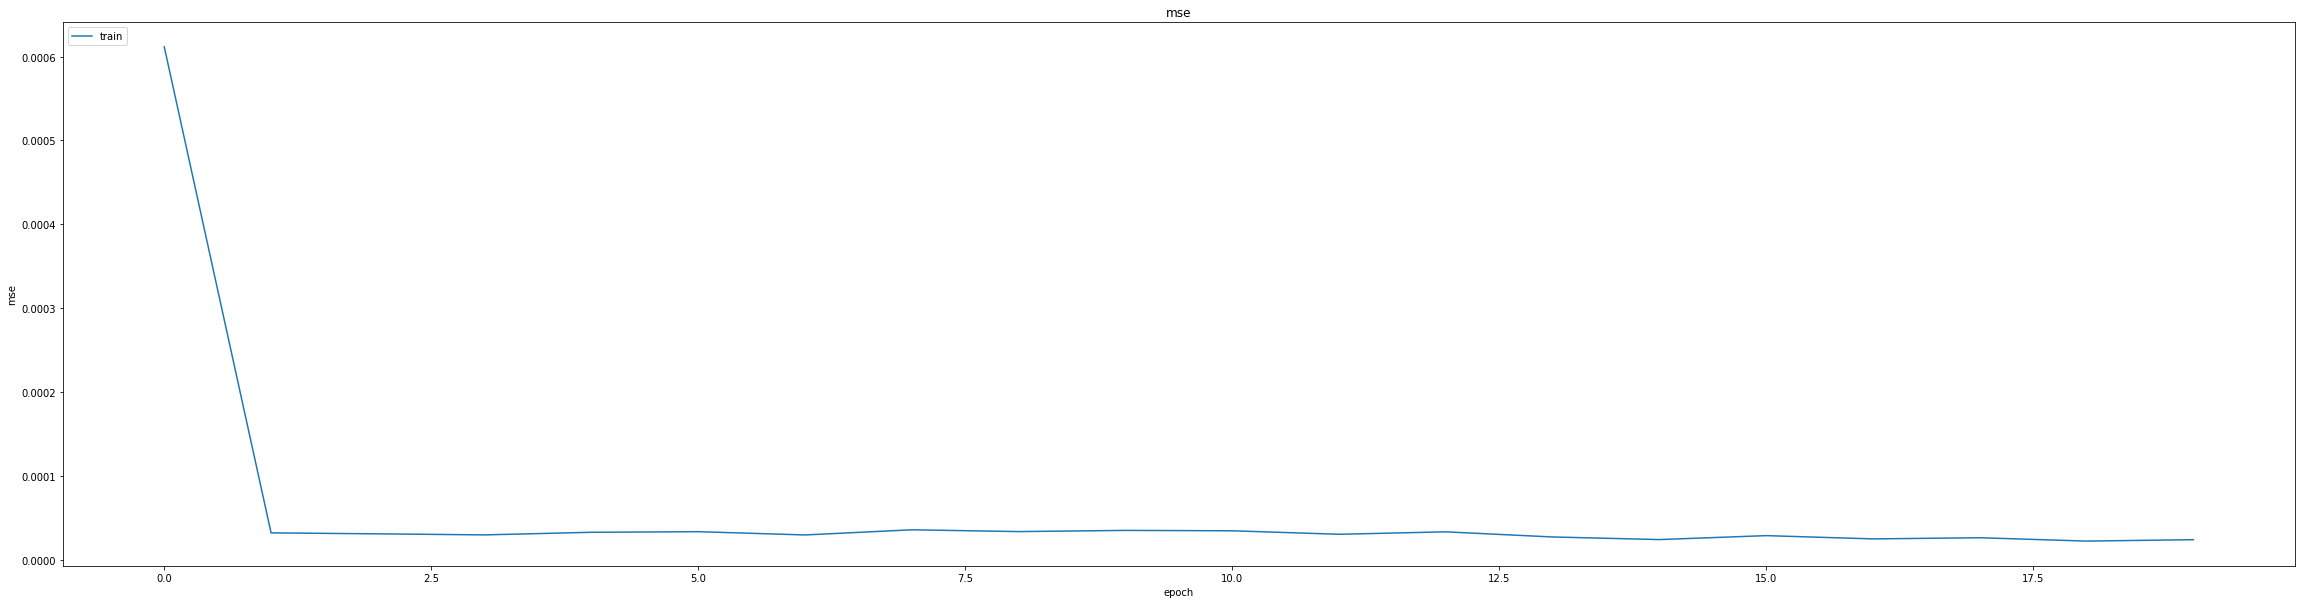

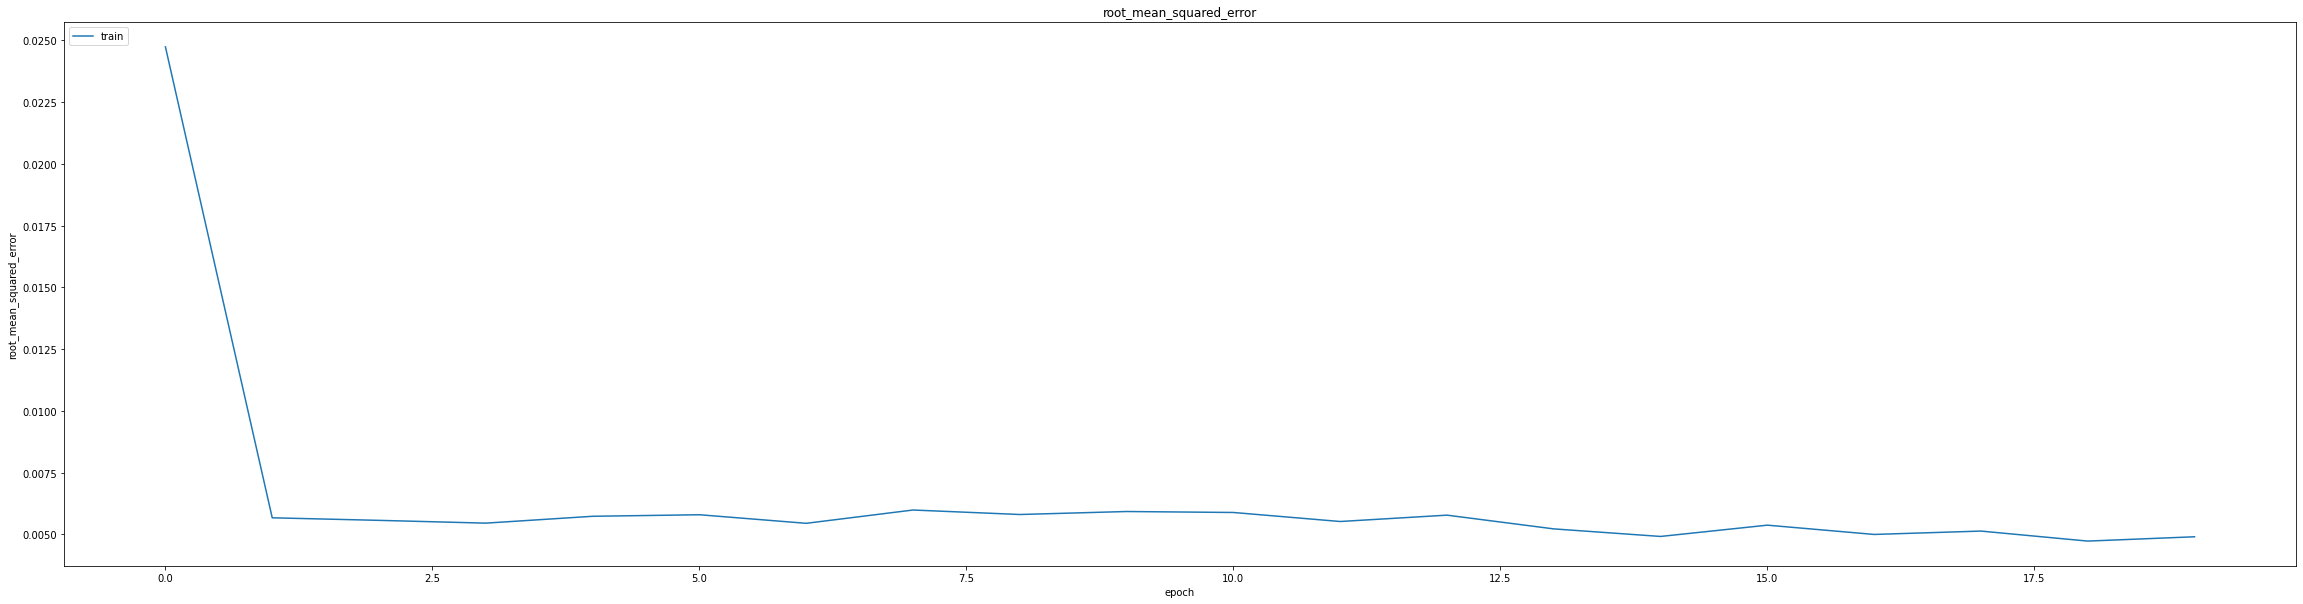

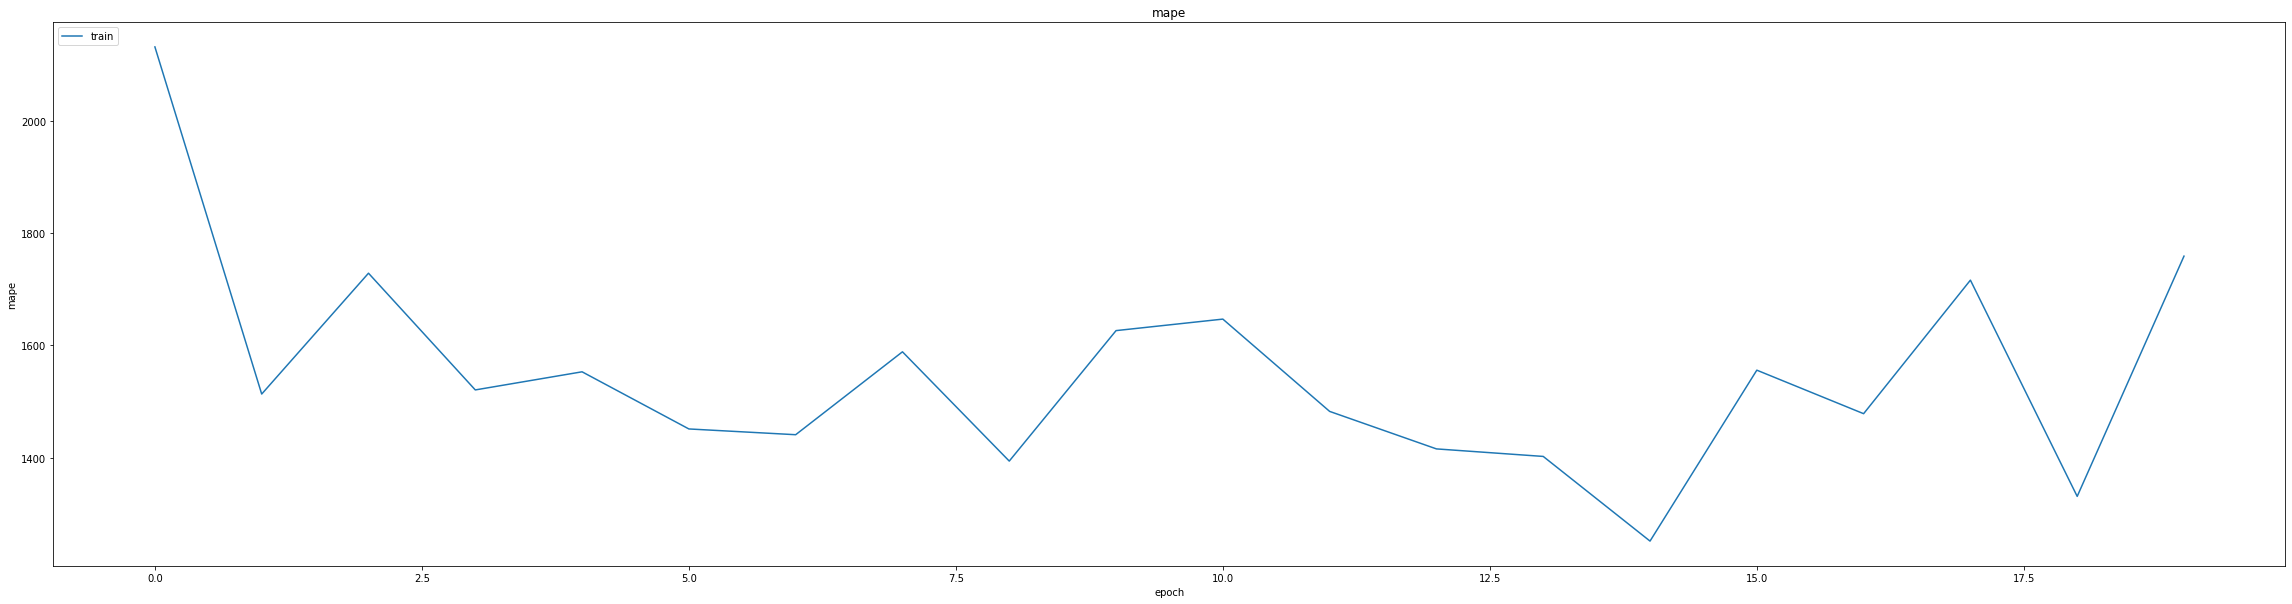

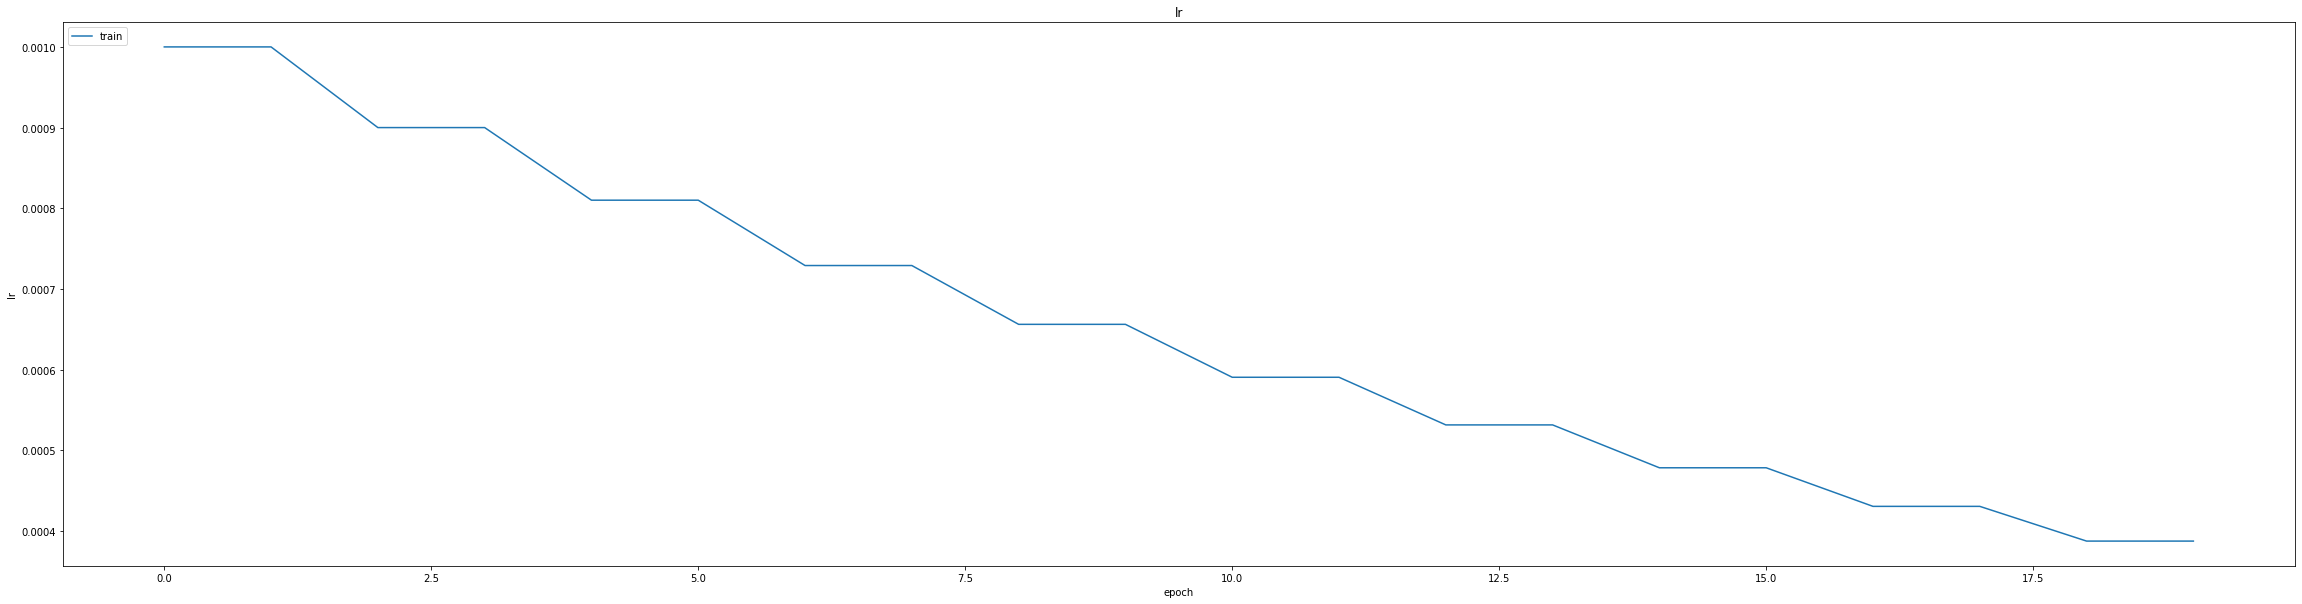

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.021283257752656937
0.02299690619111061
464/464 [==============================] - 5s 7ms/step
0.9906382904906628


464/464 [==============================] - 3s 7ms/step


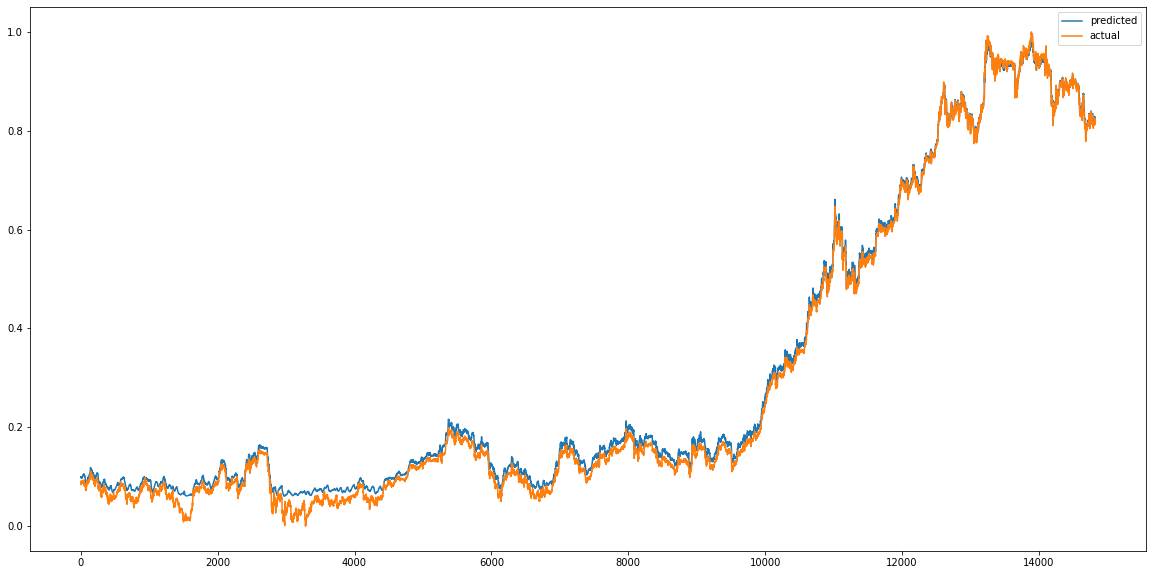

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_BiLSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


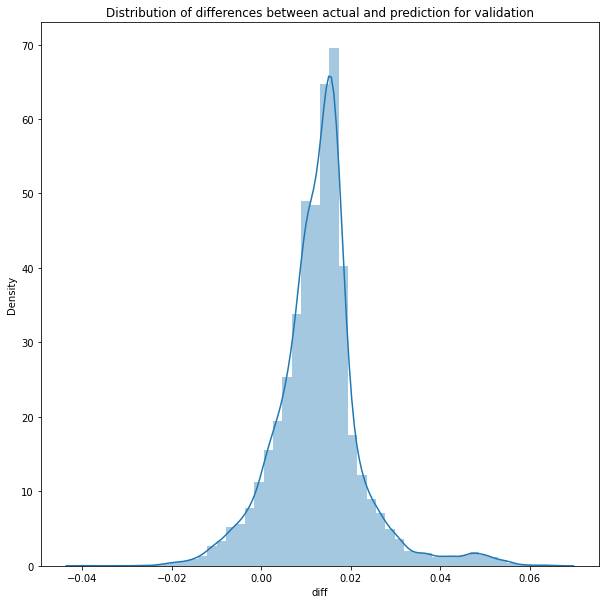

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 3s 7ms/step


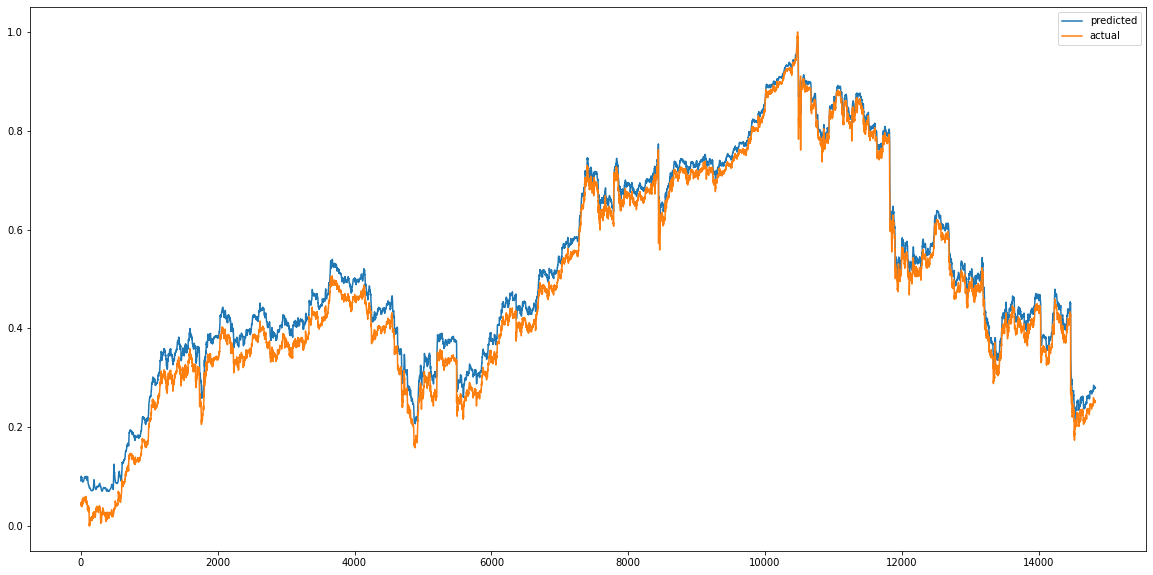

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


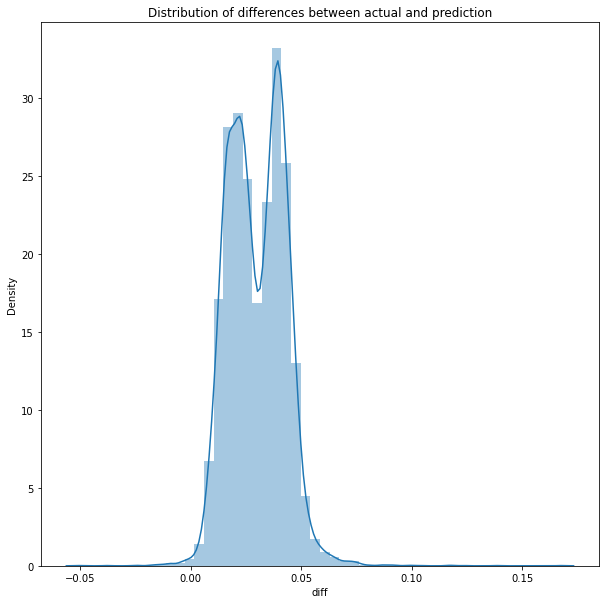

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0010501171359000815
RMSE :  0.032405510887811684
MAE :  0.029881781156043945
464/464 [==============================] - 3s 7ms/step
R2_Score  : 0.9782246994198774


count    14828.000000
mean         0.029824
std          0.012674
min         -0.050657
25%          0.019633
50%          0.029311
75%          0.039683
max          0.167554
Name: diff, dtype: float64

**LSTM_MODEL**

In [ ]:
model= thesis.LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 256)           275456    
                                                                 
 lstm_1 (LSTM)               (None, 24, 64)            82176     
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 16)                5184      
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 0.0142 - mae: 0.0825 - mse: 0.0142 - root_mean_squared_error: 0.1191 - mape: 12174.7627
Epoch 1: val_mse improved from inf to 0.00606, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)


348/348 [==============================] - 23s 54ms/step - loss: 0.0141 - mae: 0.0822 - mse: 0.0141 - root_mean_squared_error: 0.1188 - mape: 12108.3584 - val_loss: 0.0061 - val_mae: 0.0615 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0778 - val_mape: 12570.4932
Epoch 2/75
347/348 [============================>.] - ETA: 0s - loss: 6.5307e-04 - mae: 0.0194 - mse: 6.5307e-04 - root_mean_squared_error: 0.0256 - mape: 3504.2627
Epoch 2: val_mse improved from 0.00606 to 0.00306, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)


348/348 [==============================] - 20s 57ms/step - loss: 6.5217e-04 - mae: 0.0194 - mse: 6.5217e-04 - root_mean_squared_error: 0.0255 - mape: 3495.2219 - val_loss: 0.0031 - val_mae: 0.0417 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0553 - val_mape: 10274.4863
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 4.6284e-04 - mae: 0.0160 - mse: 4.6284e-04 - root_mean_squared_error: 0.0215 - mape: 3589.2664
Epoch 3: val_mse improved from 0.00306 to 0.00218, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)


348/348 [==============================] - 17s 49ms/step - loss: 4.6193e-04 - mae: 0.0160 - mse: 4.6193e-04 - root_mean_squared_error: 0.0215 - mape: 3569.6980 - val_loss: 0.0022 - val_mae: 0.0340 - val_mse: 0.0022 - val_root_mean_squared_error: 0.0467 - val_mape: 9372.5225
Epoch 4/75
347/348 [============================>.] - ETA: 0s - loss: 2.9426e-04 - mae: 0.0129 - mse: 2.9426e-04 - root_mean_squared_error: 0.0172 - mape: 3036.6614
Epoch 4: val_mse improved from 0.00218 to 0.00154, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 2.9404e-04 - mae: 0.0129 - mse: 2.9404e-04 - root_mean_squared_error: 0.0171 - mape: 3028.8264 - val_loss: 0.0015 - val_mae: 0.0301 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0393 - val_mape: 8333.8340
Epoch 5/75
347/348 [============================>.] - ETA: 0s - loss: 2.1132e-04 - mae: 0.0109 - mse: 2.1132e-04 - root_mean_squared_error: 0.0145 - mape: 2889.8611
Epoch 5: val_mse improved from 0.00154 to 0.00121, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 2.1117e-04 - mae: 0.0109 - mse: 2.1117e-04 - root_mean_squared_error: 0.0145 - mape: 2882.4041 - val_loss: 0.0012 - val_mae: 0.0267 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0347 - val_mape: 7768.7451
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 1.8930e-04 - mae: 0.0103 - mse: 1.8930e-04 - root_mean_squared_error: 0.0138 - mape: 3189.4492
Epoch 6: val_mse improved from 0.00121 to 0.00105, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 47ms/step - loss: 1.8908e-04 - mae: 0.0103 - mse: 1.8908e-04 - root_mean_squared_error: 0.0138 - mape: 3181.2180 - val_loss: 0.0010 - val_mae: 0.0251 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0324 - val_mape: 7354.8833
Epoch 7/75
345/348 [============================>.] - ETA: 0s - loss: 1.5315e-04 - mae: 0.0094 - mse: 1.5315e-04 - root_mean_squared_error: 0.0124 - mape: 2431.6597
Epoch 7: val_mse did not improve from 0.00105
348/348 [==============================] - 4s 13ms/step - loss: 1.5375e-04 - mae: 0.0094 - mse: 1.5375e-04 - root_mean_squared_error: 0.0124 - mape: 2411.4233 - val_loss: 0.0011 - val_mae: 0.0256 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0329 - val_mape: 6805.1143
Epoch 8/75
347/348 [============================>.] - ETA: 0s - loss: 1.3937e-04 - mae: 0.0090 - mse: 1.3937e-04 - root_mean_squared_error: 0.0118 - mape: 2256.4380
Epoch 8: val_mse improved from 0.00105 to 0.00068, saving model to /content

348/348 [==============================] - 16s 46ms/step - loss: 1.3931e-04 - mae: 0.0090 - mse: 1.3931e-04 - root_mean_squared_error: 0.0118 - mape: 2250.6167 - val_loss: 6.7704e-04 - val_mae: 0.0186 - val_mse: 6.7704e-04 - val_root_mean_squared_error: 0.0260 - val_mape: 6758.1758
Epoch 9/75
347/348 [============================>.] - ETA: 0s - loss: 1.4726e-04 - mae: 0.0092 - mse: 1.4726e-04 - root_mean_squared_error: 0.0121 - mape: 2210.9077
Epoch 9: val_mse did not improve from 0.00068
348/348 [==============================] - 4s 13ms/step - loss: 1.4717e-04 - mae: 0.0092 - mse: 1.4717e-04 - root_mean_squared_error: 0.0121 - mape: 2205.2046 - val_loss: 6.9297e-04 - val_mae: 0.0198 - val_mse: 6.9297e-04 - val_root_mean_squared_error: 0.0263 - val_mape: 6700.3018
Epoch 10/75
345/348 [============================>.] - ETA: 0s - loss: 9.6580e-05 - mae: 0.0073 - mse: 9.6580e-05 - root_mean_squared_error: 0.0098 - mape: 1.9811
Epoch 10: val_mse improved from 0.00068 to 0.00058, saving mo

348/348 [==============================] - 16s 47ms/step - loss: 9.6508e-05 - mae: 0.0073 - mse: 9.6508e-05 - root_mean_squared_error: 0.0098 - mape: 2263.3157 - val_loss: 5.7618e-04 - val_mae: 0.0184 - val_mse: 5.7618e-04 - val_root_mean_squared_error: 0.0240 - val_mape: 6230.5776
Epoch 11/75
348/348 [==============================] - ETA: 0s - loss: 1.0390e-04 - mae: 0.0078 - mse: 1.0390e-04 - root_mean_squared_error: 0.0102 - mape: 2224.0242
Epoch 11: val_mse did not improve from 0.00058
348/348 [==============================] - 4s 13ms/step - loss: 1.0390e-04 - mae: 0.0078 - mse: 1.0390e-04 - root_mean_squared_error: 0.0102 - mape: 2224.0242 - val_loss: 6.8899e-04 - val_mae: 0.0211 - val_mse: 6.8899e-04 - val_root_mean_squared_error: 0.0262 - val_mape: 6155.8789
Epoch 12/75
348/348 [==============================] - ETA: 0s - loss: 9.2461e-05 - mae: 0.0073 - mse: 9.2461e-05 - root_mean_squared_error: 0.0096 - mape: 2236.4084
Epoch 12: val_mse did not improve from 0.00058
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 9.3306e-05 - mae: 0.0073 - mse: 9.3306e-05 - root_mean_squared_error: 0.0097 - mape: 2169.7532 - val_loss: 4.9583e-04 - val_mae: 0.0172 - val_mse: 4.9583e-04 - val_root_mean_squared_error: 0.0223 - val_mape: 5883.6499
Epoch 14/75
346/348 [============================>.] - ETA: 0s - loss: 8.1085e-05 - mae: 0.0068 - mse: 8.1085e-05 - root_mean_squared_error: 0.0090 - mape: 2063.3794
Epoch 14: val_mse improved from 0.00050 to 0.00042, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)


348/348 [==============================] - 16s 46ms/step - loss: 8.0913e-05 - mae: 0.0067 - mse: 8.0913e-05 - root_mean_squared_error: 0.0090 - mape: 2052.1270 - val_loss: 4.1811e-04 - val_mae: 0.0155 - val_mse: 4.1811e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 5686.4502
Epoch 15/75
346/348 [============================>.] - ETA: 0s - loss: 1.1499e-04 - mae: 0.0075 - mse: 1.1499e-04 - root_mean_squared_error: 0.0107 - mape: 2222.8350
Epoch 15: val_mse did not improve from 0.00042
348/348 [==============================] - 4s 12ms/step - loss: 1.1476e-04 - mae: 0.0075 - mse: 1.1476e-04 - root_mean_squared_error: 0.0107 - mape: 2210.7139 - val_loss: 4.2033e-04 - val_mae: 0.0156 - val_mse: 4.2033e-04 - val_root_mean_squared_error: 0.0205 - val_mape: 5795.9346
Epoch 16/75
345/348 [============================>.] - ETA: 0s - loss: 6.6099e-05 - mae: 0.0062 - mse: 6.6099e-05 - root_mean_squared_error: 0.0081 - mape: 1930.7028
Epoch 16: val_mse did not improve from 0.00042
348/348 [

348/348 [==============================] - 17s 48ms/step - loss: 6.7280e-05 - mae: 0.0063 - mse: 6.7280e-05 - root_mean_squared_error: 0.0082 - mape: 1936.8740 - val_loss: 4.1614e-04 - val_mae: 0.0169 - val_mse: 4.1614e-04 - val_root_mean_squared_error: 0.0204 - val_mape: 5476.3428
Epoch 18/75
348/348 [==============================] - ETA: 0s - loss: 7.4228e-05 - mae: 0.0064 - mse: 7.4228e-05 - root_mean_squared_error: 0.0086 - mape: 1936.1974
Epoch 18: val_mse did not improve from 0.00042
348/348 [==============================] - 4s 12ms/step - loss: 7.4228e-05 - mae: 0.0064 - mse: 7.4228e-05 - root_mean_squared_error: 0.0086 - mape: 1936.1974 - val_loss: 4.6864e-04 - val_mae: 0.0184 - val_mse: 4.6864e-04 - val_root_mean_squared_error: 0.0216 - val_mape: 5422.5635
Epoch 19/75
345/348 [============================>.] - ETA: 0s - loss: 5.8344e-05 - mae: 0.0059 - mse: 5.8344e-05 - root_mean_squared_error: 0.0076 - mape: 1825.8579
Epoch 19: val_mse improved from 0.00042 to 0.00031, savi

348/348 [==============================] - 17s 48ms/step - loss: 5.8545e-05 - mae: 0.0059 - mse: 5.8545e-05 - root_mean_squared_error: 0.0077 - mape: 1810.6599 - val_loss: 3.1039e-04 - val_mae: 0.0125 - val_mse: 3.1039e-04 - val_root_mean_squared_error: 0.0176 - val_mape: 5291.2300
Epoch 20/75
346/348 [============================>.] - ETA: 0s - loss: 6.6843e-05 - mae: 0.0063 - mse: 6.6843e-05 - root_mean_squared_error: 0.0082 - mape: 1924.0719
Epoch 20: val_mse improved from 0.00031 to 0.00031, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 6.6628e-05 - mae: 0.0063 - mse: 6.6628e-05 - root_mean_squared_error: 0.0082 - mape: 1913.5784 - val_loss: 3.0555e-04 - val_mae: 0.0129 - val_mse: 3.0555e-04 - val_root_mean_squared_error: 0.0175 - val_mape: 5311.9448
Epoch 21/75
347/348 [============================>.] - ETA: 0s - loss: 4.6848e-05 - mae: 0.0052 - mse: 4.6848e-05 - root_mean_squared_error: 0.0068 - mape: 1859.8811
Epoch 21: val_mse did not improve from 0.00031
348/348 [==============================] - 5s 14ms/step - loss: 4.6824e-05 - mae: 0.0052 - mse: 4.6824e-05 - root_mean_squared_error: 0.0068 - mape: 1855.0811 - val_loss: 5.3531e-04 - val_mae: 0.0204 - val_mse: 5.3531e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 5198.8218
Epoch 22/75
346/348 [============================>.] - ETA: 0s - loss: 5.8262e-05 - mae: 0.0058 - mse: 5.8262e-05 - root_mean_squared_error: 0.0076 - mape: 1908.9594
Epoch 22: val_mse did not improve from 0.00031
348/348 [

348/348 [==============================] - 16s 46ms/step - loss: 5.0364e-05 - mae: 0.0054 - mse: 5.0364e-05 - root_mean_squared_error: 0.0071 - mape: 1747.7015 - val_loss: 3.0439e-04 - val_mae: 0.0133 - val_mse: 3.0439e-04 - val_root_mean_squared_error: 0.0174 - val_mape: 5064.8325
Epoch 25/75
344/348 [============================>.] - ETA: 0s - loss: 5.0274e-05 - mae: 0.0054 - mse: 5.0274e-05 - root_mean_squared_error: 0.0071 - mape: 1760.9490
Epoch 25: val_mse did not improve from 0.00030
348/348 [==============================] - 4s 13ms/step - loss: 5.0363e-05 - mae: 0.0054 - mse: 5.0363e-05 - root_mean_squared_error: 0.0071 - mape: 1741.2338 - val_loss: 3.4375e-04 - val_mae: 0.0155 - val_mse: 3.4375e-04 - val_root_mean_squared_error: 0.0185 - val_mape: 5043.0898
Epoch 26/75
346/348 [============================>.] - ETA: 0s - loss: 4.7735e-05 - mae: 0.0052 - mse: 4.7735e-05 - root_mean_squared_error: 0.0069 - mape: 1620.5448
Epoch 26: val_mse did not improve from 0.00030
348/348 [

348/348 [==============================] - 16s 46ms/step - loss: 4.2829e-05 - mae: 0.0050 - mse: 4.2829e-05 - root_mean_squared_error: 0.0065 - mape: 1923.0111 - val_loss: 2.7828e-04 - val_mae: 0.0137 - val_mse: 2.7828e-04 - val_root_mean_squared_error: 0.0167 - val_mape: 4766.5718
Epoch 29/75
344/348 [============================>.] - ETA: 0s - loss: 3.9946e-05 - mae: 0.0047 - mse: 3.9946e-05 - root_mean_squared_error: 0.0063 - mape: 1636.2623
Epoch 29: val_mse improved from 0.00028 to 0.00026, saving model to /content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 4.0054e-05 - mae: 0.0047 - mse: 4.0054e-05 - root_mean_squared_error: 0.0063 - mape: 1617.9432 - val_loss: 2.6284e-04 - val_mae: 0.0130 - val_mse: 2.6284e-04 - val_root_mean_squared_error: 0.0162 - val_mape: 4747.8989
Epoch 30/75
344/348 [============================>.] - ETA: 0s - loss: 4.0096e-05 - mae: 0.0048 - mse: 4.0096e-05 - root_mean_squared_error: 0.0063 - mape: 1627.9441
Epoch 30: val_mse did not improve from 0.00026
348/348 [==============================] - 4s 12ms/step - loss: 4.0130e-05 - mae: 0.0048 - mse: 4.0130e-05 - root_mean_squared_error: 0.0063 - mape: 1609.7158 - val_loss: 4.2354e-04 - val_mae: 0.0178 - val_mse: 4.2354e-04 - val_root_mean_squared_error: 0.0206 - val_mape: 4786.3374
Epoch 31/75
344/348 [============================>.] - ETA: 0s - loss: 4.6407e-05 - mae: 0.0050 - mse: 4.6407e-05 - root_mean_squared_error: 0.0068 - mape: 1656.9584
Epoch 31: val_mse did not improve from 0.00026
348/348 [

348/348 [==============================] - 17s 48ms/step - loss: 3.7457e-05 - mae: 0.0046 - mse: 3.7457e-05 - root_mean_squared_error: 0.0061 - mape: 1742.2271 - val_loss: 2.4023e-04 - val_mae: 0.0124 - val_mse: 2.4023e-04 - val_root_mean_squared_error: 0.0155 - val_mape: 4660.3530
Epoch 37/75
348/348 [==============================] - ETA: 0s - loss: 3.2760e-05 - mae: 0.0043 - mse: 3.2760e-05 - root_mean_squared_error: 0.0057 - mape: 1791.3486
Epoch 37: val_mse did not improve from 0.00024
348/348 [==============================] - 4s 13ms/step - loss: 3.2760e-05 - mae: 0.0043 - mse: 3.2760e-05 - root_mean_squared_error: 0.0057 - mape: 1791.3486 - val_loss: 3.0026e-04 - val_mae: 0.0150 - val_mse: 3.0026e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 4579.5317
Epoch 38/75
346/348 [============================>.] - ETA: 0s - loss: 3.5610e-05 - mae: 0.0046 - mse: 3.5610e-05 - root_mean_squared_error: 0.0060 - mape: 1639.7169
Epoch 38: val_mse did not improve from 0.00024
348/348 [

348/348 [==============================] - 16s 45ms/step - loss: 2.9966e-05 - mae: 0.0042 - mse: 2.9966e-05 - root_mean_squared_error: 0.0055 - mape: 1639.5295 - val_loss: 2.1844e-04 - val_mae: 0.0122 - val_mse: 2.1844e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 4464.0288
Epoch 42/75
348/348 [==============================] - ETA: 0s - loss: 2.9922e-05 - mae: 0.0042 - mse: 2.9922e-05 - root_mean_squared_error: 0.0055 - mape: 1497.9548
Epoch 42: val_mse did not improve from 0.00022
348/348 [==============================] - 4s 13ms/step - loss: 2.9922e-05 - mae: 0.0042 - mse: 2.9922e-05 - root_mean_squared_error: 0.0055 - mape: 1497.9548 - val_loss: 2.9855e-04 - val_mae: 0.0157 - val_mse: 2.9855e-04 - val_root_mean_squared_error: 0.0173 - val_mape: 4473.3765
Epoch 43/75
348/348 [==============================] - ETA: 0s - loss: 1.9350e-05 - mae: 0.0034 - mse: 1.9350e-05 - root_mean_squared_error: 0.0044 - mape: 1456.3654
Epoch 43: val_mse improved from 0.00022 to 0.00022, savi

348/348 [==============================] - 16s 46ms/step - loss: 1.9350e-05 - mae: 0.0034 - mse: 1.9350e-05 - root_mean_squared_error: 0.0044 - mape: 1456.3654 - val_loss: 2.1834e-04 - val_mae: 0.0125 - val_mse: 2.1834e-04 - val_root_mean_squared_error: 0.0148 - val_mape: 4326.2554
Epoch 44/75
345/348 [============================>.] - ETA: 0s - loss: 2.8588e-05 - mae: 0.0041 - mse: 2.8588e-05 - root_mean_squared_error: 0.0053 - mape: 1587.6219
Epoch 44: val_mse did not improve from 0.00022
348/348 [==============================] - 4s 13ms/step - loss: 2.8483e-05 - mae: 0.0041 - mse: 2.8483e-05 - root_mean_squared_error: 0.0053 - mape: 1574.4030 - val_loss: 2.5670e-04 - val_mae: 0.0139 - val_mse: 2.5670e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 4375.9629
Epoch 45/75
344/348 [============================>.] - ETA: 0s - loss: 2.0503e-05 - mae: 0.0035 - mse: 2.0503e-05 - root_mean_squared_error: 0.0045 - mape: 1587.5583
Epoch 45: val_mse did not improve from 0.00022
348/348 [

348/348 [==============================] - 15s 44ms/step - loss: 2.9232e-05 - mae: 0.0041 - mse: 2.9232e-05 - root_mean_squared_error: 0.0054 - mape: 1640.4198 - val_loss: 1.9293e-04 - val_mae: 0.0109 - val_mse: 1.9293e-04 - val_root_mean_squared_error: 0.0139 - val_mape: 4359.5732
Epoch 47/75
347/348 [============================>.] - ETA: 0s - loss: 2.4458e-05 - mae: 0.0035 - mse: 2.4458e-05 - root_mean_squared_error: 0.0049 - mape: 1657.7766
Epoch 47: val_mse did not improve from 0.00019
348/348 [==============================] - 4s 12ms/step - loss: 2.4456e-05 - mae: 0.0035 - mse: 2.4456e-05 - root_mean_squared_error: 0.0049 - mape: 1653.4980 - val_loss: 4.5024e-04 - val_mae: 0.0203 - val_mse: 4.5024e-04 - val_root_mean_squared_error: 0.0212 - val_mape: 4350.5439
Epoch 48/75
346/348 [============================>.] - ETA: 0s - loss: 2.5066e-05 - mae: 0.0039 - mse: 2.5066e-05 - root_mean_squared_error: 0.0050 - mape: 1620.1875
Epoch 48: val_mse did not improve from 0.00019
348/348 [

348/348 [==============================] - 16s 46ms/step - loss: 1.5724e-05 - mae: 0.0030 - mse: 1.5724e-05 - root_mean_squared_error: 0.0040 - mape: 1575.2456 - val_loss: 1.4261e-04 - val_mae: 0.0095 - val_mse: 1.4261e-04 - val_root_mean_squared_error: 0.0119 - val_mape: 4048.8591
Epoch 66/75
344/348 [============================>.] - ETA: 0s - loss: 1.7733e-05 - mae: 0.0032 - mse: 1.7733e-05 - root_mean_squared_error: 0.0042 - mape: 1424.5122
Epoch 66: val_mse did not improve from 0.00014
348/348 [==============================] - 4s 13ms/step - loss: 1.8264e-05 - mae: 0.0033 - mse: 1.8264e-05 - root_mean_squared_error: 0.0043 - mape: 1408.5725 - val_loss: 2.5593e-04 - val_mae: 0.0142 - val_mse: 2.5593e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 4107.0693
Epoch 67/75
348/348 [==============================] - ETA: 0s - loss: 1.4665e-05 - mae: 0.0029 - mse: 1.4665e-05 - root_mean_squared_error: 0.0038 - mape: 1420.5907
Epoch 67: val_mse did not improve from 0.00014
348/348 [

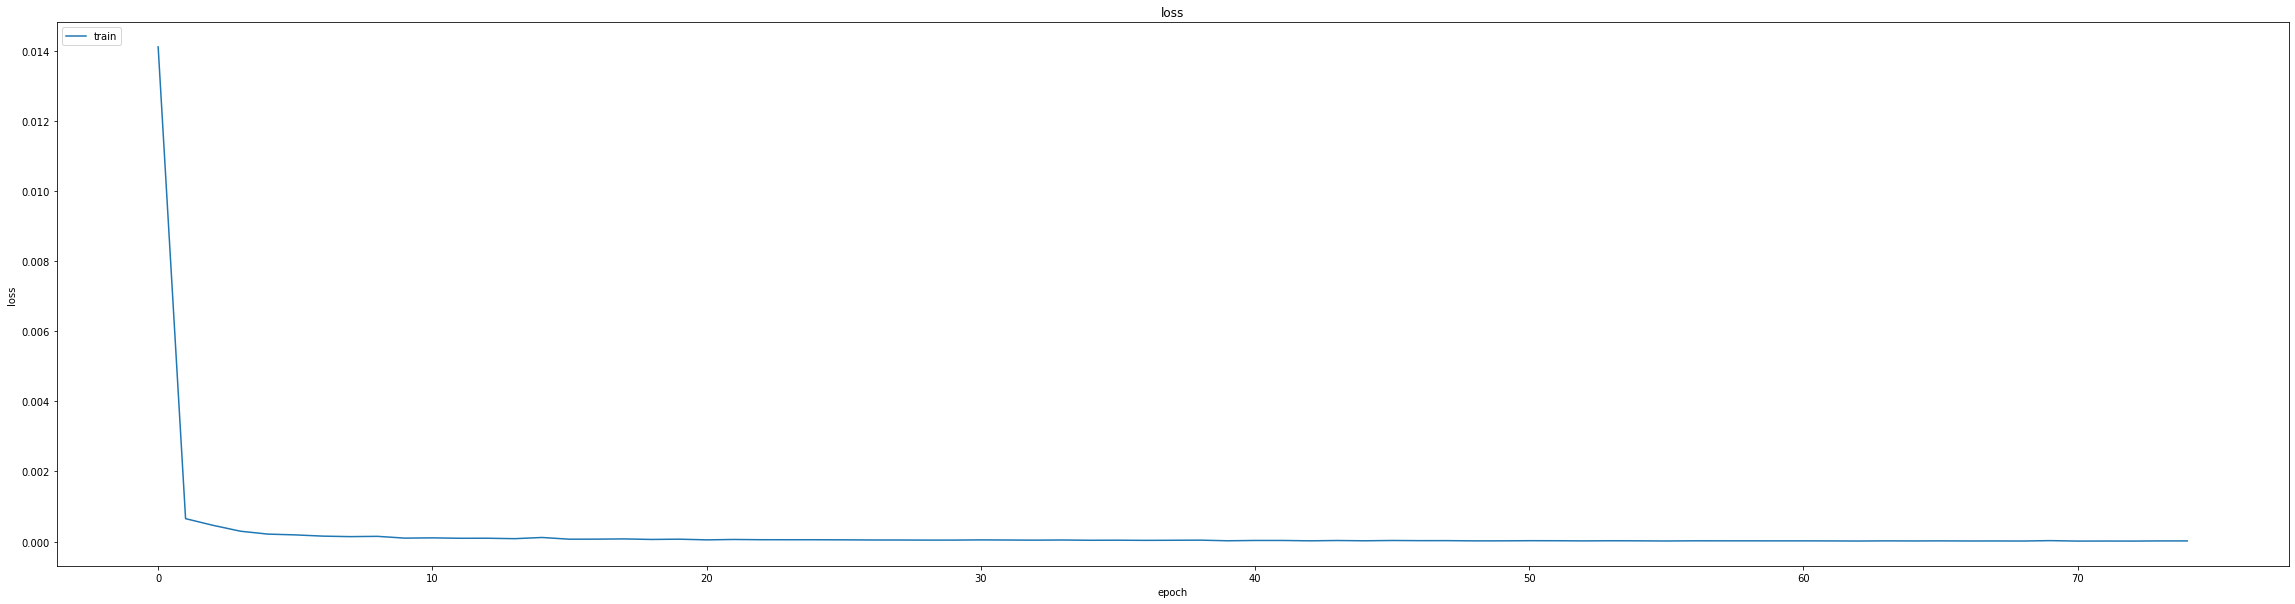

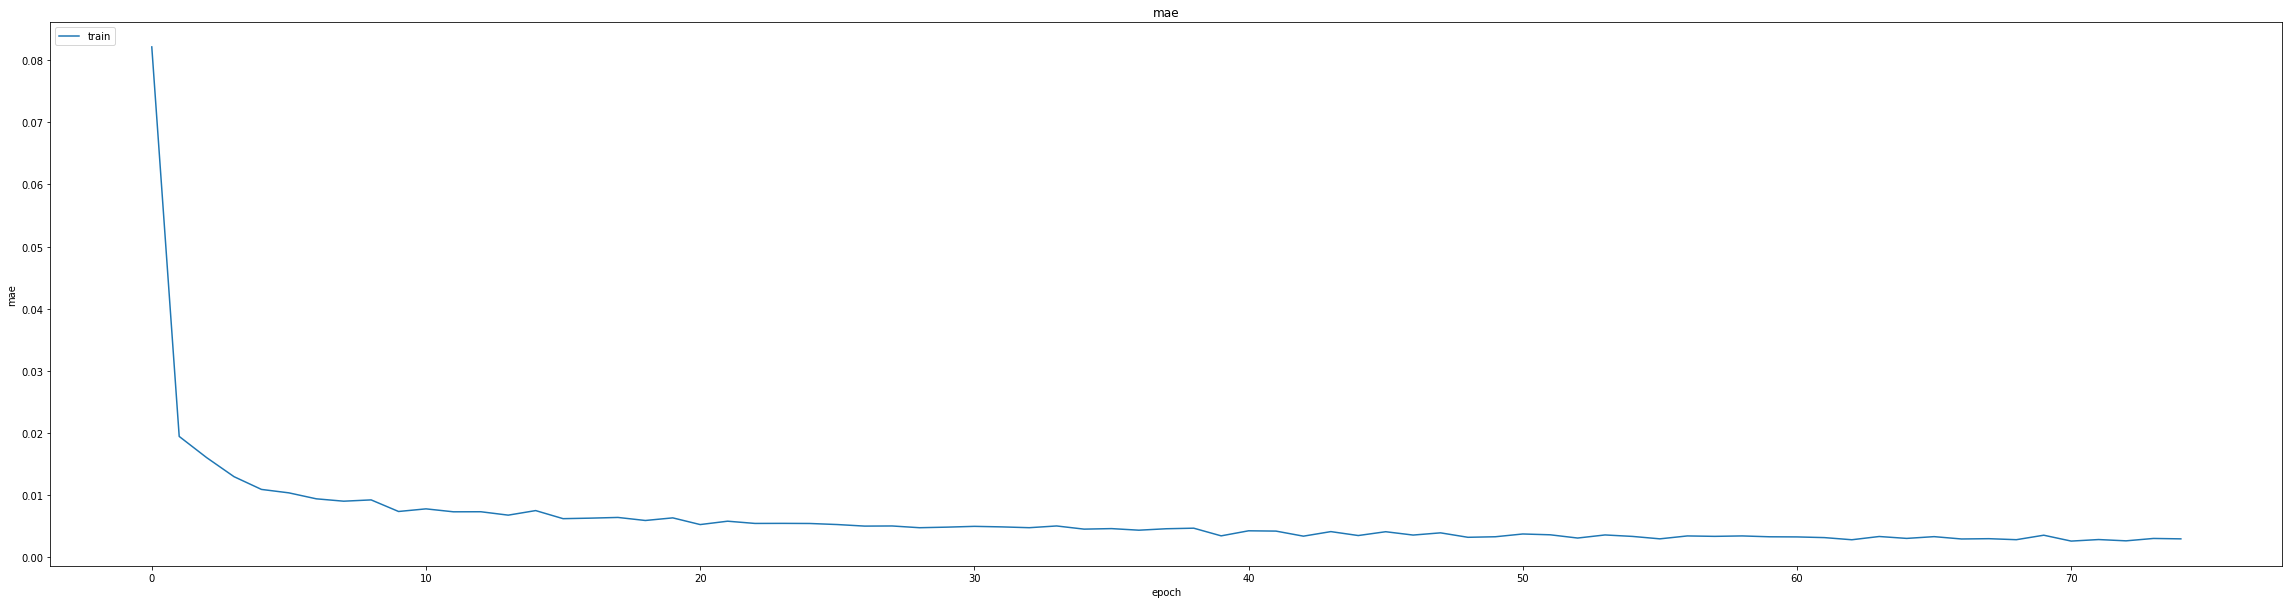

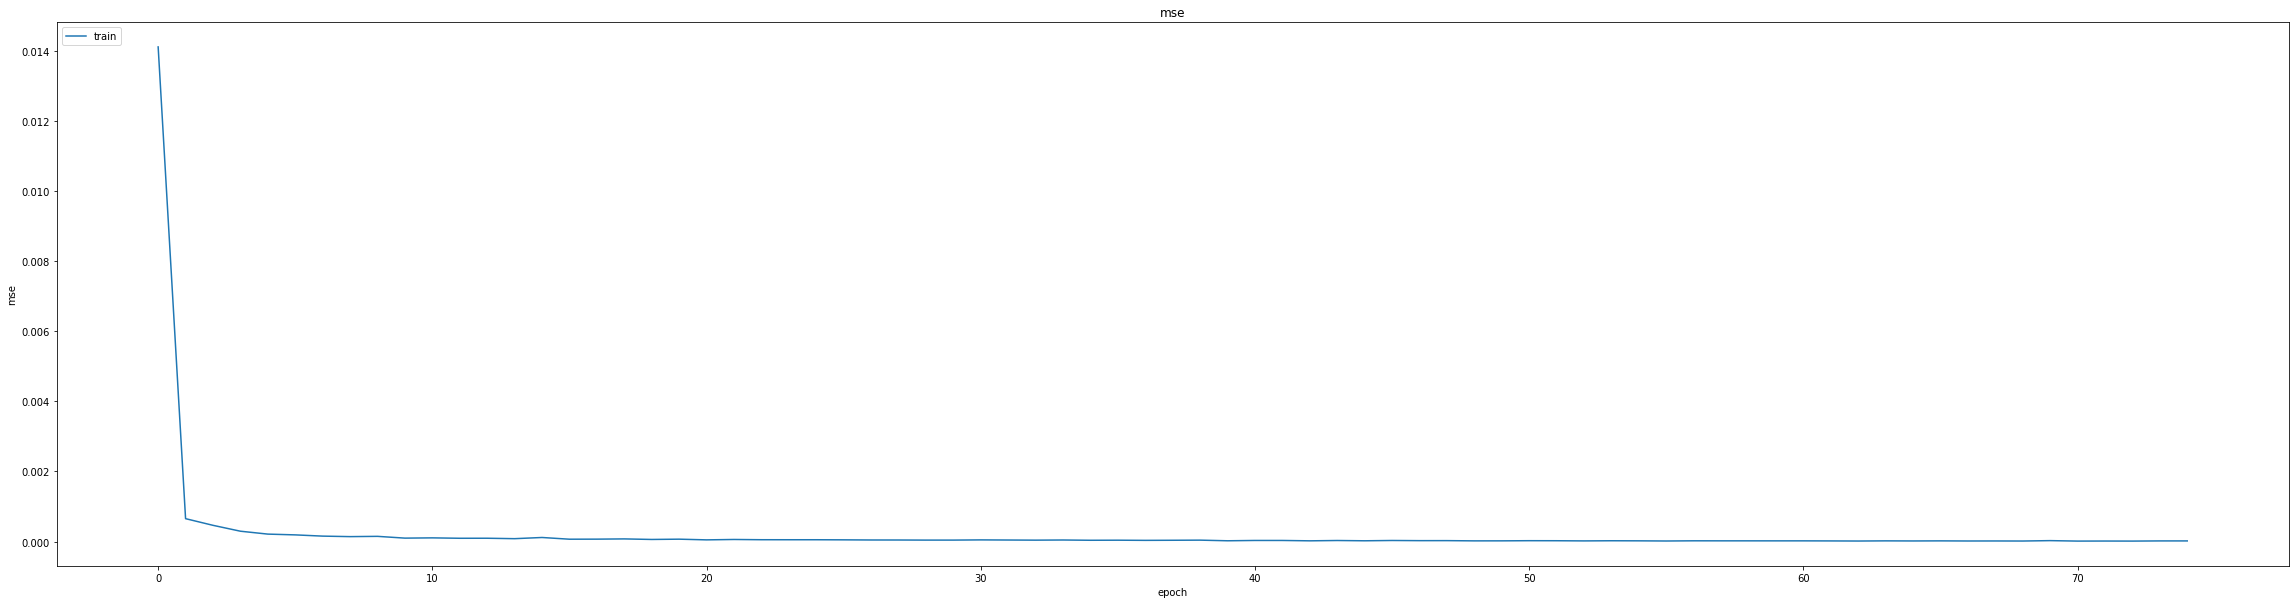

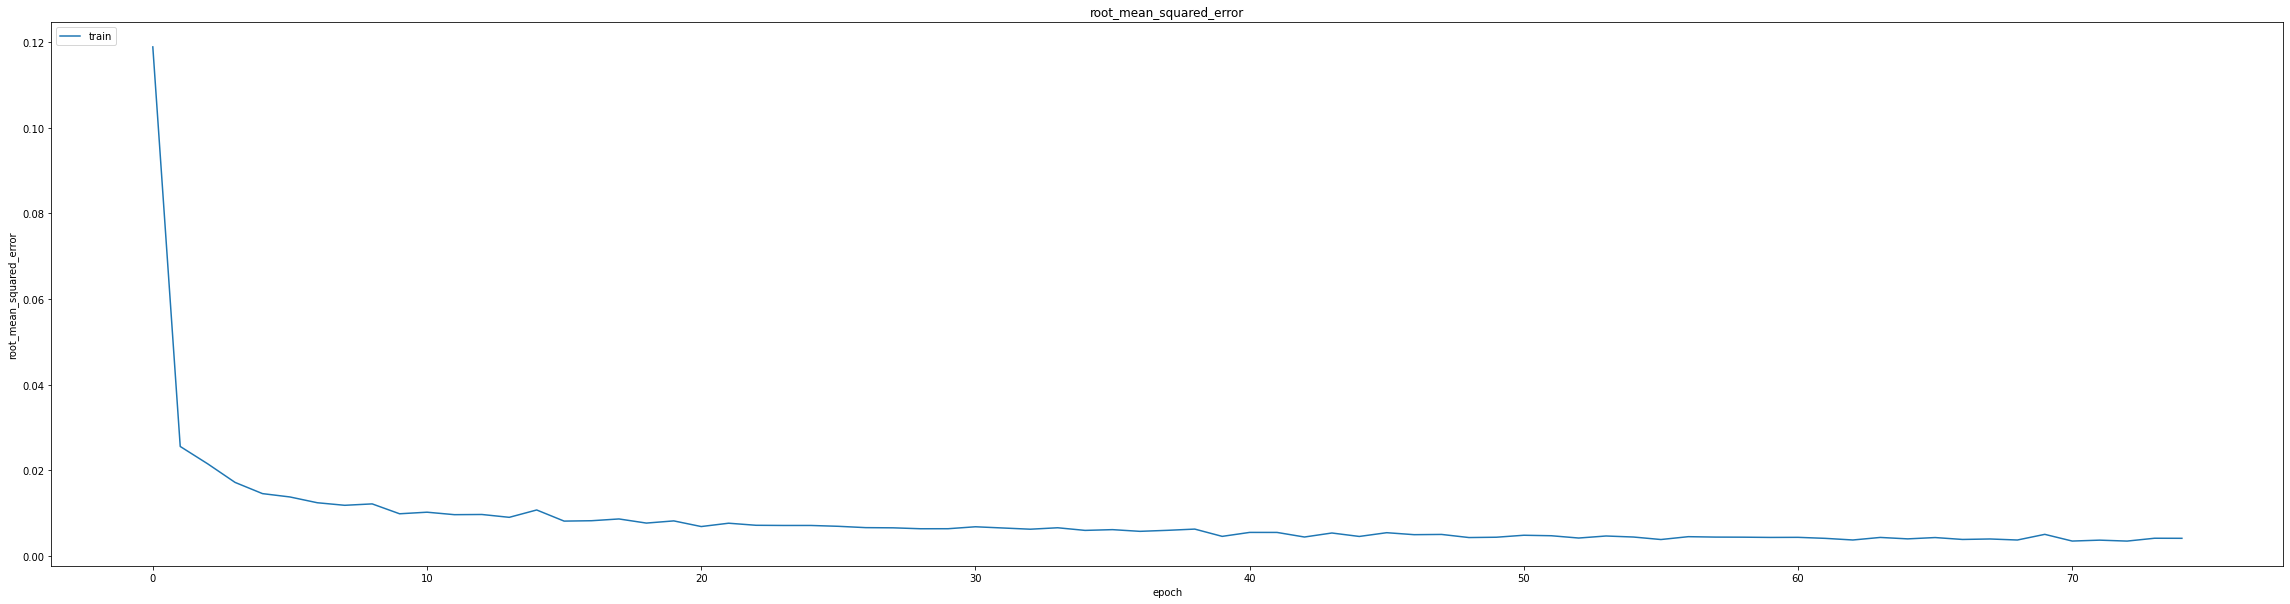

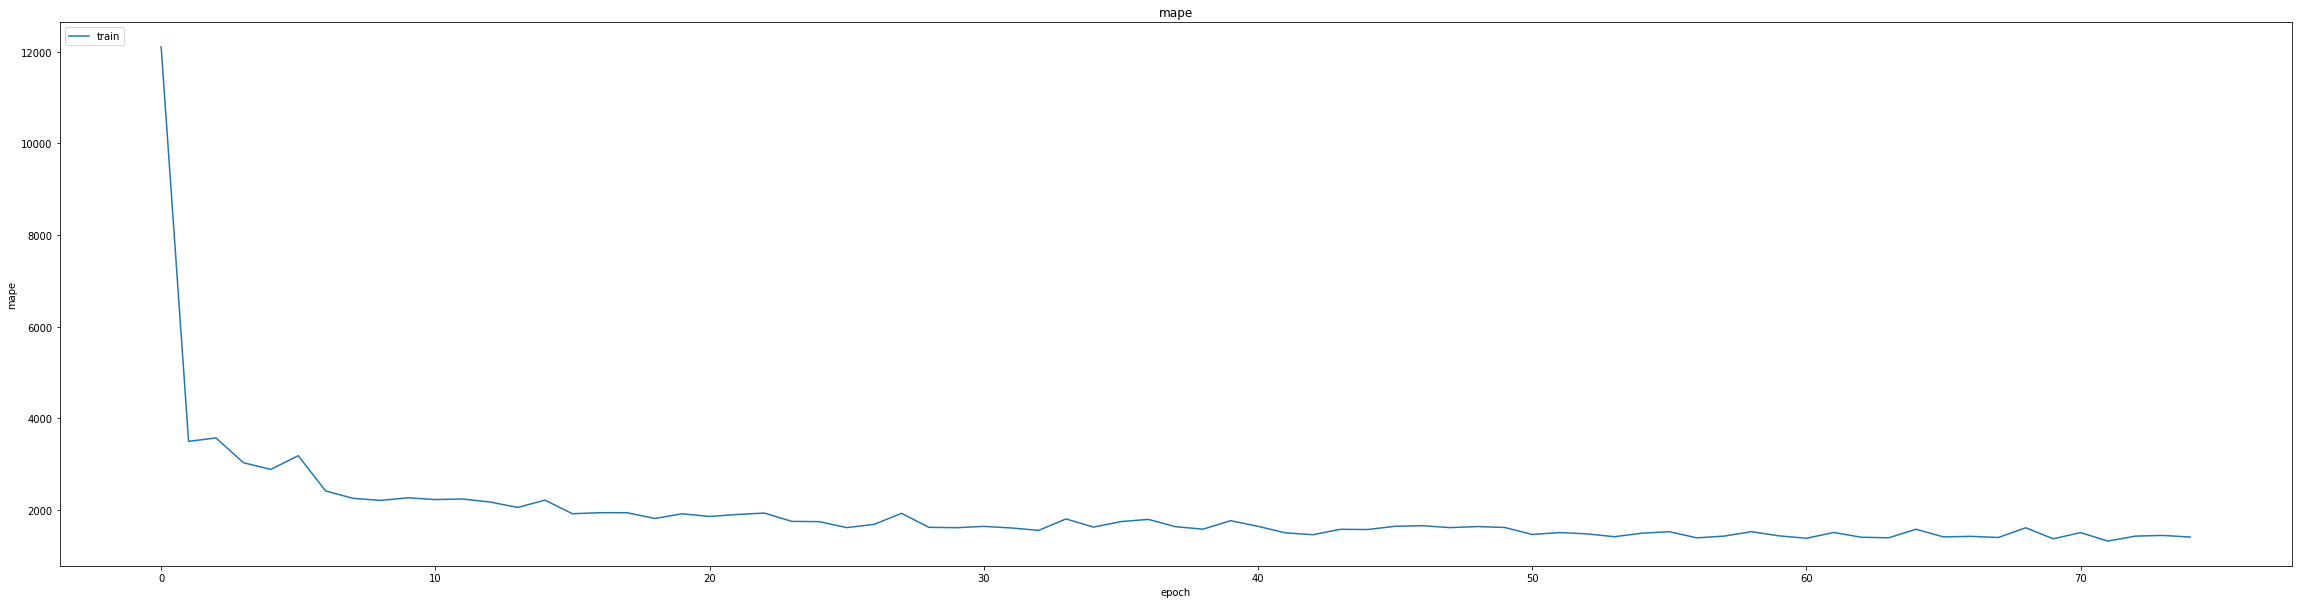

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.009539922699332237
0.01194195169955492
464/464 [==============================] - 3s 4ms/step
0.9970455861718449


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
347/348 [============================>.] - ETA: 0s - loss: 1.3124e-04 - mae: 0.0043 - mse: 1.3124e-04 - root_mean_squared_error: 0.0115 - mape: 1488.4705
Epoch 1: val_mse did not improve from 0.00014
348/348 [==============================] - 10s 18ms/step - loss: 1.3092e-04 - mae: 0.0043 - mse: 1.3092e-04 - root_mean_squared_error: 0.0114 - mape: 1484.6274 - val_loss: 2.5469e-04 - val_mae: 0.0144 - val_mse: 2.5469e-04 - val_root_mean_squared_error: 0.0160 - val_mape: 4163.1895 - lr: 0.0010
Epoch 2/25
345/348 [============================>.] - ETA: 0s - loss: 5.4700e-06 - mae: 0.0017 - mse: 5.4700e-06 - root_mean_squared_error: 0.0023 - mape: 1491.8424
Epoch 2: val_mse did not improve from 0.00014
348/348 [==============================] - 4s 12ms/step - loss: 5.4803e-06 - mae: 0.0017 - mse: 5.4803e-06 - root_mean_squared_error: 0.0023 - mape: 1479.4185 - val_loss: 2.4200e-04 - val_mae: 0.0141 - val_mse: 2.4200e-04 - val_root_mean_squared_error: 0.0156 - val_mape: 4101.5767 

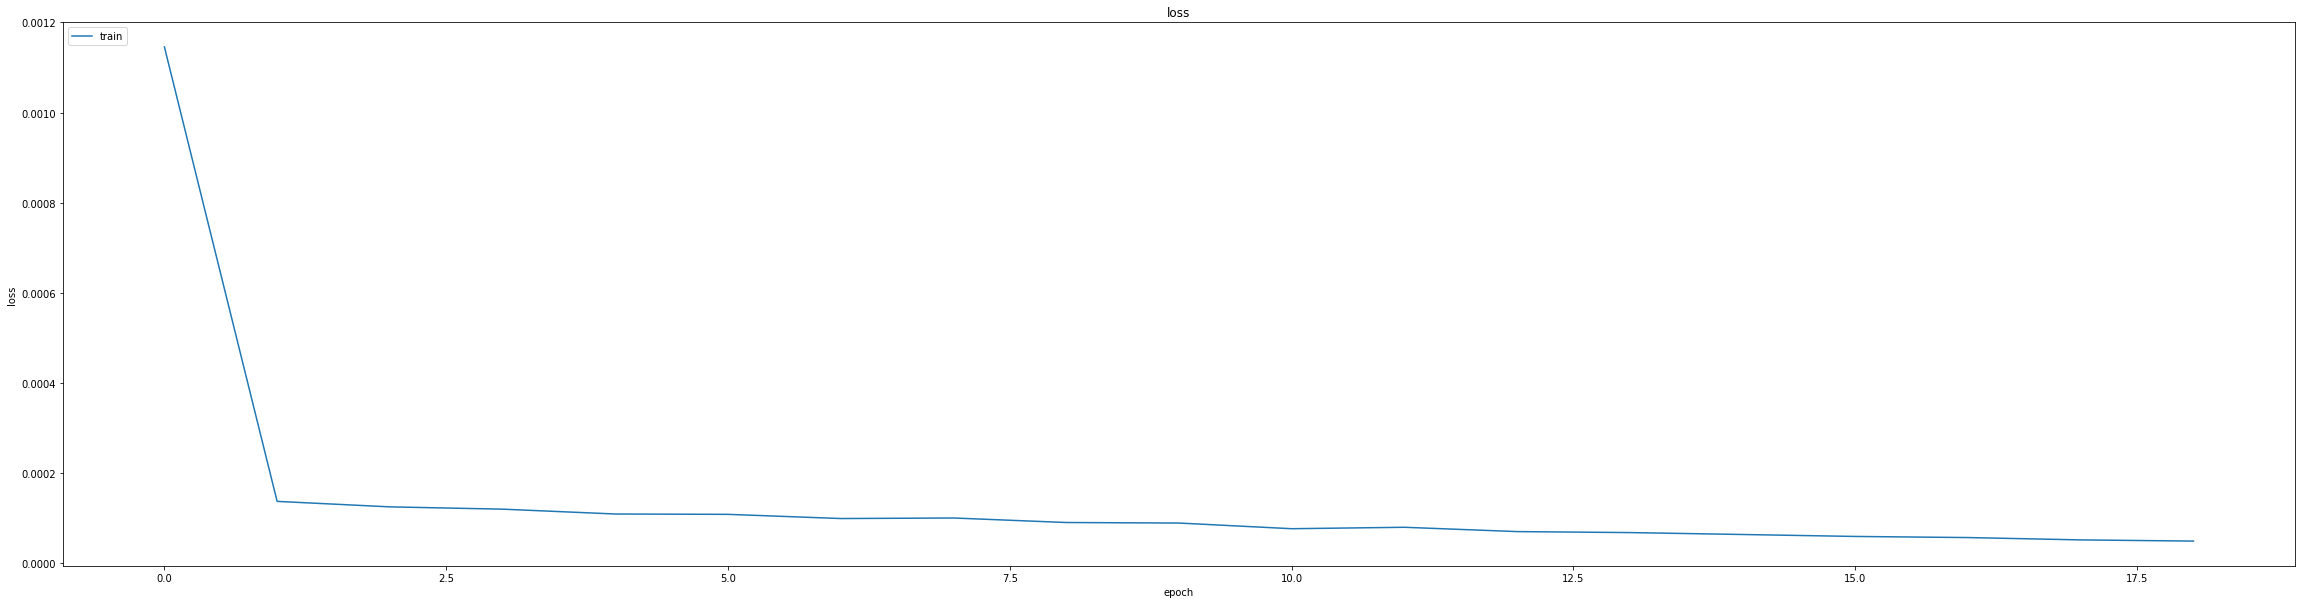

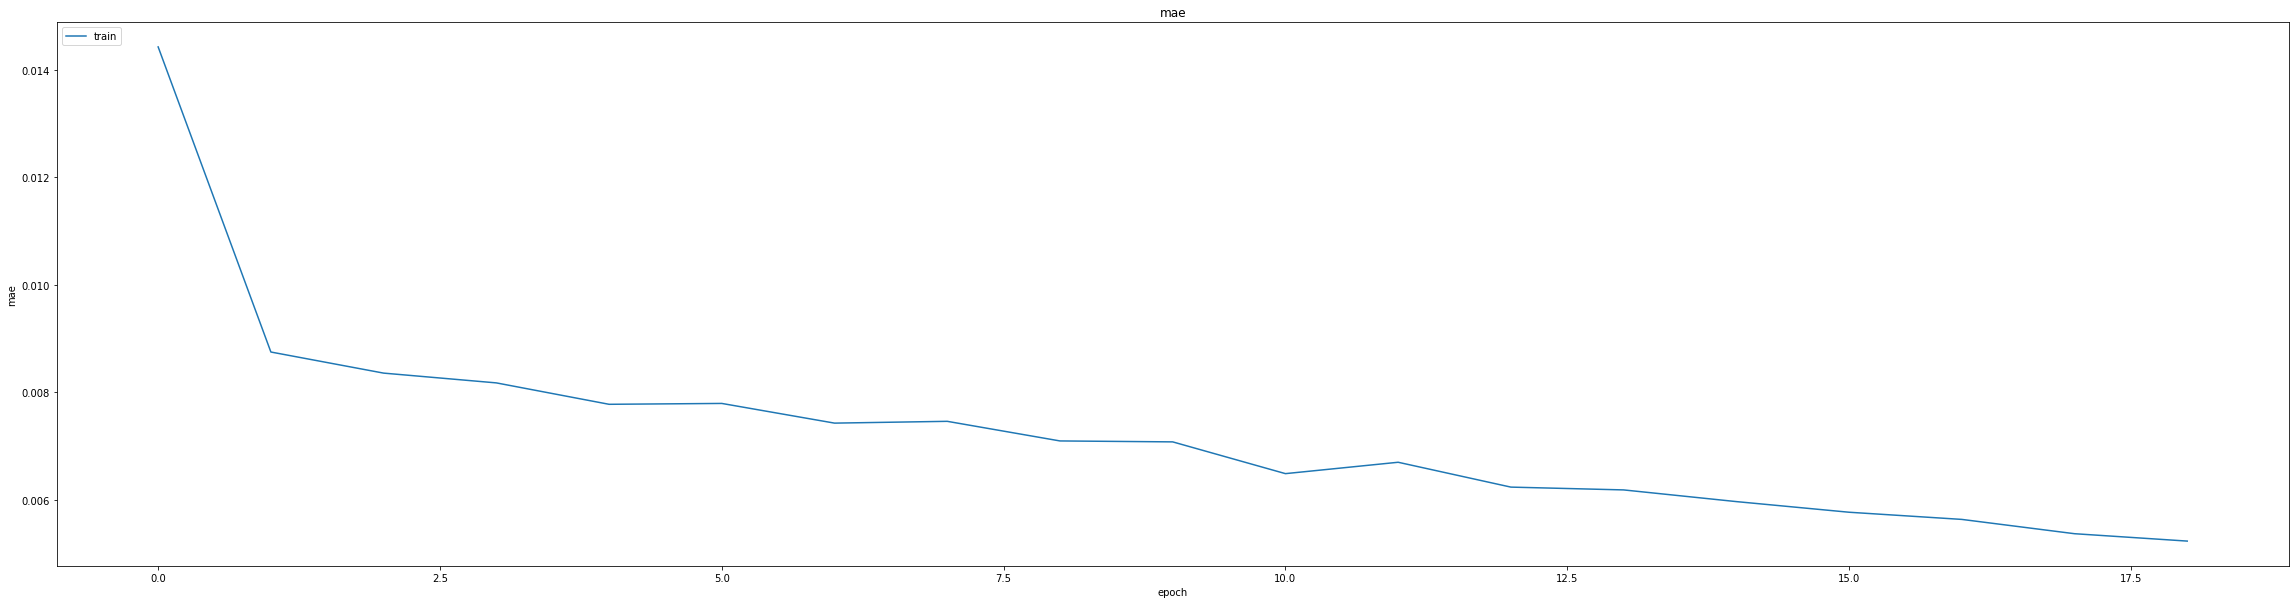

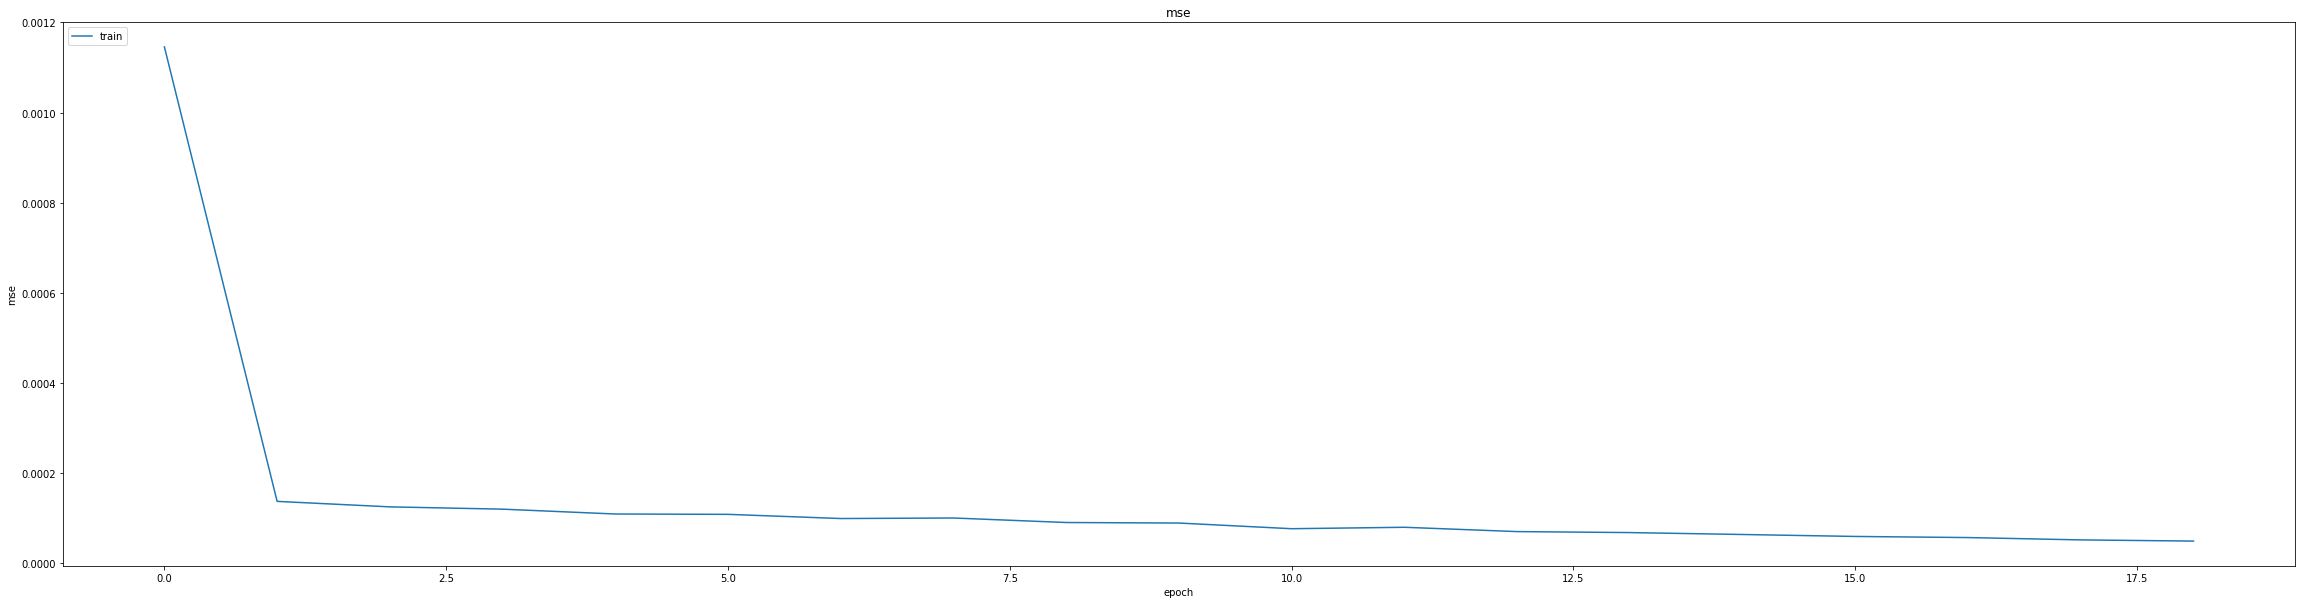

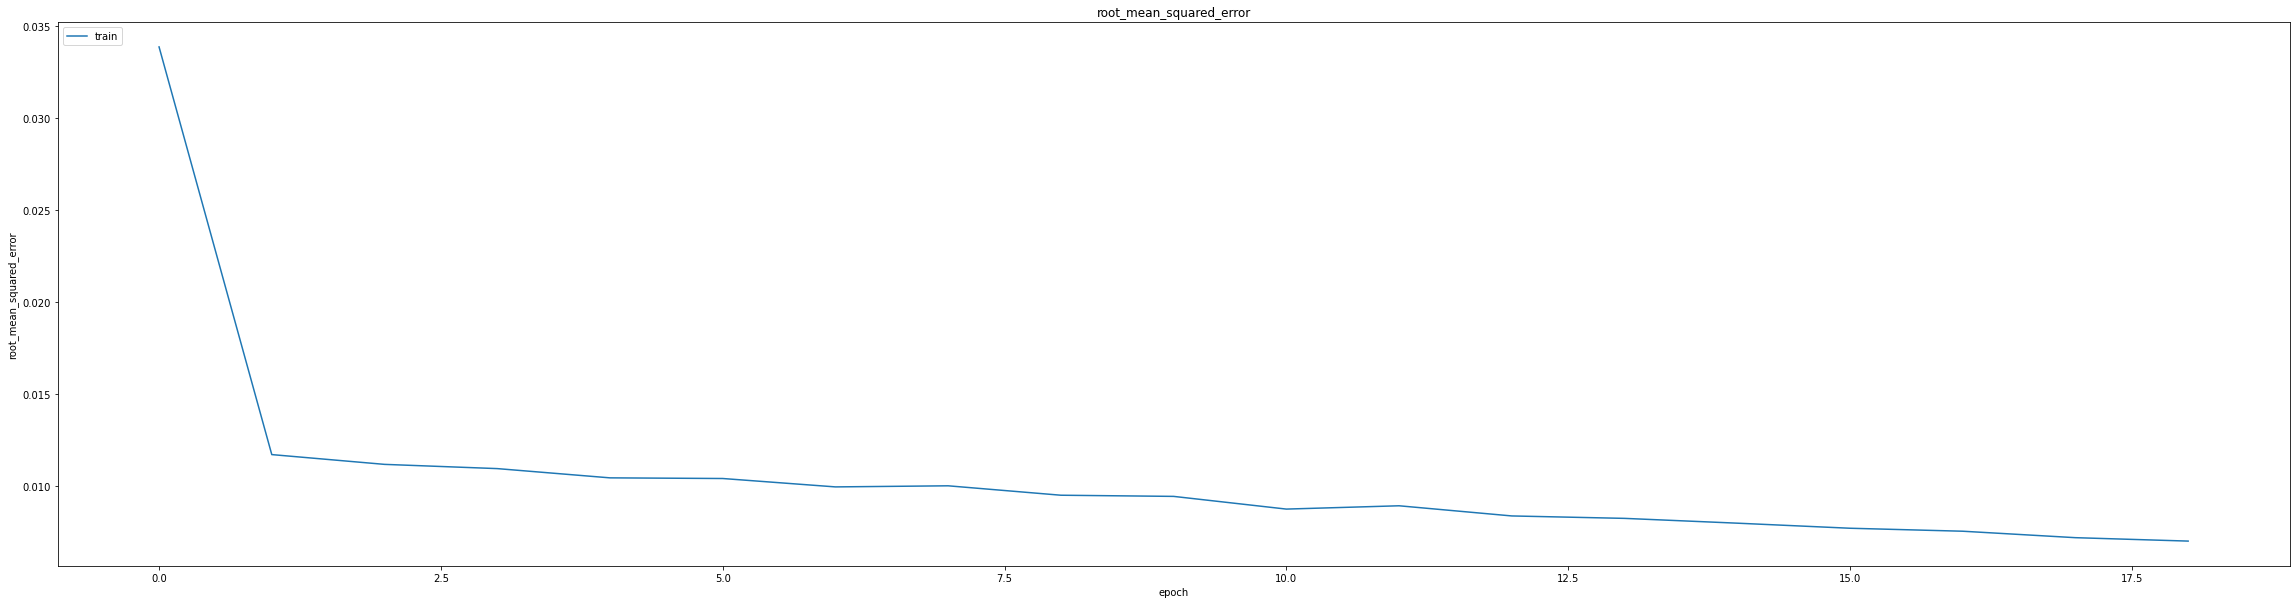

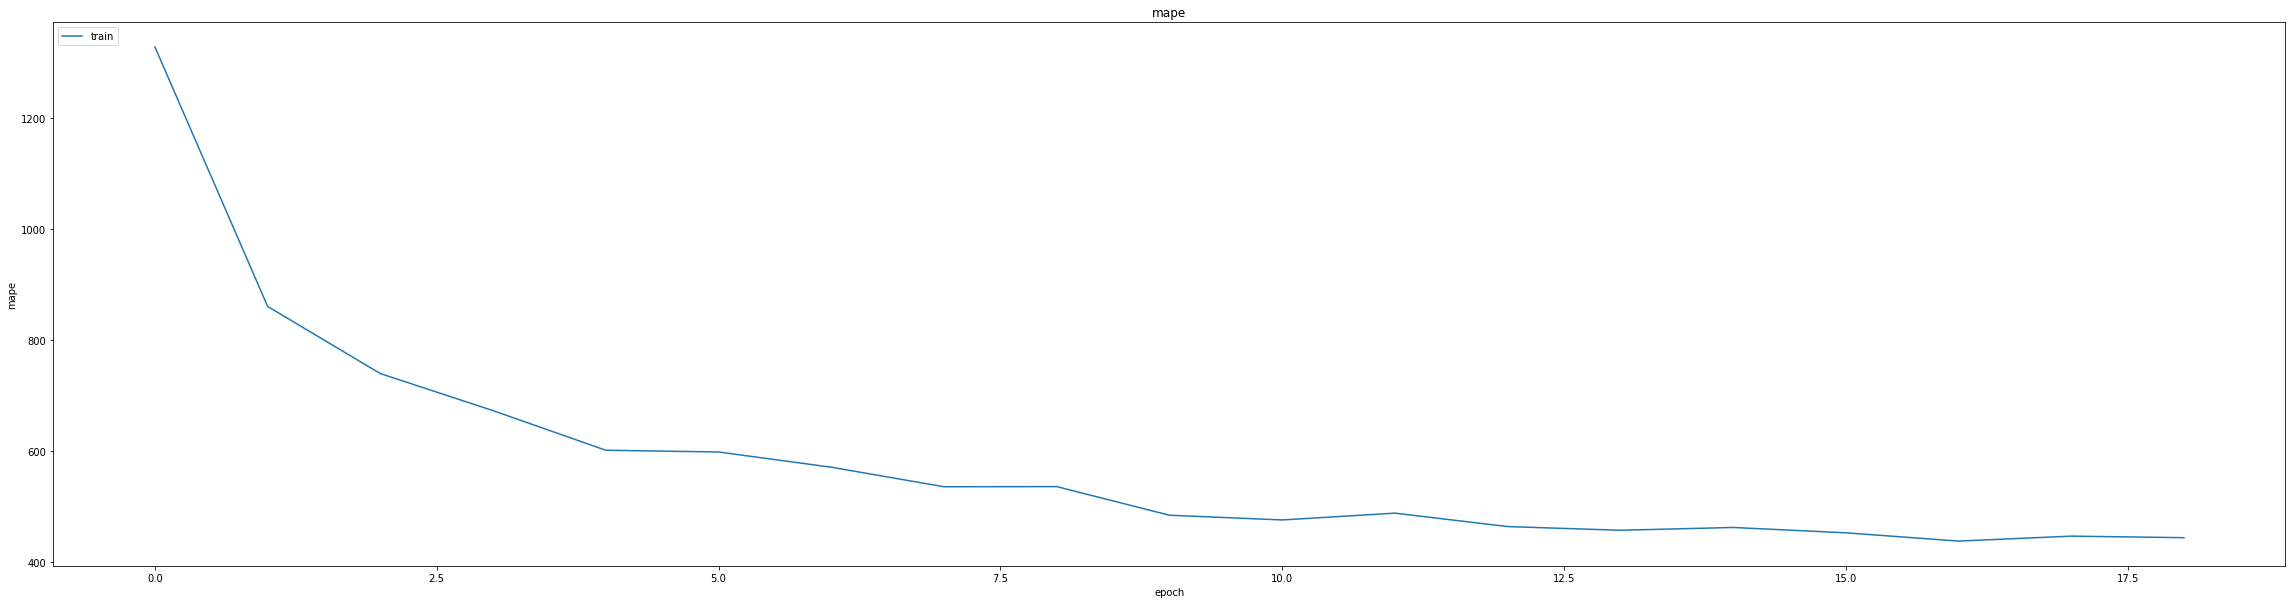

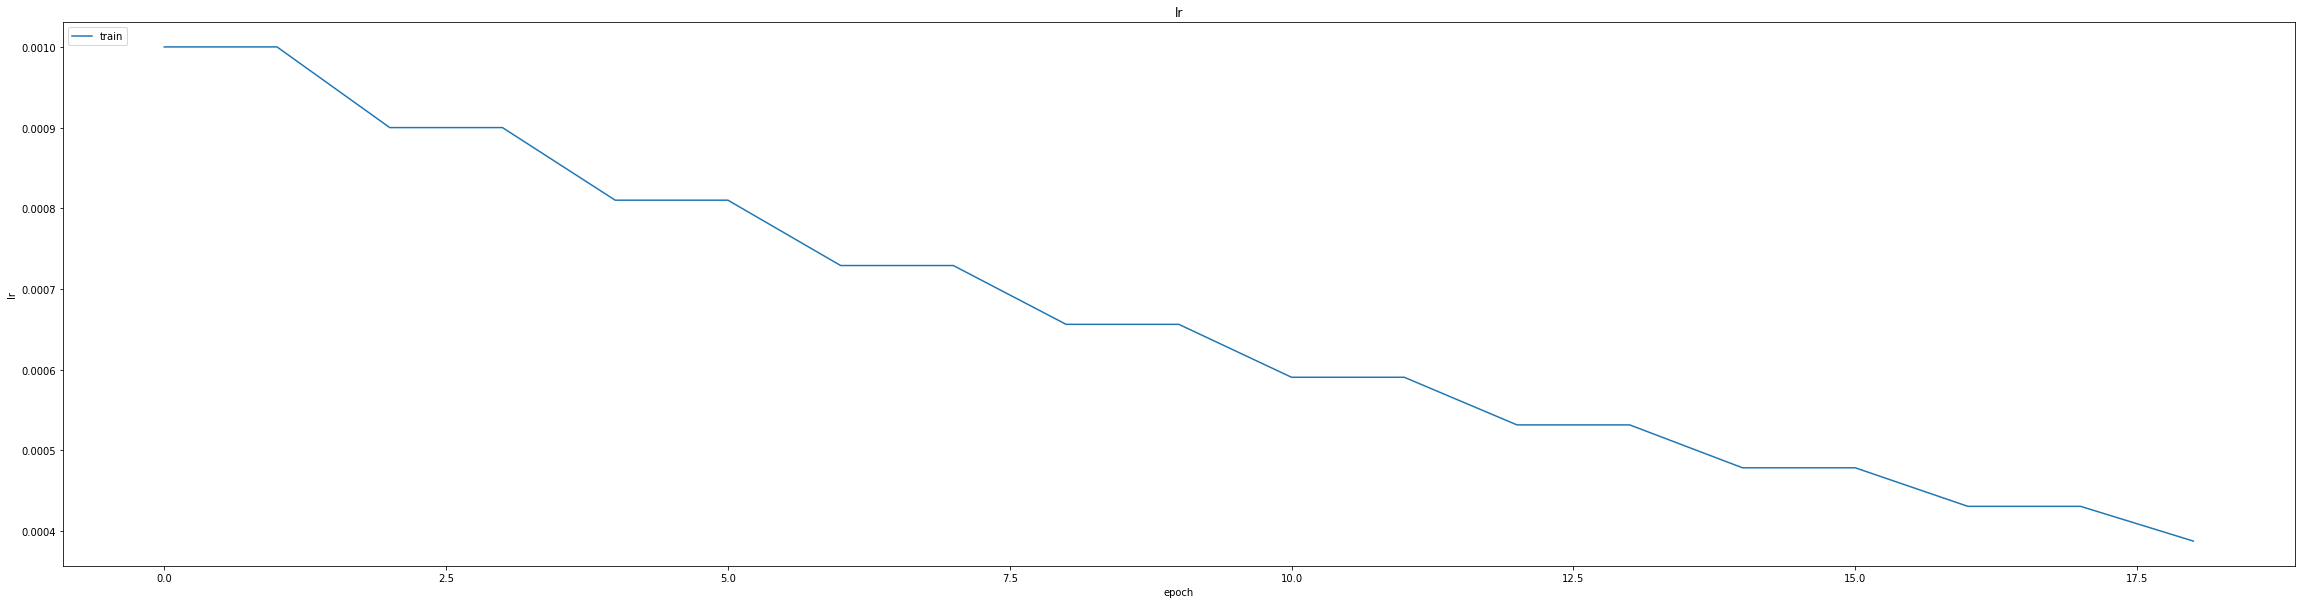

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.012461448088288307
0.013973080553114414
464/464 [==============================] - 3s 4ms/step
0.997388589607919


464/464 [==============================] - 2s 4ms/step


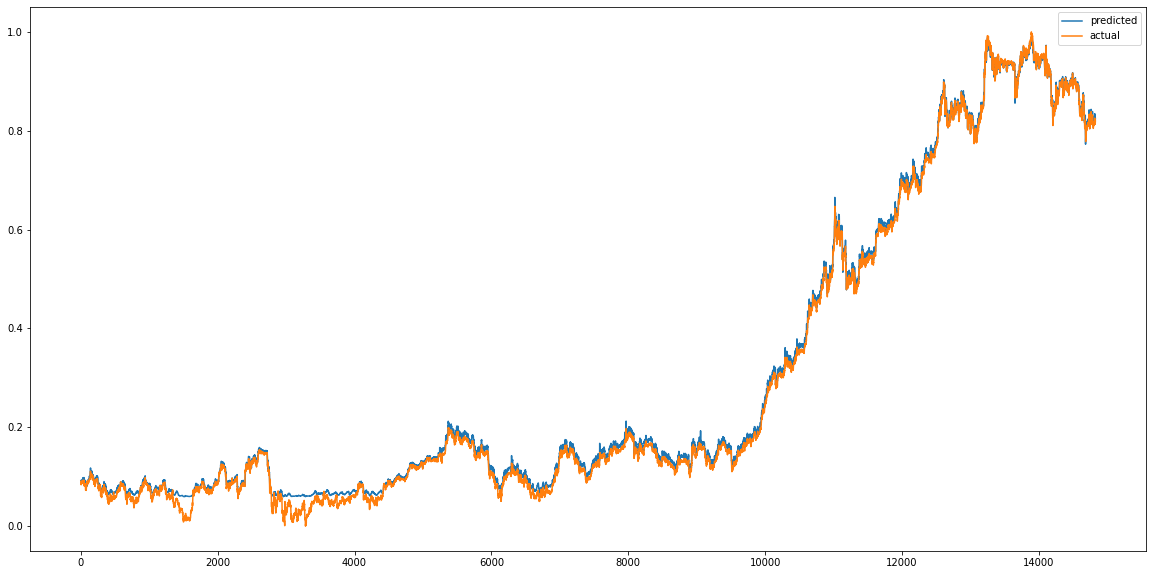

In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_LSTM(60-40)")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


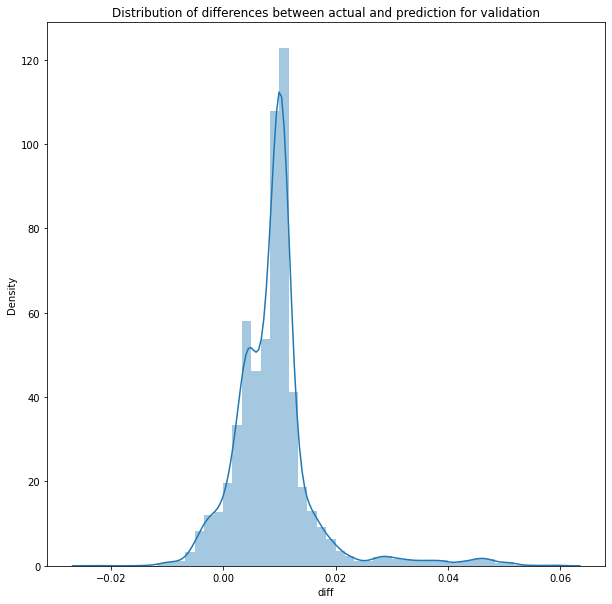

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


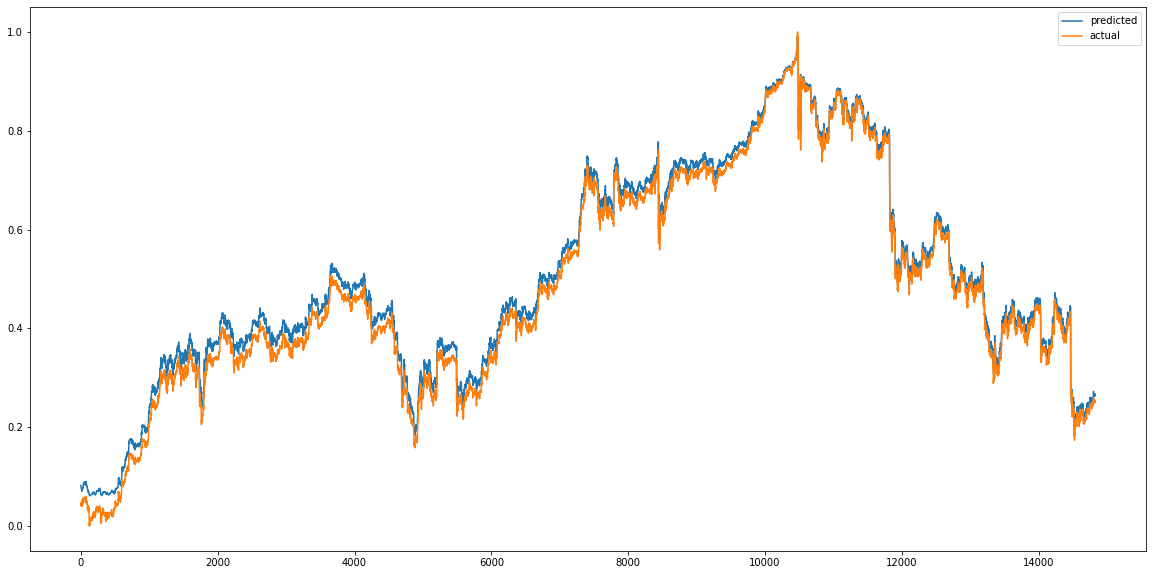

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


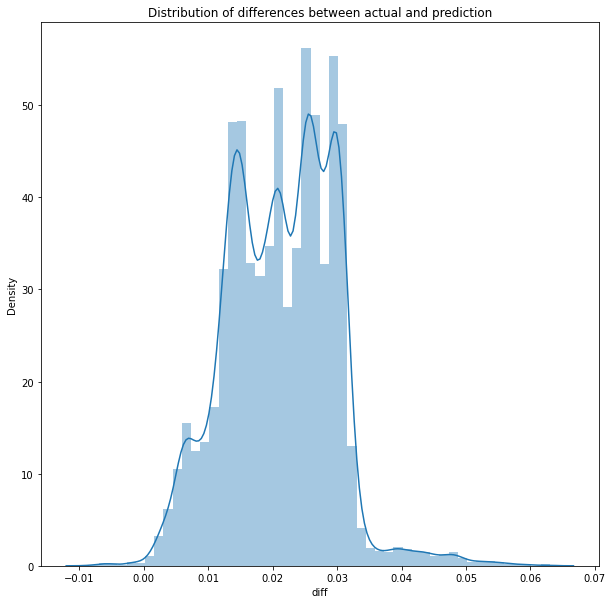

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.0005181432565761453
RMSE :  0.022762760302216103
MAE :  0.021195860611516525
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9892557460818573


count    14828.000000
mean         0.021182
std          0.008335
min         -0.008384
25%          0.014861
50%          0.021330
75%          0.027219
max          0.063017
Name: diff, dtype: float64

**GRU_MODEL**



In [ ]:
model= thesis.GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 24, 256)           207360    
                                                                 
 gru_1 (GRU)                 (None, 24, 64)            61824     
                                                                 
 dropout (Dropout)           (None, 24, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 16)                3936      
                                                                 
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
346/348 [============================>.] - ETA: 0s - loss: 377.6891 - mae: 5.5627 - mse: 377.6891 - root_mean_squared_error: 19.4342 - mape: 72954.3359
Epoch 1: val_mse improved from inf to 0.54445, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 24s 43ms/step - loss: 375.6300 - mae: 5.5354 - mse: 375.6300 - root_mean_squared_error: 19.3812 - mape: 72557.1172 - val_loss: 0.5444 - val_mae: 0.6716 - val_mse: 0.5444 - val_root_mean_squared_error: 0.7379 - val_mape: 66086.4141
Epoch 2/75
345/348 [============================>.] - ETA: 0s - loss: 0.1301 - mae: 0.2991 - mse: 0.1301 - root_mean_squared_error: 0.3608 - mape: 20850.2266
Epoch 2: val_mse improved from 0.54445 to 0.17011, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 20s 58ms/step - loss: 0.1295 - mae: 0.2981 - mse: 0.1295 - root_mean_squared_error: 0.3599 - mape: 20677.0254 - val_loss: 0.1701 - val_mae: 0.3870 - val_mse: 0.1701 - val_root_mean_squared_error: 0.4124 - val_mape: 39105.7617
Epoch 3/75
346/348 [============================>.] - ETA: 0s - loss: 0.0407 - mae: 0.1647 - mse: 0.0407 - root_mean_squared_error: 0.2017 - mape: 12696.3584
Epoch 3: val_mse improved from 0.17011 to 0.12735, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 19s 55ms/step - loss: 0.0407 - mae: 0.1646 - mse: 0.0407 - root_mean_squared_error: 0.2016 - mape: 12627.3213 - val_loss: 0.1273 - val_mae: 0.3393 - val_mse: 0.1273 - val_root_mean_squared_error: 0.3569 - val_mape: 32763.4023
Epoch 4/75
343/348 [============================>.] - ETA: 0s - loss: 0.0347 - mae: 0.1582 - mse: 0.0347 - root_mean_squared_error: 0.1863 - mape: 11172.1875
Epoch 4: val_mse improved from 0.12735 to 0.11838, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 18s 51ms/step - loss: 0.0347 - mae: 0.1582 - mse: 0.0347 - root_mean_squared_error: 0.1862 - mape: 11015.5596 - val_loss: 0.1184 - val_mae: 0.3272 - val_mse: 0.1184 - val_root_mean_squared_error: 0.3441 - val_mape: 30971.1465
Epoch 5/75
347/348 [============================>.] - ETA: 0s - loss: 0.0343 - mae: 0.1582 - mse: 0.0343 - root_mean_squared_error: 0.1852 - mape: 10791.5342
Epoch 5: val_mse improved from 0.11838 to 0.11634, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 0.0343 - mae: 0.1582 - mse: 0.0343 - root_mean_squared_error: 0.1851 - mape: 10763.7861 - val_loss: 0.1163 - val_mae: 0.3243 - val_mse: 0.1163 - val_root_mean_squared_error: 0.3411 - val_mape: 30520.8281
Epoch 6/75
347/348 [============================>.] - ETA: 0s - loss: 0.0341 - mae: 0.1579 - mse: 0.0341 - root_mean_squared_error: 0.1847 - mape: 10703.3291
Epoch 6: val_mse improved from 0.11634 to 0.11622, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 0.0341 - mae: 0.1579 - mse: 0.0341 - root_mean_squared_error: 0.1847 - mape: 10675.7969 - val_loss: 0.1162 - val_mae: 0.3241 - val_mse: 0.1162 - val_root_mean_squared_error: 0.3409 - val_mape: 30494.0312
Epoch 7/75
345/348 [============================>.] - ETA: 0s - loss: 0.0342 - mae: 0.1579 - mse: 0.0342 - root_mean_squared_error: 0.1848 - mape: 11071.8242
Epoch 7: val_mse improved from 0.11622 to 0.11592, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0341 - mae: 0.1579 - mse: 0.0341 - root_mean_squared_error: 0.1848 - mape: 10979.9375 - val_loss: 0.1159 - val_mae: 0.3236 - val_mse: 0.1159 - val_root_mean_squared_error: 0.3405 - val_mape: 30428.0801
Epoch 8/75
346/348 [============================>.] - ETA: 0s - loss: 0.0341 - mae: 0.1580 - mse: 0.0341 - root_mean_squared_error: 0.1847 - mape: 11630.5068
Epoch 8: val_mse did not improve from 0.11592
348/348 [==============================] - 4s 12ms/step - loss: 0.0341 - mae: 0.1580 - mse: 0.0341 - root_mean_squared_error: 0.1847 - mape: 11567.2832 - val_loss: 0.1159 - val_mae: 0.3236 - val_mse: 0.1159 - val_root_mean_squared_error: 0.3405 - val_mape: 30432.9688
Epoch 9/75
346/348 [============================>.] - ETA: 0s - loss: 0.0341 - mae: 0.1580 - mse: 0.0341 - root_mean_squared_error: 0.1847 - mape: 10772.5010
Epoch 9: val_mse did not improve from 0.11592
348/348 [==============================] - 4s 11ms/step

348/348 [==============================] - 14s 41ms/step - loss: 0.0341 - mae: 0.1580 - mse: 0.0341 - root_mean_squared_error: 0.1845 - mape: 11612.0322 - val_loss: 0.1159 - val_mae: 0.3236 - val_mse: 0.1159 - val_root_mean_squared_error: 0.3404 - val_mape: 30429.2695
Epoch 11/75
347/348 [============================>.] - ETA: 0s - loss: 0.0340 - mae: 0.1578 - mse: 0.0340 - root_mean_squared_error: 0.1844 - mape: 10915.3721
Epoch 11: val_mse did not improve from 0.11588
348/348 [==============================] - 4s 12ms/step - loss: 0.0340 - mae: 0.1578 - mse: 0.0340 - root_mean_squared_error: 0.1844 - mape: 10887.2871 - val_loss: 0.1161 - val_mae: 0.3240 - val_mse: 0.1161 - val_root_mean_squared_error: 0.3408 - val_mape: 30493.9824
Epoch 12/75
343/348 [============================>.] - ETA: 0s - loss: 0.0340 - mae: 0.1577 - mse: 0.0340 - root_mean_squared_error: 0.1844 - mape: 10585.6914
Epoch 12: val_mse did not improve from 0.11588
348/348 [==============================] - 4s 11ms/

348/348 [==============================] - 15s 43ms/step - loss: 0.0339 - mae: 0.1578 - mse: 0.0339 - root_mean_squared_error: 0.1842 - mape: 11215.6133 - val_loss: 0.1157 - val_mae: 0.3234 - val_mse: 0.1157 - val_root_mean_squared_error: 0.3402 - val_mape: 30415.1543
Epoch 15/75
346/348 [============================>.] - ETA: 0s - loss: 0.0337 - mae: 0.1572 - mse: 0.0337 - root_mean_squared_error: 0.1837 - mape: 10619.0859
Epoch 15: val_mse did not improve from 0.11573
348/348 [==============================] - 4s 12ms/step - loss: 0.0337 - mae: 0.1573 - mse: 0.0337 - root_mean_squared_error: 0.1837 - mape: 10561.3750 - val_loss: 0.1158 - val_mae: 0.3235 - val_mse: 0.1158 - val_root_mean_squared_error: 0.3403 - val_mape: 30466.6504
Epoch 16/75
343/348 [============================>.] - ETA: 0s - loss: 0.0336 - mae: 0.1570 - mse: 0.0336 - root_mean_squared_error: 0.1833 - mape: 10546.8604
Epoch 16: val_mse did not improve from 0.11573
348/348 [==============================] - 5s 13ms/

348/348 [==============================] - 14s 40ms/step - loss: 0.0333 - mae: 0.1564 - mse: 0.0333 - root_mean_squared_error: 0.1825 - mape: 10645.0957 - val_loss: 0.1154 - val_mae: 0.3230 - val_mse: 0.1154 - val_root_mean_squared_error: 0.3397 - val_mape: 30493.2324
Epoch 19/75
348/348 [==============================] - ETA: 0s - loss: 0.0330 - mae: 0.1557 - mse: 0.0330 - root_mean_squared_error: 0.1818 - mape: 10681.4434
Epoch 19: val_mse improved from 0.11543 to 0.11474, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0330 - mae: 0.1557 - mse: 0.0330 - root_mean_squared_error: 0.1818 - mape: 10681.4434 - val_loss: 0.1147 - val_mae: 0.3221 - val_mse: 0.1147 - val_root_mean_squared_error: 0.3387 - val_mape: 30411.9434
Epoch 20/75
343/348 [============================>.] - ETA: 0s - loss: 0.0326 - mae: 0.1546 - mse: 0.0326 - root_mean_squared_error: 0.1806 - mape: 10256.6338
Epoch 20: val_mse improved from 0.11474 to 0.11141, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0326 - mae: 0.1547 - mse: 0.0326 - root_mean_squared_error: 0.1807 - mape: 10112.8486 - val_loss: 0.1114 - val_mae: 0.3171 - val_mse: 0.1114 - val_root_mean_squared_error: 0.3338 - val_mape: 29767.6914
Epoch 21/75
345/348 [============================>.] - ETA: 0s - loss: 0.0318 - mae: 0.1525 - mse: 0.0318 - root_mean_squared_error: 0.1784 - mape: 10249.9395
Epoch 21: val_mse improved from 0.11141 to 0.10900, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0318 - mae: 0.1525 - mse: 0.0318 - root_mean_squared_error: 0.1784 - mape: 10164.8926 - val_loss: 0.1090 - val_mae: 0.3137 - val_mse: 0.1090 - val_root_mean_squared_error: 0.3302 - val_mape: 29665.2188
Epoch 22/75
345/348 [============================>.] - ETA: 0s - loss: 0.0286 - mae: 0.1438 - mse: 0.0286 - root_mean_squared_error: 0.1692 - mape: 10598.2998
Epoch 22: val_mse improved from 0.10900 to 0.09466, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0286 - mae: 0.1437 - mse: 0.0286 - root_mean_squared_error: 0.1691 - mape: 10510.3076 - val_loss: 0.0947 - val_mae: 0.2913 - val_mse: 0.0947 - val_root_mean_squared_error: 0.3077 - val_mape: 27677.8945
Epoch 23/75
345/348 [============================>.] - ETA: 0s - loss: 0.0173 - mae: 0.1049 - mse: 0.0173 - root_mean_squared_error: 0.1315 - mape: 9785.1201
Epoch 23: val_mse improved from 0.09466 to 0.03965, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 0.0172 - mae: 0.1046 - mse: 0.0172 - root_mean_squared_error: 0.1312 - mape: 9703.7627 - val_loss: 0.0396 - val_mae: 0.1839 - val_mse: 0.0396 - val_root_mean_squared_error: 0.1991 - val_mape: 20206.7422
Epoch 24/75
347/348 [============================>.] - ETA: 0s - loss: 0.0038 - mae: 0.0467 - mse: 0.0038 - root_mean_squared_error: 0.0620 - mape: 6189.6094
Epoch 24: val_mse improved from 0.03965 to 0.01370, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 0.0038 - mae: 0.0467 - mse: 0.0038 - root_mean_squared_error: 0.0620 - mape: 6173.6479 - val_loss: 0.0137 - val_mae: 0.1056 - val_mse: 0.0137 - val_root_mean_squared_error: 0.1170 - val_mape: 15032.7881
Epoch 25/75
343/348 [============================>.] - ETA: 0s - loss: 0.0019 - mae: 0.0334 - mse: 0.0019 - root_mean_squared_error: 0.0439 - mape: 5461.6143
Epoch 25: val_mse improved from 0.01370 to 0.01007, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 0.0019 - mae: 0.0334 - mse: 0.0019 - root_mean_squared_error: 0.0438 - mape: 5384.8311 - val_loss: 0.0101 - val_mae: 0.0891 - val_mse: 0.0101 - val_root_mean_squared_error: 0.1003 - val_mape: 13661.4932
Epoch 26/75
346/348 [============================>.] - ETA: 0s - loss: 0.0014 - mae: 0.0284 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 4679.0571
Epoch 26: val_mse improved from 0.01007 to 0.00741, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0014 - mae: 0.0284 - mse: 0.0014 - root_mean_squared_error: 0.0373 - mape: 4653.5610 - val_loss: 0.0074 - val_mae: 0.0755 - val_mse: 0.0074 - val_root_mean_squared_error: 0.0861 - val_mape: 12555.7998
Epoch 27/75
345/348 [============================>.] - ETA: 0s - loss: 0.0012 - mae: 0.0260 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 4095.7134
Epoch 27: val_mse improved from 0.00741 to 0.00608, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 42ms/step - loss: 0.0012 - mae: 0.0260 - mse: 0.0012 - root_mean_squared_error: 0.0342 - mape: 4061.6372 - val_loss: 0.0061 - val_mae: 0.0665 - val_mse: 0.0061 - val_root_mean_squared_error: 0.0780 - val_mape: 11920.7148
Epoch 28/75
347/348 [============================>.] - ETA: 0s - loss: 0.0010 - mae: 0.0241 - mse: 0.0010 - root_mean_squared_error: 0.0318 - mape: 4081.5605
Epoch 28: val_mse improved from 0.00608 to 0.00560, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 0.0010 - mae: 0.0241 - mse: 0.0010 - root_mean_squared_error: 0.0318 - mape: 4071.0339 - val_loss: 0.0056 - val_mae: 0.0635 - val_mse: 0.0056 - val_root_mean_squared_error: 0.0748 - val_mape: 11627.8701
Epoch 29/75
345/348 [============================>.] - ETA: 0s - loss: 8.8394e-04 - mae: 0.0225 - mse: 8.8394e-04 - root_mean_squared_error: 0.0297 - mape: 3916.2649
Epoch 29: val_mse improved from 0.00560 to 0.00485, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 8.8549e-04 - mae: 0.0225 - mse: 8.8549e-04 - root_mean_squared_error: 0.0298 - mape: 3883.6885 - val_loss: 0.0048 - val_mae: 0.0584 - val_mse: 0.0048 - val_root_mean_squared_error: 0.0696 - val_mape: 11160.1719
Epoch 30/75
347/348 [============================>.] - ETA: 0s - loss: 8.0514e-04 - mae: 0.0214 - mse: 8.0514e-04 - root_mean_squared_error: 0.0284 - mape: 4237.6631
Epoch 30: val_mse improved from 0.00485 to 0.00443, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 8.0558e-04 - mae: 0.0214 - mse: 8.0558e-04 - root_mean_squared_error: 0.0284 - mape: 4226.7344 - val_loss: 0.0044 - val_mae: 0.0546 - val_mse: 0.0044 - val_root_mean_squared_error: 0.0666 - val_mape: 10988.5088
Epoch 31/75
347/348 [============================>.] - ETA: 0s - loss: 7.4740e-04 - mae: 0.0206 - mse: 7.4740e-04 - root_mean_squared_error: 0.0273 - mape: 3990.0303
Epoch 31: val_mse improved from 0.00443 to 0.00410, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 7.4799e-04 - mae: 0.0206 - mse: 7.4799e-04 - root_mean_squared_error: 0.0273 - mape: 3979.7427 - val_loss: 0.0041 - val_mae: 0.0519 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0641 - val_mape: 10796.8682
Epoch 32/75
345/348 [============================>.] - ETA: 0s - loss: 7.0328e-04 - mae: 0.0199 - mse: 7.0328e-04 - root_mean_squared_error: 0.0265 - mape: 3704.4192
Epoch 32: val_mse improved from 0.00410 to 0.00408, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 44ms/step - loss: 7.0306e-04 - mae: 0.0199 - mse: 7.0306e-04 - root_mean_squared_error: 0.0265 - mape: 3673.5969 - val_loss: 0.0041 - val_mae: 0.0528 - val_mse: 0.0041 - val_root_mean_squared_error: 0.0639 - val_mape: 10602.9160
Epoch 33/75
348/348 [==============================] - ETA: 0s - loss: 6.6509e-04 - mae: 0.0193 - mse: 6.6509e-04 - root_mean_squared_error: 0.0258 - mape: 3724.6040
Epoch 33: val_mse improved from 0.00408 to 0.00359, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 6.6509e-04 - mae: 0.0193 - mse: 6.6509e-04 - root_mean_squared_error: 0.0258 - mape: 3724.6040 - val_loss: 0.0036 - val_mae: 0.0482 - val_mse: 0.0036 - val_root_mean_squared_error: 0.0599 - val_mape: 10387.2656
Epoch 34/75
346/348 [============================>.] - ETA: 0s - loss: 6.2518e-04 - mae: 0.0187 - mse: 6.2518e-04 - root_mean_squared_error: 0.0250 - mape: 3798.6023
Epoch 34: val_mse improved from 0.00359 to 0.00347, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 6.2532e-04 - mae: 0.0187 - mse: 6.2532e-04 - root_mean_squared_error: 0.0250 - mape: 3777.9028 - val_loss: 0.0035 - val_mae: 0.0475 - val_mse: 0.0035 - val_root_mean_squared_error: 0.0589 - val_mape: 10265.7930
Epoch 35/75
347/348 [============================>.] - ETA: 0s - loss: 5.8166e-04 - mae: 0.0180 - mse: 5.8166e-04 - root_mean_squared_error: 0.0241 - mape: 3478.8672
Epoch 35: val_mse improved from 0.00347 to 0.00324, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 5.8206e-04 - mae: 0.0180 - mse: 5.8206e-04 - root_mean_squared_error: 0.0241 - mape: 3469.8989 - val_loss: 0.0032 - val_mae: 0.0454 - val_mse: 0.0032 - val_root_mean_squared_error: 0.0569 - val_mape: 10088.7861
Epoch 36/75
348/348 [==============================] - ETA: 0s - loss: 5.7249e-04 - mae: 0.0178 - mse: 5.7249e-04 - root_mean_squared_error: 0.0239 - mape: 3706.2971
Epoch 36: val_mse improved from 0.00324 to 0.00309, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 5.7249e-04 - mae: 0.0178 - mse: 5.7249e-04 - root_mean_squared_error: 0.0239 - mape: 3706.2971 - val_loss: 0.0031 - val_mae: 0.0443 - val_mse: 0.0031 - val_root_mean_squared_error: 0.0556 - val_mape: 9998.2979
Epoch 37/75
346/348 [============================>.] - ETA: 0s - loss: 5.3610e-04 - mae: 0.0172 - mse: 5.3610e-04 - root_mean_squared_error: 0.0232 - mape: 3591.7295
Epoch 37: val_mse improved from 0.00309 to 0.00299, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 5.3640e-04 - mae: 0.0172 - mse: 5.3640e-04 - root_mean_squared_error: 0.0232 - mape: 3572.1521 - val_loss: 0.0030 - val_mae: 0.0438 - val_mse: 0.0030 - val_root_mean_squared_error: 0.0546 - val_mape: 9826.3418
Epoch 38/75
347/348 [============================>.] - ETA: 0s - loss: 5.0020e-04 - mae: 0.0166 - mse: 5.0020e-04 - root_mean_squared_error: 0.0224 - mape: 3531.2256
Epoch 38: val_mse improved from 0.00299 to 0.00269, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 39ms/step - loss: 5.0001e-04 - mae: 0.0166 - mse: 5.0001e-04 - root_mean_squared_error: 0.0224 - mape: 3522.1167 - val_loss: 0.0027 - val_mae: 0.0403 - val_mse: 0.0027 - val_root_mean_squared_error: 0.0518 - val_mape: 9660.9180
Epoch 39/75
347/348 [============================>.] - ETA: 0s - loss: 4.7791e-04 - mae: 0.0162 - mse: 4.7791e-04 - root_mean_squared_error: 0.0219 - mape: 3246.8652
Epoch 39: val_mse did not improve from 0.00269
348/348 [==============================] - 4s 12ms/step - loss: 4.7780e-04 - mae: 0.0162 - mse: 4.7780e-04 - root_mean_squared_error: 0.0219 - mape: 3238.4905 - val_loss: 0.0028 - val_mae: 0.0432 - val_mse: 0.0028 - val_root_mean_squared_error: 0.0534 - val_mape: 9701.4844
Epoch 40/75
343/348 [============================>.] - ETA: 0s - loss: 4.7602e-04 - mae: 0.0161 - mse: 4.7602e-04 - root_mean_squared_error: 0.0218 - mape: 3421.4792
Epoch 40: val_mse did not improve from 0.00269
348/348 [================

348/348 [==============================] - 14s 41ms/step - loss: 4.4957e-04 - mae: 0.0156 - mse: 4.4957e-04 - root_mean_squared_error: 0.0212 - mape: 3407.8833 - val_loss: 0.0025 - val_mae: 0.0400 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0503 - val_mape: 9364.5127
Epoch 42/75
347/348 [============================>.] - ETA: 0s - loss: 4.2544e-04 - mae: 0.0151 - mse: 4.2544e-04 - root_mean_squared_error: 0.0206 - mape: 3278.5334
Epoch 42: val_mse did not improve from 0.00253
348/348 [==============================] - 4s 11ms/step - loss: 4.2562e-04 - mae: 0.0151 - mse: 4.2562e-04 - root_mean_squared_error: 0.0206 - mape: 3270.0769 - val_loss: 0.0025 - val_mae: 0.0409 - val_mse: 0.0025 - val_root_mean_squared_error: 0.0504 - val_mape: 9297.7812
Epoch 43/75
346/348 [============================>.] - ETA: 0s - loss: 4.2632e-04 - mae: 0.0152 - mse: 4.2632e-04 - root_mean_squared_error: 0.0206 - mape: 3176.3230
Epoch 43: val_mse improved from 0.00253 to 0.00227, saving model to /con

348/348 [==============================] - 14s 40ms/step - loss: 4.2617e-04 - mae: 0.0152 - mse: 4.2617e-04 - root_mean_squared_error: 0.0206 - mape: 3159.0093 - val_loss: 0.0023 - val_mae: 0.0372 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0476 - val_mape: 9159.5205
Epoch 44/75
343/348 [============================>.] - ETA: 0s - loss: 4.1659e-04 - mae: 0.0150 - mse: 4.1659e-04 - root_mean_squared_error: 0.0204 - mape: 3240.5010
Epoch 44: val_mse improved from 0.00227 to 0.00207, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 15s 43ms/step - loss: 4.1614e-04 - mae: 0.0150 - mse: 4.1614e-04 - root_mean_squared_error: 0.0204 - mape: 3194.9277 - val_loss: 0.0021 - val_mae: 0.0342 - val_mse: 0.0021 - val_root_mean_squared_error: 0.0455 - val_mape: 9030.9092
Epoch 45/75
345/348 [============================>.] - ETA: 0s - loss: 4.0229e-04 - mae: 0.0147 - mse: 4.0229e-04 - root_mean_squared_error: 0.0201 - mape: 3175.2981
Epoch 45: val_mse did not improve from 0.00207
348/348 [==============================] - 4s 11ms/step - loss: 4.0195e-04 - mae: 0.0147 - mse: 4.0195e-04 - root_mean_squared_error: 0.0200 - mape: 3148.8733 - val_loss: 0.0023 - val_mae: 0.0382 - val_mse: 0.0023 - val_root_mean_squared_error: 0.0477 - val_mape: 9036.9365
Epoch 46/75
347/348 [============================>.] - ETA: 0s - loss: 3.8390e-04 - mae: 0.0143 - mse: 3.8390e-04 - root_mean_squared_error: 0.0196 - mape: 3194.2058
Epoch 46: val_mse improved from 0.00207 to 0.00205, saving model to /con

348/348 [==============================] - 14s 40ms/step - loss: 3.8422e-04 - mae: 0.0143 - mse: 3.8422e-04 - root_mean_squared_error: 0.0196 - mape: 3185.9673 - val_loss: 0.0020 - val_mae: 0.0355 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0453 - val_mape: 8866.8330
Epoch 47/75
346/348 [============================>.] - ETA: 0s - loss: 3.7765e-04 - mae: 0.0143 - mse: 3.7765e-04 - root_mean_squared_error: 0.0194 - mape: 3253.4011
Epoch 47: val_mse improved from 0.00205 to 0.00197, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 3.7748e-04 - mae: 0.0143 - mse: 3.7748e-04 - root_mean_squared_error: 0.0194 - mape: 3235.6685 - val_loss: 0.0020 - val_mae: 0.0339 - val_mse: 0.0020 - val_root_mean_squared_error: 0.0444 - val_mape: 8842.3770
Epoch 48/75
348/348 [==============================] - ETA: 0s - loss: 3.5826e-04 - mae: 0.0138 - mse: 3.5826e-04 - root_mean_squared_error: 0.0189 - mape: 3039.9487
Epoch 48: val_mse improved from 0.00197 to 0.00185, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 3.5826e-04 - mae: 0.0138 - mse: 3.5826e-04 - root_mean_squared_error: 0.0189 - mape: 3039.9487 - val_loss: 0.0019 - val_mae: 0.0326 - val_mse: 0.0019 - val_root_mean_squared_error: 0.0430 - val_mape: 8704.5059
Epoch 49/75
347/348 [============================>.] - ETA: 0s - loss: 3.4759e-04 - mae: 0.0137 - mse: 3.4759e-04 - root_mean_squared_error: 0.0186 - mape: 3058.7202
Epoch 49: val_mse improved from 0.00185 to 0.00181, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 3.4751e-04 - mae: 0.0137 - mse: 3.4751e-04 - root_mean_squared_error: 0.0186 - mape: 3050.8293 - val_loss: 0.0018 - val_mae: 0.0318 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0425 - val_mape: 8659.1074
Epoch 50/75
346/348 [============================>.] - ETA: 0s - loss: 3.2962e-04 - mae: 0.0132 - mse: 3.2962e-04 - root_mean_squared_error: 0.0182 - mape: 2947.5603
Epoch 50: val_mse improved from 0.00181 to 0.00175, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 3.2915e-04 - mae: 0.0132 - mse: 3.2915e-04 - root_mean_squared_error: 0.0181 - mape: 2931.4934 - val_loss: 0.0018 - val_mae: 0.0317 - val_mse: 0.0018 - val_root_mean_squared_error: 0.0419 - val_mape: 8541.6436
Epoch 51/75
345/348 [============================>.] - ETA: 0s - loss: 3.1937e-04 - mae: 0.0131 - mse: 3.1937e-04 - root_mean_squared_error: 0.0179 - mape: 3061.8381
Epoch 51: val_mse improved from 0.00175 to 0.00173, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 3.1921e-04 - mae: 0.0131 - mse: 3.1921e-04 - root_mean_squared_error: 0.0179 - mape: 3036.3574 - val_loss: 0.0017 - val_mae: 0.0319 - val_mse: 0.0017 - val_root_mean_squared_error: 0.0416 - val_mape: 8470.5693
Epoch 52/75
346/348 [============================>.] - ETA: 0s - loss: 3.2689e-04 - mae: 0.0133 - mse: 3.2689e-04 - root_mean_squared_error: 0.0181 - mape: 2983.8706
Epoch 52: val_mse improved from 0.00173 to 0.00158, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 3.2655e-04 - mae: 0.0133 - mse: 3.2655e-04 - root_mean_squared_error: 0.0181 - mape: 2967.6042 - val_loss: 0.0016 - val_mae: 0.0297 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0398 - val_mape: 8311.9092
Epoch 53/75
345/348 [============================>.] - ETA: 0s - loss: 3.0072e-04 - mae: 0.0127 - mse: 3.0072e-04 - root_mean_squared_error: 0.0173 - mape: 3185.9446
Epoch 53: val_mse improved from 0.00158 to 0.00155, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 3.0069e-04 - mae: 0.0127 - mse: 3.0069e-04 - root_mean_squared_error: 0.0173 - mape: 3159.4277 - val_loss: 0.0016 - val_mae: 0.0299 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0394 - val_mape: 8224.9736
Epoch 54/75
345/348 [============================>.] - ETA: 0s - loss: 2.8746e-04 - mae: 0.0124 - mse: 2.8746e-04 - root_mean_squared_error: 0.0170 - mape: 2928.0354
Epoch 54: val_mse did not improve from 0.00155
348/348 [==============================] - 4s 11ms/step - loss: 2.8716e-04 - mae: 0.0124 - mse: 2.8716e-04 - root_mean_squared_error: 0.0169 - mape: 2903.6650 - val_loss: 0.0016 - val_mae: 0.0312 - val_mse: 0.0016 - val_root_mean_squared_error: 0.0400 - val_mape: 8202.4092
Epoch 55/75
344/348 [============================>.] - ETA: 0s - loss: 2.7644e-04 - mae: 0.0122 - mse: 2.7644e-04 - root_mean_squared_error: 0.0166 - mape: 3010.5635
Epoch 55: val_mse did not improve from 0.00155
348/348 [================

348/348 [==============================] - 14s 40ms/step - loss: 2.6488e-04 - mae: 0.0121 - mse: 2.6488e-04 - root_mean_squared_error: 0.0163 - mape: 2854.1653 - val_loss: 0.0014 - val_mae: 0.0271 - val_mse: 0.0014 - val_root_mean_squared_error: 0.0369 - val_mape: 7995.9268
Epoch 58/75
347/348 [============================>.] - ETA: 0s - loss: 2.7125e-04 - mae: 0.0123 - mse: 2.7125e-04 - root_mean_squared_error: 0.0165 - mape: 2789.8992
Epoch 58: val_mse did not improve from 0.00136
348/348 [==============================] - 5s 15ms/step - loss: 2.7107e-04 - mae: 0.0123 - mse: 2.7107e-04 - root_mean_squared_error: 0.0165 - mape: 2782.7014 - val_loss: 0.0015 - val_mae: 0.0286 - val_mse: 0.0015 - val_root_mean_squared_error: 0.0381 - val_mape: 8119.2593
Epoch 59/75
343/348 [============================>.] - ETA: 0s - loss: 2.3277e-04 - mae: 0.0113 - mse: 2.3277e-04 - root_mean_squared_error: 0.0153 - mape: 2901.0139
Epoch 59: val_mse did not improve from 0.00136
348/348 [================

348/348 [==============================] - 14s 40ms/step - loss: 2.2858e-04 - mae: 0.0112 - mse: 2.2858e-04 - root_mean_squared_error: 0.0151 - mape: 2862.2717 - val_loss: 0.0013 - val_mae: 0.0274 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0356 - val_mape: 7694.1133
Epoch 61/75
343/348 [============================>.] - ETA: 0s - loss: 2.2602e-04 - mae: 0.0111 - mse: 2.2602e-04 - root_mean_squared_error: 0.0150 - mape: 2836.5220
Epoch 61: val_mse did not improve from 0.00126
348/348 [==============================] - 4s 11ms/step - loss: 2.2555e-04 - mae: 0.0111 - mse: 2.2555e-04 - root_mean_squared_error: 0.0150 - mape: 2796.6206 - val_loss: 0.0013 - val_mae: 0.0276 - val_mse: 0.0013 - val_root_mean_squared_error: 0.0357 - val_mape: 7750.7427
Epoch 62/75
344/348 [============================>.] - ETA: 0s - loss: 2.0660e-04 - mae: 0.0107 - mse: 2.0660e-04 - root_mean_squared_error: 0.0144 - mape: 2744.9622
Epoch 62: val_mse improved from 0.00126 to 0.00120, saving model to /con

348/348 [==============================] - 14s 40ms/step - loss: 2.0625e-04 - mae: 0.0107 - mse: 2.0625e-04 - root_mean_squared_error: 0.0144 - mape: 2714.2292 - val_loss: 0.0012 - val_mae: 0.0263 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0347 - val_mape: 7672.4688
Epoch 63/75
345/348 [============================>.] - ETA: 0s - loss: 1.9630e-04 - mae: 0.0104 - mse: 1.9630e-04 - root_mean_squared_error: 0.0140 - mape: 2677.3943
Epoch 63: val_mse improved from 0.00120 to 0.00107, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 1.9738e-04 - mae: 0.0104 - mse: 1.9738e-04 - root_mean_squared_error: 0.0140 - mape: 2655.1169 - val_loss: 0.0011 - val_mae: 0.0238 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0327 - val_mape: 7524.2329
Epoch 64/75
348/348 [==============================] - ETA: 0s - loss: 2.0069e-04 - mae: 0.0106 - mse: 2.0069e-04 - root_mean_squared_error: 0.0142 - mape: 2759.4285
Epoch 64: val_mse did not improve from 0.00107
348/348 [==============================] - 4s 12ms/step - loss: 2.0069e-04 - mae: 0.0106 - mse: 2.0069e-04 - root_mean_squared_error: 0.0142 - mape: 2759.4285 - val_loss: 0.0012 - val_mae: 0.0269 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 7587.4150
Epoch 65/75
345/348 [============================>.] - ETA: 0s - loss: 1.9301e-04 - mae: 0.0103 - mse: 1.9301e-04 - root_mean_squared_error: 0.0139 - mape: 2992.3606
Epoch 65: val_mse did not improve from 0.00107
348/348 [================

348/348 [==============================] - 14s 41ms/step - loss: 1.8146e-04 - mae: 0.0100 - mse: 1.8146e-04 - root_mean_squared_error: 0.0135 - mape: 2732.7646 - val_loss: 0.0010 - val_mae: 0.0237 - val_mse: 0.0010 - val_root_mean_squared_error: 0.0321 - val_mape: 7433.4277
Epoch 67/75
347/348 [============================>.] - ETA: 0s - loss: 1.7633e-04 - mae: 0.0100 - mse: 1.7633e-04 - root_mean_squared_error: 0.0133 - mape: 2515.1775
Epoch 67: val_mse did not improve from 0.00103
348/348 [==============================] - 4s 11ms/step - loss: 1.7617e-04 - mae: 0.0100 - mse: 1.7617e-04 - root_mean_squared_error: 0.0133 - mape: 2508.6868 - val_loss: 0.0012 - val_mae: 0.0268 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0340 - val_mape: 7538.1802
Epoch 68/75
343/348 [============================>.] - ETA: 0s - loss: 1.6114e-04 - mae: 0.0094 - mse: 1.6114e-04 - root_mean_squared_error: 0.0127 - mape: 2852.8210
Epoch 68: val_mse did not improve from 0.00103
348/348 [================

348/348 [==============================] - 14s 40ms/step - loss: 1.5548e-04 - mae: 0.0093 - mse: 1.5548e-04 - root_mean_squared_error: 0.0125 - mape: 2520.1245 - val_loss: 9.4628e-04 - val_mae: 0.0232 - val_mse: 9.4628e-04 - val_root_mean_squared_error: 0.0308 - val_mape: 7245.1782
Epoch 70/75
347/348 [============================>.] - ETA: 0s - loss: 1.5463e-04 - mae: 0.0094 - mse: 1.5463e-04 - root_mean_squared_error: 0.0124 - mape: 2480.1899
Epoch 70: val_mse improved from 0.00095 to 0.00092, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 1.5447e-04 - mae: 0.0094 - mse: 1.5447e-04 - root_mean_squared_error: 0.0124 - mape: 2473.7910 - val_loss: 9.1644e-04 - val_mae: 0.0223 - val_mse: 9.1644e-04 - val_root_mean_squared_error: 0.0303 - val_mape: 7232.4521
Epoch 71/75
345/348 [============================>.] - ETA: 0s - loss: 1.2956e-04 - mae: 0.0085 - mse: 1.2956e-04 - root_mean_squared_error: 0.0114 - mape: 2655.9475
Epoch 71: val_mse did not improve from 0.00092
348/348 [==============================] - 4s 11ms/step - loss: 1.2969e-04 - mae: 0.0085 - mse: 1.2969e-04 - root_mean_squared_error: 0.0114 - mape: 2633.8430 - val_loss: 9.7849e-04 - val_mae: 0.0248 - val_mse: 9.7849e-04 - val_root_mean_squared_error: 0.0313 - val_mape: 7207.2827
Epoch 72/75
345/348 [============================>.] - ETA: 0s - loss: 1.4464e-04 - mae: 0.0091 - mse: 1.4464e-04 - root_mean_squared_error: 0.0120 - mape: 2659.4209
Epoch 72: val_mse improved from 0.00092 to 0.00091, savi

348/348 [==============================] - 14s 41ms/step - loss: 1.4436e-04 - mae: 0.0091 - mse: 1.4436e-04 - root_mean_squared_error: 0.0120 - mape: 2637.2817 - val_loss: 9.0776e-04 - val_mae: 0.0227 - val_mse: 9.0776e-04 - val_root_mean_squared_error: 0.0301 - val_mape: 7185.6938
Epoch 73/75
345/348 [============================>.] - ETA: 0s - loss: 1.1424e-04 - mae: 0.0080 - mse: 1.1424e-04 - root_mean_squared_error: 0.0107 - mape: 2590.7749
Epoch 73: val_mse improved from 0.00091 to 0.00063, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 1.1486e-04 - mae: 0.0080 - mse: 1.1486e-04 - root_mean_squared_error: 0.0107 - mape: 2569.2117 - val_loss: 6.3170e-04 - val_mae: 0.0170 - val_mse: 6.3170e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 6668.6494
Epoch 74/75
347/348 [============================>.] - ETA: 0s - loss: 1.2070e-04 - mae: 0.0082 - mse: 1.2070e-04 - root_mean_squared_error: 0.0110 - mape: 2447.6775
Epoch 74: val_mse did not improve from 0.00063
348/348 [==============================] - 4s 11ms/step - loss: 1.2061e-04 - mae: 0.0082 - mse: 1.2061e-04 - root_mean_squared_error: 0.0110 - mape: 2441.3606 - val_loss: 8.3580e-04 - val_mae: 0.0225 - val_mse: 8.3580e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 6934.8110
Epoch 75/75
343/348 [============================>.] - ETA: 0s - loss: 1.2235e-04 - mae: 0.0084 - mse: 1.2235e-04 - root_mean_squared_error: 0.0111 - mape: 2504.2783
Epoch 75: val_mse did not improve from 0.00063
348/348 [

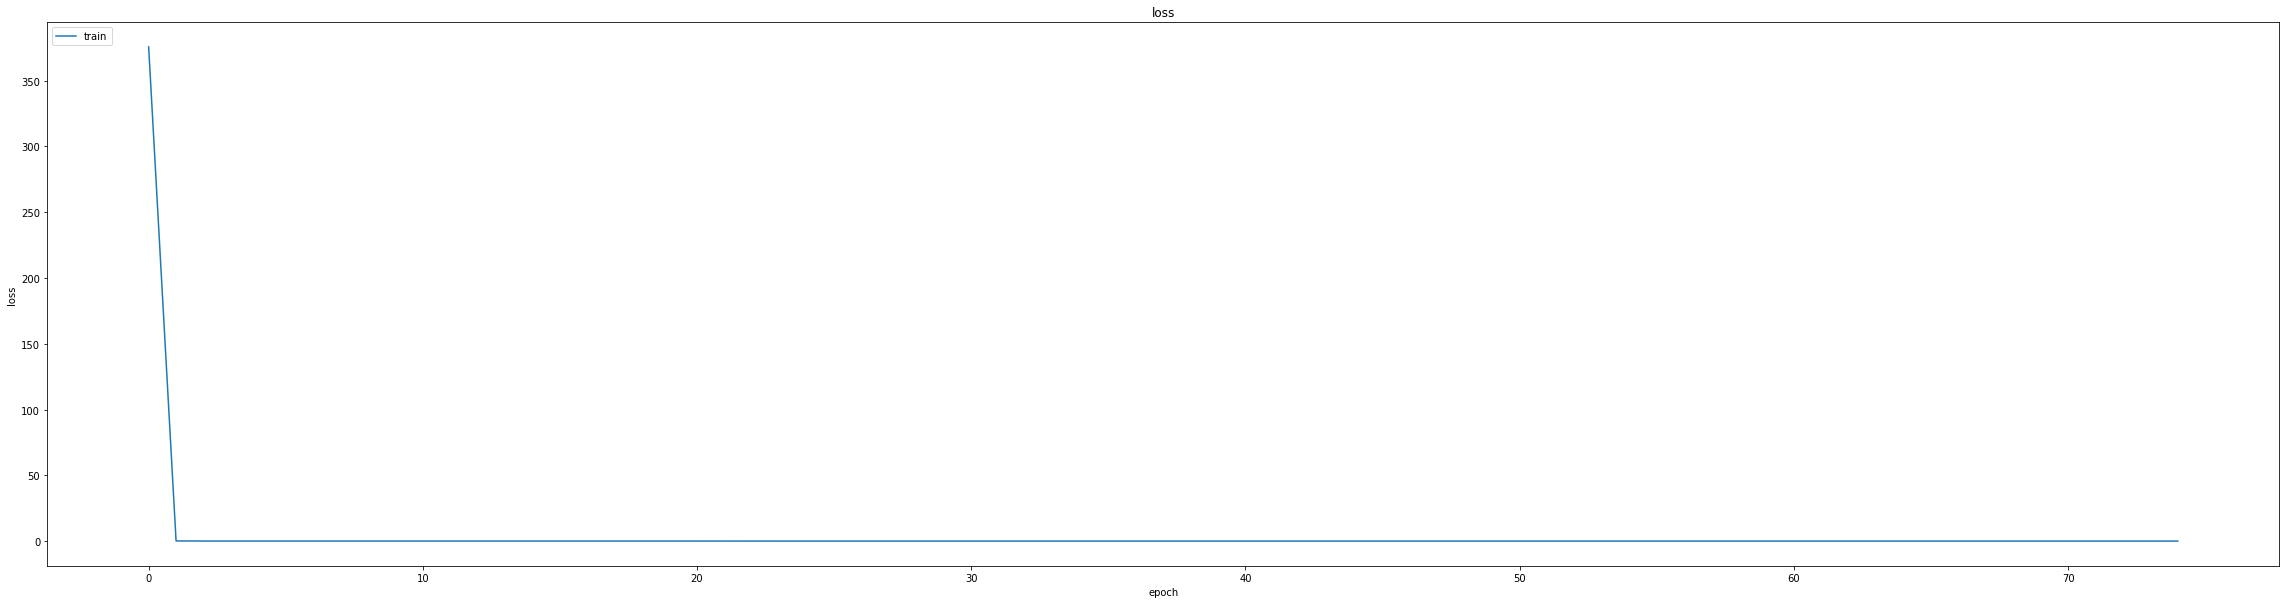

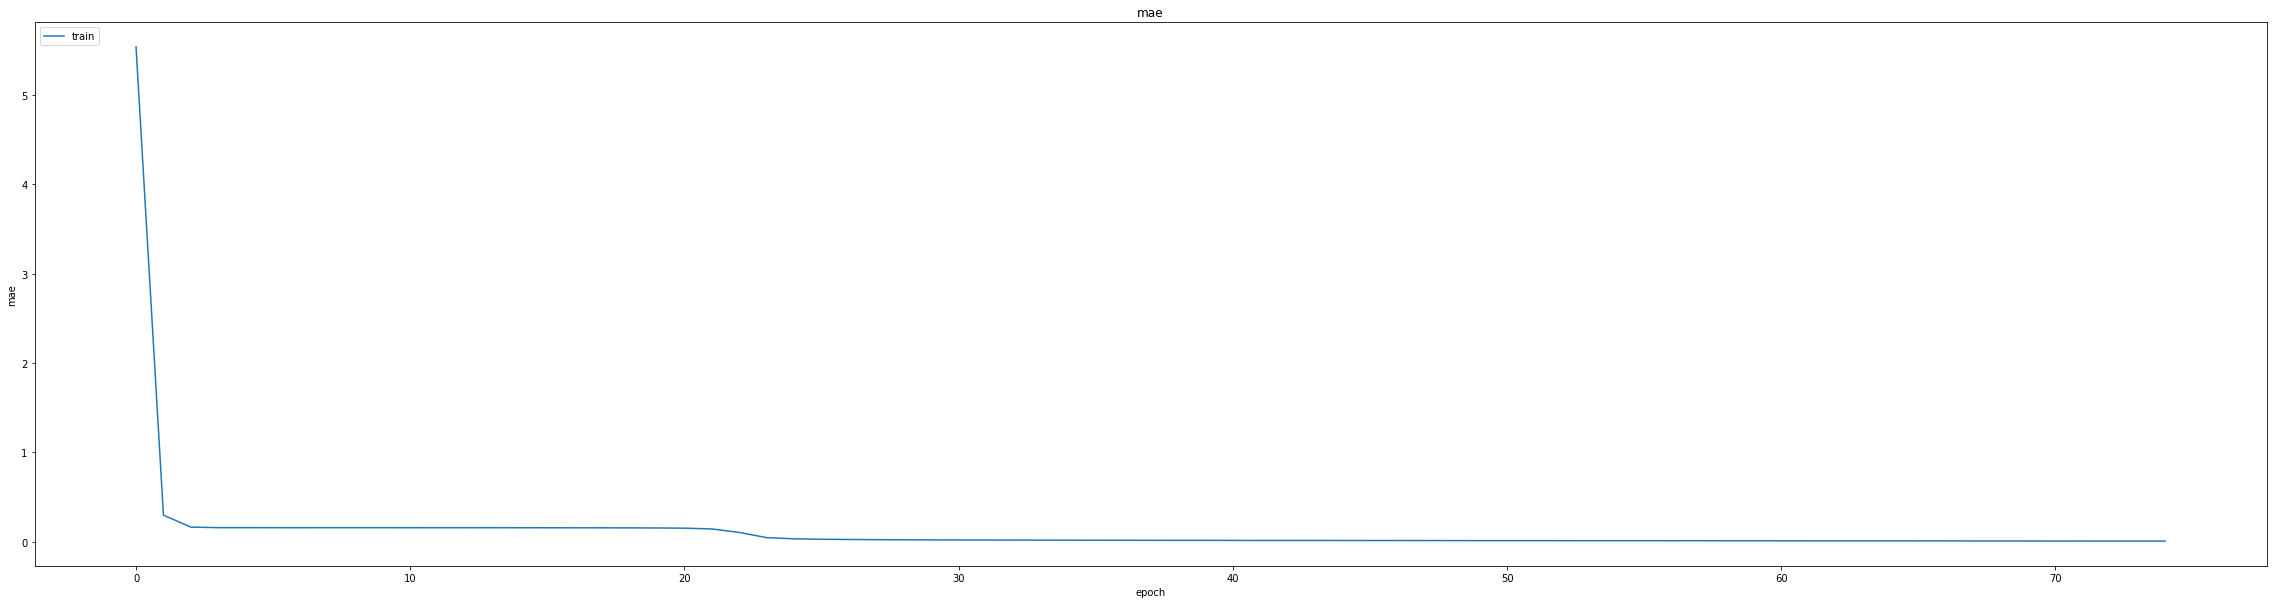

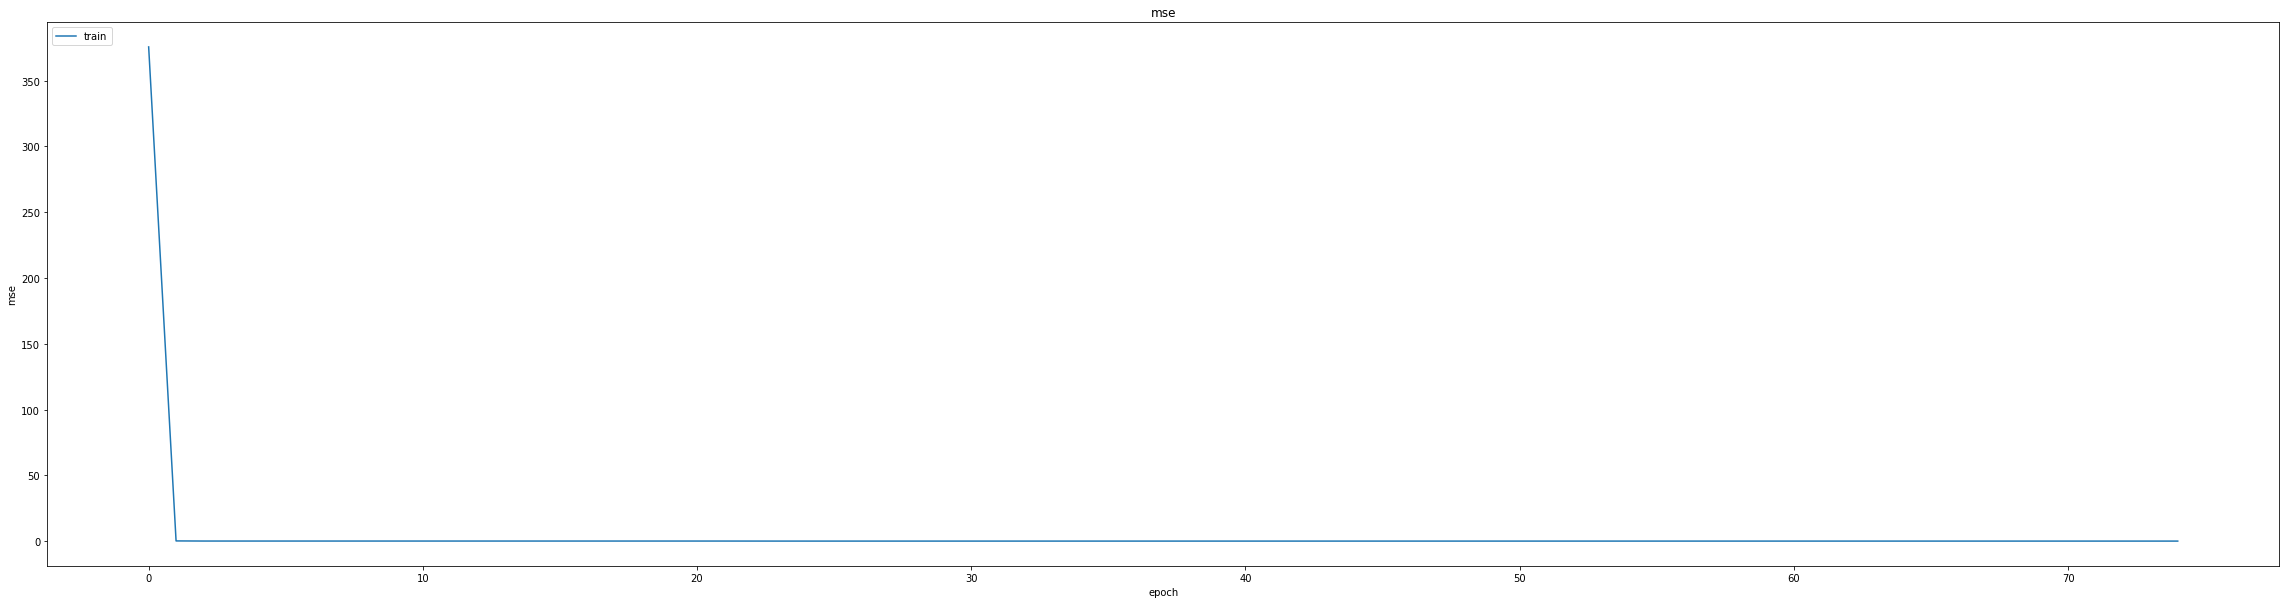

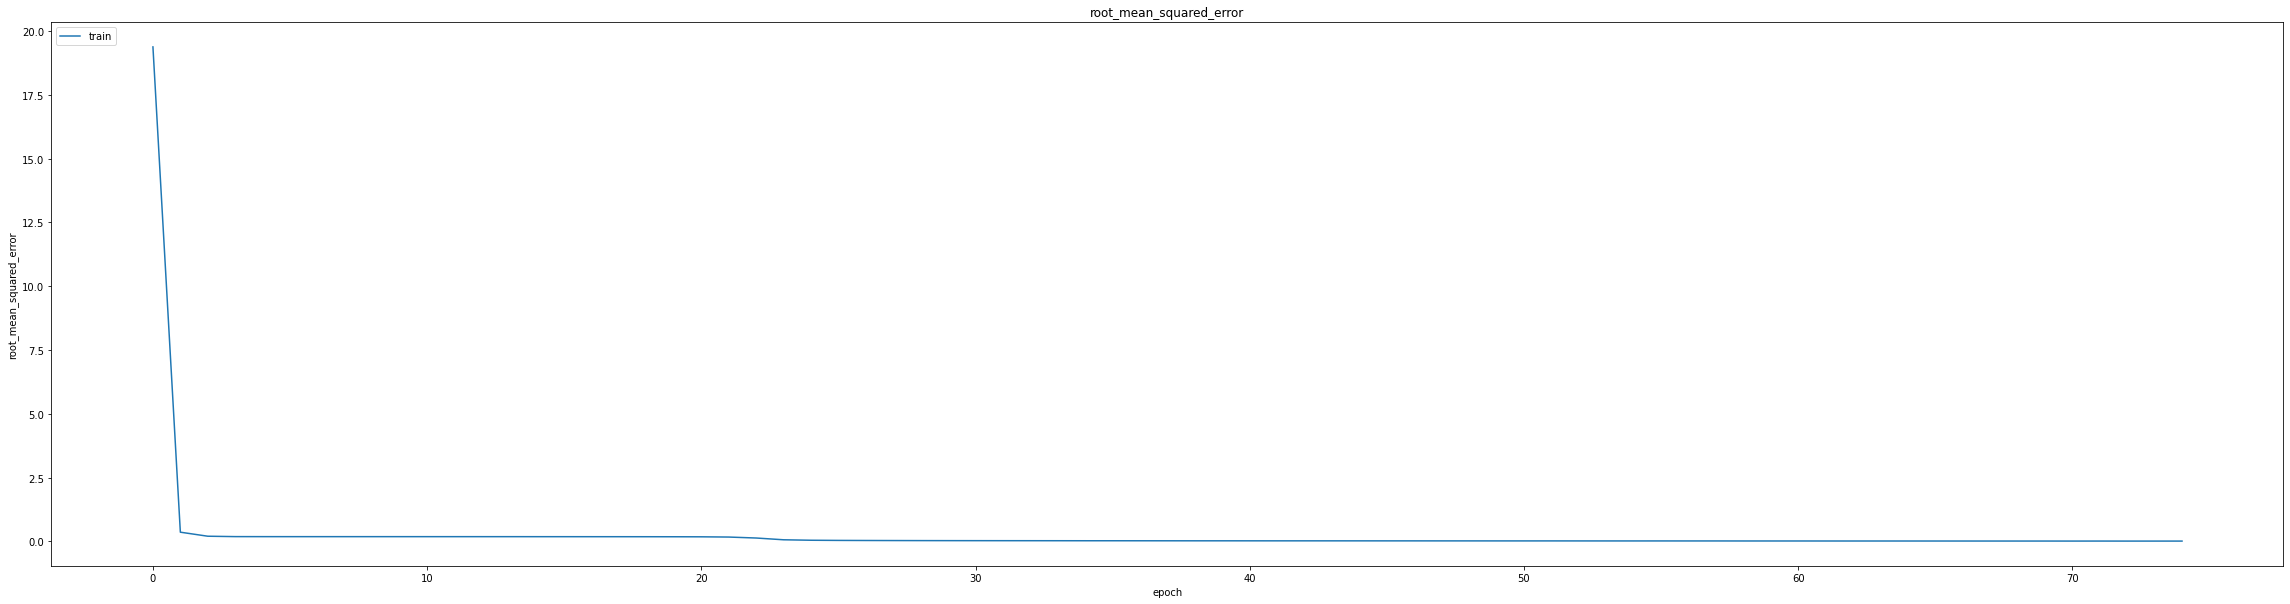

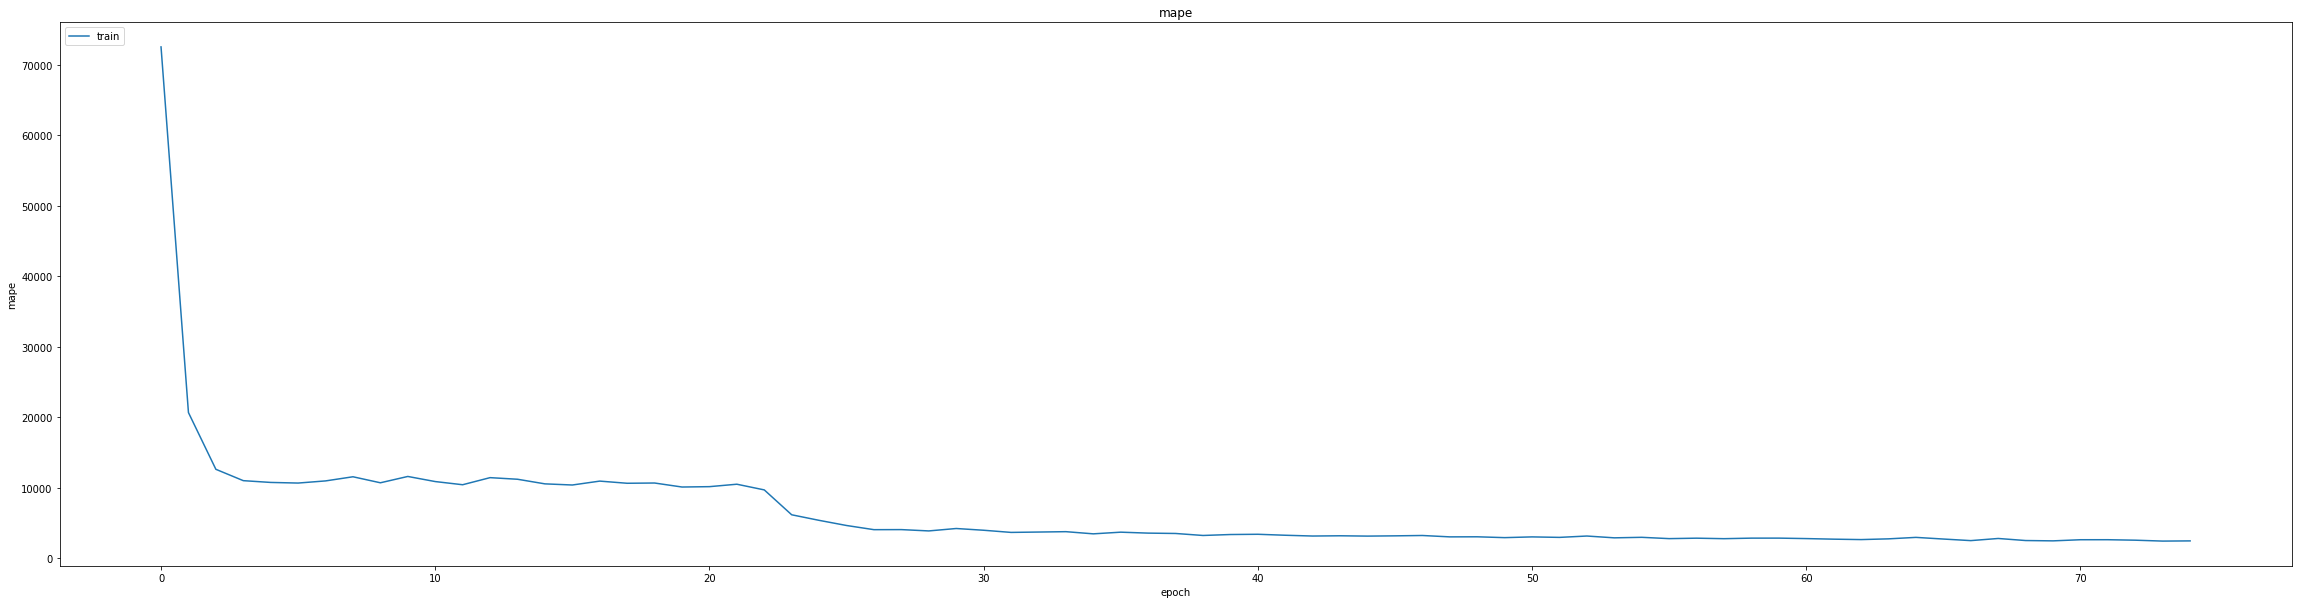

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.017044629901647568
0.017044629901647568
0.025133728981018066
464/464 [==============================] - 3s 4ms/step
0.9905270670576704


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

In [ ]:


from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
346/348 [============================>.] - ETA: 0s - loss: 6.2079e-04 - mae: 0.0126 - mse: 6.2079e-04 - root_mean_squared_error: 0.0249 - mape: 2732.9600
Epoch 1: val_mse did not improve from 0.00063
348/348 [==============================] - 9s 16ms/step - loss: 6.1797e-04 - mae: 0.0126 - mse: 6.1797e-04 - root_mean_squared_error: 0.0249 - mape: 2718.0601 - val_loss: 0.0012 - val_mae: 0.0270 - val_mse: 0.0012 - val_root_mean_squared_error: 0.0344 - val_mape: 7678.3418 - lr: 0.0010
Epoch 2/25
344/348 [============================>.] - ETA: 0s - loss: 8.8560e-05 - mae: 0.0068 - mse: 8.8560e-05 - root_mean_squared_error: 0.0094 - mape: 2616.8267
Epoch 2: val_mse did not improve from 0.00063
348/348 [==============================] - 4s 11ms/step - loss: 8.8314e-05 - mae: 0.0068 - mse: 8.8314e-05 - root_mean_squared_error: 0.0094 - mape: 2587.5212 - val_loss: 8.3491e-04 - val_mae: 0.0220 - val_mse: 8.3491e-04 - val_root_mean_squared_error: 0.0289 - val_mape: 7002.7896 - lr: 0.0

348/348 [==============================] - 14s 39ms/step - loss: 7.4278e-05 - mae: 0.0064 - mse: 7.4278e-05 - root_mean_squared_error: 0.0086 - mape: 2129.8376 - val_loss: 6.2981e-04 - val_mae: 0.0202 - val_mse: 6.2981e-04 - val_root_mean_squared_error: 0.0251 - val_mape: 6284.3887 - lr: 7.2900e-04
lr changed to 0.0006561000715009868
Epoch 9/25
345/348 [============================>.] - ETA: 0s - loss: 6.4820e-05 - mae: 0.0059 - mse: 6.4820e-05 - root_mean_squared_error: 0.0081 - mape: 2177.1230
Epoch 9: val_mse improved from 0.00063 to 0.00056, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 40ms/step - loss: 6.4840e-05 - mae: 0.0059 - mse: 6.4840e-05 - root_mean_squared_error: 0.0081 - mape: 2158.9978 - val_loss: 5.5948e-04 - val_mae: 0.0182 - val_mse: 5.5948e-04 - val_root_mean_squared_error: 0.0237 - val_mape: 6170.5498 - lr: 6.5610e-04
Epoch 10/25
346/348 [============================>.] - ETA: 0s - loss: 6.5468e-05 - mae: 0.0060 - mse: 6.5468e-05 - root_mean_squared_error: 0.0081 - mape: 2197.9780
Epoch 10: val_mse did not improve from 0.00056
348/348 [==============================] - 4s 12ms/step - loss: 6.5350e-05 - mae: 0.0060 - mse: 6.5350e-05 - root_mean_squared_error: 0.0081 - mape: 2185.9910 - val_loss: 6.2410e-04 - val_mae: 0.0209 - val_mse: 6.2410e-04 - val_root_mean_squared_error: 0.0250 - val_mape: 6174.6440 - lr: 6.5610e-04
lr changed to 0.0005904900433961303
Epoch 11/25
346/348 [============================>.] - ETA: 0s - loss: 6.1952e-05 - mae: 0.0058 - mse: 6.1952e-05 - root_mean_squared_error: 0.0079 - ma

348/348 [==============================] - 14s 39ms/step - loss: 6.0303e-05 - mae: 0.0058 - mse: 6.0303e-05 - root_mean_squared_error: 0.0078 - mape: 2137.8157 - val_loss: 5.3249e-04 - val_mae: 0.0186 - val_mse: 5.3249e-04 - val_root_mean_squared_error: 0.0231 - val_mape: 6066.9116 - lr: 5.9049e-04
lr changed to 0.0005314410547725857
Epoch 13/25
346/348 [============================>.] - ETA: 0s - loss: 5.7251e-05 - mae: 0.0056 - mse: 5.7251e-05 - root_mean_squared_error: 0.0076 - mape: 2159.4155
Epoch 13: val_mse improved from 0.00053 to 0.00050, saving model to /content/drive/MyDrive/modelweights/CHF_USD_15min_GRU(60-40)


348/348 [==============================] - 14s 41ms/step - loss: 5.7220e-05 - mae: 0.0056 - mse: 5.7220e-05 - root_mean_squared_error: 0.0076 - mape: 2147.6396 - val_loss: 5.0090e-04 - val_mae: 0.0179 - val_mse: 5.0090e-04 - val_root_mean_squared_error: 0.0224 - val_mape: 5960.7793 - lr: 5.3144e-04
Epoch 14/25
344/348 [============================>.] - ETA: 0s - loss: 5.4098e-05 - mae: 0.0054 - mse: 5.4098e-05 - root_mean_squared_error: 0.0074 - mape: 2199.7910
Epoch 14: val_mse did not improve from 0.00050
348/348 [==============================] - 4s 11ms/step - loss: 5.4092e-05 - mae: 0.0054 - mse: 5.4092e-05 - root_mean_squared_error: 0.0074 - mape: 2175.1570 - val_loss: 5.8651e-04 - val_mae: 0.0209 - val_mse: 5.8651e-04 - val_root_mean_squared_error: 0.0242 - val_mape: 5971.2070 - lr: 5.3144e-04
lr changed to 0.00047829695977270604
Epoch 15/25
346/348 [============================>.] - ETA: 0s - loss: 4.9469e-05 - mae: 0.0052 - mse: 4.9469e-05 - root_mean_squared_error: 0.0070 - m

348/348 [==============================] - 14s 41ms/step - loss: 3.5571e-05 - mae: 0.0044 - mse: 3.5571e-05 - root_mean_squared_error: 0.0060 - mape: 1907.7107 - val_loss: 4.5386e-04 - val_mae: 0.0178 - val_mse: 4.5386e-04 - val_root_mean_squared_error: 0.0213 - val_mape: 5608.3052 - lr: 2.8243e-04


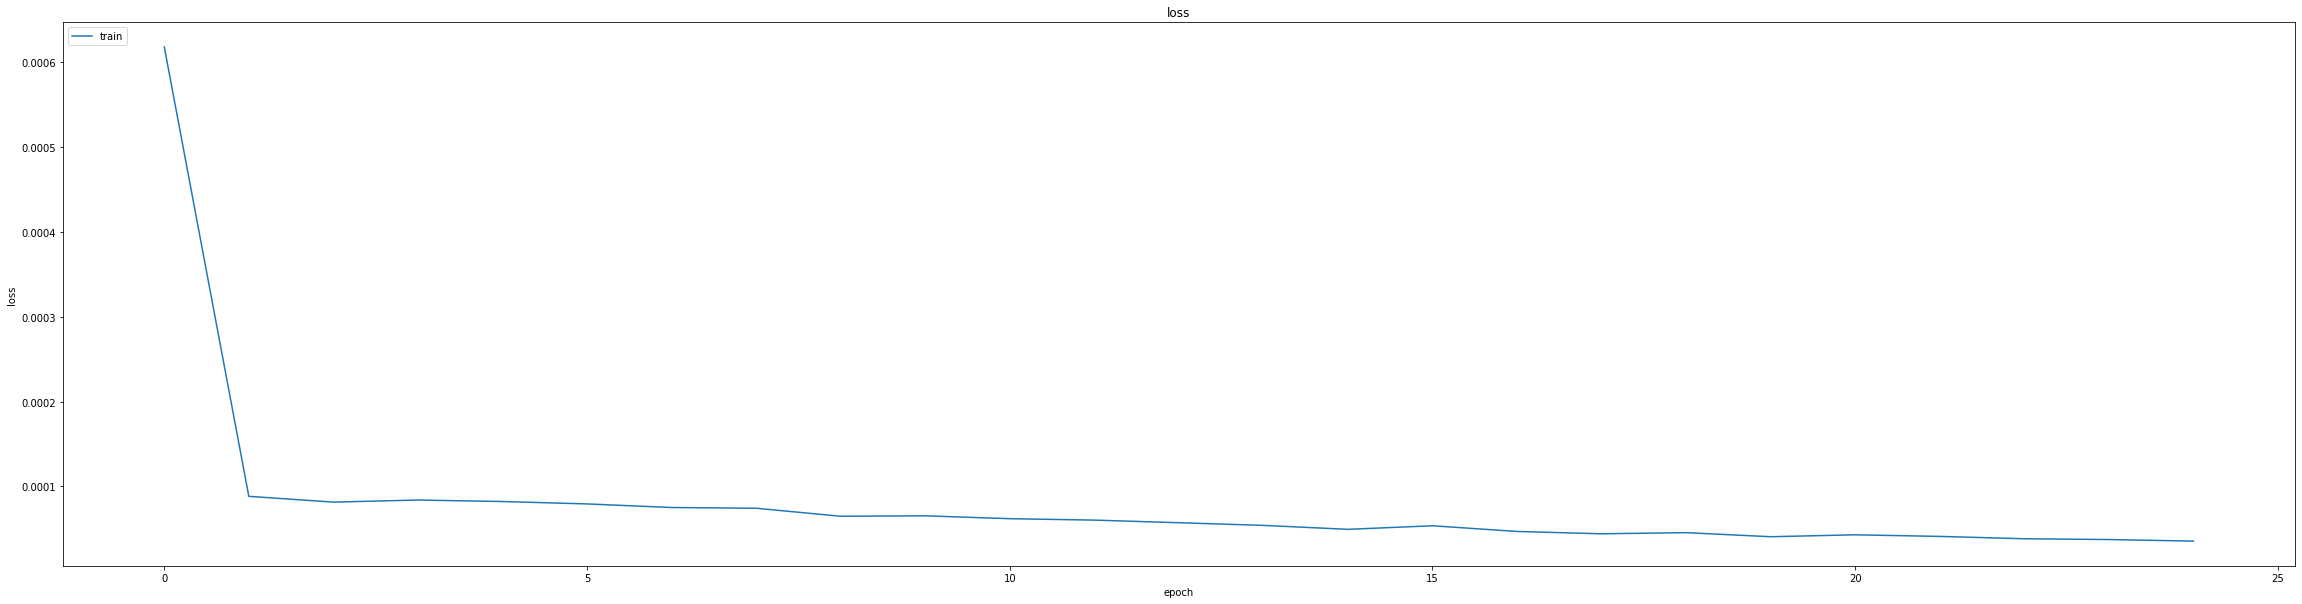

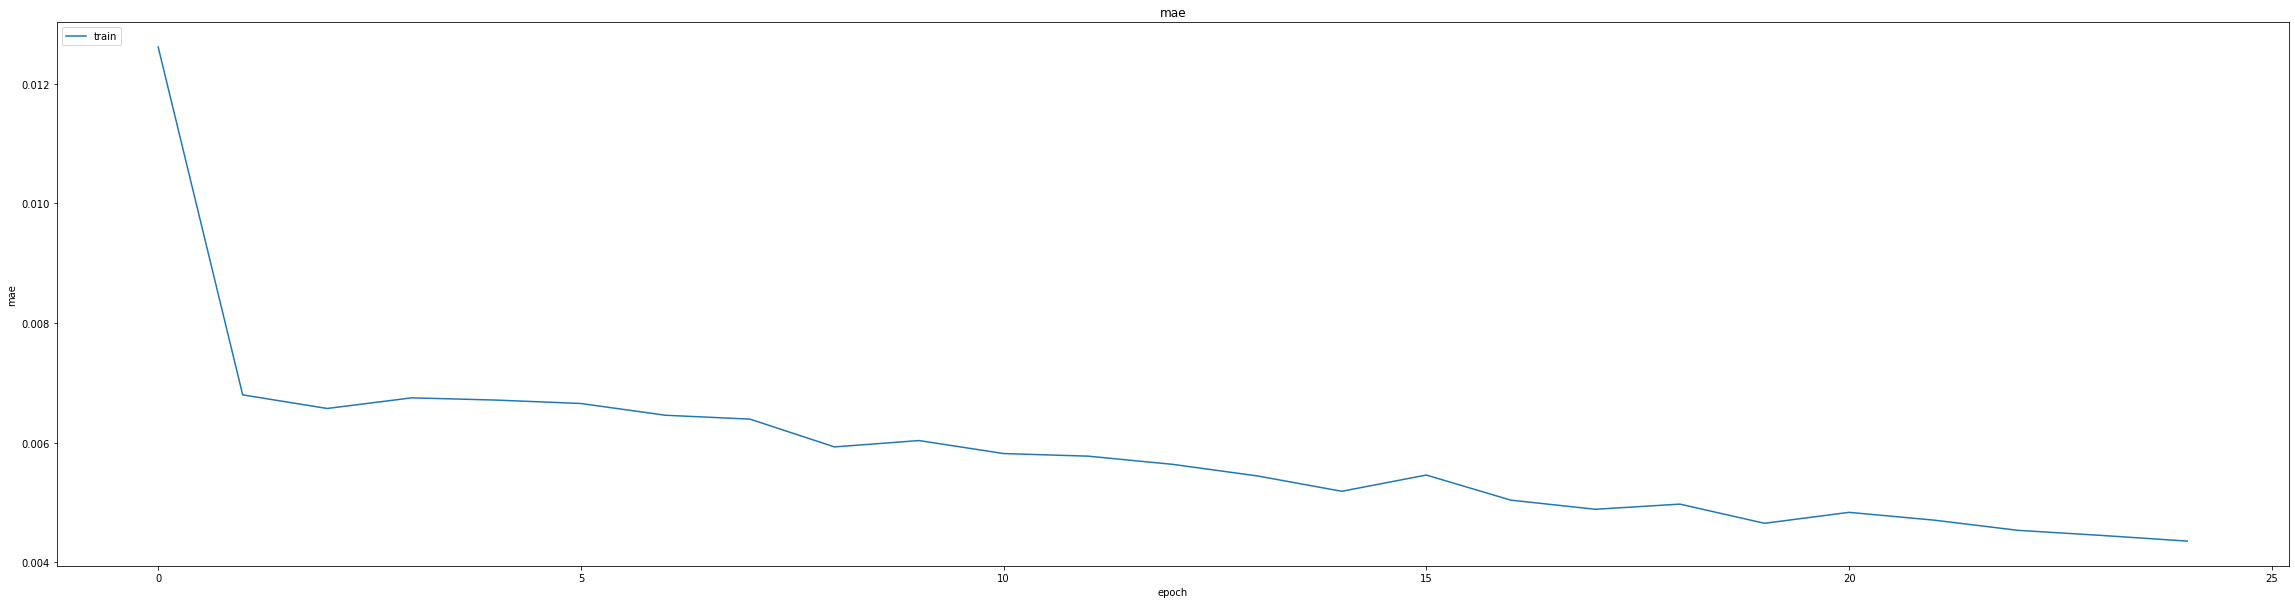

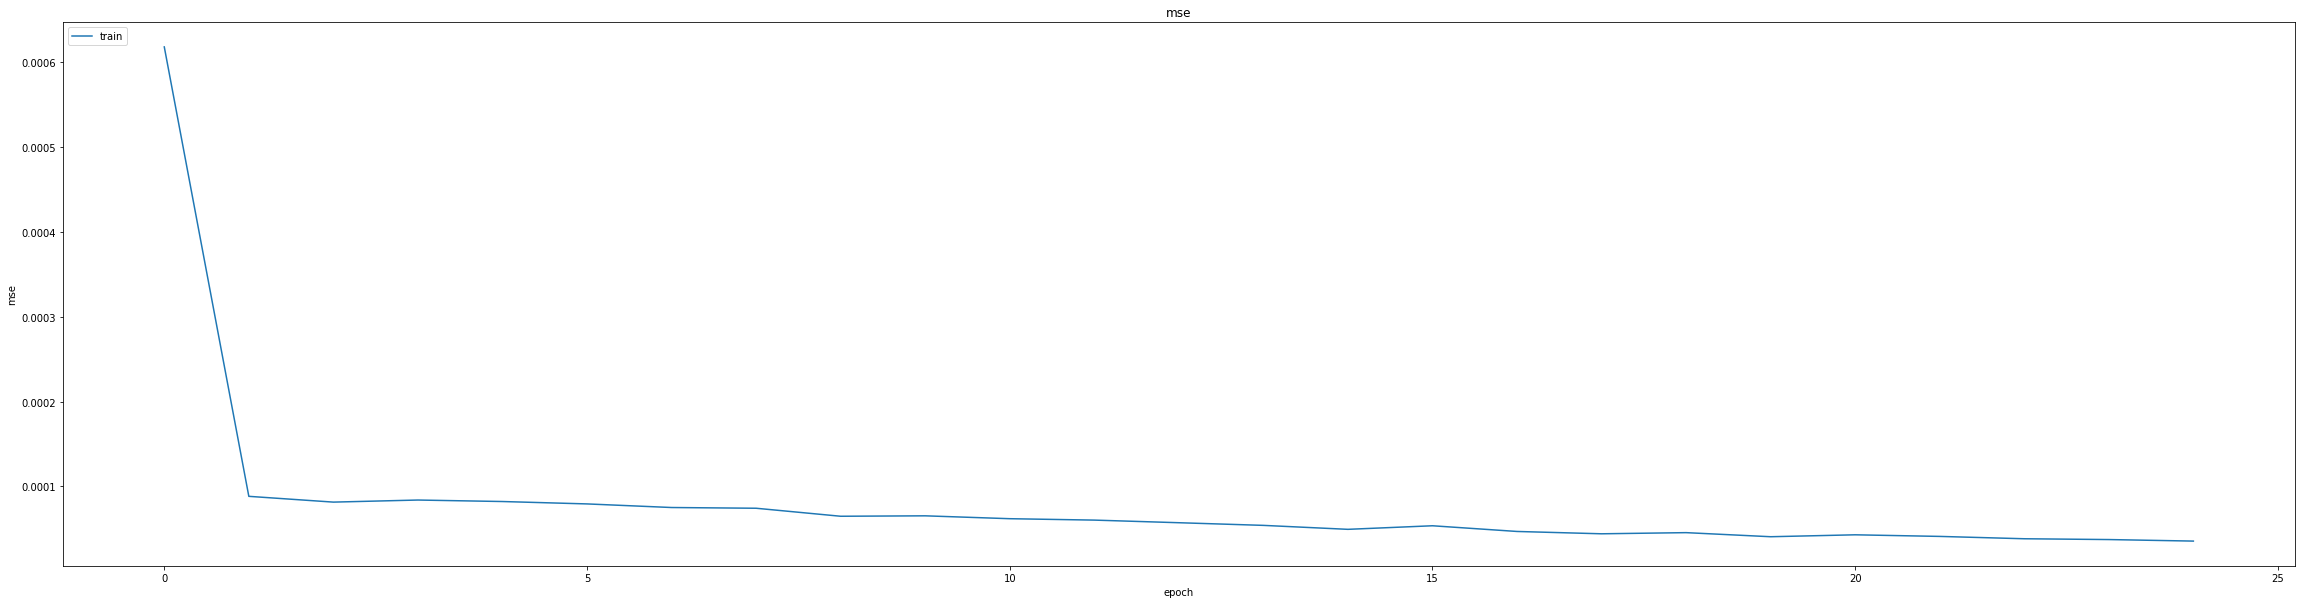

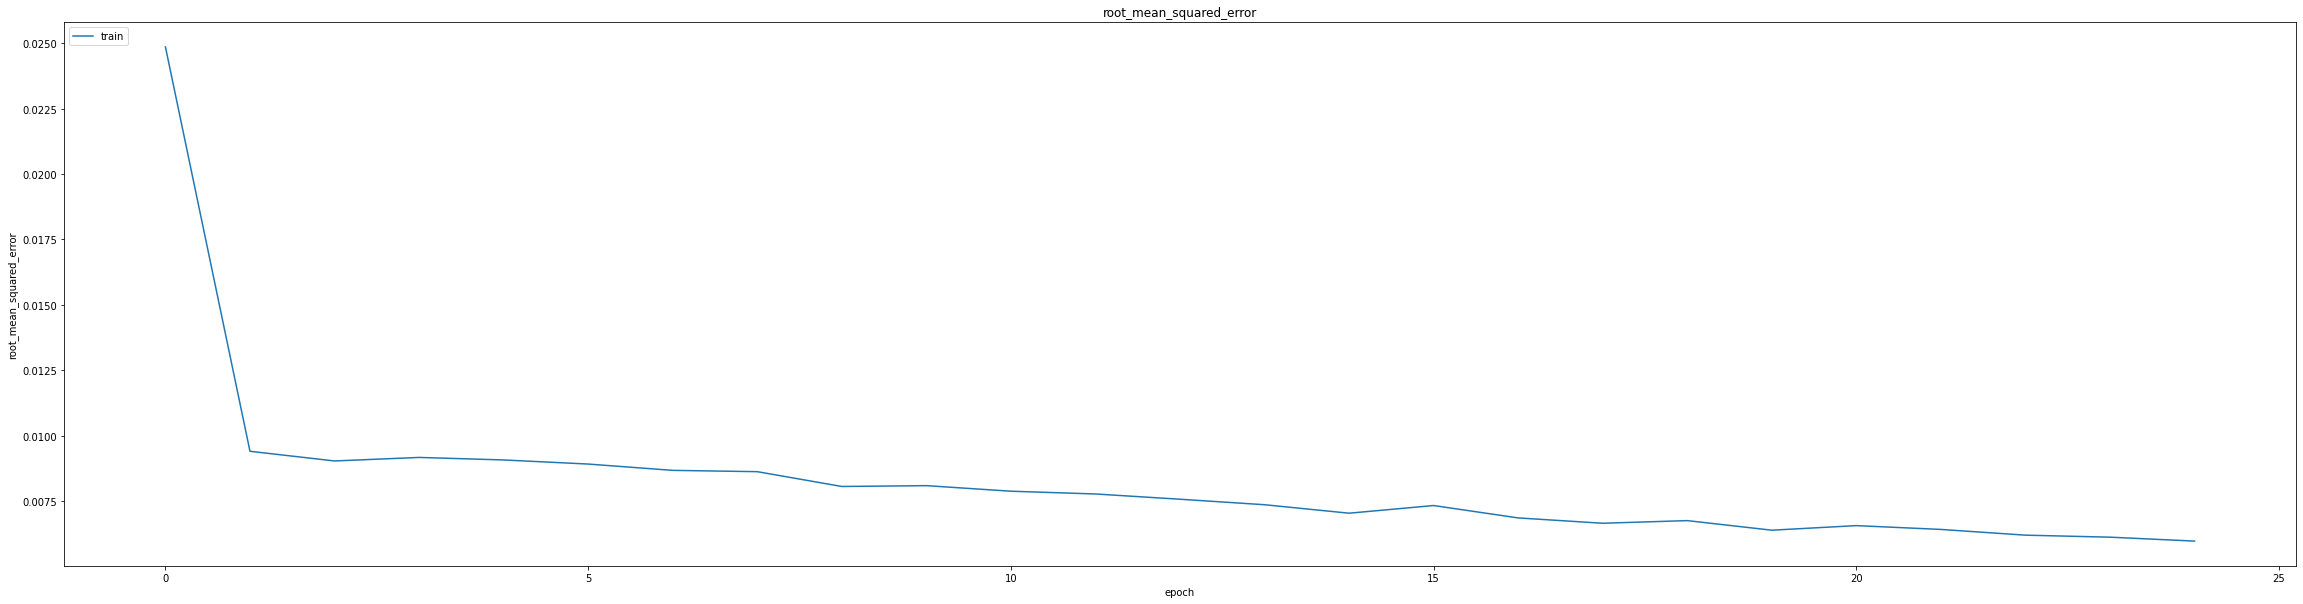

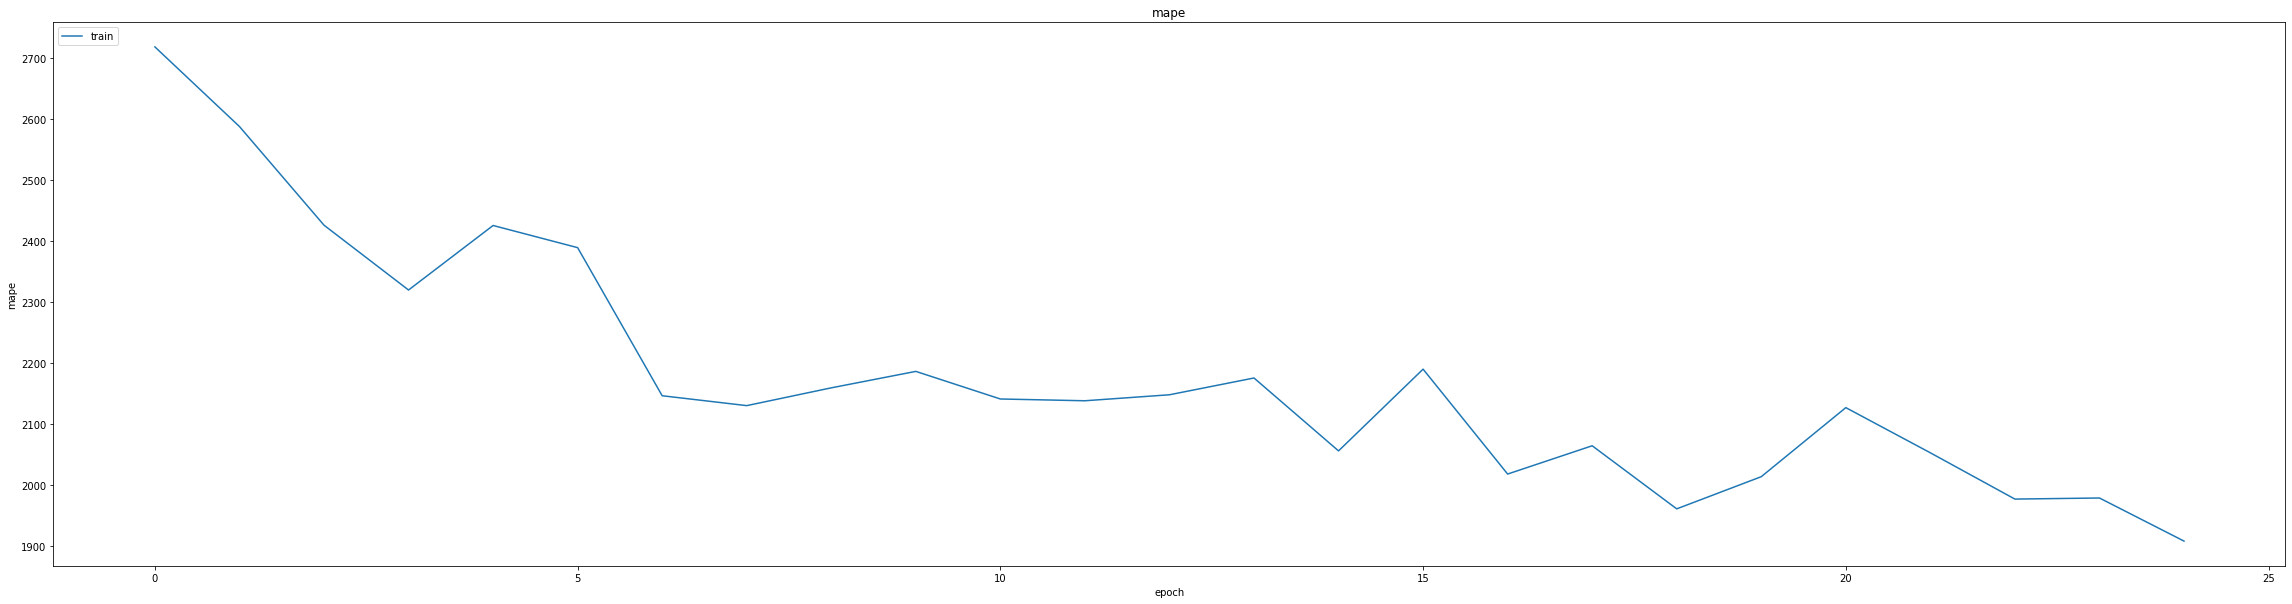

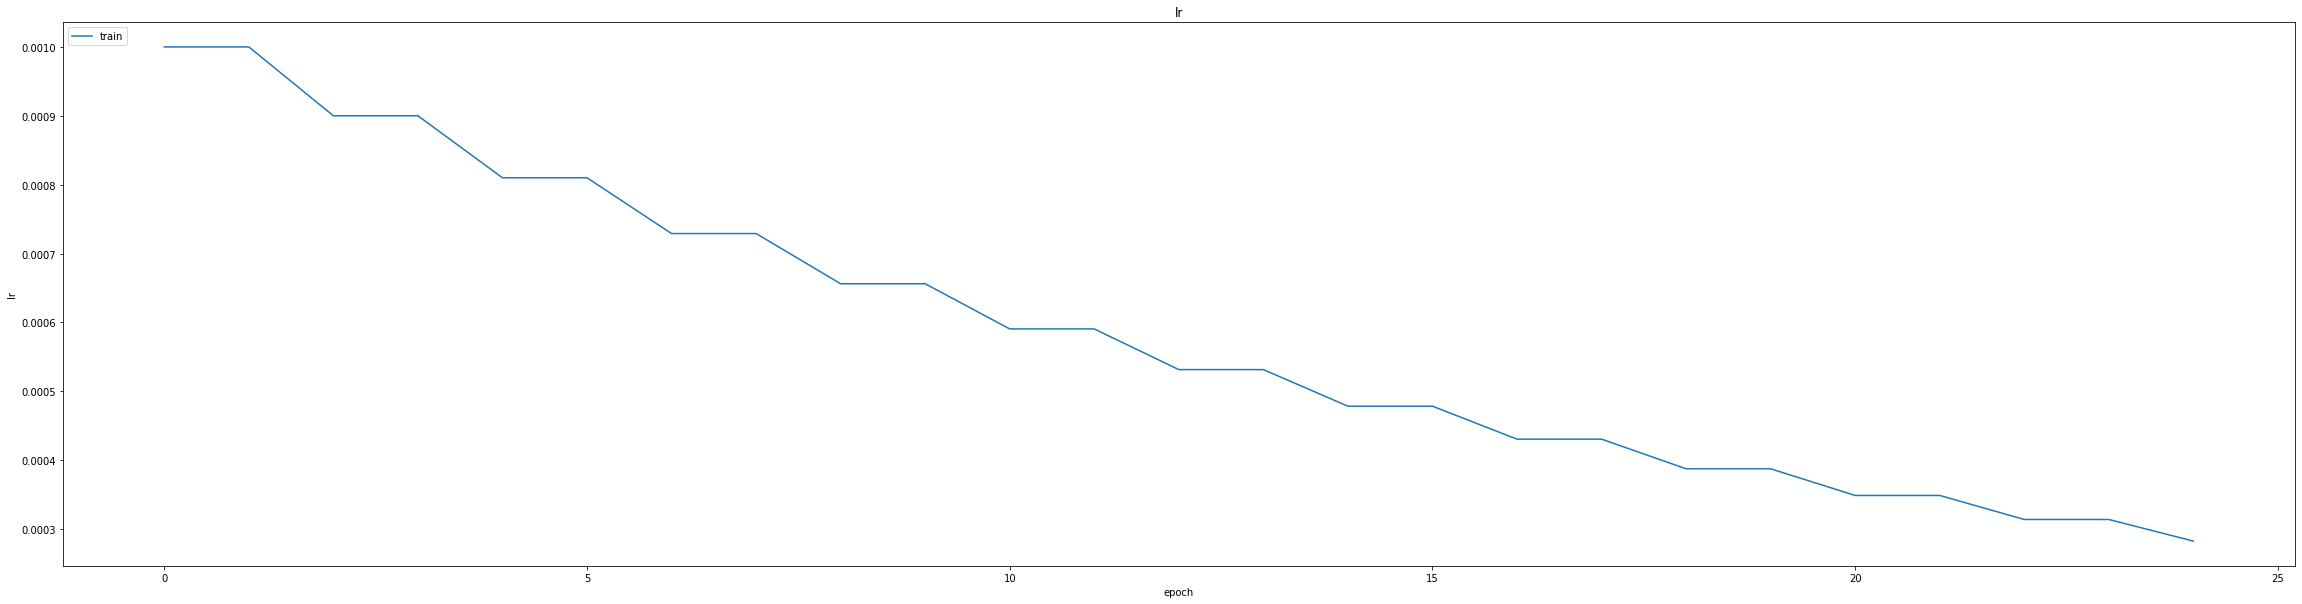

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.017776083201169968
0.017776083201169968
0.021303994581103325
464/464 [==============================] - 3s 4ms/step
0.9951418439650882


In [ ]:
model.load_weights("/content/drive/MyDrive/modelweights/JPY_USD_15min_GRU(60-40)")

464/464 [==============================] - 2s 4ms/step


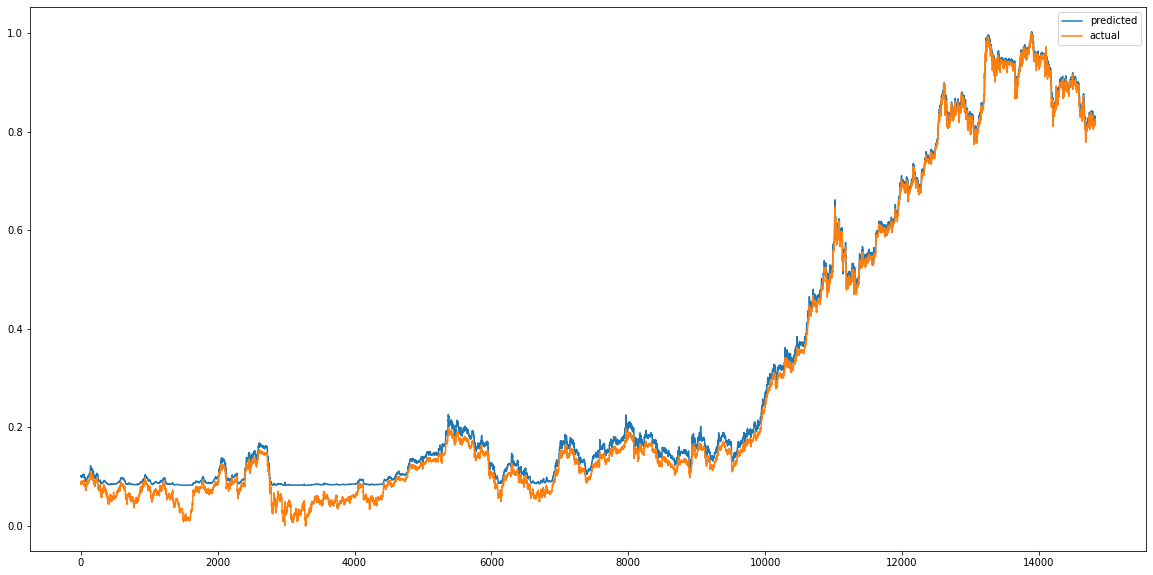

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


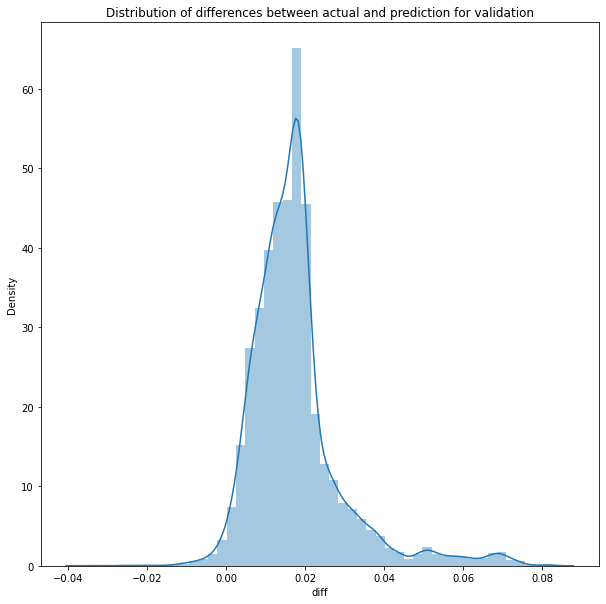

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

464/464 [==============================] - 2s 4ms/step


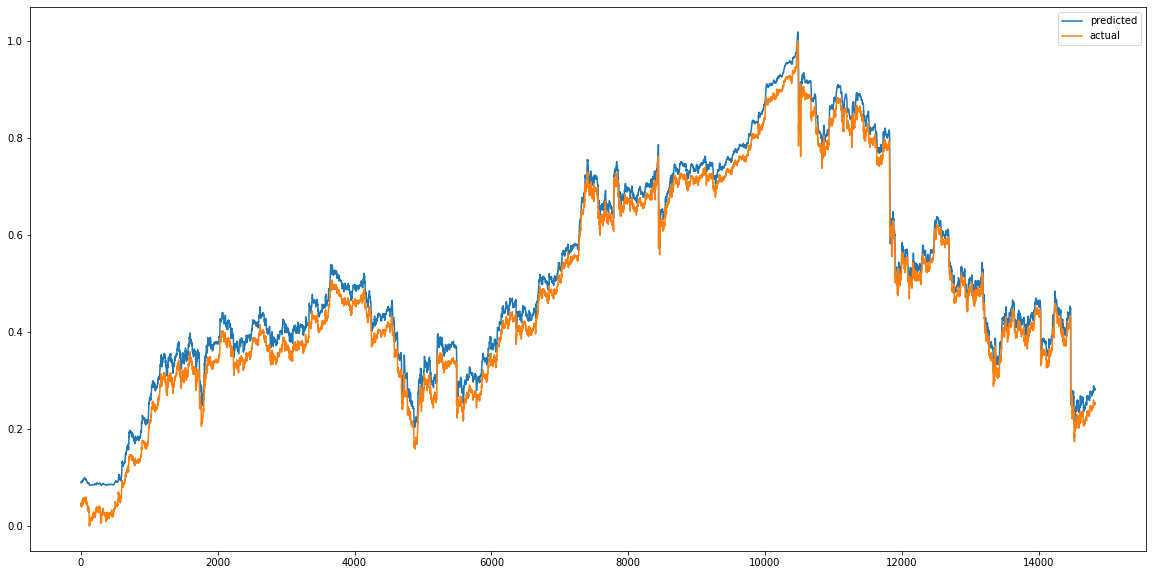

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


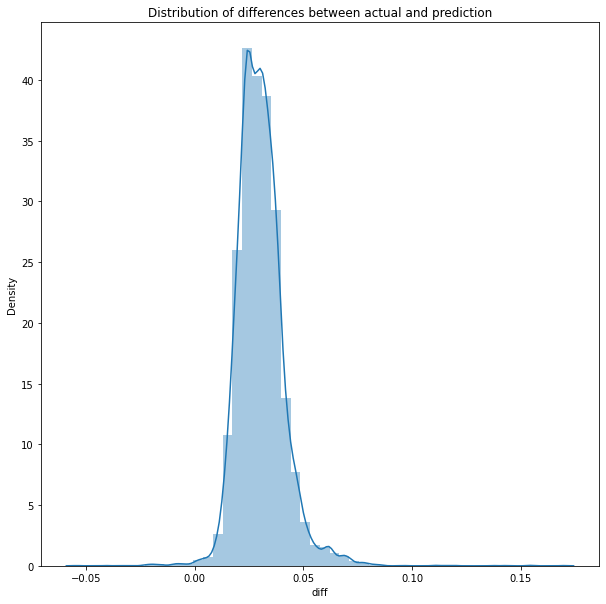

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))

from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', test_r2_score)
predictions['diff'].describe()

MSE :  0.001034812725909366
RMSE :  0.032168505186119016
MAE :  0.030406366731737352
464/464 [==============================] - 2s 4ms/step
R2_Score  : 0.9785420527212075


count    14828.000000
mean         0.030315
std          0.010763
min         -0.054213
25%          0.023492
50%          0.029466
75%          0.035902
max          0.169567
Name: diff, dtype: float64